# Init_std

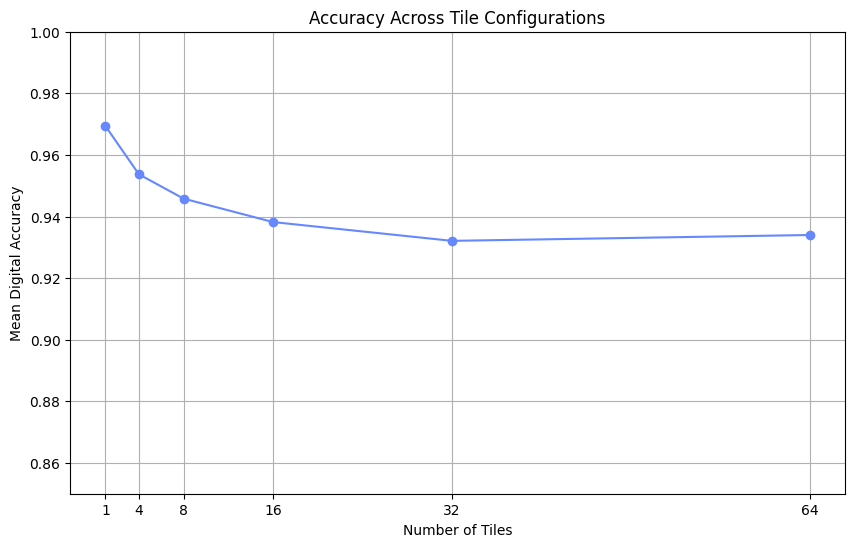

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_v1 = pd.read_csv('mnist_agad_vdefault.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan
df_v1['digital_accuracies'] = df_v1['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Calculate the mean digital accuracies for each tile configuration discarding outliers
mean_accuracies_v1 = df_v1['digital_accuracies'].apply(lambda x: np.mean([i for sublist in x for i in sublist[-1:]]))

# Extract the tile configurations
tile_configurations = df_v1['num_tiles']

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(tile_configurations, mean_accuracies_v1, marker='o', color='#6688FF')
plt.xlabel('Number of Tiles')
plt.ylabel('Mean Digital Accuracy')
# Set y-axis limits
plt.ylim(0.85, 1)
plt.xticks([1, 4, 8, 16, 32, 64])
plt.title('Accuracy Across Tile Configurations')
plt.grid(True)
plt.show()

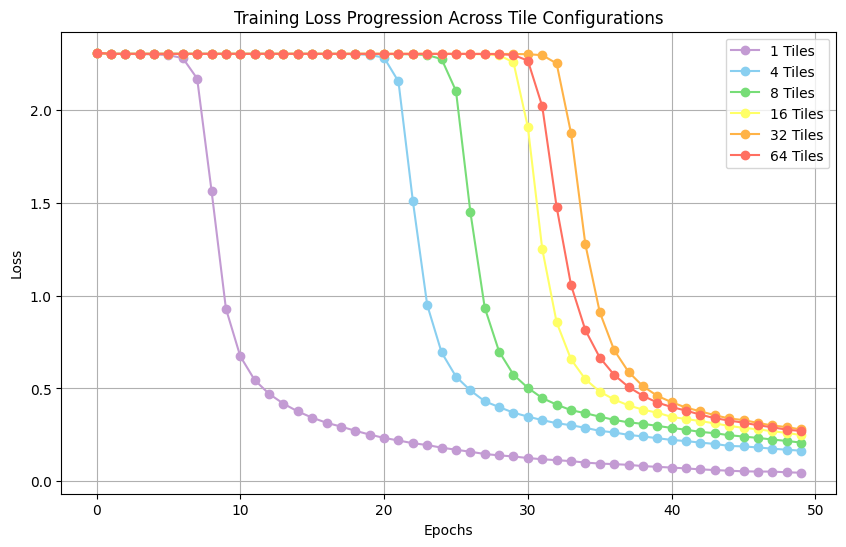

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_v1 = pd.read_csv('mnist_agad_vdefault.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan
df_v1['digital_losses'] = df_v1['digital_losses'].str.replace('nan', 'None', regex=False).apply(eval)

# Extract the tile configurations and losses
tile_configurations = df_v1['num_tiles']
losses = df_v1['digital_losses']

# Plot the results
plt.figure(figsize=(10, 6))

# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77','#FFFF66','#FFB347','#FF6F61']

for i, (tile_config, loss) in enumerate(zip(tile_configurations, losses)):
    plt.plot(loss, label=f'{tile_config} Tiles', color=colors[i % len(colors)], marker='o', alpha=1)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Progression Across Tile Configurations')
plt.legend()
plt.grid(True)
plt.show()

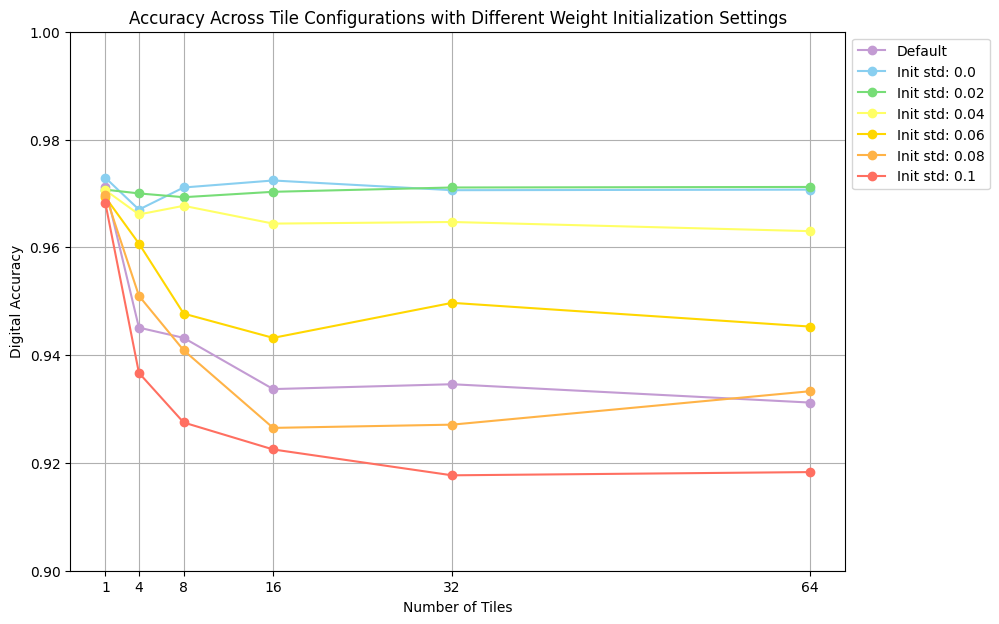

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_test.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Extract unique noise settings
noise_settings = df['init_std'].unique()

# Plot the results
plt.figure(figsize=(10, 7))
# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']

for i, noise in enumerate(noise_settings):
    # Filter the dataframe for the current noise setting
    df_filtered = df[df['init_std'] == noise]
    
    # Calculate the mean digital accuracies for each tile configuration discarding outliers
    mean_accuracies = df_filtered['digital_accuracies'].apply(lambda x: np.mean([i for sublist in x for i in sublist[-1:]]))
    
    # Extract the tile configurations
    tile_configurations = df_filtered['num_tiles']
    
    # Plot the results
    plt.plot(tile_configurations, mean_accuracies, 
             marker='o', label=f'Init std: {noise}' if noise >= 0 else 'Default', 
             color=colors[i % len(colors)])

plt.xlabel('Number of Tiles')
plt.ylabel('Digital Accuracy')
plt.ylim(0.90, 1)
plt.xticks([1, 4, 8, 16, 32, 64])
plt.title('Accuracy Across Tile Configurations with Different Weight Initialization Settings')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

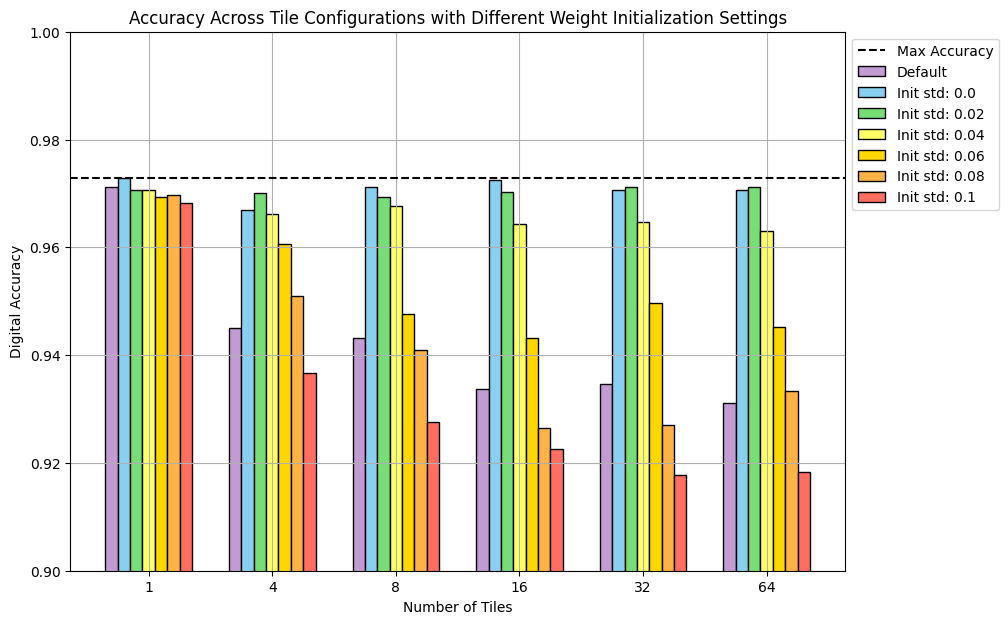

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_test.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Extract unique noise settings
noise_settings = df['init_std'].unique()

# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32, 64]

# Create a figure
plt.figure(figsize=(10, 7))

# Set the width of each bar
bar_width = 0.1

max_accuracy = df['digital_accuracies'].apply(lambda x: np.mean([i for sublist in x for i in sublist[-1:]])).max()
# Create a bar chart for each noise setting
for i, noise in enumerate(noise_settings):
    # Filter the dataframe for the current noise setting
    df_filtered = df[df['init_std'] == noise]
    
    # Calculate the mean digital accuracies for each tile configuration discarding outliers
    mean_accuracies = [df_filtered[df_filtered['num_tiles'] == config]['digital_accuracies'].apply(lambda x: np.mean([i for sublist in x for i in sublist[-1:]])).mean() for config in tile_configurations]
    
    # Define the position of the bars
    bar_positions = np.arange(len(tile_configurations)) + i * bar_width
    
    # Plot the bars
    plt.bar(bar_positions, mean_accuracies, bar_width, label=f'Init std: {noise}' if noise >= 0 else 'Default', color=colors[i % len(colors)], edgecolor='black')

# plot a horizontal reference dashed line at the maximum accuracy
plt.axhline(y=max_accuracy, color='black', linestyle='--', label='Max Accuracy')

# Set the labels and title
plt.xlabel('Number of Tiles')
plt.ylabel('Digital Accuracy')
plt.ylim(0.90, 1)
plt.xticks(np.arange(len(tile_configurations)) + bar_width * (len(noise_settings) - 1) / 2, tile_configurations)
plt.title('Accuracy Across Tile Configurations with Different Weight Initialization Settings')
plt.grid(True)
# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 700x500 with 0 Axes>

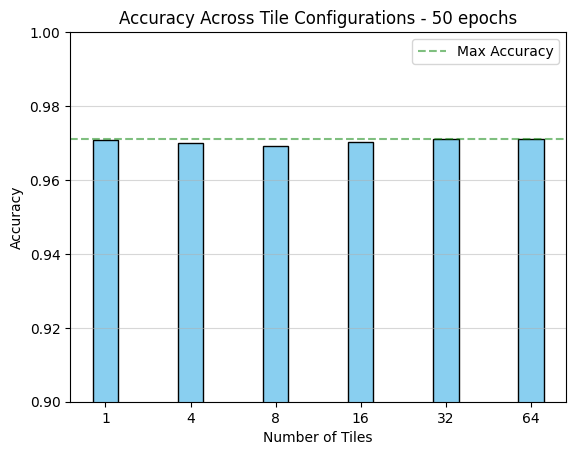

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_test.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Extract unique noise settings
noise_settings = [0.02]

# Define pastel colors
colors = ['#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']#'#C39BD3',

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32, 64]

# Create a figure
plt.figure(figsize=(7, 5))
plt.figure(dpi=100)

# Set the width of each bar
bar_width = 0.3

# max accuracy for the noise setting selected
max_accuracy = df[df['init_std'] == noise_settings[0]]['digital_accuracies'].apply(lambda x: np.mean([i for sublist in x for i in sublist[-1:]])).max()

# Create a bar chart for each noise setting
for i, noise in enumerate(noise_settings):
    # Filter the dataframe for the current noise setting
    df_filtered = df[df['init_std'] == noise]
    
    # Calculate the mean digital accuracies for each tile configuration discarding outliers
    mean_accuracies = [df_filtered[df_filtered['num_tiles'] == config]['digital_accuracies'].apply(lambda x: np.mean([i for sublist in x for i in sublist[-1:]])).mean() for config in tile_configurations]
    
    # Define the position of the bars
    bar_positions = np.arange(len(tile_configurations)) + i * bar_width
    
    # Plot the bars
    plt.bar(bar_positions, mean_accuracies, bar_width, color=colors[i % len(colors)], edgecolor='black')

# plot a horizontal reference dashed line at the maximum accuracy
plt.axhline(y=max_accuracy, color='green', linestyle='--', label='Max Accuracy', alpha=0.5)

# Set the labels and title
plt.xlabel('Number of Tiles')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)
plt.xticks(np.arange(len(tile_configurations)) + bar_width * (len(noise_settings) - 1) / 2, tile_configurations)
plt.title('Accuracy Across Tile Configurations - 50 epochs')
plt.grid(visible=True, axis='y', alpha=0.5)
# Add a legend inside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

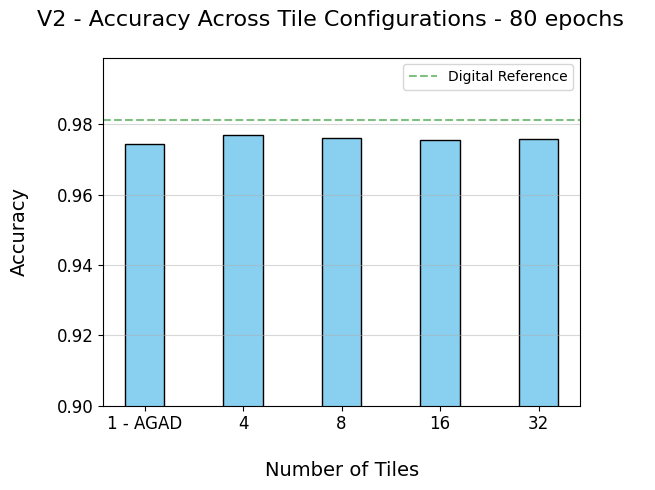

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
#df = pd.read_csv('mnist_agad_init_test.csv')
df = pd.read_csv('mnist_80_v2.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['swa_accuracy'] = df['swa_accuracy'].str.replace('nan', 'None', regex=False).apply(eval)
df['model_average_accuracy'] = df['model_average_accuracy'].str.replace('nan', 'None', regex=False).apply(eval)

# Define pastel colors
colors = ['#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']#'#C39BD3',

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32]
noise_settings = [0.02]

# Create a figure
plt.figure(figsize=(6, 5),dpi=100)

# Set the width of each bar
bar_width = 0.4

# max accuracy for the noise setting selected
max_accuracy = df['model_average_accuracy'].apply(np.mean).max()

# Create a bar chart for each noise setting
for i, noise in enumerate(noise_settings):

    # mean of the list of accuracie
    means = df['swa_accuracy'].apply(np.mean)
    d_means = df['model_average_accuracy'].apply(np.mean)
    #means[0] = d_means[0]
    # out of every pair means[i] and d_means[i], select the maximum
    best = [max(means[i], d_means[i]) for i in range(len(means))]

    bar_positions = np.arange(len(tile_configurations)) + i * bar_width
    
    # Plot the bars
    plt.bar(bar_positions, best, bar_width, color=colors[i % len(colors)], edgecolor='black')

# plot a horizontal reference dashed line at the maximum accuracy
plt.axhline(y=0.9812, color='green', linestyle='--', label='Digital Reference', alpha=0.5)

# Set the labels and title
plt.xlabel('\nNumber of Tiles', fontsize=14)
plt.ylabel('Accuracy\n', fontsize=14)
plt.ylim(0.9, 0.999)
tile_configurations[0] = '1 - AGAD'
plt.xticks(np.arange(len(tile_configurations)) + bar_width * (len(noise_settings) - 1) / 2, tile_configurations, fontsize=12)
# size of te font of the y ticks
plt.yticks(fontsize=12)
plt.title('V2 - Accuracy Across Tile Configurations - 80 epochs   \n', fontsize=16)
plt.grid(visible=True, axis='y', alpha=0.5)
# Add a legend inside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

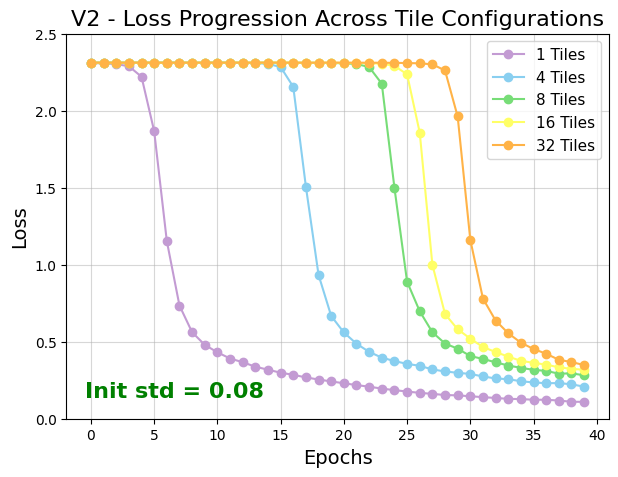

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_v1 = pd.read_csv('mnist_agad_init_test.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan
df_v1['digital_losses'] = df_v1['digital_losses'].str.replace('nan', 'None', regex=False).apply(eval)

# keep only those with 0.02 init_std
init_std = 0.08
df_v1 = df_v1[df_v1['init_std'] == init_std]

# Extract the tile configurations and losses
tile_configurations = [1,4,8,16,32]#df_v1['num_tiles']
losses = df_v1['digital_losses']

# Plot the results
plt.figure(figsize=(7, 5), dpi=100)

# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77','#FFFF66','#FFB347','#FF6F61']

for i, (tile_config, loss) in enumerate(zip(tile_configurations, losses)):
    loss = [l*64 for l in loss]
    plt.plot(loss[:40], label=f'{tile_config} Tiles', color=colors[i % len(colors)], marker='o', alpha=1)

plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.ylim(0, 2.5)
plt.title('V2 - Loss Progression Across Tile Configurations', fontsize=16)
plt.legend(fontsize = 11)
plt.grid(True, alpha=0.5)
plt.text(0.2, 0.07, 'Init std = {}'.format(init_std), fontsize=16, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')
plt.show()

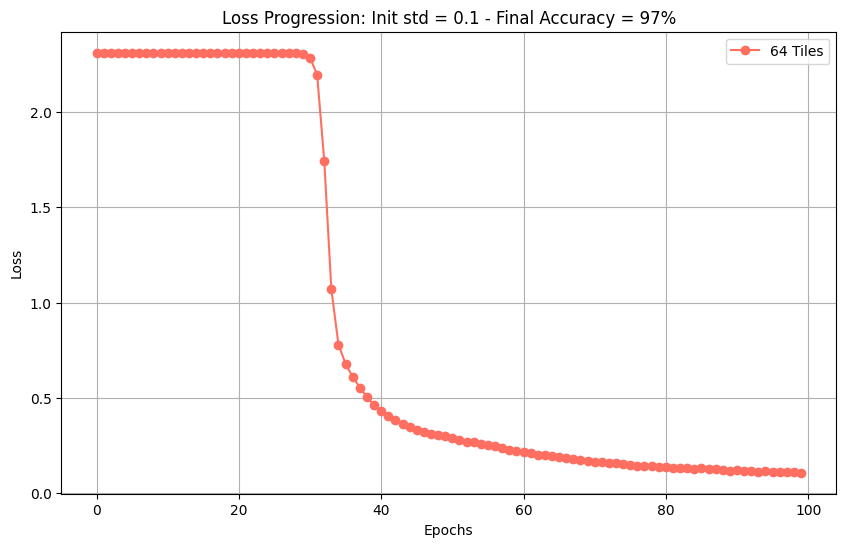

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_v1 = pd.read_csv('mnist_agad_vbadinit.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan
df_v1['digital_losses'] = df_v1['digital_losses'].str.replace('nan', 'None', regex=False).apply(eval)

# Extract the tile configurations and losses
tile_configurations = df_v1['num_tiles']
losses = df_v1['digital_losses']

# Plot the results
plt.figure(figsize=(10, 6))

# Define pastel colors
colors = ['#FF6F61']

for i, (tile_config, loss) in enumerate(zip(tile_configurations, losses)):
    loss = [l*64 for l in loss]
    plt.plot(loss, label=f'{tile_config} Tiles', color=colors[i % len(colors)], marker='o', alpha=1)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Progression: Init std = 0.1 - Final Accuracy = 97%')
plt.legend()
plt.grid(True)
plt.show()

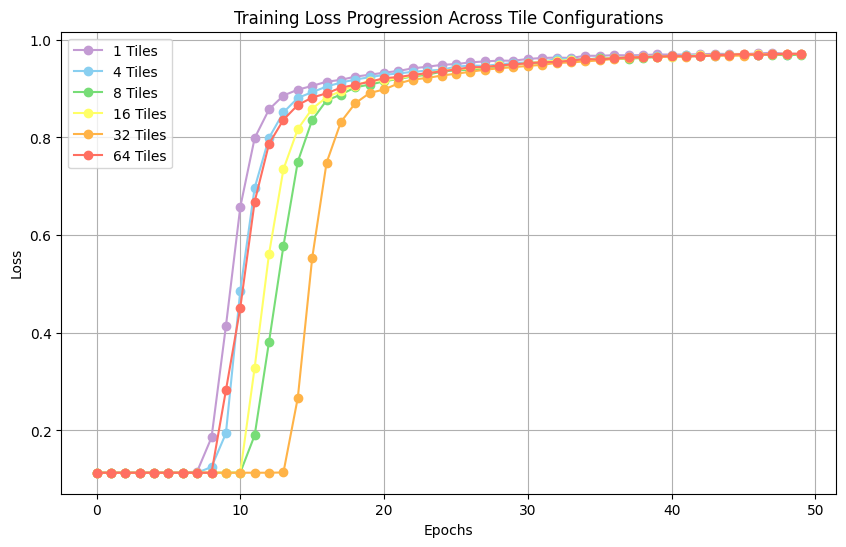

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_v1 = pd.read_csv('mnist_agad_init_test.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan
df_v1['digital_accuracies'] = df_v1['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)
df_v1['digital_accuracies'] = df_v1['digital_accuracies'].apply(lambda x: x[0])

# keep only those with 0.02 init_std
df_v1 = df_v1[df_v1['init_std'] == 0.02]

# Extract the tile configurations and losses
tile_configurations = df_v1['num_tiles']
losses = df_v1['digital_accuracies']

# Plot the results
plt.figure(figsize=(10, 6))

# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77','#FFFF66','#FFB347','#FF6F61']

for i, (tile_config, loss) in enumerate(zip(tile_configurations, losses)):
    plt.plot(loss, label=f'{tile_config} Tiles', color=colors[i % len(colors)], marker='o', alpha=1)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Progression Across Tile Configurations')
plt.legend()
plt.grid(True)
plt.show()

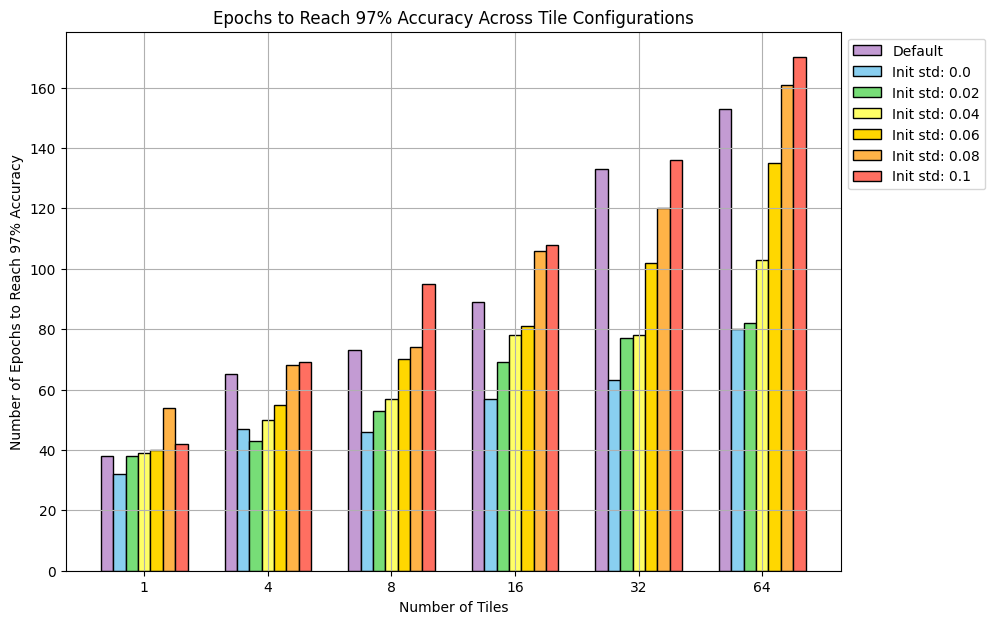

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_epochs.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Extract unique noise settings
noise_settings = df['init_std'].unique()

# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32, 64]

# Create a figure
plt.figure(figsize=(10, 7))

# Set the width of each bar
bar_width = 0.1

# Create a bar chart for each noise setting
for i, noise in enumerate(noise_settings):
    # Filter the dataframe for the current noise setting
    df_filtered = df[df['init_std'] == noise]
    
    # Calculate the number of epochs to reach 97% accuracy for each tile configuration
    epochs_to_reach_97 = []
    for config in tile_configurations:
        epochs = len(df_filtered[df_filtered['num_tiles'] == config]['digital_accuracies'].values[0][0]) #/ config
        epochs_to_reach_97.append(epochs)
    
    # Define the position of the bars
    bar_positions = np.arange(len(tile_configurations)) + i * bar_width
    
    # Plot the bars
    plt.bar(bar_positions, epochs_to_reach_97, bar_width, label=f'Init std: {noise}' if noise >= 0 else 'Default', color=colors[i % len(colors)], edgecolor='black')

# Set the labels and title
plt.xlabel('Number of Tiles')
plt.ylabel('Number of Epochs to Reach 97% Accuracy')
plt.xticks(np.arange(len(tile_configurations)) + bar_width * (len(noise_settings) - 1) / 2, tile_configurations)
plt.title('Epochs to Reach 97% Accuracy Across Tile Configurations')
plt.grid(True)
# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 700x500 with 0 Axes>

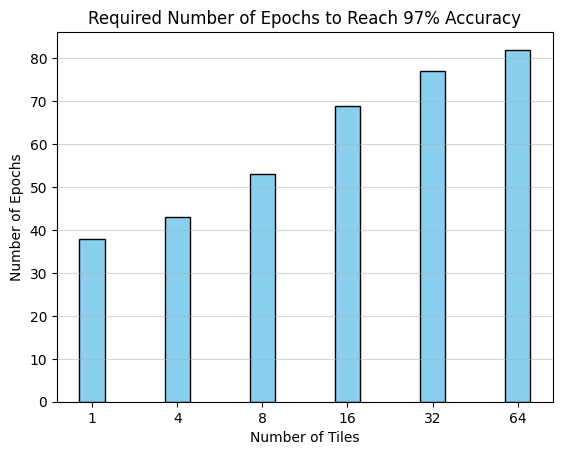

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_epochs.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Extract unique noise settings
noise_settings = [0.02]

# Define pastel colors
colors = ['#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']#'#C39BD3',

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32, 64]

# Create a figure
plt.figure(figsize=(7, 5))
plt.figure(dpi=100)

# Set the width of each bar
bar_width = 0.3

# Create a bar chart for each noise setting
for i, noise in enumerate(noise_settings):
    # Filter the dataframe for the current noise setting
    df_filtered = df[df['init_std'] == noise]
    
    # Calculate the number of epochs to reach 97% accuracy for each tile configuration
    epochs_to_reach_97 = []
    for config in tile_configurations:
        epochs = len(df_filtered[df_filtered['num_tiles'] == config]['digital_accuracies'].values[0][0]) #/ config
        epochs_to_reach_97.append(epochs)
    
    # Define the position of the bars
    bar_positions = np.arange(len(tile_configurations)) + i * bar_width
    
    # Plot the bars
    plt.bar(bar_positions, epochs_to_reach_97, bar_width, label=f'Init std: {noise}' if noise >= 0 else 'Default', color=colors[i % len(colors)], edgecolor='black')

# Set the labels and title
plt.xlabel('Number of Tiles')
plt.ylabel('Number of Epochs')
plt.xticks(np.arange(len(tile_configurations)) + bar_width * (len(noise_settings) - 1) / 2, tile_configurations)
plt.title('Required Number of Epochs to Reach 97% Accuracy')
plt.grid(True, axis='y', alpha=0.5)
# Add a legend outside the plot
plt.show()

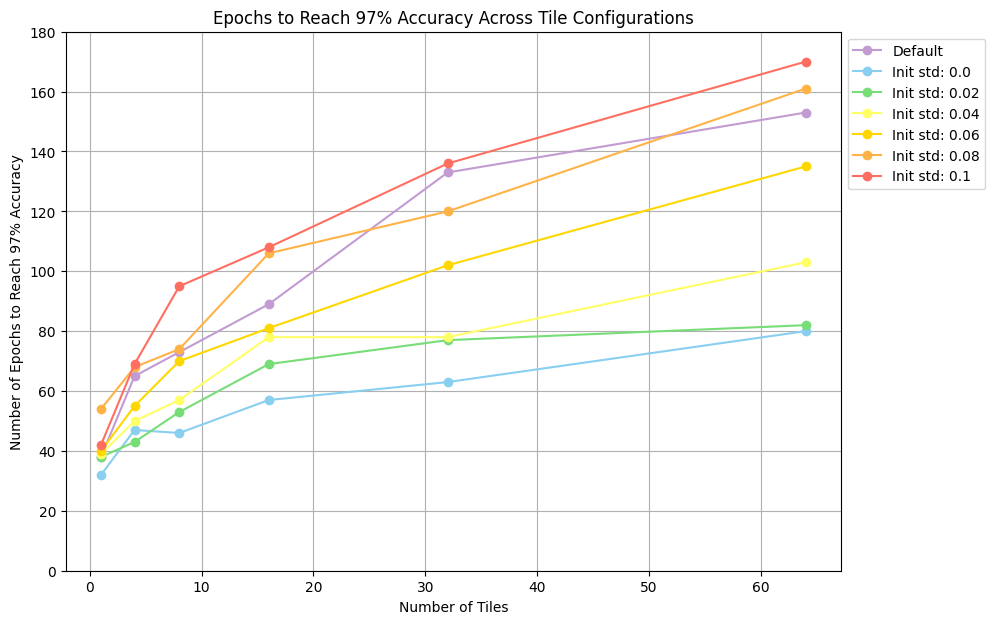

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_epochs.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Extract unique noise settings
noise_settings = df['init_std'].unique()

# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32, 64]

# Create a figure
plt.figure(figsize=(10, 7))

# Create a line plot for each noise setting
for i, noise in enumerate(noise_settings):
    # Filter the dataframe for the current noise setting
    df_filtered = df[df['init_std'] == noise]
    
    # Calculate the number of epochs to reach 97% accuracy for each tile configuration
    epochs_to_reach_97 = []
    for config in tile_configurations:
        epochs = len(df_filtered[df_filtered['num_tiles'] == config]['digital_accuracies'].values[0][0]) #/ config
        epochs_to_reach_97.append(epochs)
    
    # Plot the line
    plt.plot(tile_configurations, epochs_to_reach_97, marker='o', label=f'Init std: {noise}' if noise >= 0 else 'Default', color=colors[i % len(colors)])

# Set the labels and title
plt.xlabel('Number of Tiles')
plt.ylabel('Number of Epochs to Reach 97% Accuracy')
plt.title('Epochs to Reach 97% Accuracy Across Tile Configurations')
plt.grid(True)
# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.xscale('log')
plt.ylim(0, 180)
plt.show()

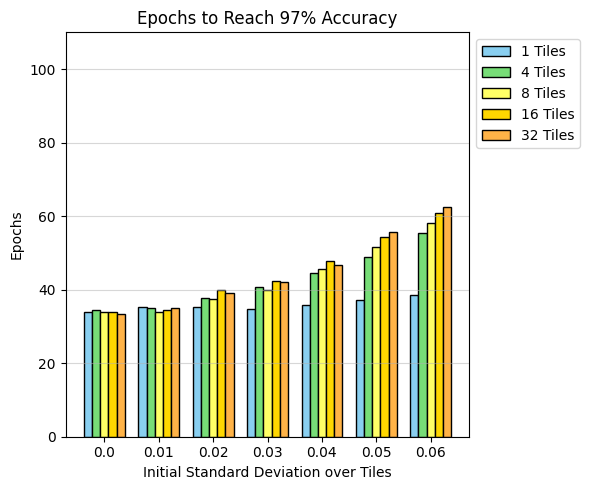

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_epochs_xavier_v1.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Extract unique noise settings
noise_settings = df['init_std'].unique()

# Define pastel colors
colors = ['#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32]

# Create a figure
plt.figure(figsize=(6, 5),dpi=100)

# Set the width of each bar
bar_width = 0.15

# Create a bar chart for each tile configuration, grouped by init_std
for i, config in enumerate(tile_configurations):
    # Filter the dataframe for the current tile configuration
    df_filtered = df[df['num_tiles'] == config]

    # Prepare data for plotting
    epochs_data = []
    labels = []
    for noise in noise_settings:
        # Filter for the current noise setting
        df_noise = df_filtered[df_filtered['init_std'] == noise]
        
        # Check if there is data for this noise setting
        if not df_noise.empty:
            # Calculate the number of epochs to reach 97% accuracy
            epochs = np.mean([len(run) for inner in df_noise['digital_accuracies'] for run in inner])
            epochs_data.append(epochs)
            labels.append(f'Init std: {noise}' if noise >= 0 else 'Default')
        else:
            epochs_data.append(0)
            labels.append(f'Init std: {noise}' if noise >= 0 else 'Default')

    # Define the position of the bars
    bar_positions = np.arange(len(noise_settings)) + i * bar_width

    # Plot the bars
    plt.bar(bar_positions, epochs_data, bar_width, label=f'{config} Tiles', color=colors[i % len(colors)], edgecolor='black')

# Set the labels and title
plt.xlabel('Initial Standard Deviation over Tiles')
plt.ylabel('Epochs')
plt.ylim(0, 110)
plt.xticks(np.arange(len(noise_settings)) + bar_width * (len(tile_configurations) - 1) / 2, [f'{noise}' if noise >= 0 else 'Default' for noise in noise_settings])
plt.title('Epochs to Reach 97% Accuracy')
plt.grid(True, axis='y', alpha=0.5)

# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


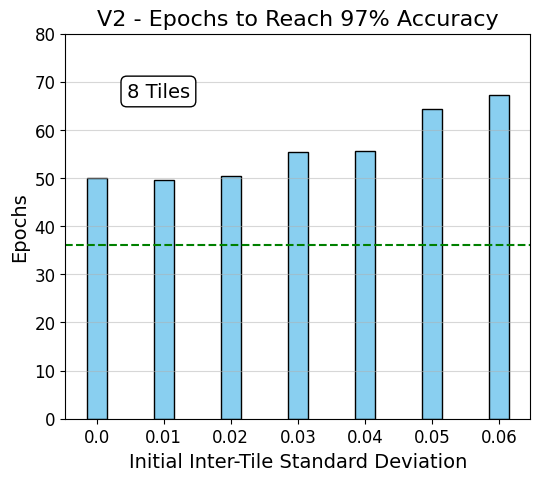

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_epochs_xavier_v2.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Extract unique noise settings
noise_settings = df['init_std'].unique()

# Define pastel colors
colors = ['#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']

# Define the tile configurations
tile_configurations = [8]

# Create a figure
plt.figure(figsize=(6, 5), dpi=100)

# Set the width of each bar
bar_width = 0.3

# Create a bar chart for each tile configuration, grouped by init_std
for i, config in enumerate(tile_configurations):
    # Filter the dataframe for the current tile configuration
    df_filtered = df[df['num_tiles'] == config]

    # Prepare data for plotting
    epochs_data = []
    labels = []
    for noise in noise_settings:
        # Filter for the current noise setting
        df_noise = df_filtered[df_filtered['init_std'] == noise]
        
        # Check if there is data for this noise setting
        if not df_noise.empty:
            # Calculate the number of epochs to reach 97% accuracy
            epochs = np.mean([len(run) for inner in df_noise['digital_accuracies'] for run in inner])
            epochs_data.append(epochs)
            labels.append(f'Init std: {noise}' if noise >= 0 else 'Default')
        else:
            epochs_data.append(0)
            labels.append(f'Init std: {noise}' if noise >= 0 else 'Default')

    # Define the position of the bars
    bar_positions = np.arange(len(noise_settings)) + i * bar_width

    # Plot the bars
    plt.bar(bar_positions, epochs_data, bar_width, color=colors[i % len(colors)], edgecolor='black')

plt.axhline(y=36, color='green', linestyle='--', label='AGAD Reference')
# Set the labels and title
plt.xlabel('Initial Inter-Tile Standard Deviation', fontsize=14)
plt.ylabel('Epochs', fontsize=14)
plt.ylim(0, 80)
plt.yticks(fontsize=12)
plt.xticks(np.arange(len(noise_settings)) + bar_width * (len(tile_configurations) - 1) / 2, [f'{noise}' if noise >= 0 else 'Default' for noise in noise_settings], fontsize=12)
plt.title('V2 - Epochs to Reach 97% Accuracy', fontsize=16)
plt.grid(True, axis='y', alpha=0.5)
plt.text(0.2, 0.85, '8 Tiles', ha='center', va='center', transform=plt.gca().transAxes, fontsize=14, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Add a legend outside the plot
#plt.legend()
#plt.tight_layout()
plt.show()

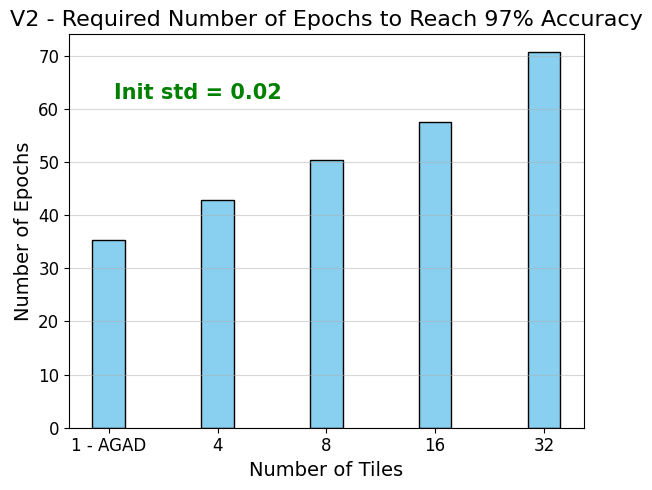

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_epochs_xavier_v2.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Filter only the data where init_std = 0.02
df = df[df['init_std'] == 0.02]

# Define pastel colors
colors = ['#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']#'#C39BD3',

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32]

# Create a figure
plt.figure(figsize=(6, 5), dpi=100)

# Set the width of each bar
bar_width = 0.3

# Calculate the number of epochs to reach 97% accuracy for each tile configuration
epochs_to_reach_97 = []
for config in tile_configurations:
    # Filter the data for this tile configuration
    df_filtered = df[df['num_tiles'] == config]
    
    # Check if there is data for this configuration
    if not df_filtered.empty:
        # Calculate the number of epochs to reach 97% accuracy
        epochs = np.mean([len(run) for inner in df_filtered['digital_accuracies'] for run in inner])
        epochs_to_reach_97.append(epochs)
    else:
        # If no data for this configuration, append 0
        epochs_to_reach_97.append(0)

# Define the position of the bars
bar_positions = np.arange(len(tile_configurations))

# Plot the bars
plt.bar(bar_positions, epochs_to_reach_97, bar_width, color=colors[0], edgecolor='black')

# Set the labels and title
plt.xlabel('Number of Tiles', fontsize=14)
plt.ylabel('Number of Epochs', fontsize=14)
plt.ylim(0, 74)
tile_configurations[0] = '1 - AGAD'
plt.xticks(bar_positions, tile_configurations, fontsize=12)
plt.yticks(fontsize=12)
plt.title('V2 - Required Number of Epochs to Reach 97% Accuracy', fontsize=16)
plt.grid(True, axis='y', alpha=0.5)
plt.text(0.25, 0.85, 'Init std = 0.02', fontsize=15, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

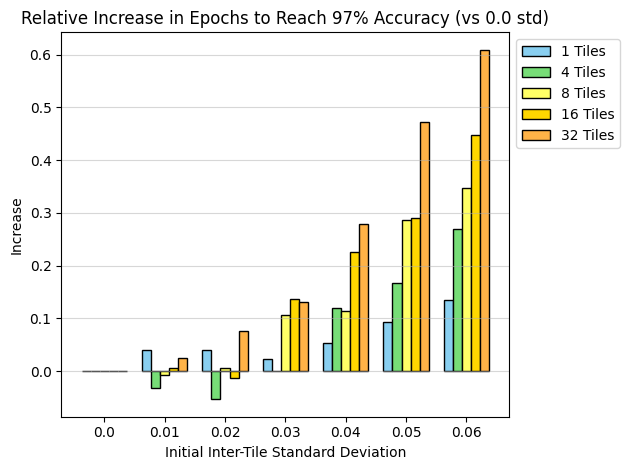

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_epochs_xavier_v2.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Extract unique noise settings
noise_settings = df['init_std'].unique()

# Define pastel colors
colors = ['#89CFF0', '#77DD77', '#FFFF66', '#FFD700', '#FFB347', '#FF6F61']

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32]

# Create a figure
plt.figure(figsize=(8, 5),dpi=100)

# Set the width of each bar
bar_width = 0.15

# Create a bar chart for each tile configuration, grouped by init_std
for i, config in enumerate(tile_configurations):
    # Filter the dataframe for the current tile configuration
    df_filtered = df[df['num_tiles'] == config]

    # Prepare data for plotting
    percentage_increase_data = []
    labels = []
    for noise in noise_settings:
        # Filter for the current noise setting
        df_noise = df_filtered[df_filtered['init_std'] == noise]

        # Check if there is data for this noise setting
        if not df_noise.empty:
            # Calculate the number of epochs to reach 97% accuracy
            epochs = np.mean([len(run) for inner in df_noise['digital_accuracies'] for run in inner])

            # Find the epochs for the 0.0 std setting for the same tile config
            df_zero_noise = df_filtered[df_filtered['init_std'] == 0.0]
            if not df_zero_noise.empty:
                epochs_zero = np.mean([len(inner) for inner in df_zero_noise['digital_accuracies'].iloc[0]])

                # Calculate the percentage increase over the 0.0 std setting
                if epochs_zero > 0:
                    percentage_increase = ((epochs - epochs_zero) / epochs_zero)
                else:
                    percentage_increase = 0  # Avoid division by zero
            else:
                percentage_increase = 0
            percentage_increase_data.append(percentage_increase)
            labels.append(f'Init std: {noise}' if noise >= 0 else 'Default')
        else:
            percentage_increase_data.append(0)
            labels.append(f'Init std: {noise}' if noise >= 0 else 'Default')

    # Define the position of the bars
    bar_positions = np.arange(len(noise_settings)) + i * bar_width

    # Plot the bars
    plt.bar(bar_positions, percentage_increase_data, bar_width, label=f'{config} Tiles', color=colors[i % len(colors)], edgecolor='black')

# Set the labels and title
plt.xlabel('Initial Inter-Tile Standard Deviation')
plt.ylabel('Increase')
plt.xticks(np.arange(len(noise_settings)) + bar_width * (len(tile_configurations) - 1) / 2, [f'{noise}' if noise >= 0 else 'Default' for noise in noise_settings])
plt.title('Relative Increase in Epochs to Reach 97% Accuracy (vs 0.0 std)')
plt.grid(True, axis='y', alpha=0.5)

# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


# Speedup

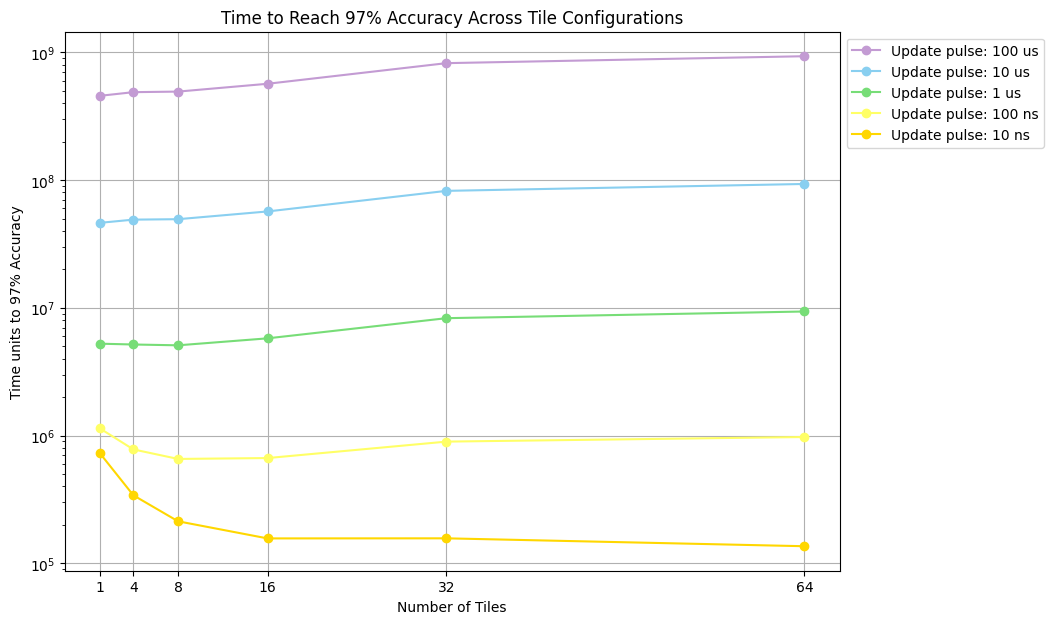

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_epochs.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Filter the dataframe for the default noise setting (init_std = -1)
df_default = df[df['init_std'] == -1]

# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32, 64]

# Create a figure
plt.figure(figsize=(10, 7))

pulse_lengths = [100, 10, 1, 0.1, 0.01]
forward_pass = 0.1
backward_pass = 0.1
A_to_H = 0.1
constant_times = (forward_pass + backward_pass + A_to_H) * 1

# Create 10 variations of the line
for pl in pulse_lengths:
    # Calculate the number of epochs to reach 97% accuracy for each tile configuration
    time_to_reach_97 = []
    for config in tile_configurations:
        epochs = len(df_default[df_default['num_tiles'] == config]['digital_accuracies'].values[0][0])
        batches = 60000 / config * epochs
        #time = (constant_times + pl) * batches + epochs * pl * 60000
        time = (constant_times + pl + pl*config) * batches 
        time_to_reach_97.append(time)
    
    # Plot the line
    plt.plot(tile_configurations, time_to_reach_97, marker='o', 
             label=f'Update pulse: {pl} us' if pl >= 1 else f'Update pulse: {pl*1000:.0f} ns',
             color=colors.pop(0))

# Set the labels and title
plt.xlabel('Number of Tiles')
plt.ylabel('Time units to 97% Accuracy')
plt.title('Time to Reach 97% Accuracy Across Tile Configurations')
plt.grid(True)
# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.yscale('log')
#plt.ylim(0, 180)
plt.xticks([1, 4, 8, 16, 32, 64])
plt.show()

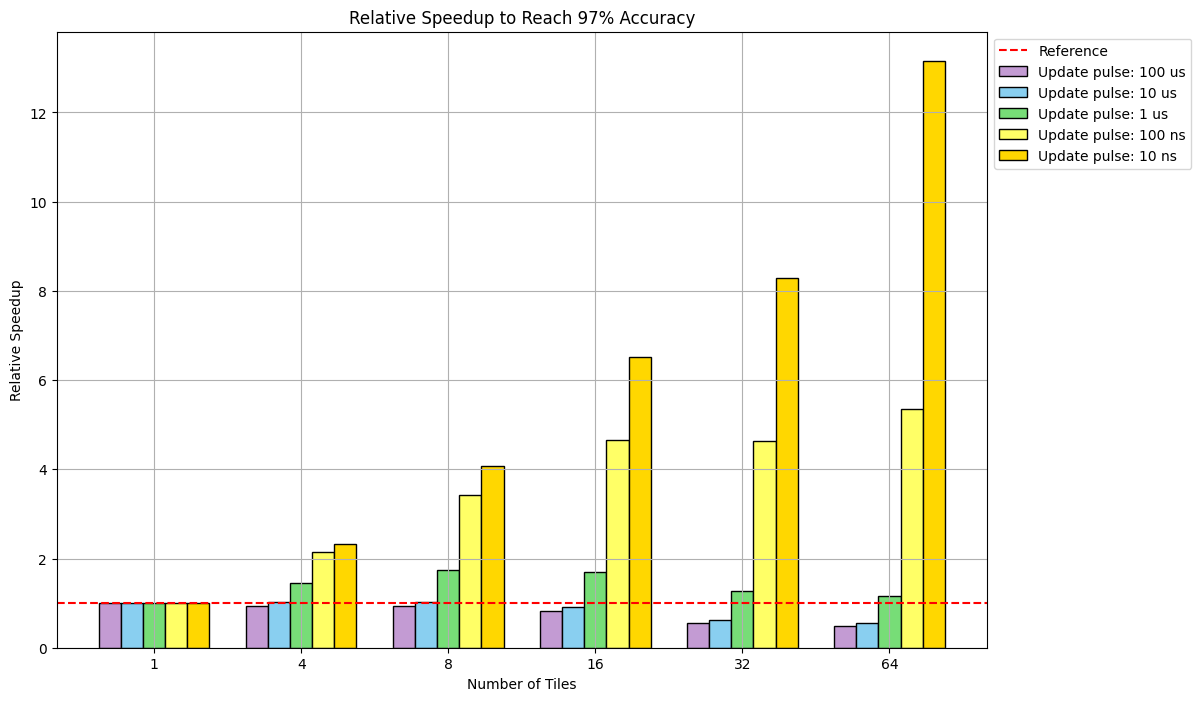

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_epochs.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Filter the dataframe for the default noise setting (init_std = -1)
df_default = df[df['init_std'] == -1]

# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32, 64]

# Create a figure
plt.figure(figsize=(12, 8))

pulse_lengths = [100, 10, 1, 0.1, 0.01]
forward_pass = 0.1
backward_pass = 0.1
A_to_H = 0.1
constant_times = (forward_pass + backward_pass + A_to_H) * 10

# Calculate the time to reach 97% accuracy for each tile configuration and pulse length
time_to_reach_97 = {}
for pl in pulse_lengths:
    time_to_reach_97[pl] = []
    for config in tile_configurations:
        epochs = len(df_default[df_default['num_tiles'] == config]['digital_accuracies'].values[0][0])
        batches = 60000 / config * epochs
        #time = (constant_times + pl) * batches + epochs * pl * 60000
        time = (constant_times + pl + pl*config) * batches 
        time_to_reach_97[pl].append(time)

# Calculate the relative speedup compared to the tile configuration with 1 tile
relative_speedup = {}
for pl in pulse_lengths:
    relative_speedup[pl] = [time_to_reach_97[pl][0] / t for t in time_to_reach_97[pl]]

# Plot the relative speedup as a bar plot
bar_width = 0.15
index = np.arange(len(tile_configurations))

for i, pl in enumerate(pulse_lengths):
    plt.bar(index + i * bar_width, relative_speedup[pl], bar_width, label=f'Update pulse: {pl} us' if pl >= 1 else f'Update pulse: {pl*1000:.0f} ns', color=colors[i], edgecolor='black')

# Set the labels and title
plt.xlabel('Number of Tiles')
plt.ylabel('Relative Speedup')
# plot a horizontal reference dashed line at y = 1
plt.axhline(y=1, color='red', linestyle='--', label='Reference')
plt.title('Relative Speedup to Reach 97% Accuracy')
plt.xticks(index + bar_width * (len(pulse_lengths) - 1) / 2, tile_configurations)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

<Figure size 800x500 with 0 Axes>

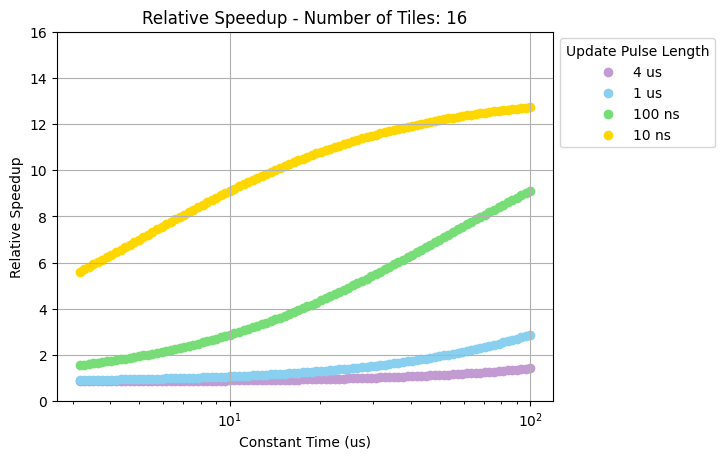

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_epochs_xavier_v1.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Filter the dataframe for the default noise setting (init_std = -1)
df_default = df[df['init_std'] == 0.02]

# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77', '#FFD700', '#FFB347','#FF6F61']

# Define the tile configurations
tile_configurations = [1, 4, 8, 16]

# Define pulse lengths
pulse_lengths = [4, 1, 0.1, 0.01]#100, 10,

# Define constant times to test
constant_times_list = np.logspace(0.5, 2, 100) #-1

# Create a figure
plt.figure(figsize=(8, 5))
plt.figure(dpi=100)

# Calculate the relative speedup for each constant time
for pl in pulse_lengths:
    relative_speedups = []
    for constant_times in constant_times_list:
        time_to_reach_97 = []
        for config in tile_configurations:
            epochs = len(df_default[df_default['num_tiles'] == config]['digital_accuracies'].values[0][0])
            batches = 60000 / config * epochs
            #time = (constant_times + pl) * batches + epochs * pl * 60000
            time = (constant_times + 31*pl*config + pl*config) * batches 
            time_to_reach_97.append(time)
        
        # Calculate the relative speedup compared to the tile configuration with 1 tile
        relative_speedup = time_to_reach_97[0] / time_to_reach_97[-1]
        relative_speedups.append(relative_speedup)
    
    # Plot the scatter plot
    plt.scatter(constant_times_list, relative_speedups, 
                label=f'{pl} us' if pl >= 1 else f'{pl*1000:.0f} ns',
                color=colors.pop(0))

# Set the labels and title
plt.xlabel('Constant Time (us)')
plt.ylabel('Relative Speedup')
plt.title('Relative Speedup - Number of Tiles: ' + str(tile_configurations[-1]))
plt.xscale('log')
# plt.yscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Update Pulse Length')
# from 0 to 31
plt.ylim(0, 16)
plt.grid(True)
plt.show()

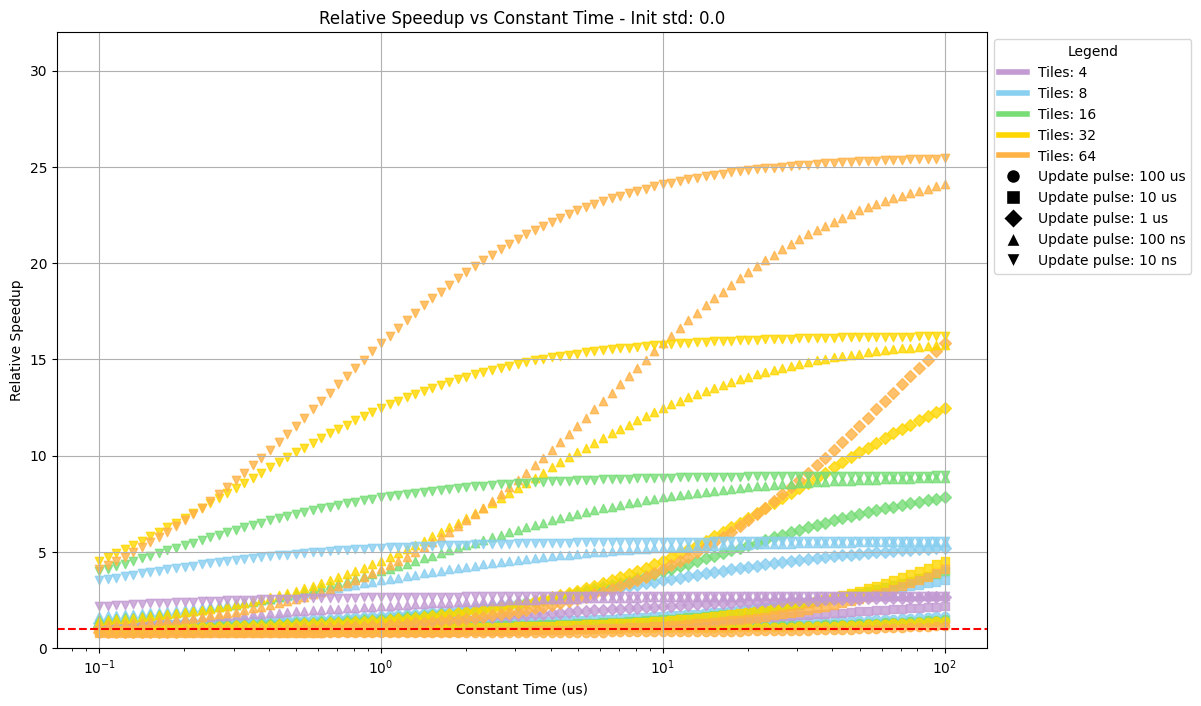

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_epochs.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Filter the dataframe for the default noise setting (init_std = -1)
init_std = 0.00
df_default = df[df['init_std'] == init_std]

# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77', '#FFD700', '#FFB347']

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32, 64]

# Define pulse lengths
pulse_lengths = [100, 10, 1, 0.1, 0.01]

# Define constant times to test
constant_times_list = np.logspace(-1, 2, 100)

# Define marker shapes
markers = ['o', 's', 'D', '^', 'v']

# Create a figure
plt.figure(figsize=(12, 8))

# Calculate the relative speedup for each constant time
for i, pl in enumerate(pulse_lengths):
    for j, config in enumerate(tile_configurations[1:]):  # Skip the first configuration (1 tile) as it is the reference
        relative_speedups = []
        for constant_times in constant_times_list:
            time_to_reach_97 = []
            for tile_config in [1, config]:
                epochs = len(df_default[df_default['num_tiles'] == tile_config]['digital_accuracies'].values[0][0])
                batches = 60000 / tile_config * epochs
                time = (constant_times + pl) * batches + epochs * pl * 60000
                time_to_reach_97.append(time)
            
            # Calculate the relative speedup compared to the tile configuration with 1 tile
            relative_speedup = time_to_reach_97[0] / time_to_reach_97[1]
            relative_speedups.append(relative_speedup)
        
        # Plot the scatter plot
        plt.scatter(constant_times_list, relative_speedups, 
                    color=colors[j], marker=markers[i], alpha=0.8,
                    label=f'Update pulse: {pl} us, Tiles: {config}' if pl >= 1 else f'Update pulse: {pl*1000:.0f} ns, Tiles: {config}')

# Set the labels and title
plt.xlabel('Constant Time (us)')
plt.ylabel('Relative Speedup')
plt.ylim(0, 32)
plt.title('Relative Speedup vs Constant Time - Init std: ' + (format(init_std) if init_std >= 0 else 'Default'))
plt.xscale('log')
#plt.yscale('log')
plt.axhline(y=1, color='red', linestyle='--', label='Reference')

# Create custom legend
color_handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
color_labels = [f'Tiles: {config}' for config in tile_configurations[1:]]
marker_handles = [plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor='k', markersize=10) for marker in markers]
marker_labels = [f'Update pulse: {pl} us' if pl >= 1 else f'Update pulse: {pl*1000:.0f} ns' for pl in pulse_lengths]

plt.legend(color_handles + marker_handles, color_labels + marker_labels, loc='upper left', bbox_to_anchor=(1, 1), title='Legend')
plt.grid(True)
plt.show()

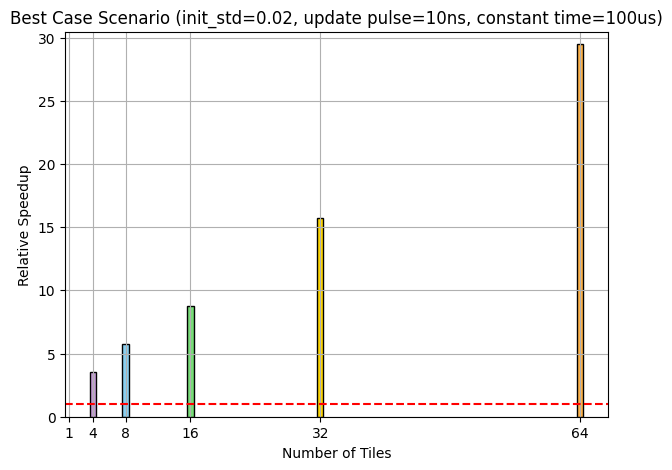

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_epochs.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Filter the dataframe for the best case scenario
init_std = 0.02
update_pulse = 0.01  # 10 ns
constant_time = 100  # 100 us
df_best_case = df[df['init_std'] == init_std]

# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77', '#FFD700', '#FFB347']

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32, 64]

# Create a figure
plt.figure(figsize=(7, 5))

# Calculate the relative speedup for the best case scenario
relative_speedups = []
for config in tile_configurations[1:]:  # Skip the first configuration (1 tile) as it is the reference
    time_to_reach_97 = []
    for tile_config in [1, config]:
        epochs = len(df_best_case[df_best_case['num_tiles'] == tile_config]['digital_accuracies'].values[0][0])
        batches = 60000 / tile_config * epochs
        time = (constant_time + update_pulse) * batches + epochs * update_pulse * 60000
        time_to_reach_97.append(time)
    
    # Calculate the relative speedup compared to the tile configuration with 1 tile
    relative_speedup = time_to_reach_97[0] / time_to_reach_97[1]
    relative_speedups.append(relative_speedup)

# Plot the bar chart
plt.bar(tile_configurations[1:], relative_speedups, color=colors[:len(tile_configurations[1:])], edgecolor='black')
plt.axhline(y=1, color='red', linestyle='--', label='Reference')
# Set the labels and title
plt.xlabel('Number of Tiles')
plt.ylabel('Relative Speedup')
plt.xticks([1, 4, 8, 16, 32, 64])
plt.ylim(0, max(relative_speedups) + 1)
plt.title('Best Case Scenario (init_std=0.02, update pulse=10ns, constant time=100us)')
plt.grid(True)
plt.show()

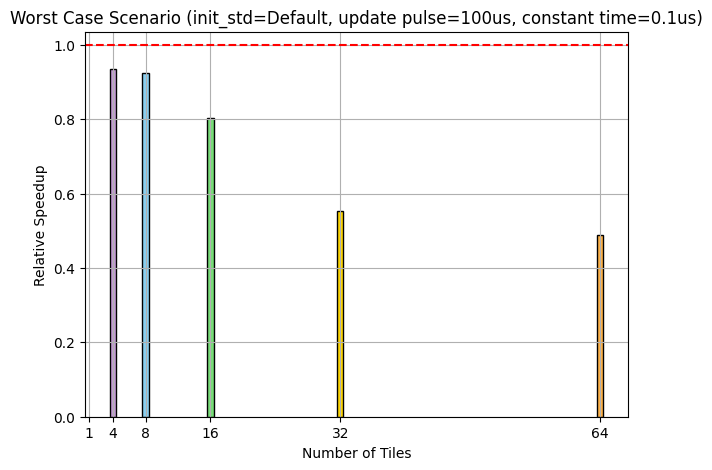

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_init_epochs.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Filter the dataframe for the worst case scenario
init_std = -1
update_pulse = 100  # 100 us
constant_time = 0.1  # 0.1 us
df_worst_case = df[df['init_std'] == init_std]

# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77', '#FFD700', '#FFB347']

# Define the tile configurations
tile_configurations = [1, 4, 8, 16, 32, 64]

# Create a figure
plt.figure(figsize=(7, 5))

# Calculate the relative speedup for the worst case scenario
relative_speedups = []
for config in tile_configurations[1:]:  # Skip the first configuration (1 tile) as it is the reference
    time_to_reach_97 = []
    for tile_config in [1, config]:
        epochs = len(df_worst_case[df_worst_case['num_tiles'] == tile_config]['digital_accuracies'].values[0][0])
        batches = 60000 / tile_config * epochs
        time = (constant_time + update_pulse) * batches + epochs * update_pulse * 60000
        time_to_reach_97.append(time)
    
    # Calculate the relative speedup compared to the tile configuration with 1 tile
    relative_speedup = time_to_reach_97[0] / time_to_reach_97[1]
    relative_speedups.append(relative_speedup)

# Plot the bar chart
plt.bar(tile_configurations[1:], relative_speedups, color=colors[:len(tile_configurations[1:])], edgecolor='black')
plt.axhline(y=1, color='red', linestyle='--', label='Reference')
# Set the labels and title
plt.xlabel('Number of Tiles')
plt.ylabel('Relative Speedup')
plt.xticks([1, 4, 8, 16, 32, 64])
plt.ylim(0, max(relative_speedups) + 0.1)
plt.title('Worst Case Scenario (init_std=Default, update pulse=100us, constant time=0.1us)')
plt.grid(True)
plt.show()

/tmp/ipykernel_6708/937055500.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_1_forward = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
/tmp/ipykernel_6708/937055500.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_1_update = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()
/tmp/ipykernel_6708/937055500.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_16_forward = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
/tmp/ipykernel_6708/937055500.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_16_update = multi_tile_sequential[multi_tile_sequen

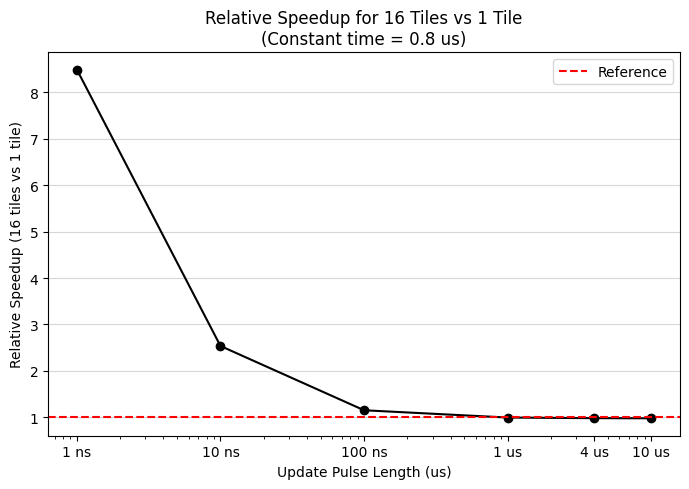

In [50]:
# Plot: Relative speedup vs update pulse length (x axis), for 16 tiles only, constant time fixed at 0.6 us
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
single_tile_df = pd.read_csv('log_1_new.csv')
multi_tile_df = pd.read_csv('log_16_new.csv')

tile_config = 16

# Calculate sequential operations
single_tile_sequential = single_tile_df.copy()
single_tile_sequential['Sequential_Ops'] = single_tile_sequential['Times']

multi_tile_sequential = multi_tile_df.copy()
multi_tile_sequential['Sequential_Ops'] = multi_tile_sequential['Times'] / multi_tile_sequential['Pfactor']

batches_1 = single_tile_sequential[single_tile_sequential['Meta_op'] == 'forward']['Sequential_Ops'].sum()
batches_16 =  multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'forward']['Sequential_Ops'].sum()

transfers_1_forward = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
transfers_1_update = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()
transfers_16_forward = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
transfers_16_update = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()

# Only care about 16 tiles
pulse_lengths = [10, 4, 1, 0.1, 0.01, 0.001]
constant_time = 0.6  # Fixed constant time

# Calculate the time to reach 97% accuracy for each pulse length for 1 tile and 16 tiles

times_1tile = []
times_16tile = []
for pl in pulse_lengths:
    # 1 tile
    time_1 = (constant_time + pl*31) * batches_1 + pl * transfers_1_update + constant_time/2 * transfers_1_forward
    times_1tile.append(time_1)
    # 16 tiles
    # forward and backward pass and update to A happens batches_16 times
    # the transfer from A/H to C consists of an single pulsed update to Cs and a forward pass for A
    time_16 = (constant_time + pl*31*16) * batches_16 + pl * transfers_16_update + constant_time/2 * transfers_16_forward
    times_16tile.append(time_16)

# Compute relative speedup (1 tile time / 16 tile time)
relative_speedup = np.array(times_1tile) / np.array(times_16tile)

# Plot
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(pulse_lengths, relative_speedup, marker='o', color='black')
plt.xscale('log')
plt.xlabel('Update Pulse Length (us)')
plt.ylabel('Relative Speedup (16 tiles vs 1 tile)')
plt.title('Relative Speedup for 16 Tiles vs 1 Tile\n(Constant time = 0.8 us)')
plt.axhline(y=1, color='red', linestyle='--', label='Reference')
plt.grid(True, axis='y', alpha=0.5)
plt.xticks(pulse_lengths, [f'{pl} us' if pl >= 1 else f'{pl*1000:.0f} ns' for pl in pulse_lengths])
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_6938/1515176589.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_1_forward = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
/tmp/ipykernel_6938/1515176589.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_1_update = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()
/tmp/ipykernel_6938/1515176589.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_16_forward = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
/tmp/ipykernel_6938/1515176589.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_16_update = multi_tile_sequential[multi_tile_se

batches_1: 7205840, batches_16: 905840.0
Ratio 1 tile: 1.6986222286367725, Ratio 16 tiles: 1.6890400070652654


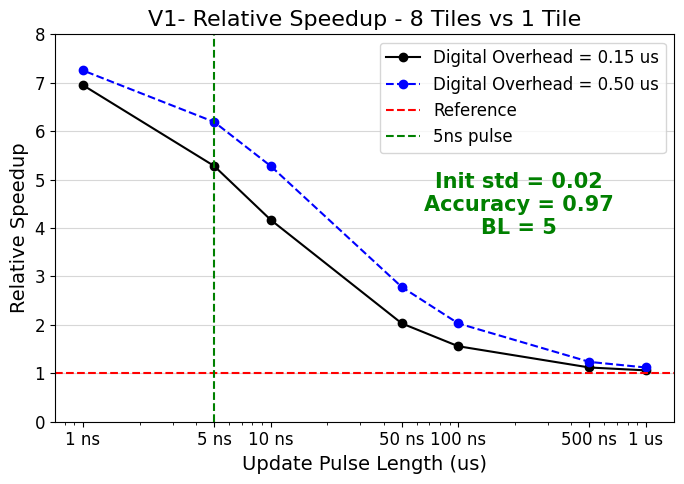

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
single_tile_df = pd.read_csv('logs/log_1_v1.csv')
multi_tile_df = pd.read_csv('logs/log_8_v1.csv')

tile_config = 8

# Calculate sequential operations
single_tile_sequential = single_tile_df.copy()
single_tile_sequential['Sequential_Ops'] = single_tile_sequential['Times']

multi_tile_sequential = multi_tile_df.copy()
multi_tile_sequential['Sequential_Ops'] = multi_tile_sequential['Times'] / multi_tile_sequential['Pfactor']

batches_1 = single_tile_sequential[single_tile_sequential['Meta_op'] == 'forward']['Sequential_Ops'].sum()
batches_16 = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'forward']['Sequential_Ops'].sum()

transfers_1_forward = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
transfers_1_update = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()
transfers_16_forward = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
transfers_16_update = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()

# scaling based on the number of epochs for different bls
print(f'batches_1: {batches_1}, batches_16: {batches_16}')
ratio_1 = 68*3 * 60000 / batches_1
ratio_16 = 68* 3 * 60000 / tile_config / batches_16

print(f'Ratio 1 tile: {ratio_1}, Ratio 16 tiles: {ratio_16}')

batches_1 *= ratio_1
batches_16 *= ratio_16
transfers_1_forward *= ratio_1
transfers_1_update *= ratio_1
transfers_16_forward *= ratio_16
transfers_16_update *= ratio_16

# Only care about 16 tiles
pulse_lengths = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
constant_times = [0.35, 0.7]  # Two different constant times
bl = 5

# Create a figure
plt.figure(figsize=(7, 5), dpi=100)

# Define line styles and colors for constant times
line_styles = ['-', '--']
line_colors = ['black', 'blue']

# Calculate the time to reach 97% accuracy for each pulse length and constant time
for idx, constant_time in enumerate(constant_times):
    # Calculate relative speedup for this constant time
    times_1tile = []
    times_16tile = []
    for pl in pulse_lengths:
        # 1 tile
        time_1 = (constant_time + pl*bl) * batches_1 + pl * transfers_1_update + constant_time/2 * transfers_1_forward
        times_1tile.append(time_1)
        # 16 tiles
        time_16 = (constant_time + pl*bl*tile_config) * batches_16 + pl * transfers_16_update + constant_time/2 * transfers_16_forward
        times_16tile.append(time_16)

    # Compute relative speedup (1 tile time / 16 tile time)
    relative_speedup = np.array(times_1tile) / np.array(times_16tile)

    # Plot with distinct line style and color
    plt.plot(pulse_lengths, relative_speedup, 
             marker='o', 
             color=line_colors[idx], 
             linestyle=line_styles[idx],
             label=f'Digital Overhead = {constant_time-0.2:.2f} us')

plt.xscale('log')
plt.xlabel('Update Pulse Length (us)', fontsize=14)
plt.ylabel('Relative Speedup', fontsize=14)
plt.ylim(0, 8)
plt.title('V1- Relative Speedup - 8 Tiles vs 1 Tile', fontsize=16)
plt.axhline(y=1, color='red', linestyle='--', label='Reference')
# add a vertical dashed line at x=5
plt.axvline(x=0.005, color='green', linestyle='--', label='5ns pulse')
plt.grid(True, axis='y', alpha=0.5)
plt.xticks(pulse_lengths, [f'{pl} us' if pl >= 1 else f'{pl*1000:.0f} ns' for pl in pulse_lengths], fontsize=12)
plt.yticks(fontsize=12)
plt.text(0.75, 0.56, f'Init std = 0.02\nAccuracy = 0.97\nBL = {bl}', fontsize=15, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_6708/3751688903.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_1_forward = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
/tmp/ipykernel_6708/3751688903.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_1_update = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()
/tmp/ipykernel_6708/3751688903.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_16_forward = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
/tmp/ipykernel_6708/3751688903.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_16_update = multi_tile_sequential[multi_tile_se

batches_1: 7205840, batches_16: 1175840.0
Ratio 1 tile: 0.9991895462569249, Ratio 16 tiles: 0.9950333378690979


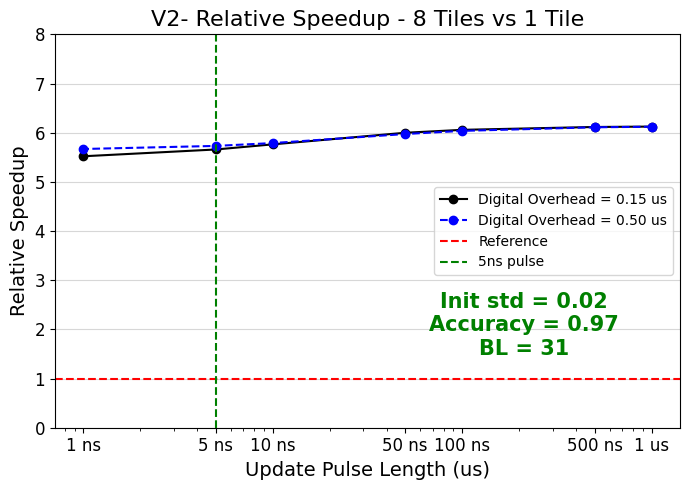

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
single_tile_df = pd.read_csv('logs/log_1_v2.csv')
multi_tile_df = pd.read_csv('logs/log_8_v2.csv')

tile_config = 8

# Calculate sequential operations
single_tile_sequential = single_tile_df.copy()
single_tile_sequential['Sequential_Ops'] = single_tile_sequential['Times']

multi_tile_sequential = multi_tile_df.copy()
multi_tile_sequential['Sequential_Ops'] = multi_tile_sequential['Times'] / multi_tile_sequential['Pfactor']

batches_1 = single_tile_sequential[single_tile_sequential['Meta_op'] == 'forward']['Sequential_Ops'].sum()
batches_16 = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'forward']['Sequential_Ops'].sum()

transfers_1_forward = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
transfers_1_update = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()
transfers_16_forward = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
transfers_16_update = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()

# scaling based on the number of epochs for different bls
# scaling based on the number of epochs for different bls
print(f'batches_1: {batches_1}, batches_16: {batches_16}')
ratio_1 = 40*3 * 60000 / batches_1
ratio_16 = 52* 3 * 60000 / tile_config / batches_16

print(f'Ratio 1 tile: {ratio_1}, Ratio 16 tiles: {ratio_16}')

batches_1 *= ratio_1
batches_16 *= ratio_16
transfers_1_forward *= ratio_1
transfers_1_update *= ratio_1
transfers_16_forward *= ratio_16
transfers_16_update *= ratio_16

# Only care about 16 tiles
pulse_lengths = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
constant_times = [0.35, 0.7]  # Two different constant times
bl = 31


# Create a figure
plt.figure(figsize=(7, 5), dpi=100)

# Define line styles and colors for constant times
line_styles = ['-', '--']
line_colors = ['black', 'blue']

# Calculate the time to reach 97% accuracy for each pulse length and constant time
for idx, constant_time in enumerate(constant_times):
    # Calculate relative speedup for this constant time
    times_1tile = []
    times_16tile = []
    for pl in pulse_lengths:
        # 1 tile
        time_1 = (constant_time + pl*bl) * batches_1 + pl * transfers_1_update + constant_time/2 * transfers_1_forward
        times_1tile.append(time_1)
        # 16 tiles
        # forward and backward pass and update to A happens batches_16 times
        # the transfer from A/H to C consists of an single pulsed update to Cs and a forward pass for A
        time_16 = (constant_time + pl*bl) * batches_16 + pl * transfers_16_update + constant_time/2 * transfers_16_forward + transfers_16_forward * 0.2
        times_16tile.append(time_16)

    # Compute relative speedup (1 tile time / 16 tile time)
    relative_speedup = np.array(times_1tile) / np.array(times_16tile)

    # Plot with distinct line style and color
    plt.plot(pulse_lengths, relative_speedup, 
             marker='o', 
             color=line_colors[idx], 
             linestyle=line_styles[idx],
             label=f'Digital Overhead = {constant_time-0.2:.2f} us')

plt.xscale('log')
plt.xlabel('Update Pulse Length (us)', fontsize=14)
plt.ylabel('Relative Speedup', fontsize=14)
plt.ylim(0, 8)
plt.title('V2- Relative Speedup - 8 Tiles vs 1 Tile', fontsize=16)
plt.axhline(y=1, color='red', linestyle='--', label='Reference')
# add a vertical dashed line at x=5
plt.axvline(x=0.005, color='green', linestyle='--', label='5ns pulse')
plt.grid(True, axis='y', alpha=0.5)
plt.xticks(pulse_lengths, [f'{pl} us' if pl >= 1 else f'{pl*1000:.0f} ns' for pl in pulse_lengths], fontsize=12)
plt.yticks(fontsize=12)
plt.text(0.75, 0.26, f'Init std = 0.02\nAccuracy = 0.97\nBL = {bl}', fontsize=15, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_6708/2772303261.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_16_forward = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
/tmp/ipykernel_6708/2772303261.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_16_update = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()


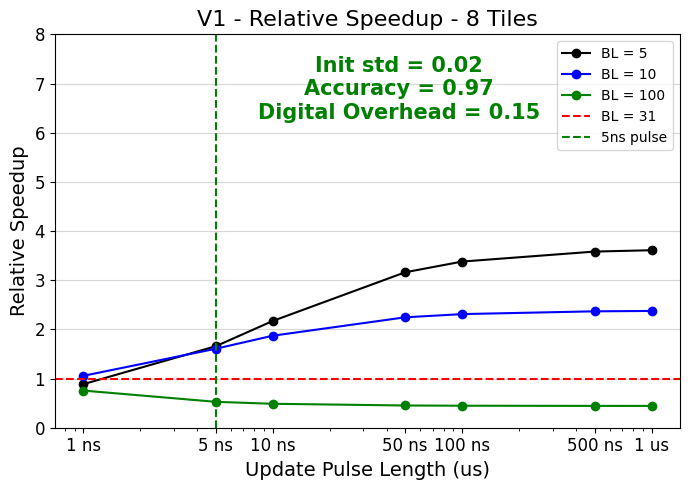

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
multi_tile_df = pd.read_csv('logs/log_8_v1.csv')
tile_config = 8

# Calculate sequential operations
multi_tile_sequential = multi_tile_df.copy()
multi_tile_sequential['Sequential_Ops'] = multi_tile_sequential['Times'] / multi_tile_sequential['Pfactor']

batches = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'forward']['Sequential_Ops'].sum()

transfers_16_forward = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
transfers_16_update = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()


# Only care about 16 tiles
pulse_lengths = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
constant_time = 0.35
bls = [5, 10, 100]
epoch_ratio = [68/40, 52/40, 28/40]
# epoch_ratio_1 = [63/40, 50/40, 30/40]
# epoch_ratio_8 = [124/52, 90/52, 38/52]

# Create a figure
plt.figure(figsize=(7, 5), dpi=100)

# Define line styles and colors for constant times
line_colors = ['black', 'blue', 'green']

# Calculate the time to reach 97% accuracy for each pulse length and constant time
for idx, bl in enumerate(bls):
    # Calculate relative speedup for this constant time
    times_1tile = []
    times_16tile = []
    for pl in pulse_lengths:
        # 1 tile
        time_1 = (constant_time + pl*31*tile_config) * batches + pl * transfers_16_update + constant_time/2 * transfers_16_forward
        times_1tile.append(time_1)
        # 16 tiles
        batches_a = batches * epoch_ratio[idx]
        transfers_16_forward_a = transfers_16_forward * epoch_ratio[idx]
        transfers_16_update_a = transfers_16_update * epoch_ratio[idx]
        time_16 = (constant_time + pl*bl*tile_config) * batches_a + pl * transfers_16_update_a + constant_time/2 * transfers_16_forward_a
        times_16tile.append(time_16)

    # Compute relative speedup (1 tile time / 16 tile time)
    relative_speedup = np.array(times_1tile) / np.array(times_16tile)

    # Plot with distinct line style and color
    plt.plot(pulse_lengths, relative_speedup, 
             marker='o', 
             color=line_colors[idx],
             label=f'BL = {bl}')

plt.xscale('log')
plt.xlabel('Update Pulse Length (us)', fontsize=14)
plt.ylabel('Relative Speedup', fontsize=14)
plt.ylim(0, 8)
plt.title('V1 - Relative Speedup - 8 Tiles', fontsize=16)
plt.axhline(y=1, color='red', linestyle='--', label='BL = 31')
# add a vertical dashed line at x=5
plt.axvline(x=0.005, color='green', linestyle='--', label='5ns pulse')
plt.grid(True, axis='y', alpha=0.5)
plt.xticks(pulse_lengths, [f'{pl} us' if pl >= 1 else f'{pl*1000:.0f} ns' for pl in pulse_lengths], fontsize=12)
plt.yticks(fontsize=12)
plt.text(0.55, 0.86, f'Init std = 0.02\nAccuracy = 0.97\nDigital Overhead = {constant_time-0.2:.2f}', fontsize=15, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_6708/472977270.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_16_forward = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
/tmp/ipykernel_6708/472977270.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_16_update = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()


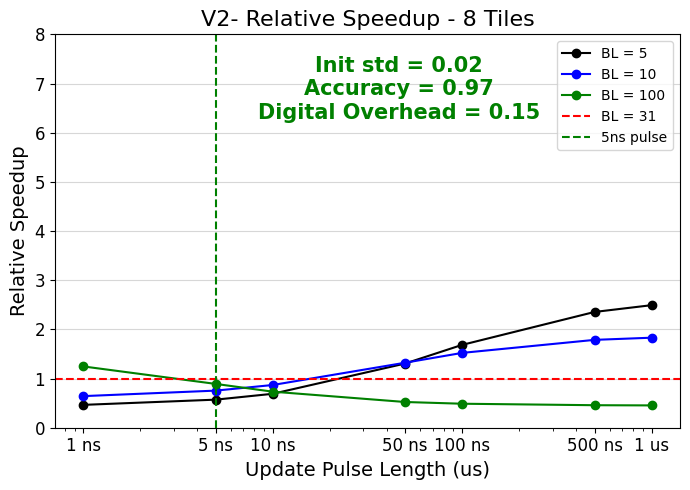

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
multi_tile_df = pd.read_csv('logs/log_8_v2.csv')

# Calculate sequential operations
multi_tile_sequential = multi_tile_df.copy()
multi_tile_sequential['Sequential_Ops'] = multi_tile_sequential['Times'] / multi_tile_sequential['Pfactor']

batches = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'forward']['Sequential_Ops'].sum()

transfers_16_forward = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
transfers_16_update = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()


# Only care about 16 tiles
pulse_lengths = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
constant_time = 0.35
bls = [5, 10, 100]
#epoch_ratio_1 = [63/40, 50/40, 30/40]
epoch_ratio = [126/55, 90/55, 38/55]

# Create a figure
plt.figure(figsize=(7, 5), dpi=100)

# Define line styles and colors for constant times
line_colors = ['black', 'blue', 'green']

# Calculate the time to reach 97% accuracy for each pulse length and constant time
for idx, bl in enumerate(bls):
    # Calculate relative speedup for this constant time
    times_1tile = []
    times_16tile = []
    for pl in pulse_lengths:
        # 1 tile
        time_1 = (constant_time + pl*31) * batches + pl * transfers_16_update + constant_time/2 * transfers_16_forward + transfers_16_forward * 0.2
        times_1tile.append(time_1)
        # 16 tiles
        batches_a = batches * epoch_ratio[idx]
        transfers_16_forward_a = transfers_16_forward * epoch_ratio[idx]
        transfers_16_update_a = transfers_16_update * epoch_ratio[idx]
        time_16 = (constant_time + pl*bl) * batches_a + pl * transfers_16_update_a + constant_time/2 * transfers_16_forward_a + transfers_16_forward_a * 0.2
        times_16tile.append(time_16)

    # Compute relative speedup (1 tile time / 16 tile time)
    relative_speedup = np.array(times_1tile) / np.array(times_16tile)

    # Plot with distinct line style and color
    plt.plot(pulse_lengths, relative_speedup, 
             marker='o', 
             color=line_colors[idx],
             label=f'BL = {bl}')

plt.xscale('log')
plt.xlabel('Update Pulse Length (us)', fontsize=14)
plt.ylabel('Relative Speedup', fontsize=14)
plt.ylim(0, 8)
plt.title('V2- Relative Speedup - 8 Tiles', fontsize=16)
plt.axhline(y=1, color='red', linestyle='--', label='BL = 31')
# add a vertical dashed line at x=5
plt.axvline(x=0.005, color='green', linestyle='--', label='5ns pulse')
plt.grid(True, axis='y', alpha=0.5)
plt.xticks(pulse_lengths, [f'{pl} us' if pl >= 1 else f'{pl*1000:.0f} ns' for pl in pulse_lengths], fontsize=12)
plt.yticks(fontsize=12)
plt.text(0.55, 0.86, f'Init std = 0.02\nAccuracy = 0.97\nDigital Overhead = {constant_time-0.2:.2f}', fontsize=15, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Load the data
tile_configurations = [1, 4, 8, 16, 32]
bls = [2, 5, 10, 31, 100]

# Only care about 16 tiles
pl = 0.005
constant_time = 0.35
epochs_df = pd.read_csv('logs/epochs_to_reach_97_v2.csv')
#data_epochs = [40,40,40,40,40]
data_epochs = [40, 45, 52, 58, 72]

results = []

for idx, tile_config in enumerate(tile_configurations):
    tile_df = pd.read_csv(f'logs/log_{tile_config}_v2.csv')

    # Calculate sequential operations
    tile_sequential = tile_df.copy()
    tile_sequential['Sequential_Ops'] = tile_sequential['Times'] / tile_sequential['Pfactor']

    fandB = tile_sequential[tile_sequential['Meta_op'] == 'forward']['Sequential_Ops'].sum()
    updates = tile_sequential[tile_sequential['Meta_op'] == 'update']['Sequential_Ops'].sum()

    transfers_forward = tile_sequential[(tile_sequential['Meta_op'] == 'transfer') & (tile_sequential['Op'] == 'forward')]['Sequential_Ops'].sum()
    transfers_update = tile_sequential[(tile_sequential['Meta_op'] == 'transfer') & (tile_sequential['Op'] == 'update')]['Sequential_Ops'].sum()

    read = tile_sequential[tile_sequential['Meta_op'] == 'read']['Sequential_Ops'].sum()
    program_forward = tile_sequential[(tile_sequential['Meta_op'] == 'program') & (tile_sequential['Op'] == 'forward')]['Sequential_Ops'].sum()
    program_update = tile_sequential[(tile_sequential['Meta_op'] == 'program') & (tile_sequential['Op'] == 'update')]['Sequential_Ops'].sum()

    # Calculate the time to reach 97% accuracy for each pulse length and constant time
    for bl in bls:
        epochs = epochs_df[(epochs_df['tiles'] == tile_config) & (epochs_df['bl'] == bl)]['epochs'].values[0] / data_epochs[idx]
        fandB_a = fandB * epochs
        updates_a = updates * epochs
        transfers_forward_a = transfers_forward * epochs
        transfers_update_a = transfers_update * epochs
        time1 = constant_time* fandB_a + pl*bl*updates_a  + pl * transfers_update_a + constant_time/2 * transfers_forward_a #+ transfers_forward_a * 0.2
        time2 = (read + program_forward) * constant_time/2 + program_update * pl
        results.append({
            'tiles': tile_config,
            'bl': bl,
            'time': time1 + time2,
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# save the results to a CSV file
results_df.to_csv('logs/times_v2.csv', index=False)    

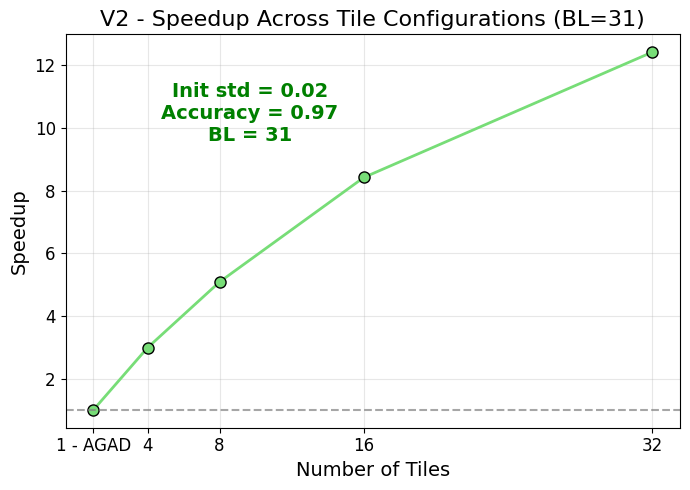

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
times_df = pd.read_csv('logs/times_v2.csv')

# Filter for BL = 31 only
times_df = times_df[times_df['bl'] == 31]

# Define reference time (1 tile)
ref_time = times_df[times_df['tiles'] == 1]['time'].iloc[0]

# Calculate speedup (reference time / tile time)
times_df['speedup'] = ref_time / times_df['time']

# Create the plot
plt.figure(figsize=(7, 5), dpi=100)

plt.plot(times_df['tiles'], times_df['speedup'], 'o-', 
         color='#77DD77', linewidth=2, markersize=8, 
         markeredgecolor='black', markeredgewidth=1)

# Add reference line at speedup = 1
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.7)

# Set labels and title
plt.xlabel('Number of Tiles', fontsize=14)
plt.ylabel('Speedup', fontsize=14)
plt.title('V2 - Speedup Across Tile Configurations (BL=31)', fontsize=16)

# Set x-axis ticks
tile_configs = [1, 4, 8, 16, 32]
tile_labels = ['1 - AGAD' if x == 1 else str(x) for x in tile_configs]
plt.xticks(tile_configs, tile_labels, fontsize=12)
plt.yticks(fontsize=12)

# Add grid
plt.grid(True, alpha=0.3)

# Add annotation
plt.text(0.3, 0.8, 'Init std = 0.02\nAccuracy = 0.97\nBL = 31', 
         fontsize=14, ha='center', va='center', 
         transform=plt.gca().transAxes, color='green', weight='bold')

plt.tight_layout()
plt.show()

# SYM

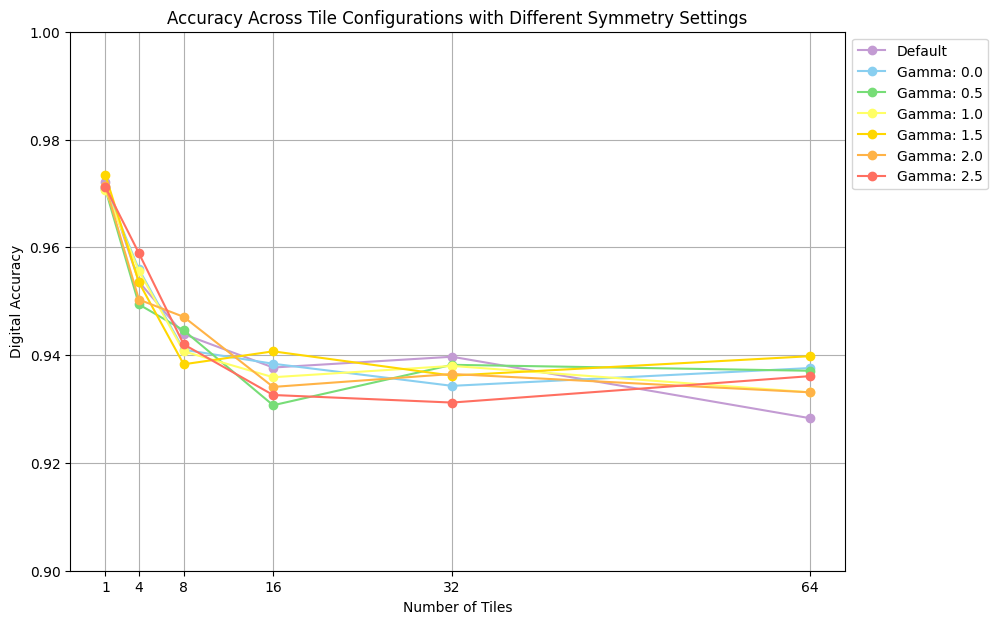

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_agad_sym_test.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Extract unique noise settings
sym_settings = df['sym_index'].unique()

# Plot the results
plt.figure(figsize=(10, 7))
# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']

for i, sym_i in enumerate(sym_settings):
    # Filter the dataframe for the current noise setting
    df_filtered = df[df['sym_index'] == sym_i]
    
    # Calculate the mean digital accuracies for each tile configuration discarding outliers
    mean_accuracies = df_filtered['digital_accuracies'].apply(lambda x: np.mean([i for sublist in x for i in sublist[-1:]]))
    
    # Extract the tile configurations
    tile_configurations = df_filtered['num_tiles']
    
    # Plot the results
    plt.plot(tile_configurations, mean_accuracies, 
             marker='o', label=f'Gamma: {sym_i}' if sym_i >= 0 else 'Default', 
             color=colors[i % len(colors)])

plt.xlabel('Number of Tiles')
plt.ylabel('Digital Accuracy')
plt.ylim(0.90, 1)
plt.xticks([1, 4, 8, 16, 32, 64])
plt.title('Accuracy Across Tile Configurations with Different Symmetry Settings')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

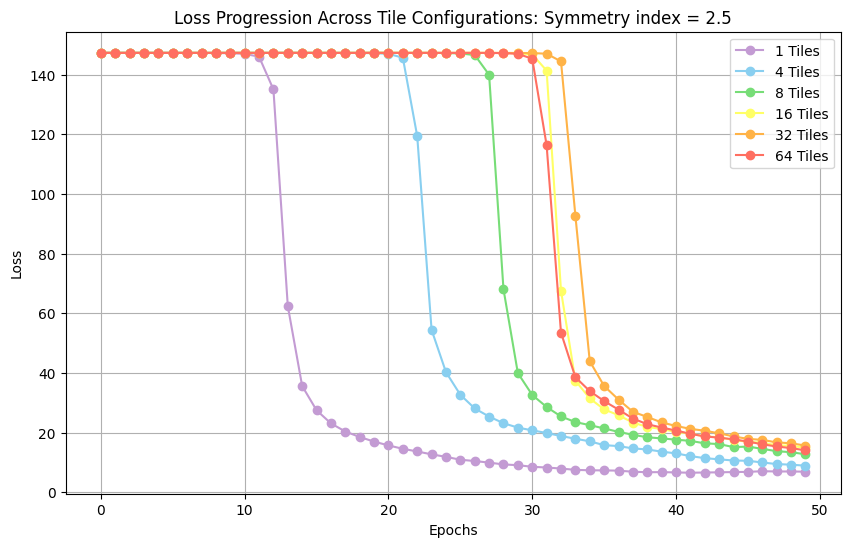

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_v1 = pd.read_csv('mnist_agad_sym_test.csv')
# set the types of the columns: losses and accuracies are lists of floats, could be nan
df_v1['digital_losses'] = df_v1['digital_losses'].str.replace('nan', 'None', regex=False).apply(eval)

# keep only those with 0.02 init_std
sym_index = 2.5
df_v1 = df_v1[df_v1['sym_index'] == sym_index]

# Extract the tile configurations and losses
tile_configurations = df_v1['num_tiles']
losses = df_v1['digital_losses']

# Plot the results
plt.figure(figsize=(10, 6))

# Define pastel colors
colors = ['#C39BD3','#89CFF0','#77DD77','#FFFF66','#FFB347','#FF6F61']

for i, (tile_config, loss) in enumerate(zip(tile_configurations, losses)):
    loss = [l*64 for l in loss]
    plt.plot(loss, label=f'{tile_config} Tiles', color=colors[i % len(colors)], marker='o', alpha=1)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Progression Across Tile Configurations: Symmetry index = {}'.format(sym_index))
plt.legend()
plt.grid(True)
plt.show()

# SWA

<Figure size 800x600 with 0 Axes>

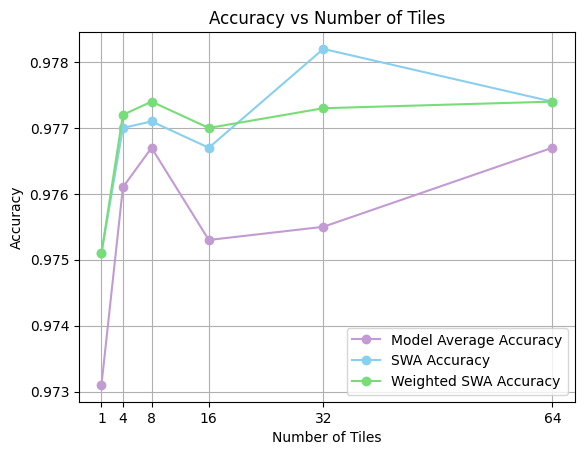

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('mnist_swa_002.csv')

# Define pastel colors
colors = ['#C39BD3', '#89CFF0', '#77DD77']

# Create a figure
plt.figure(figsize=(8, 6))
plt.figure(dpi=100)

# Plot the data
plt.plot(df['num_tiles'], df['model_average_accuracy'], marker='o', color=colors[0], label='Model Average Accuracy')
plt.plot(df['num_tiles'], df['swa_accuracy'], marker='o', color=colors[1], label='SWA Accuracy')
plt.plot(df['num_tiles'], df['weighted_swa_accuracy'], marker='o', color=colors[2], label='Weighted SWA Accuracy')

# Set the labels and title
plt.xlabel('Number of Tiles')
plt.xticks([1, 4, 8, 16, 32, 64])
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Tiles')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# BL

BL: 2, Epochs: 101.4
BL: 5, Epochs: 67.0
BL: 10, Epochs: 45.0
BL: 31, Epochs: 32.8
BL: 100, Epochs: 25.6


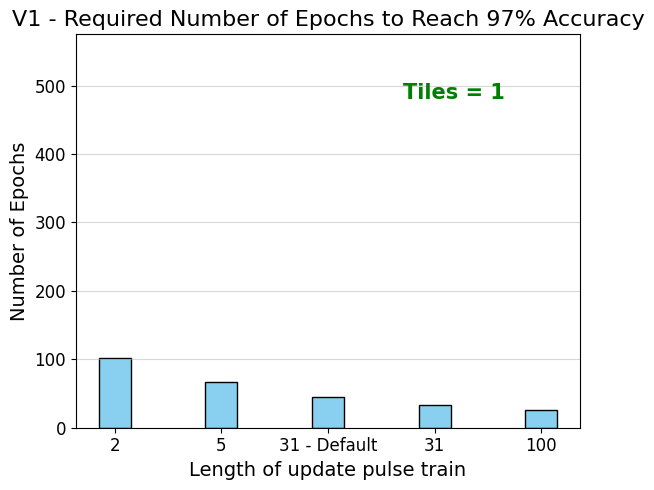

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_bl_v2.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Define pastel colors
colors = ['#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']#'#C39BD3',

# Define the tile configurations
bl_configurations = [2, 5, 10, 31, 100]

nt = 1
df = df[df['num_tiles'] == nt]

# Create a figure
plt.figure(figsize=(6, 5), dpi=100)

# Set the width of each bar
bar_width = 0.3

# Calculate the number of epochs to reach 97% accuracy for each tile configuration
epochs_to_reach_97 = []
for config in bl_configurations:
    # Filter the data for this tile configuration
    df_filtered = df[df['bl'] == config]
    
    # Check if there is data for this configuration
    if not df_filtered.empty:
        # Calculate the number of epochs to reach 97% accuracy
        epochs = np.mean([len(run) for inner in df_filtered['digital_accuracies'] for run in inner])
        epochs_to_reach_97.append(epochs)
        print(f'BL: {config}, Epochs: {epochs}')
    else:
        # If no data for this configuration, append 0
        epochs_to_reach_97.append(0)

# Define the position of the bars
bar_positions = np.arange(len(bl_configurations))

# Plot the bars
plt.bar(bar_positions, epochs_to_reach_97, bar_width, color=colors[0], edgecolor='black')

# Set the labels and title
plt.xlabel('Length of update pulse train', fontsize=14)
plt.ylabel('Number of Epochs', fontsize=14)
plt.ylim(0, 575)
bl_configurations[2] = '31 - Default'
plt.xticks(bar_positions, bl_configurations, fontsize=12)
plt.yticks(fontsize=12)
plt.title('V1 - Required Number of Epochs to Reach 97% Accuracy', fontsize=16)
plt.grid(True, axis='y', alpha=0.5)
plt.text(0.75, 0.85, f'Tiles = {nt}', fontsize=15, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')

# Show the plot
plt.tight_layout()
plt.show()

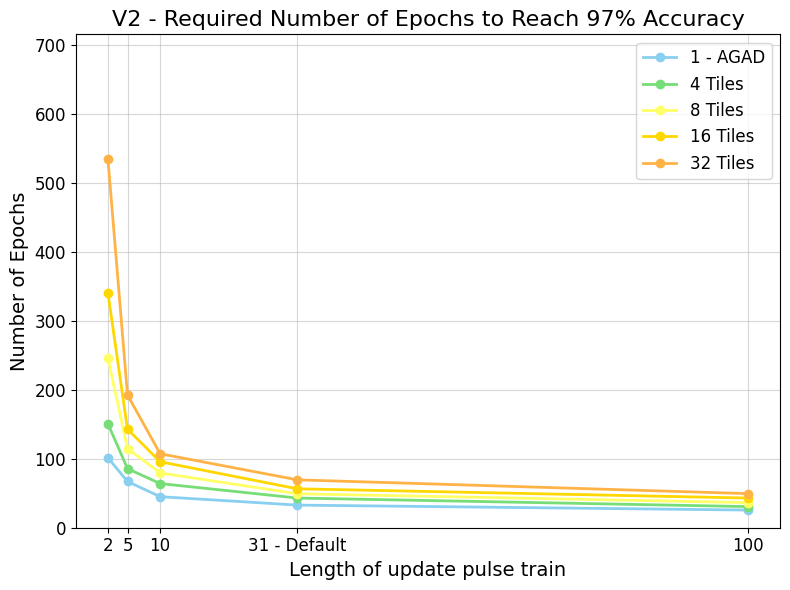

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_bl_v2.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Define pastel colors
colors = ['#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']

# Define the tile configurations and BL configurations
tile_configurations = [1, 4, 8, 16, 32]
bl_configurations = [2, 5, 10, 31, 100]

# Create a figure
plt.figure(figsize=(8, 6), dpi=100)

# For each tile configuration, create a line
for i, nt in enumerate(tile_configurations):
    # Filter data for this tile configuration
    df_tiles = df[df['num_tiles'] == nt]
    
    # Calculate epochs for each BL configuration
    epochs_to_reach_97 = []
    for config in bl_configurations:
        # Filter the data for this BL configuration
        df_filtered = df_tiles[df_tiles['bl'] == config]
        
        # Check if there is data for this configuration
        if not df_filtered.empty:
            # Calculate the number of epochs to reach 97% accuracy
            epochs = np.mean([len(run) for inner in df_filtered['digital_accuracies'] for run in inner])
            epochs_to_reach_97.append(epochs)
        else:
            # If no data for this configuration, append 0
            epochs_to_reach_97.append(0)
    
    # Plot the line for this tile configuration
    label = f'{nt} - AGAD' if nt == 1 else f'{nt} Tiles'
    plt.plot(bl_configurations, epochs_to_reach_97, 
             marker='o', color=colors[i % len(colors)], 
             linewidth=2, markersize=6, label=label)

# Set the labels and title
plt.xlabel('Length of update pulse train', fontsize=14)
plt.ylabel('Number of Epochs', fontsize=14)
plt.ylim(0, 715)

# Customize x-axis labels
bl_labels = [str(bl) if bl != 31 else '31 - Default' for bl in bl_configurations]
plt.xticks(bl_configurations, bl_labels, fontsize=12)
plt.yticks(fontsize=12)

plt.title('V2 - Required Number of Epochs to Reach 97% Accuracy', fontsize=16)
plt.grid(True, alpha=0.5)
plt.legend(fontsize=12, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

BL: 2, Tiles: 1, Epochs: 101.4
BL: 2, Tiles: 8, Epochs: 245.6
BL: 5, Tiles: 1, Epochs: 67.0
BL: 5, Tiles: 8, Epochs: 114.6
BL: 10, Tiles: 1, Epochs: 45.0
BL: 10, Tiles: 8, Epochs: 79.4
BL: 31, Tiles: 1, Epochs: 32.8
BL: 31, Tiles: 8, Epochs: 49.2
BL: 100, Tiles: 1, Epochs: 25.6
BL: 100, Tiles: 8, Epochs: 36.4


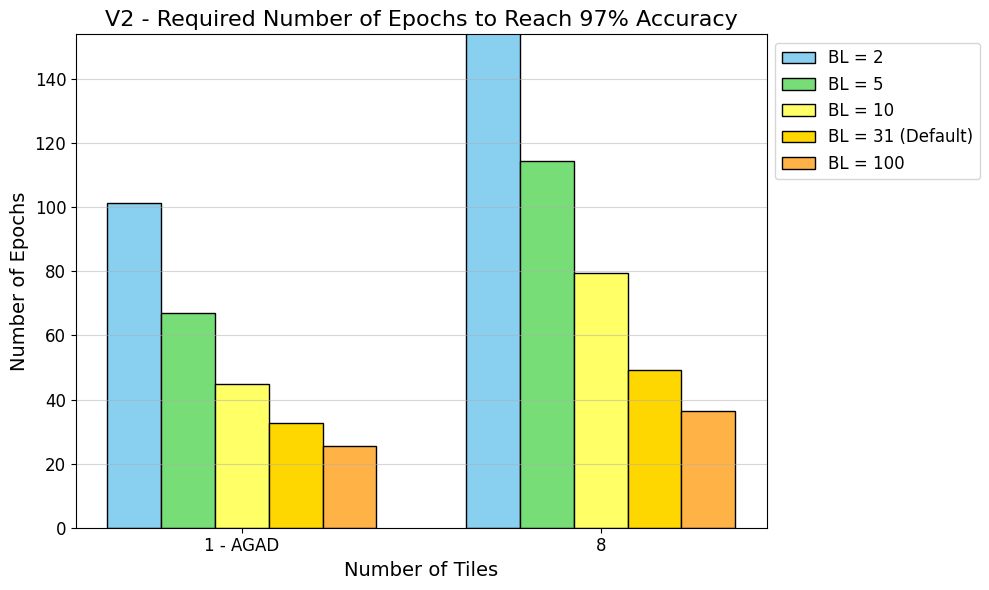

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_bl_v2.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Define pastel colors
colors = ['#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']

# Define the tile configurations
tile_configurations = [1, 8]

# Get unique BL configurations
bl_configs = sorted(df['bl'].unique())

# Create a figure
plt.figure(figsize=(10, 6), dpi=100)

# Set the width of each bar and spacing
bar_width = 0.15
spacing = 0.0

# Calculate the number of epochs to reach 97% accuracy for each tile and BL configuration
epochs_data = {}
for bl_config in bl_configs:
    epochs_to_reach_97 = []
    for tile_config in tile_configurations:
        # Filter the data for this tile and BL configuration
        df_filtered = df[(df['num_tiles'] == tile_config) & (df['bl'] == bl_config)]
        
        # Check if there is data for this configuration
        if not df_filtered.empty:
            # Calculate the number of epochs to reach 97% accuracy
            epochs = np.mean([len(run) for inner in df_filtered['digital_accuracies'] for run in inner])
            print(f'BL: {bl_config}, Tiles: {tile_config}, Epochs: {epochs}')
            epochs_to_reach_97.append(epochs)
        else:
            # If no data for this configuration, append 0
            epochs_to_reach_97.append(0)
    
    epochs_data[bl_config] = epochs_to_reach_97

# Define the position of the bars
x_positions = np.arange(len(tile_configurations))

# Plot the bars for each BL configuration
for i, bl_config in enumerate(bl_configs):
    offset = (i - len(bl_configs)/2 + 0.5) * (bar_width + spacing)
    plt.bar(x_positions + offset, epochs_data[bl_config], bar_width, 
            label=f'BL = {bl_config}' if bl_config != 31 else 'BL = 31 (Default)', color=colors[i % len(colors)], edgecolor='black')

# Set the labels and title
plt.xlabel('Number of Tiles', fontsize=14)
plt.ylabel('Number of Epochs', fontsize=14)
plt.ylim(0, 154)

# Update tile labels
tile_labels = ['1 - AGAD' if x == 1 else str(x) for x in tile_configurations]
plt.xticks(x_positions, tile_labels, fontsize=12)
plt.yticks(fontsize=12)
plt.title('V2 - Required Number of Epochs to Reach 97% Accuracy', fontsize=16)
plt.grid(True, axis='y', alpha=0.5)

# Add legend outside the plot
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

BL: 2, LR: 0.1, Epochs: 94.2
BL: 5, LR: 0.1, Epochs: 66.2
BL: 10, LR: 0.1, Epochs: 52.6
BL: 31, LR: 0.1, Epochs: 35.666666666666664
BL: 100, LR: 0.1, Epochs: 26.0


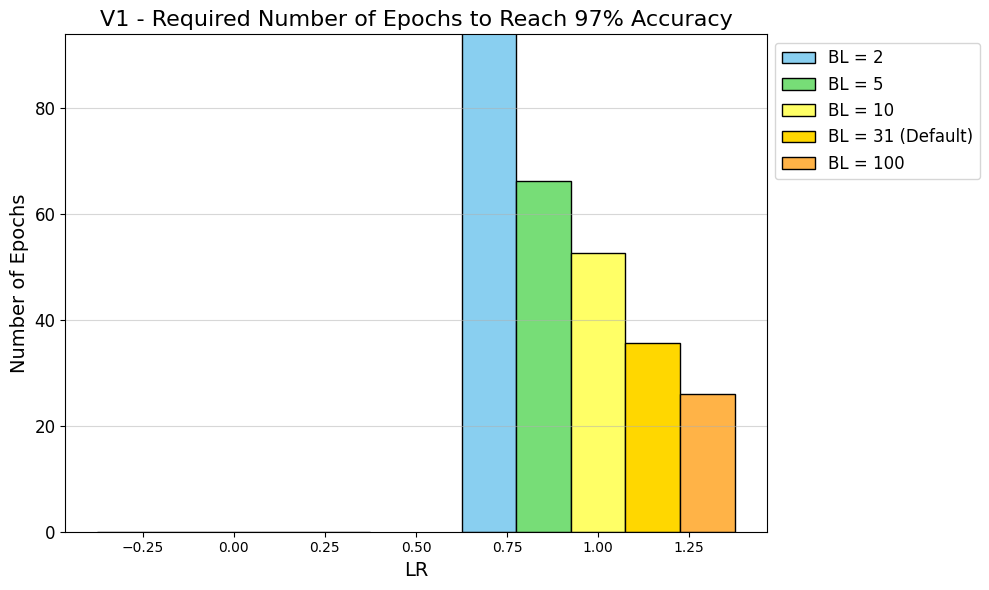

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('mnist_lr_v1.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Define pastel colors
colors = ['#89CFF0','#77DD77','#FFFF66', '#FFD700', '#FFB347','#FF6F61']

# Define the tile configurations
lrs = [0.3, 0.1]#, 0.03

# Get unique BL configurations
bl_configs = sorted(df['bl'].unique())

# Create a figure
plt.figure(figsize=(10, 6), dpi=100)

# Set the width of each bar and spacing
bar_width = 0.15
spacing = 0.0

# Calculate the number of epochs to reach 97% accuracy for each tile and BL configuration
epochs_data = {}
for bl_config in bl_configs:
    epochs_to_reach_97 = []
    for lr in lrs:
        # Filter the data for this tile and BL configuration
        df_filtered = df[(df['lr'] == lr) & (df['bl'] == bl_config)]
        
        # Check if there is data for this configuration
        if not df_filtered.empty:
            # Calculate the number of epochs to reach 97% accuracy
            epochs = np.mean([len(run) for inner in df_filtered['digital_accuracies'] for run in inner])
            print(f'BL: {bl_config}, LR: {lr}, Epochs: {epochs}')
            epochs_to_reach_97.append(epochs)
        else:
            # If no data for this configuration, append 0
            epochs_to_reach_97.append(0)
    
    epochs_data[bl_config] = epochs_to_reach_97

# Define the position of the bars
x_positions = np.arange(len(lrs))

# Plot the bars for each BL configuration
for i, bl_config in enumerate(bl_configs):
    offset = (i - len(bl_configs)/2 + 0.5) * (bar_width + spacing)
    plt.bar(x_positions + offset, epochs_data[bl_config], bar_width, 
            label=f'BL = {bl_config}' if bl_config != 31 else 'BL = 31 (Default)', color=colors[i % len(colors)], edgecolor='black')

# Set the labels and title
plt.xlabel('LR', fontsize=14)
plt.ylabel('Number of Epochs', fontsize=14)
plt.ylim(0, 94)

# Update tile labels
#tile_labels = ['1 - AGAD' if x == 1 else str(x) for x in tile_configurations]
#plt.xticks(x_positions, tile_labels, fontsize=12)
plt.yticks(fontsize=12)
plt.title('V1 - Required Number of Epochs to Reach 97% Accuracy', fontsize=16)
plt.grid(True, axis='y', alpha=0.5)

# Add legend outside the plot
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

# Programing weights - Initialization

<Figure size 800x600 with 0 Axes>

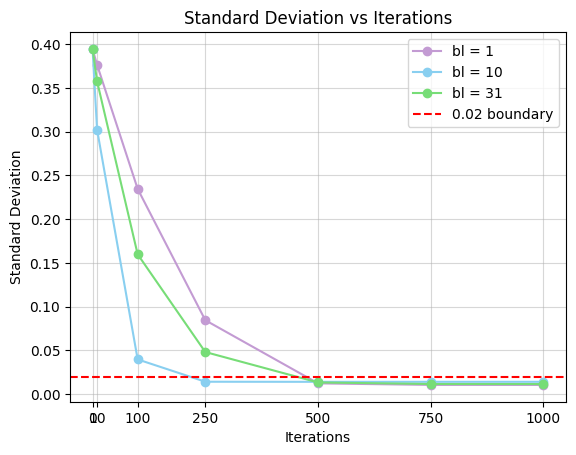

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from program_1.csv
df = pd.read_csv('program_init.csv')

# Define pastel colors
colors = ['#C39BD3', '#89CFF0', '#77DD77']

# Create a figure
plt.figure(figsize=(8, 6))
plt.figure(dpi=100)

# Iterate through unique bl values and plot each as a separate line
for i, bl_value in enumerate(df['bl'].unique()):
    df_bl = df[df['bl'] == bl_value]
    plt.plot(df_bl['iters'], df_bl['std'], marker='o', color=colors[i % len(colors)], label=f'bl = {bl_value}')

# Set the labels and title
plt.xlabel('Iterations')
plt.xticks(df['iters'].unique())
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation vs Iterations')
plt.axhline(y=0.02, color='red', linestyle='--', label='0.02 boundary')
plt.legend()
plt.grid(True, alpha=0.5)

# Show the plot
plt.show()


<Figure size 800x600 with 0 Axes>

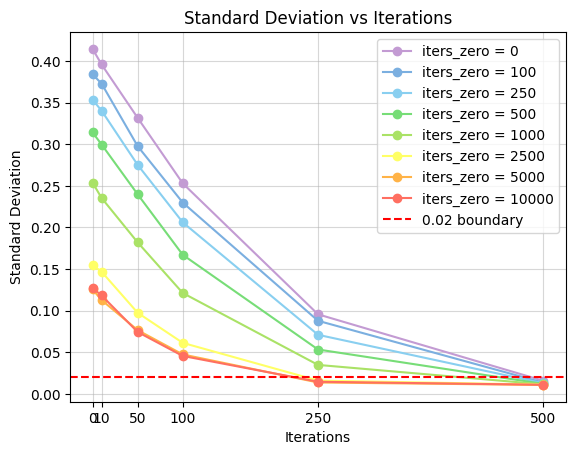

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your CSV file
df = pd.read_csv('program_init_zero_l3.csv')

# Define pastel colors
colors = ['#C39BD3',  # Lavender
          '#7BAFE0',  # Blue-Teal
          '#89CFF0',  # Baby Blue
          '#77DD77',  # Mint Green
          '#AAE266',  # Green-Yellow
          '#FFFF66',  # Pastel Yellow
          '#FFB347',  # Pastel Orange
          '#FF6F61',  # Coral
          ]  

# Create a figure
plt.figure(figsize=(8, 6))
plt.figure(dpi=100)

# Iterate through unique iters_zero values and plot each as a separate line
for i, zero_value in enumerate(df['iters_zero'].unique()):
    df_zero = df[df['iters_zero'] == zero_value]
    plt.plot(df_zero['iters'], df_zero['std'], marker='o', color=colors[i % len(colors)], 
             label=f'iters_zero = {zero_value}')

# Set the labels and title
plt.xlabel('Iterations')
plt.xticks(df['iters'].unique())
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation vs Iterations')
plt.axhline(y=0.02, color='red', linestyle='--', label='0.02 boundary')
plt.legend()
plt.grid(True, alpha=0.5)

# Show the plot
plt.show()

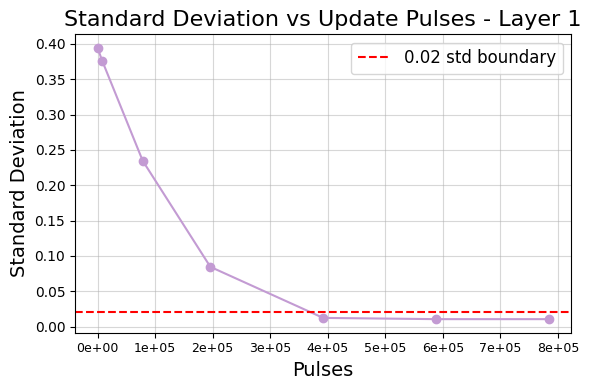

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the data from program_1.csv
df = pd.read_csv('program_init.csv')

# Define pastel colors
colors = ['#C39BD3', '#89CFF0', '#77DD77']

# Create a figure
plt.figure(figsize=(6, 4), dpi=100)
bls = df['bl'].unique()
bls = [1]

# Iterate through unique bl values and plot each as a separate line
for i, bl_value in enumerate(bls):
    df_bl = df[df['bl'] == bl_value]
    plt.plot(df_bl['iters']*bl_value*784, df_bl['std'], marker='o', color=colors[i % len(colors)])#label=f'bl = {bl_value}'

# Set the labels and title
plt.xlabel('Pulses', fontsize=14)

# the x axis should be expressed as exponential numbers
# Define custom formatter function
def scientific_formatter(x, pos):
    return f'{x:.0e}'

# Apply the formatter to x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(scientific_formatter))
plt.xticks(fontsize=9)

plt.ylabel('Standard Deviation', fontsize=14)
plt.title('Standard Deviation vs Update Pulses - Layer 1', fontsize=16)
plt.axhline(y=0.02, color='red', linestyle='--', label='0.02 std boundary')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.5)

plt.tight_layout()
# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

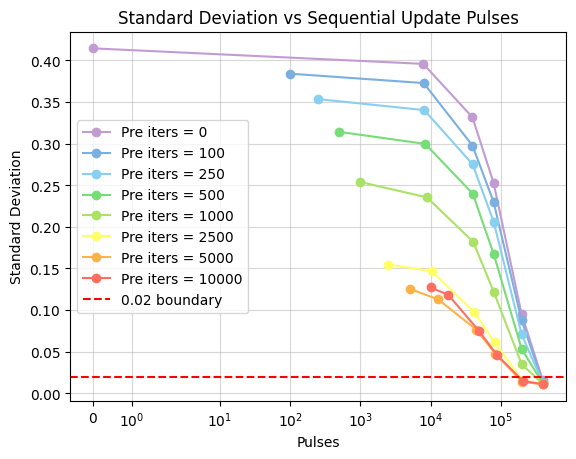

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your CSV file
df = pd.read_csv('program_init_zero_l3.csv')

# Define pastel colors
colors = ['#C39BD3',  # Lavender
          '#7BAFE0',  # Blue-Teal
          '#89CFF0',  # Baby Blue
          '#77DD77',  # Mint Green
          '#AAE266',  # Green-Yellow
          '#FFFF66',  # Pastel Yellow
          '#FFB347',  # Pastel Orange
          '#FF6F61',  # Coral
          ] 

# Create a figure
plt.figure(figsize=(8, 6))
plt.figure(dpi=100)

# Iterate through unique iters_zero values and plot each as a separate line
for i, zero_value in enumerate(df['iters_zero'].unique()):
    df_zero = df[df['iters_zero'] == zero_value]
    # Since bl is always 1, we can directly use iters * 784
    plt.plot(df_zero['iters']*784 + zero_value, df_zero['std'], marker='o', color=colors[i % len(colors)], 
             label=f'Pre iters = {zero_value}')

# Set the labels and title
plt.xlabel('Pulses')
plt.xscale('symlog')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation vs Sequential Update Pulses')
plt.axhline(y=0.02, color='red', linestyle='--', label='0.02 boundary')
plt.legend()
plt.grid(True, alpha=0.5)

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

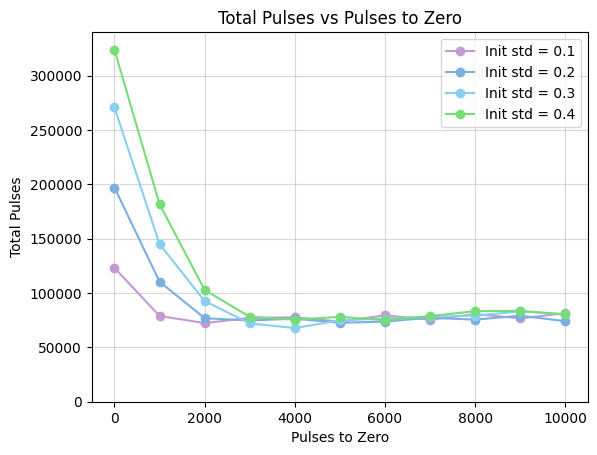

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your CSV file
df = pd.read_csv('program_optim_l1_2.csv')

# Define pastel colors
colors = ['#C39BD3',  # Lavender
          '#7BAFE0',  # Blue-Teal
          '#89CFF0',  # Baby Blue
          '#77DD77',  # Mint Green
          '#AAE266',  # Green-Yellow
          '#FFFF66',  # Pastel Yellow
          '#FFB347',  # Pastel Orange
          '#FF6F61',  # Coral
          ] 

# Create a figure
plt.figure(figsize=(8, 6))
plt.figure(dpi=100)

# for every different w_innit, plot a line with a different color
for i, w_init_value in enumerate(df['w_init'].unique()):
    df_w_init = df[df['w_init'] == w_init_value]
    # Since bl is always 1, we can directly use iters * 784
    plt.plot(df_w_init['iters_zero'], df_w_init['iters'], marker='o', color=colors[i % len(colors)],
            label=f'Init std = {w_init_value}')

# Set the labels and title
plt.xlabel('Pulses to Zero')
plt.ylabel('Total Pulses')
plt.ylim(0, max(df['iters']) * 1.05)
plt.title('Total Pulses vs Pulses to Zero')
plt.legend()
plt.grid(True, alpha=0.5)

# Show the plot
plt.show()

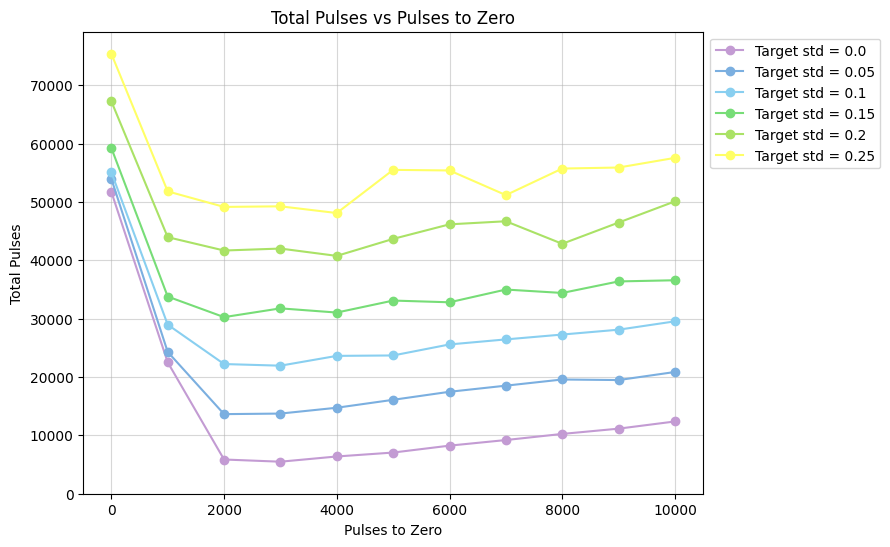

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your CSV file
df = pd.read_csv('program_optim_tstd.csv')

# Define pastel colors
colors = ['#C39BD3',  # Lavender
          '#7BAFE0',  # Blue-Teal
          '#89CFF0',  # Baby Blue
          '#77DD77',  # Mint Green
          '#AAE266',  # Green-Yellow
          '#FFFF66',  # Pastel Yellow
          '#FFB347',  # Pastel Orange
          '#FF6F61',  # Coral
          ] 

# Create a figure
plt.figure(figsize=(8, 6), dpi=100)

# for every different w_innit, plot a line with a different color
for i, t_std_value in enumerate(df['t_std'].unique()):
    df_t_std = df[df['t_std'] == t_std_value]
    # Since bl is always 1, we can directly use iters * 784
    plt.plot(df_t_std['iters_zero'], df_t_std['iters'], marker='o', color=colors[i % len(colors)],
            label=f'Target std = {t_std_value}')

# Set the labels and title
plt.xlabel('Pulses to Zero')
plt.ylabel('Total Pulses')
plt.ylim(0, max(df['iters']) * 1.05)
plt.title('Total Pulses vs Pulses to Zero')
# plot the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, alpha=0.5)

# Show the plot
plt.show()

/tmp/ipykernel_41434/421752966.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_grouped = df1.groupby('Op').sum().reset_index()[['Op', 'Times']]
/tmp/ipykernel_41434/421752966.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_grouped = df2.groupby('Op').sum().reset_index()[['Op', 'Times']]
/tmp/ipykernel_41434/421752966.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3_grouped = df3.groupby('Op').su

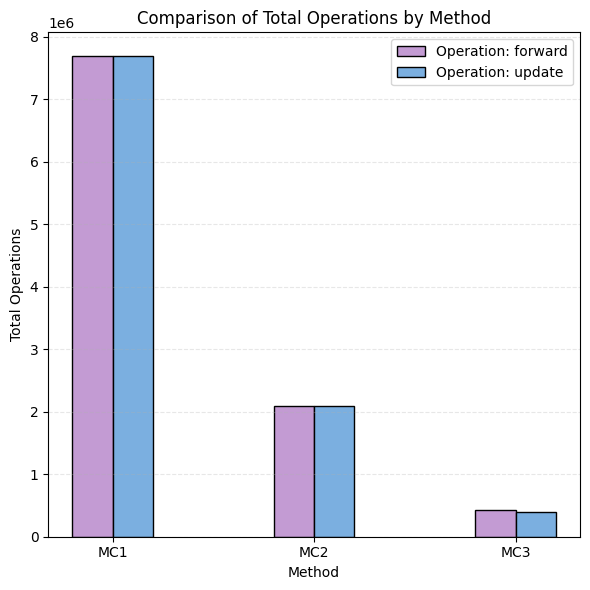

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from your CSV file
df1 = pd.read_csv('program_optim_mc1.csv')
df2 = pd.read_csv('program_optim_mc2.csv')
df3 = pd.read_csv('program_optim_mc3.csv')

# to plot the total amount of operations, we group by column 'Op'
df1_grouped = df1.groupby('Op').sum().reset_index()[['Op', 'Times']]
df2_grouped = df2.groupby('Op').sum().reset_index()[['Op', 'Times']]
df3_grouped = df3.groupby('Op').sum().reset_index()[['Op', 'Times']]

# we add a column with the number of the method
df1_grouped['Method'] = 'MC1'
df2_grouped['Method'] = 'MC2'
df3_grouped['Method'] = 'MC3'


df_grouped = pd.concat([df1_grouped, df2_grouped, df3_grouped], ignore_index=True)

# Define pastel colors
colors = ['#C39BD3',  # Lavender
          '#7BAFE0',  # Blue-Teal
          '#89CFF0',  # Baby Blue
          '#77DD77',  # Mint Green
          '#AAE266',  # Green-Yellow
          '#FFFF66',  # Pastel Yellow
          '#FFB347',  # Pastel Orange
          '#FF6F61',  # Coral
          ] 

# Create a figure
plt.figure(figsize=(6, 6), dpi=100)

# for every method in df_grouped, plot two bars, one for each operation
# Set width of bars and positions
bar_width = 0.2
methods = ['MC1', 'MC2', 'MC3']
operations = df_grouped['Op'].unique()
x = np.arange(len(methods))  # Position of method groups

# Plot each operation as a bar within each method group
for i, operation in enumerate(operations):
    op_data = [df_grouped[(df_grouped['Method'] == method) & (df_grouped['Op'] == operation)]['Times'].values[0] 
               if not df_grouped[(df_grouped['Method'] == method) & (df_grouped['Op'] == operation)].empty 
               else 0 
               for method in methods]
    
    # Create bars with offset based on operation index
    plt.bar(x + (i - 0.5*len(operations) + 0.5) * bar_width, 
            op_data, 
            bar_width, 
            label=f'Operation: {operation}', 
            color=colors[i % len(colors)],
            edgecolor='black')

# Add labels, title and legend
plt.xlabel('Method')
plt.ylabel('Total Operations')
plt.title('Comparison of Total Operations by Method')
plt.xticks(x, methods)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()


plt.tight_layout()
plt.show()

/tmp/ipykernel_6708/2975243583.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_grouped = df1.groupby('Op').sum().reset_index()[['Op', 'Times']]
/tmp/ipykernel_6708/2975243583.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_grouped = df2.groupby('Op').sum().reset_index()[['Op', 'Times']]
/tmp/ipykernel_6708/2975243583.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3_grouped = df3.groupby('Op').su

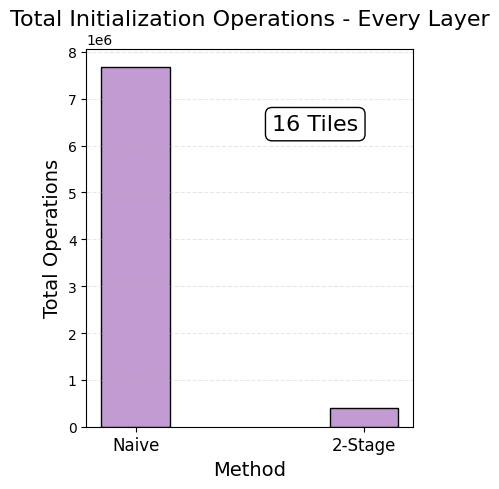

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from your CSV file
df1 = pd.read_csv('program_optim_mc1.csv')
df2 = pd.read_csv('program_optim_mc2.csv')
df3 = pd.read_csv('program_optim_mc3.csv')

# to plot the total amount of operations, we group by column 'Op'
df1_grouped = df1.groupby('Op').sum().reset_index()[['Op', 'Times']]
df2_grouped = df2.groupby('Op').sum().reset_index()[['Op', 'Times']]
df3_grouped = df3.groupby('Op').sum().reset_index()[['Op', 'Times']]

# we add a column with the number of the method
df1_grouped['Method'] = 'Naive'
df2_grouped['Method'] = 'MC2'
df3_grouped['Method'] = '2-Stage'


df_grouped = pd.concat([df1_grouped, df2_grouped, df3_grouped], ignore_index=True)

# Define pastel colors
colors = ['#C39BD3',  # Lavender
          '#7BAFE0',  # Blue-Teal
          '#89CFF0',  # Baby Blue
          '#77DD77',  # Mint Green
          '#AAE266',  # Green-Yellow
          '#FFFF66',  # Pastel Yellow
          '#FFB347',  # Pastel Orange
          '#FF6F61',  # Coral
          ] 

# Create a figure
plt.figure(figsize=(4, 5), dpi=100)

# for every method in df_grouped, plot two bars, one for each operation
# Set width of bars and positions
bar_width = 0.3
methods = ['Naive', '2-Stage']
operations = ['update']
x = np.arange(len(methods))  # Position of method groups

# Plot each operation as a bar within each method group
for i, operation in enumerate(operations):
    op_data = [df_grouped[(df_grouped['Method'] == method) & (df_grouped['Op'] == operation)]['Times'].values[0] 
               if not df_grouped[(df_grouped['Method'] == method) & (df_grouped['Op'] == operation)].empty 
               else 0 
               for method in methods]
    
    # Create bars with offset based on operation index
    plt.bar(x + (i - 0.5*len(operations) + 0.5) * bar_width, 
            op_data, 
            bar_width, 
            label=f'Operation: {operation}', 
            color=colors[i % len(colors)],
            edgecolor='black')

# Add labels, title and legend
plt.xlabel('Method', fontsize=14)
plt.xticks(x, methods, fontsize=12)
plt.ylabel('Total Operations', fontsize=14)
plt.title('Total Initialization Operations - Every Layer', fontsize=16)
plt.xticks(x, methods, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
#plt.legend()
plt.text(0.7, 0.8, '16 Tiles', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'), fontsize=16)


plt.tight_layout()
plt.show()

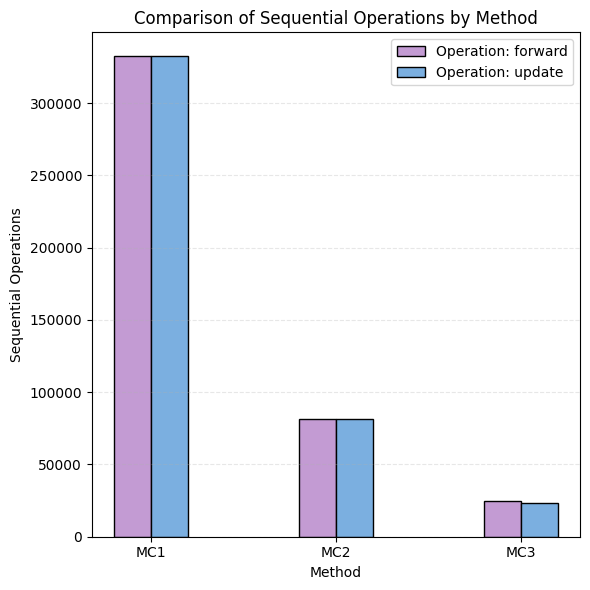

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from your CSV file
df1 = pd.read_csv('program_optim_mc1.csv')
df2 = pd.read_csv('program_optim_mc2.csv')
df3 = pd.read_csv('program_optim_mc3.csv')

# to plot the total amount of sequential operations, we first divide times by the Pfactor
df1['Times'] = df1['Times'] / df1['Pfactor']
df2['Times'] = df2['Times'] / df2['Pfactor']
df3['Times'] = df3['Times'] / df3['Pfactor']

# we don't need to group them, we only keep the 'layer' with the most operations
df1 = df1[df1['layer'] == 'l1'] 
df2 = df2[df2['layer'] == 'l1']
df3 = df3[df3['layer'] == 'l1']

# we group by column 'Op'
df1_grouped = df1.groupby('Op').sum().reset_index()[['Op', 'Times']]
df2_grouped = df2.groupby('Op').sum().reset_index()[['Op', 'Times']]
df3_grouped = df3.groupby('Op').sum().reset_index()[['Op', 'Times']]

# we add a column with the number of the method
df1_grouped['Method'] = 'MC1'
df2_grouped['Method'] = 'MC2'
df3_grouped['Method'] = 'MC3'

df_grouped = pd.concat([df1_grouped, df2_grouped, df3_grouped], ignore_index=True)

# Define pastel colors
colors = ['#C39BD3',  # Lavender
          '#7BAFE0',  # Blue-Teal
          '#89CFF0',  # Baby Blue
          '#77DD77',  # Mint Green
          '#AAE266',  # Green-Yellow
          '#FFFF66',  # Pastel Yellow
          '#FFB347',  # Pastel Orange
          '#FF6F61',  # Coral
          ] 

# Create a figure
plt.figure(figsize=(6, 6), dpi=100)

# for every method in df_grouped, plot two bars, one for each operation
# Set width of bars and positions
bar_width = 0.2
methods = ['MC1', 'MC2', 'MC3']
operations = df_grouped['Op'].unique()
x = np.arange(len(methods))  # Position of method groups

# Plot each operation as a bar within each method group
for i, operation in enumerate(operations):
    op_data = [df_grouped[(df_grouped['Method'] == method) & (df_grouped['Op'] == operation)]['Times'].values[0] 
               if not df_grouped[(df_grouped['Method'] == method) & (df_grouped['Op'] == operation)].empty 
               else 0 
               for method in methods]
    
    # Create bars with offset based on operation index
    plt.bar(x + (i - 0.5*len(operations) + 0.5) * bar_width, 
            op_data, 
            bar_width, 
            label=f'Operation: {operation}', 
            color=colors[i % len(colors)],
            edgecolor='black')

# Add labels, title and legend
plt.xlabel('Method')
plt.ylabel('Sequential Operations')
#plt.ylim(0, 8e6)
plt.title('Comparison of Sequential Operations by Method')
plt.xticks(x, methods)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()


plt.tight_layout()
plt.show()

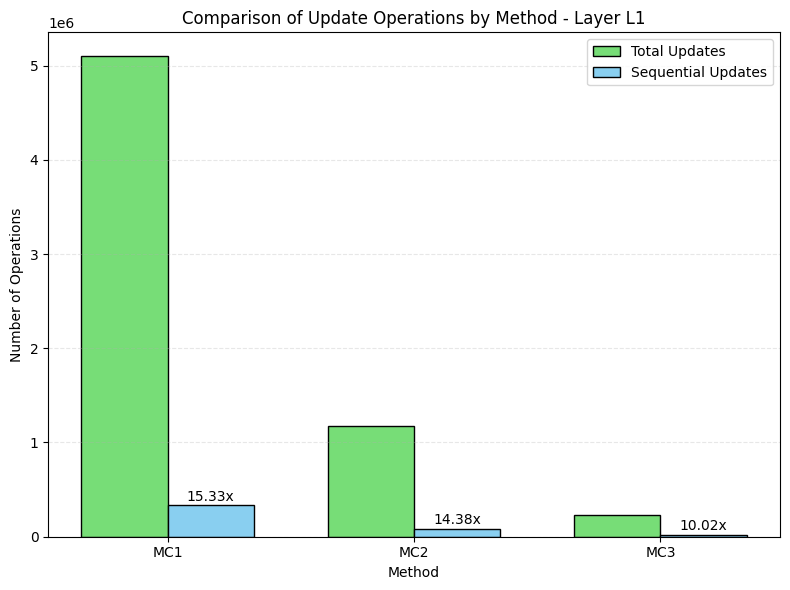

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from your CSV files
df1 = pd.read_csv('program_optim_mc1.csv')
df2 = pd.read_csv('program_optim_mc2.csv')
df3 = pd.read_csv('program_optim_mc3.csv')

# Create copies for the two different calculations
df1_total = df1.copy()
df2_total = df2.copy()
df3_total = df3.copy()

df1_seq = df1.copy()
df2_seq = df2.copy()
df3_seq = df3.copy()

# For sequential operations, divide times by the Pfactor
df1_seq['Times'] = df1_seq['Times'] / df1_seq['Pfactor']
df2_seq['Times'] = df2_seq['Times'] / df2_seq['Pfactor']
df3_seq['Times'] = df3_seq['Times'] / df3_seq['Pfactor']

# Filter for only 'update' operations and 'l1' layer
df1_total = df1_total[(df1_total['Op'] == 'update') & (df1_total['layer'] == 'l1')]
df2_total = df2_total[(df2_total['Op'] == 'update') & (df2_total['layer'] == 'l1')]
df3_total = df3_total[(df3_total['Op'] == 'update') & (df3_total['layer'] == 'l1')]

df1_seq = df1_seq[(df1_seq['Op'] == 'update') & (df1_seq['layer'] == 'l1')]
df2_seq = df2_seq[(df2_seq['Op'] == 'update') & (df2_seq['layer'] == 'l1')]
df3_seq = df3_seq[(df3_seq['Op'] == 'update') & (df3_seq['layer'] == 'l1')]

# Group by method and sum the operations
total_ops = {
    'MC1': df1_total['Times'].sum(),
    'MC2': df2_total['Times'].sum(),
    'MC3': df3_total['Times'].sum()
}

sequential_ops = {
    'MC1': df1_seq['Times'].sum(),
    'MC2': df2_seq['Times'].sum(),
    'MC3': df3_seq['Times'].sum()
}

# Prepare data for plotting
methods = ['MC1', 'MC2', 'MC3']
total_values = [total_ops[m] for m in methods]
sequential_values = [sequential_ops[m] for m in methods]

# Define colors for total and sequential operations
colors = ['#77DD77', '#89CFF0']  # Green for total, Blue for sequential

# Create figure
plt.figure(figsize=(8, 6), dpi=100)

# Set width of bars and positions
bar_width = 0.35
x = np.arange(len(methods))

# Plot bars
plt.bar(x - bar_width/2, total_values, bar_width, 
        label='Total Updates', color=colors[0], edgecolor='black')
plt.bar(x + bar_width/2, sequential_values, bar_width, 
        label='Sequential Updates', color=colors[1], edgecolor='black')

# Add labels, title, and legend
plt.xlabel('Method')
plt.ylabel('Number of Operations')
plt.title('Comparison of Update Operations by Method - Layer L1')
plt.xticks(x, methods)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()

for i in range(len(methods)):
    speedup = total_values[i] / sequential_values[i]
    plt.text(i + bar_width/2, sequential_values[i] + 0.05*max(sequential_values), 
             f'{speedup:.2f}x',
             ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

# Analog profiling

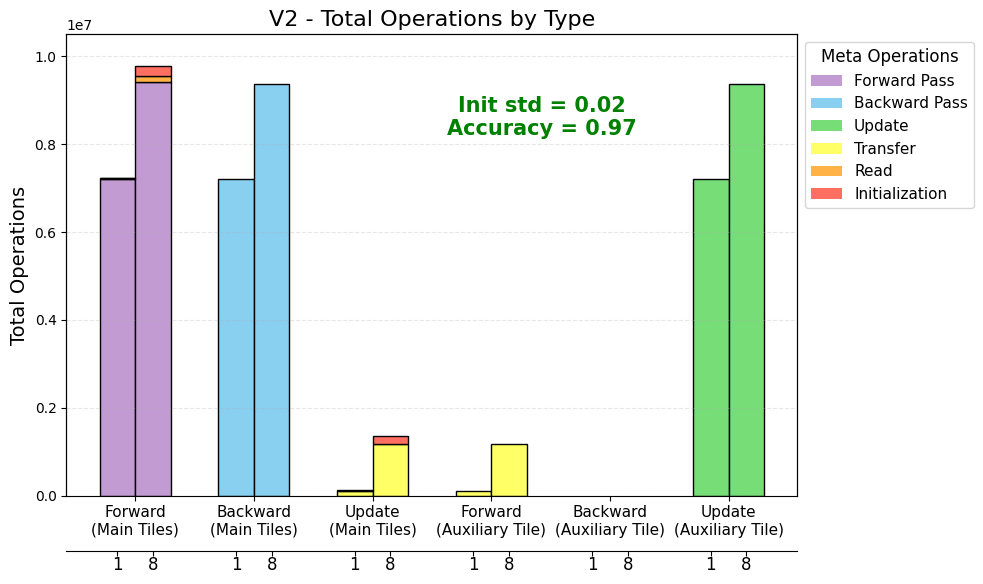

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Load the two datasets
single_tile_df = pd.read_csv('logs/log_1_v2.csv')
multi_tile_df = pd.read_csv('logs/log_8_v2.csv')

# Custom color palette for meta operations
meta_op_colors = {
    'forward': '#C39BD3',  # Light purple
    'backward': '#89CFF0',    # Light blue
    'update': '#77DD77',   # Light green
    'transfer': '#FFFF66',     # Light yellow
    'read': '#FFB347',       # Light orange
    'program': '#FF6F61'     # Coral
}

# Define operation order and names
op_order = ['forward', 'backward', 'update']
op_display_names = {
    'forward': 'Forward',
    'backward': 'Backward',
    'update': 'Update'
}

# Define meta-operation order and names
meta_op_order = ['forward', 'backward', 'update', 'transfer', 'read', 'program']
meta_op_display_names = {
    'forward': 'Forward Pass',
    'backward': 'Backward Pass',
    'update': 'Update',
    'transfer': 'Transfer',
    'read': 'Read',
    'program': 'Initialization'
}

# Tile order
tile_order = ['main', 'aux']
tile_display_names = {
    'main': 'Main Tiles',
    'aux': 'Auxiliary Tile'
}

# Set figure size
plt.figure(figsize=(10, 6), dpi=100)

# Add a subtle grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, 10.5e6)

# PLOT 1: Total Operations by Type, Tile, and Meta-operation
# Calculate total operations grouped by Tile, Op, and Meta_op
single_tile_grouped = single_tile_df.groupby(['Tile', 'Op', 'Meta_op'])['Times'].sum().reset_index()
multi_tile_grouped = multi_tile_df.groupby(['Tile', 'Op', 'Meta_op'])['Times'].sum().reset_index()

# Create positions for the grouped bars
bar_width = 0.3
num_ops = len(op_order)
num_tiles = len(tile_order)
group_positions = np.arange(num_ops * num_tiles)

# Initialize the bars
bar_bottoms_single = {tile: {op: 0 for op in op_order} for tile in tile_order}
bar_bottoms_multi = {tile: {op: 0 for op in op_order} for tile in tile_order}

# Loop through each tile, operation and meta_operation to create the stacked bars
for i, tile in enumerate(tile_order):
    for j, op in enumerate(op_order):
        # Position for this op-tile combination
        pos = i * num_ops + j
        
        # Get data for this tile and operation
        single_data = single_tile_grouped[(single_tile_grouped['Tile'] == tile) & 
                                         (single_tile_grouped['Op'] == op)]
        multi_data = multi_tile_grouped[(multi_tile_grouped['Tile'] == tile) & 
                                       (multi_tile_grouped['Op'] == op)]
        
        # Reset bottoms for each bar
        bar_bottom_single = 0
        bar_bottom_multi = 0
        
        # Plot each meta_op segment in the specified order
        for meta_op in meta_op_order:
            # Find data for this meta_op in single tile dataset
            single_meta_data = single_data[single_data['Meta_op'] == meta_op]
            if not single_meta_data.empty:
                value = single_meta_data['Times'].values[0]
                plt.bar(pos - bar_width/2, value, bar_width, 
                       bottom=bar_bottom_single,
                       color=meta_op_colors.get(meta_op, '#CCCCCC'),
                       edgecolor='black', linewidth=1)
                bar_bottom_single += value
            
            # Find data for this meta_op in multi tile dataset
            multi_meta_data = multi_data[multi_data['Meta_op'] == meta_op]
            if not multi_meta_data.empty:
                value = multi_meta_data['Times'].values[0]
                plt.bar(pos + bar_width/2, value, bar_width, 
                       bottom=bar_bottom_multi,
                       color=meta_op_colors.get(meta_op, '#CCCCCC'),
                       edgecolor='black', linewidth=1)
                bar_bottom_multi += value
        

# Configure axes and labels
plt.ylabel('Total Operations', fontsize=14)
plt.title('V2 - Total Operations by Type', fontsize=16)

# Set custom tick positions and labels
tick_positions = []
tick_labels = []
for i, tile in enumerate(tile_order):
    for j, op in enumerate(op_order):
        pos = i * num_ops + j
        tick_positions.append(pos)
        tick_labels.append(f"{op_display_names[op]}\n({tile_display_names[tile]})")

plt.xticks(tick_positions, tick_labels, fontsize=11)

# Remove the plt.text() calls that try to add "1" and "16" labels

# Create a second x-axis for the number of tiles labels
ax = plt.gca()
plt.rcParams.update({'font.size': 12})
ax2 = ax.twiny()

# Calculate positions for the "1" and "16" labels
secondary_positions = []
secondary_labels = []
for i, tile in enumerate(tile_order):
    for j, op in enumerate(op_order):
        pos = i * num_ops + j
        # Position for "1" label
        secondary_positions.append(pos - bar_width/2)
        secondary_labels.append("1")
        # Position for "16" label
        secondary_positions.append(pos + bar_width/2)
        secondary_labels.append("8")

# Set the secondary x-axis tick positions and labels
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(secondary_positions)
ax2.set_xticklabels(secondary_labels)
ax2.tick_params(axis='x', which='major', pad=0)

# Align the secondary axis with the primary axis
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 40))  # Move the secondary axis down



# Add legend for meta operations
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=meta_op_display_names[meta_op])
                  for meta_op, color in meta_op_colors.items()]

# legent with border
plt.legend(handles=legend_elements, title="Meta Operations", loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.text(0.65, 0.82, 'Init std = 0.02\nAccuracy = 0.97', fontsize=15, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')

# save the figure
plt.tight_layout()

#plt.tight_layout()
plt.show()


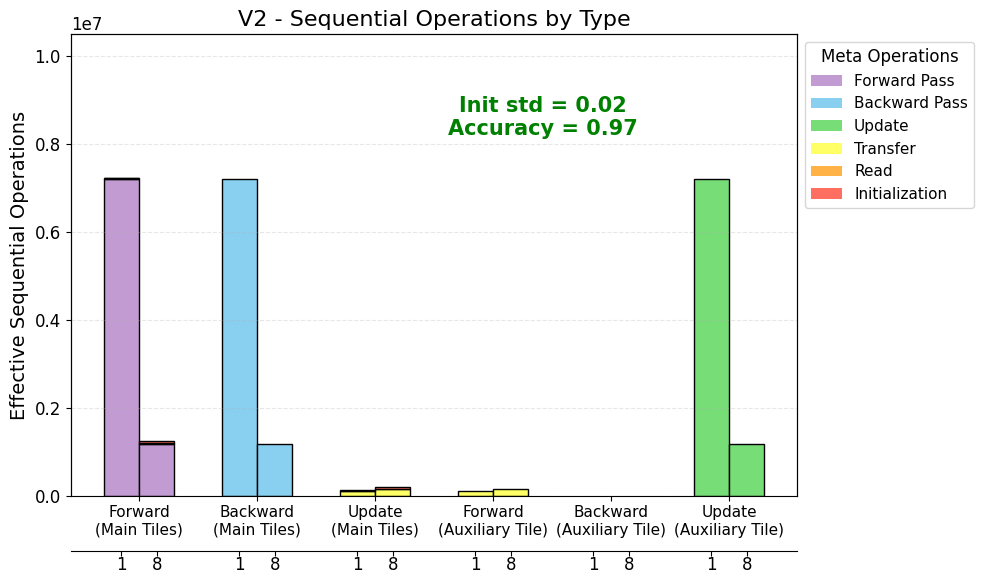

In [27]:
# PLOT 2: Sequential Operations (accounting for parallelization)
plt.figure(figsize=(10, 6), dpi=100)

# Add a subtle grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Calculate sequential operations
single_tile_sequential = single_tile_df.copy()
single_tile_sequential['Sequential_Ops'] = single_tile_sequential['Times']

multi_tile_sequential = multi_tile_df.copy()
multi_tile_sequential['Sequential_Ops'] = multi_tile_sequential['Times'] / multi_tile_sequential['Pfactor']

# multiply the operations of meta_op 'forward', 'backward' and 'transfer' by 1.6 for multi tile
# multi_tile_sequential.loc[multi_tile_sequential['Meta_op'].isin(['forward', 'backward', 'transfer', 'update']), 'Sequential_Ops'] *= 1.6
# # multiply the operations of meta_op 'update' by 16
# multi_tile_sequential.loc[multi_tile_sequential['Meta_op'] == 'update', 'Sequential_Ops'] /= 16

# Group by Tile, Op, and Meta_op
single_seq_grouped = single_tile_sequential.groupby(['Tile', 'Op', 'Meta_op'])['Sequential_Ops'].sum().reset_index()
multi_seq_grouped = multi_tile_sequential.groupby(['Tile', 'Op', 'Meta_op'])['Sequential_Ops'].sum().reset_index()

# Initialize the bars
bar_bottoms_single = {tile: {op: 0 for op in op_order} for tile in tile_order}
bar_bottoms_multi = {tile: {op: 0 for op in op_order} for tile in tile_order}

# Loop through each tile, operation and meta_operation to create the stacked bars
for i, tile in enumerate(tile_order):
    for j, op in enumerate(op_order):
        # Position for this op-tile combination
        pos = i * num_ops + j
        
        # Get data for this tile and operation
        single_data = single_seq_grouped[(single_seq_grouped['Tile'] == tile) & 
                                        (single_seq_grouped['Op'] == op)]
        multi_data = multi_seq_grouped[(multi_seq_grouped['Tile'] == tile) & 
                                      (multi_seq_grouped['Op'] == op)]
        
        # Reset bottoms for each bar
        bar_bottom_single = 0
        bar_bottom_multi = 0
        
        # Plot each meta_op segment in the specified order
        for meta_op in meta_op_order:
            # Find data for this meta_op in single tile dataset
            single_meta_data = single_data[single_data['Meta_op'] == meta_op]
            if not single_meta_data.empty:
                value = single_meta_data['Sequential_Ops'].values[0]
                plt.bar(pos - bar_width/2, value, bar_width, 
                       bottom=bar_bottom_single,
                       color=meta_op_colors.get(meta_op, '#CCCCCC'),
                       edgecolor='black', linewidth=1)
                bar_bottom_single += value
            
            # Find data for this meta_op in multi tile dataset
            multi_meta_data = multi_data[multi_data['Meta_op'] == meta_op]
            if not multi_meta_data.empty:
                value = multi_meta_data['Sequential_Ops'].values[0]
                plt.bar(pos + bar_width/2, value, bar_width, 
                       bottom=bar_bottom_multi,
                       color=meta_op_colors.get(meta_op, '#CCCCCC'),
                       edgecolor='black', linewidth=1)
                bar_bottom_multi += value

# Configure axes and labels
plt.ylabel('Effective Sequential Operations', fontsize=14)
plt.title('V2 - Sequential Operations by Type', fontsize=16)

# Set custom tick positions and labels
tick_positions = []
tick_labels = []
for i, tile in enumerate(tile_order):
    for j, op in enumerate(op_order):
        pos = i * num_ops + j
        tick_positions.append(pos)
        tick_labels.append(f"{op_display_names[op]}\n({tile_display_names[tile]})")

plt.xticks(tick_positions, tick_labels, fontsize=11)

# Remove the plt.text() calls that try to add "1" and "16" labels

# Create a second x-axis for the number of tiles labels
ax = plt.gca()
plt.rcParams.update({'font.size': 12})
ax2 = ax.twiny()

# Calculate positions for the "1" and "16" labels
secondary_positions = []
secondary_labels = []
for i, tile in enumerate(tile_order):
    for j, op in enumerate(op_order):
        pos = i * num_ops + j
        # Position for "1" label
        secondary_positions.append(pos - bar_width/2)
        secondary_labels.append("1")
        # Position for "16" label
        secondary_positions.append(pos + bar_width/2)
        secondary_labels.append("8")

# Set the secondary x-axis tick positions and labels
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(secondary_positions)
ax2.set_xticklabels(secondary_labels)
ax2.tick_params(axis='x', which='major', pad=0)

# Align the secondary axis with the primary axis
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 40))  # Move the secondary axis down

# Add legend for meta operations
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=meta_op_display_names[meta_op])
                  for meta_op, color in meta_op_colors.items()]

# Legend with border
plt.legend(handles=legend_elements, title="Meta Operations", loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

# set ylim to be the total number of forward operations
max_y = single_seq_grouped['Sequential_Ops'].sum()
plt.ylim(0, 10.5e6)

plt.text(0.65, 0.82, 'Init std = 0.02\nAccuracy = 0.97', fontsize=15, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')

# Save the figure
plt.tight_layout()

plt.show()

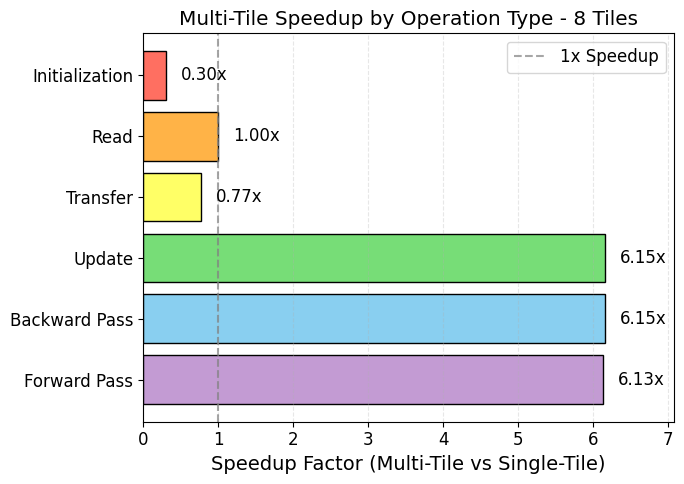

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# PLOT: Speedup factor by meta operation type with parallelization factor
plt.figure(figsize=(7, 5), dpi=100)

# Calculate sequential operations accounting for parallelization
single_tile_sequential = single_tile_df.copy()
single_tile_sequential['Sequential_Ops'] = single_tile_sequential['Times']

multi_tile_df = pd.read_csv('logs/log_8_v2.csv')
multi_tile_sequential = multi_tile_df.copy()
multi_tile_sequential['Sequential_Ops'] = multi_tile_sequential['Times'] / multi_tile_sequential['Pfactor']

# Group by Meta_op to get sequential operation totals
single_seq_by_meta = single_tile_sequential.groupby('Meta_op')['Sequential_Ops'].sum()
multi_seq_by_meta = multi_tile_sequential.groupby('Meta_op')['Sequential_Ops'].sum()

# Calculate speedup factors (single sequential / multi sequential)
speedup_data = []
speedup_labels = []

for meta_op in meta_op_order:
    # Skip if not in data or to avoid division by zero
    if meta_op in multi_seq_by_meta and multi_seq_by_meta[meta_op] > 0:
        # Single-tile sequential divided by multi-tile sequential gives speedup
        speedup = single_seq_by_meta.get(meta_op, 0) / multi_seq_by_meta[meta_op]
        speedup_data.append(speedup)
        speedup_labels.append(meta_op_display_names[meta_op])

# Create horizontal bar chart with matching colors
speedup_bars = plt.barh(speedup_labels, speedup_data, 
                       color=[meta_op_colors[meta_op] for meta_op in meta_op_order 
                              if meta_op in multi_seq_by_meta and multi_seq_by_meta[meta_op] > 0],
                       edgecolor='black', linewidth=1)

# Add value labels
for bar in speedup_bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}x', va='center')

plt.xlabel('Speedup Factor (Multi-Tile vs Single-Tile)', fontsize=14)
#plt.ylabel('Meta Operation Type')
plt.title('Multi-Tile Speedup by Operation Type - 8 Tiles')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.7, label='1x Speedup')  # Reference line at 1x speedup

# Ensure we can see the full range of speedups
plt.xlim(0, max(speedup_data) * 1.15)
plt.legend()

# save the figure
plt.tight_layout()

plt.show()

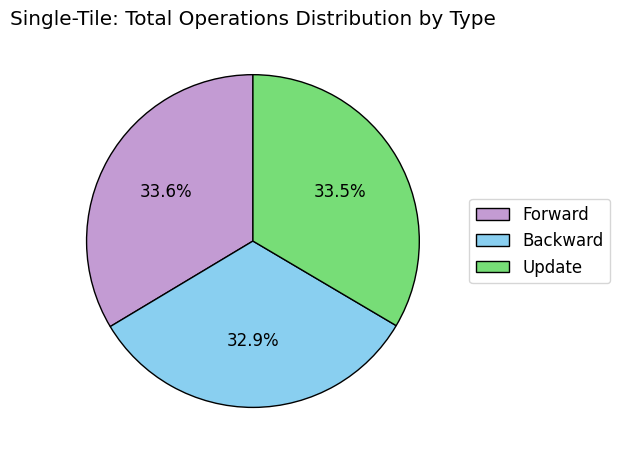

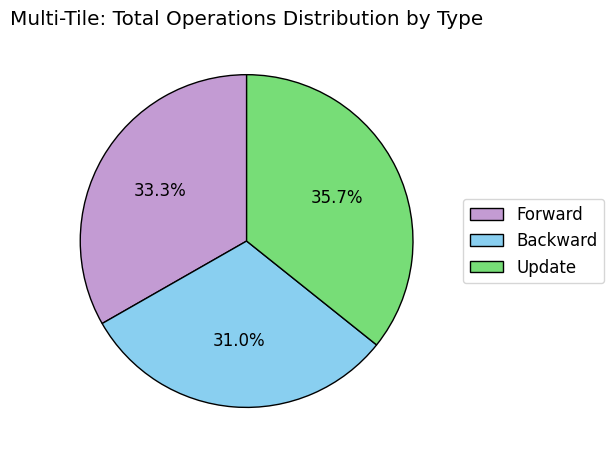

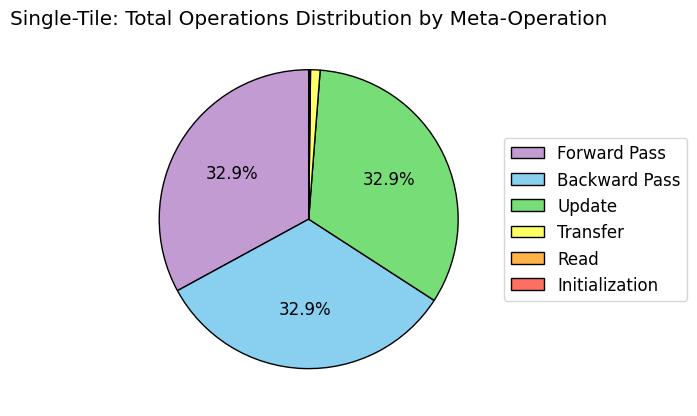

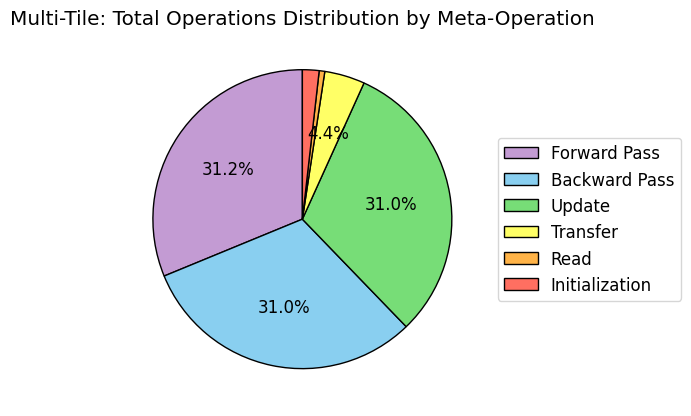

In [59]:
# ADDITIONAL PLOT: Percentage distribution of TOTAL operations by operation type

# Calculate total operations by operation type
single_op_total = single_tile_df.groupby('Op')['Times'].sum()
multi_op_total = multi_tile_df.groupby('Op')['Times'].sum()

# Prepare data in the correct order and with proper labels
single_data = []
multi_data = []
labels = []
colors = []

# Operation colors (consistent with previous plots)
operation_colors = {
    'forward': meta_op_colors['forward'],
    'backward': meta_op_colors['backward'],
    'update': meta_op_colors['update']
}

for op in op_order:
    if op in single_op_total and op in multi_op_total:
        single_data.append(single_op_total[op])
        multi_data.append(multi_op_total[op])
        labels.append(op_display_names[op])
        colors.append(operation_colors[op])

# Calculate percentages
single_percentage = np.array(single_data) / sum(single_data) * 100
multi_percentage = np.array(multi_data) / sum(multi_data) * 100

# Function to hide small percentage labels
def make_autopct(values, threshold=3.0):
    def my_autopct(pct):
        return ('%.1f%%' % pct) if pct >= threshold else ''
    return my_autopct

# First plot: Single-tile distribution by operation type
plt.figure(figsize=(6, 6), dpi=100)
plt.pie(single_percentage, labels=None, 
        autopct=make_autopct(single_percentage),
        colors=colors, startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Single-Tile: Total Operations Distribution by Type')

plt.legend(
    labels,
    loc='center left', 
    bbox_to_anchor=(1, 0.5)
)
plt.tight_layout()
plt.show()

# Second plot: Multi-tile distribution by operation type
plt.figure(figsize=(6, 6), dpi=100)
plt.pie(multi_percentage, labels=None, 
        autopct=make_autopct(multi_percentage),
        colors=colors, startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Multi-Tile: Total Operations Distribution by Type')

plt.legend(
    labels,
    loc='center left', 
    bbox_to_anchor=(1, 0.5)
)
plt.tight_layout()
plt.show()

# ADDITIONAL PLOT: Percentage distribution of TOTAL operations by meta-operation

# Calculate total operations by meta-operation
single_meta_total = single_tile_df.groupby('Meta_op')['Times'].sum()
multi_meta_total = multi_tile_df.groupby('Meta_op')['Times'].sum()

# Prepare data in the correct order and with proper labels
single_data = []
multi_data = []
labels = []
colors = []

for meta_op in meta_op_order:
    if meta_op in single_meta_total and meta_op in multi_meta_total:
        single_data.append(single_meta_total[meta_op])
        multi_data.append(multi_meta_total[meta_op])
        labels.append(meta_op_display_names[meta_op])
        colors.append(meta_op_colors[meta_op])

# Calculate percentages
single_percentage = np.array(single_data) / sum(single_data) * 100
multi_percentage = np.array(multi_data) / sum(multi_data) * 100

# First plot: Single-tile distribution by meta-operation
plt.figure(figsize=(6, 6), dpi=100)
plt.pie(single_percentage, labels=None, 
        autopct=make_autopct(single_percentage),
        colors=colors, startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Single-Tile: Total Operations Distribution by Meta-Operation')

plt.legend(
    labels,
    loc='center left', 
    bbox_to_anchor=(1, 0.5)
)
plt.tight_layout()
plt.show()

# Second plot: Multi-tile distribution by meta-operation
plt.figure(figsize=(6, 6), dpi=100)
plt.pie(multi_percentage, labels=None, 
        autopct=make_autopct(multi_percentage),
        colors=colors, startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Multi-Tile: Total Operations Distribution by Meta-Operation')

plt.legend(
    labels,
    loc='center left', 
    bbox_to_anchor=(1, 0.5)
)
plt.tight_layout()
plt.show()

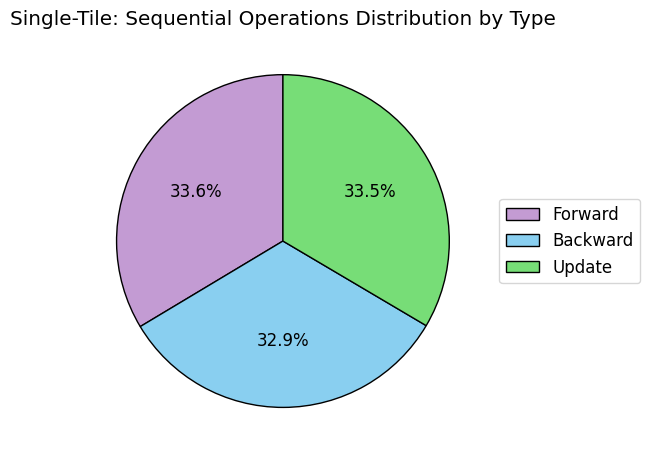

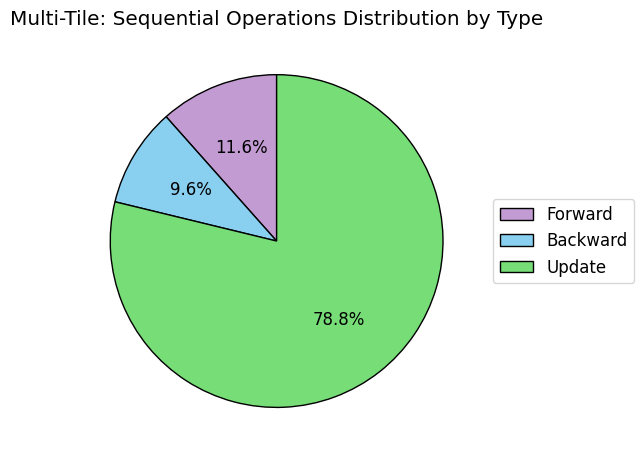

In [60]:
# ADDITIONAL PLOT: Percentage distribution of sequential operations by operation type

# Calculate sequential operations by operation type (accounting for parallelization)
single_op_seq = single_tile_sequential.groupby('Op')['Sequential_Ops'].sum()
multi_op_seq = multi_tile_sequential.groupby('Op')['Sequential_Ops'].sum()

# Prepare data in the correct order and with proper labels
single_data = []
multi_data = []
labels = []
colors = []

# We'll use the first few meta-op colors for operations
operation_colors = {
    'forward': meta_op_colors['forward'],
    'backward': meta_op_colors['backward'],
    'update': meta_op_colors['update']
}

for op in op_order:
    if op in single_op_seq and op in multi_op_seq:
        single_data.append(single_op_seq[op])
        multi_data.append(multi_op_seq[op])
        labels.append(op_display_names[op])
        colors.append(operation_colors[op])

# Calculate percentages
single_percentage = np.array(single_data) / sum(single_data) * 100
multi_percentage = np.array(multi_data) / sum(multi_data) * 100

# Function to hide small percentage labels (less than threshold %)
def make_autopct(values, threshold=3.0):
    def my_autopct(pct):
        return ('%.1f%%' % pct) if pct >= threshold else ''
    return my_autopct

# First plot: Single-tile distribution
plt.figure(figsize=(6, 6), dpi=100)
plt.pie(single_percentage, labels=None, 
        autopct=make_autopct(single_percentage),
        colors=colors, startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Single-Tile: Sequential Operations Distribution by Type')

# Add legend to the single-tile plot
plt.legend(
    labels,
    loc='center left', 
    bbox_to_anchor=(1, 0.5)
)
plt.tight_layout()
plt.show()

# Second plot: Multi-tile distribution
plt.figure(figsize=(6, 6), dpi=100)
plt.pie(multi_percentage, labels=None, 
        autopct=make_autopct(multi_percentage),
        colors=colors, startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Multi-Tile: Sequential Operations Distribution by Type')

# Add legend to the multi-tile plot
plt.legend(
    labels,
    loc='center left', 
    bbox_to_anchor=(1, 0.5)
)
plt.tight_layout()
plt.show()

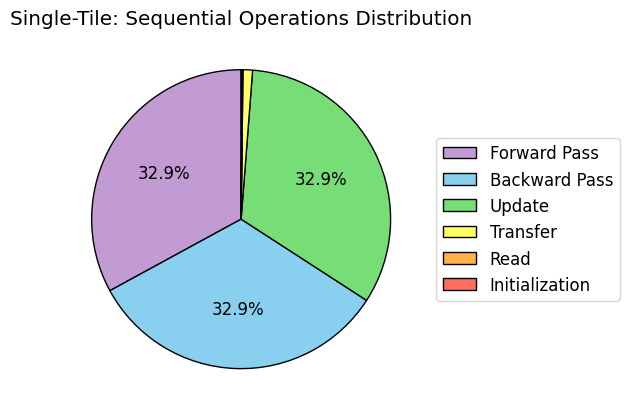

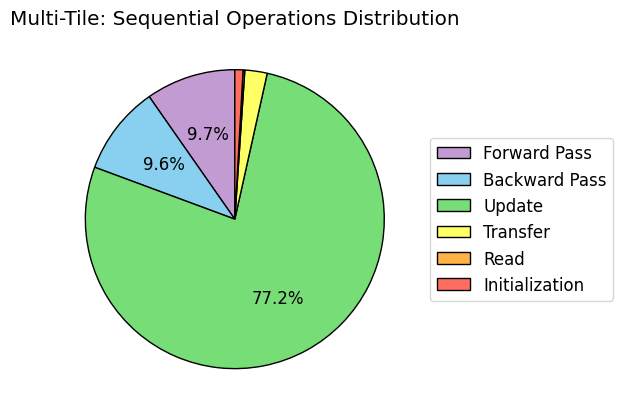

In [61]:
# ADDITIONAL PLOT: Percentage distribution of sequential operations by meta-operation

# Calculate sequential operations by meta-operation (accounting for parallelization)
single_meta_seq = single_tile_sequential.groupby('Meta_op')['Sequential_Ops'].sum()
multi_meta_seq = multi_tile_sequential.groupby('Meta_op')['Sequential_Ops'].sum()

# Prepare data in the correct order and with proper labels
single_data = []
multi_data = []
labels = []
colors = []

for meta_op in meta_op_order:
    if meta_op in single_meta_seq and meta_op in multi_meta_seq:
        single_data.append(single_meta_seq[meta_op])
        multi_data.append(multi_meta_seq[meta_op])
        labels.append(meta_op_display_names[meta_op])
        colors.append(meta_op_colors[meta_op])

# Calculate percentages
single_percentage = np.array(single_data) / sum(single_data) * 100
multi_percentage = np.array(multi_data) / sum(multi_data) * 100

# Function to hide small percentage labels (less than threshold %)
def make_autopct(values, threshold=3.0):
    def my_autopct(pct):
        return ('%.1f%%' % pct) if pct >= threshold else ''
    return my_autopct

# First plot: Single-tile distribution
plt.figure(figsize=(6, 6), dpi=100)
plt.pie(single_percentage, labels=None, 
        autopct=make_autopct(single_percentage),
        colors=colors, startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Single-Tile: Sequential Operations Distribution')

# Add legend to the single-tile plot
plt.legend(
    labels,
    loc='center left', 
    bbox_to_anchor=(1, 0.5)
)
plt.tight_layout()
plt.show()

# Second plot: Multi-tile distribution
plt.figure(figsize=(6, 6), dpi=100)
plt.pie(multi_percentage, labels=None, 
        autopct=make_autopct(multi_percentage),
        colors=colors, startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Multi-Tile: Sequential Operations Distribution')

# Add legend to the multi-tile plot
plt.legend(
    labels,
    loc='center left', 
    bbox_to_anchor=(1, 0.5)
)
plt.tight_layout()
plt.show()

# Digital profiling

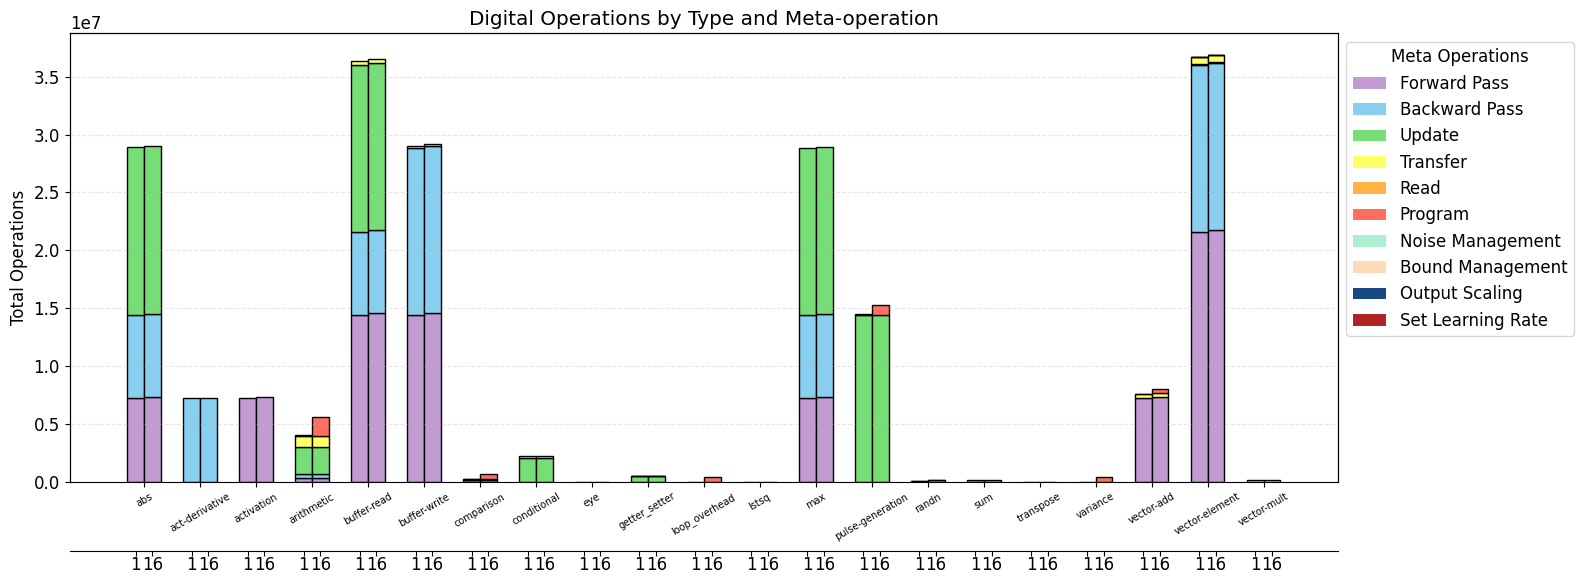

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the two datasets
single_tile_df = pd.read_csv('logs/dlog_1_v1.csv')
multi_tile_df = pd.read_csv('logs/dlog_16_v1.csv')

# Custom color palette for meta operations
meta_op_colors = {
    'forward': '#C39BD3',  # Light purple
    'backward': '#89CFF0',  # Light blue
    'update': '#77DD77',   # Light green
    'transfer': '#FFFF66',  # Light yellow
    'read': '#FFB347',     # Light orange
    'program': '#FF6F61',   # Coral
    'noise_management': '#AAF0D1',    # Pastel Mint
    'bound_management': '#FFDAB9',    # Pastel Peach
    'out_scaling': '#174A7E',         # Dark Blue
    'set_learning_rate': '#B22222',   # Firebrick (Dark Red)
}

# Define operation types to include in the plot
# Extract unique operation types from both datasets
op_types = sorted(set(single_tile_df['Op'].unique()).union(set(multi_tile_df['Op'].unique())))

# Define meta-operation order and names
meta_op_order = ['forward', 'backward', 'update', 'transfer', 'read', 'program',
                    'noise_management', 'bound_management', 'out_scaling', 'set_learning_rate']
meta_op_display_names = {
    'forward': 'Forward Pass',
    'backward': 'Backward Pass',
    'update': 'Update',
    'transfer': 'Transfer',
    'read': 'Read',
    'program': 'Program',
    'noise_management': 'Noise Management',
    'bound_management': 'Bound Management',
    'out_scaling': 'Output Scaling',
    'set_learning_rate': 'Set Learning Rate'
}

# Create figure
plt.figure(figsize=(16, 6),dpi=100)

# Add a subtle grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Calculate total operations grouped by Op and Meta_op
single_tile_grouped = single_tile_df.groupby(['Op', 'Meta_op'])['Times'].sum().reset_index()
multi_tile_grouped = multi_tile_df.groupby(['Op', 'Meta_op'])['Times'].sum().reset_index()

# Create positions for the grouped bars
bar_width = 0.3
group_positions = np.arange(len(op_types))

# Loop through each operation type and meta_operation to create the stacked bars
for i, op in enumerate(op_types):
    # Position for this operation
    pos = i
    
    # Get data for this operation
    single_data = single_tile_grouped[single_tile_grouped['Op'] == op]
    multi_data = multi_tile_grouped[multi_tile_grouped['Op'] == op]
    
    # Reset bottoms for each bar
    bar_bottom_single = 0
    bar_bottom_multi = 0
    
    # Plot each meta_op segment in the specified order
    for meta_op in meta_op_order:
        # Find data for this meta_op in single tile dataset
        single_meta_data = single_data[single_data['Meta_op'] == meta_op]
        if not single_meta_data.empty:
            value = single_meta_data['Times'].values[0]
            plt.bar(pos - bar_width/2, value, bar_width, 
                   bottom=bar_bottom_single,
                   color=meta_op_colors.get(meta_op, '#CCCCCC'),
                   edgecolor='black', linewidth=1)
            bar_bottom_single += value
        
        # Find data for this meta_op in multi tile dataset
        multi_meta_data = multi_data[multi_data['Meta_op'] == meta_op]
        if not multi_meta_data.empty:
            value = multi_meta_data['Times'].values[0]
            plt.bar(pos + bar_width/2, value, bar_width, 
                   bottom=bar_bottom_multi,
                   color=meta_op_colors.get(meta_op, '#CCCCCC'),
                   edgecolor='black', linewidth=1)
            bar_bottom_multi += value

# Configure axes and labels
plt.ylabel('Total Operations')
plt.title('Digital Operations by Type and Meta-operation')

# Set custom tick positions and labels
plt.xticks(group_positions, op_types, rotation=30, ha='center', fontsize=7)

# Create a second x-axis for the number of tiles labels
ax = plt.gca()
ax2 = ax.twiny()

# Calculate positions for the "1" and "16" labels
secondary_positions = []
secondary_labels = []
for i in range(len(op_types)):
    # Position for "1" label
    secondary_positions.append(i - bar_width/2)
    secondary_labels.append("1")
    # Position for "16" label
    secondary_positions.append(i + bar_width/2)
    secondary_labels.append("16")

# Set the secondary x-axis tick positions and labels
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(secondary_positions)
ax2.set_xticklabels(secondary_labels)
ax2.tick_params(axis='x', which='major', pad=0)

# Align the secondary axis with the primary axis
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 50))  # Move the secondary axis down

# Add legend for meta operations
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=meta_op_display_names[meta_op])
                  for meta_op, color in meta_op_colors.items()]

# Legend with border
plt.legend(handles=legend_elements, title="Meta Operations", loc='upper left', bbox_to_anchor=(1, 1))

# Save the figure
plt.tight_layout()

plt.show()

In [46]:
import pandas as pd
import numpy as np

# Load the digital operation logs
single_tile_df = pd.read_csv('logs/dlog_1_v1.csv')
#multi_tile_df = pd.read_csv('logs/dlog_16_v1.csv')

# filter by layer = 'l1'
single_tile_df = single_tile_df[single_tile_df['layer'] == 'l1']
#multi_tile_df = multi_tile_df[multi_tile_df['layer'] == 'l1']

# Create a combined summary function
def analyze_operations_by_meta_op(df):
    # Group by Meta_op and Op
    grouped = df.groupby(['Meta_op', 'Op']).agg({
        'Times': 'sum',
        'Vector_length': lambda x: x.iloc[0] if pd.notna(x.iloc[0]) else 'N/A'
    }).reset_index()
    
    # Sort by Meta_op and Times (descending)
    grouped = grouped.sort_values(['Meta_op', 'Times'], ascending=[True, False])
    
    # Format the results
    results = {}
    for meta_op, group in grouped.groupby('Meta_op'):
        results[meta_op] = group[['Op', 'Times', 'Vector_length']].values.tolist()
    
    return results

# Get summaries for both datasets
single_tile_summary = analyze_operations_by_meta_op(single_tile_df)
#multi_tile_summary = analyze_operations_by_meta_op(multi_tile_df)

# Print detailed breakdown
print("OPERATIONS BY META-OPERATION (SINGLE TILE)\n")
for meta_op, operations in single_tile_summary.items():
    print(f"Meta-Operation: {meta_op}")
    print("-" * 60)
    print(f"{'Operation':<20} {'Count':<12} {'Vector Length':<15}")
    print("-" * 60)
    for op, count, vec_len in operations:
        print(f"{op:<20} {int(count/37520):<12} {vec_len}")
    print("\n")

# Optional: You can similarly print the multi-tile summary
# print("\n\nOPERATIONS BY META-OPERATION (MULTI TILE - 16 TILES)\n")
# for meta_op, operations in multi_tile_summary.items():
#     print(f"Meta-Operation: {meta_op}")
#     print("-" * 60)
#     print(f"{'Operation':<20} {'Count':<12} {'Vector Length':<15}")
#     print("-" * 60)
#     for op, count, vec_len in operations:
#         print(f"{op:<20} {int(count/37520):<12} {vec_len}")
#     print("\n")

OPERATIONS BY META-OPERATION (SINGLE TILE)

Meta-Operation: backward
------------------------------------------------------------
Operation            Count        Vector Length  
------------------------------------------------------------
buffer-write         127          256.0
vector-element       127          256.0
abs                  63           256.0
act-derivative       63           784.0
buffer-read          63           256.0
max                  63           256.0
arithmetic           3            N/A


Meta-Operation: forward
------------------------------------------------------------
Operation            Count        Vector Length  
------------------------------------------------------------
vector-element       192          784.0
buffer-read          128          784.0
buffer-write         128          784.0
abs                  64           784.0
activation           64           256.0
max                  64           784.0
vector-add           64           256.0
ari

/tmp/ipykernel_6938/2824746412.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  single_tile_df = pd.read_csv('logs/dlog_1_v2.csv')


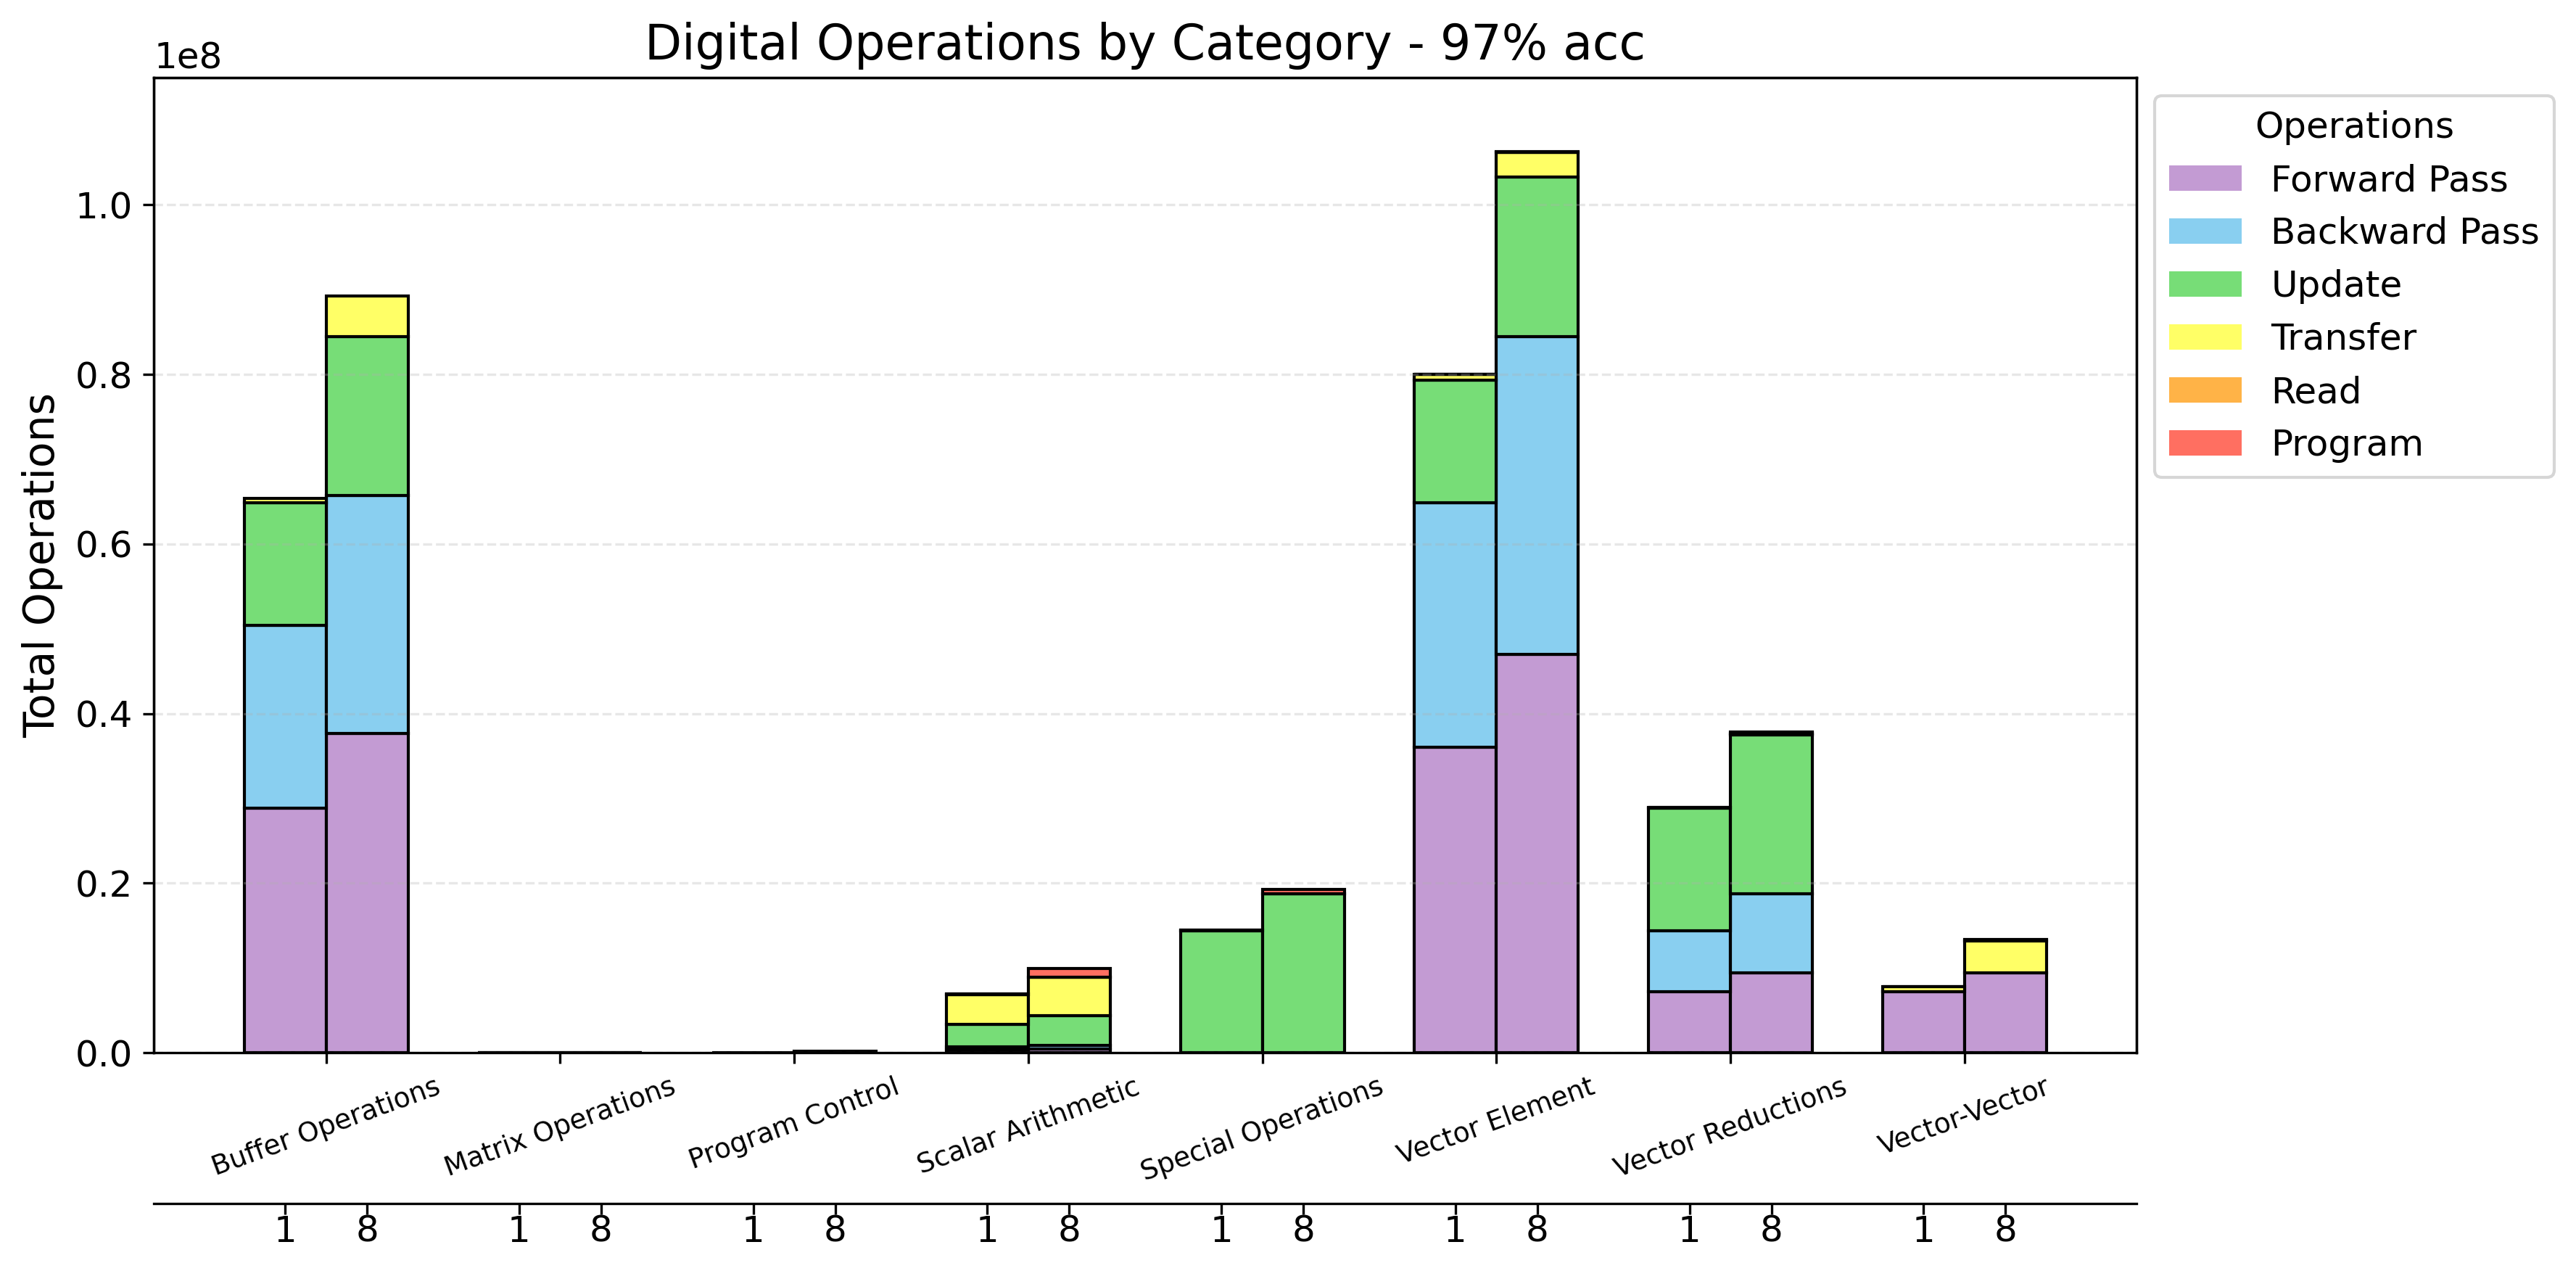

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the two datasets
single_tile_df = pd.read_csv('logs/dlog_1_v2.csv')
multi_tile_df = pd.read_csv('logs/dlog_8_v2.csv')

# Define operation groupings
operation_groups = {
    'Scalar Arithmetic': ['arithmetic', 'comparison', 'conditional', 'getter_setter'],
    'Vector Element': ['abs', 'vector-element', 'activation', 'act-derivative'],
    'Vector Reductions': ['sum', 'max', 'variance'],
    'Vector-Vector': ['vector-add', 'vector-mult'],
    'Matrix Operations': ['eye', 'transpose', 'lstsq'],  # Including transpose and lstsq if they exist
    'Program Control': ['loop_overhead'],
    'Special Operations': ['randn', 'pulse-generation'],
    'Buffer Operations': ['buffer-read', 'buffer-write']
}

# Custom color palette for meta operations
meta_op_colors = {
    'forward': '#C39BD3',  # Light purple
    'backward': '#89CFF0',  # Light blue
    'update': '#77DD77',   # Light green
    'transfer': '#FFFF66',  # Light yellow
    'read': '#FFB347',     # Light orange
    'program': '#FF6F61',   # Coral
    # 'noise_management': '#AAF0D1',    # Pastel Mint
    # 'bound_management': '#FFDAB9',    # Pastel Peach
    # 'out_scaling': '#174A7E',         # Dark Blue
    # 'set_learning_rate': '#B22222',   # Firebrick (Dark Red)
}

# Define meta-operation order and names
meta_op_order = ['forward', 'backward', 'update', 'transfer', 'read', 'program',
                    ]#'noise_management', 'bound_management', 'out_scaling', 'set_learning_rate'
meta_op_display_names = {
    'forward': 'Forward Pass',
    'backward': 'Backward Pass',
    'update': 'Update',
    'transfer': 'Transfer',
    'read': 'Read',
    'program': 'Program',
    # 'noise_management': 'Noise Management',
    # 'bound_management': 'Bound Management',
    # 'out_scaling': 'Output Scaling',
    # 'set_learning_rate': 'Set Learning Rate'
}

# Create a new 'Group' column for each dataframe
def assign_group(op):
    for group, ops in operation_groups.items():
        if op in ops:
            return group
    return 'Other'  # For any operations not in our groups

single_tile_df['Group'] = single_tile_df['Op'].apply(assign_group)
multi_tile_df['Group'] = multi_tile_df['Op'].apply(assign_group)

# Create figure
plt.figure(figsize=(12, 6), dpi=300)

# Add a subtle grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Calculate total operations grouped by Group and Meta_op
single_tile_grouped = single_tile_df.groupby(['Group', 'Meta_op'])['Times'].sum().reset_index()
multi_tile_grouped = multi_tile_df.groupby(['Group', 'Meta_op'])['Times'].sum().reset_index()

# Get unique groups that appear in the data
groups = sorted(set(single_tile_grouped['Group'].unique()).union(set(multi_tile_grouped['Group'].unique())))

# Create positions for the grouped bars
bar_width = 0.35
group_positions = np.arange(len(groups))

# Loop through each group and meta_operation to create the stacked bars
for i, group in enumerate(groups):
    # Position for this group
    pos = i
    
    # Get data for this group
    single_data = single_tile_grouped[single_tile_grouped['Group'] == group]
    multi_data = multi_tile_grouped[multi_tile_grouped['Group'] == group]
    
    # Reset bottoms for each bar
    bar_bottom_single = 0
    bar_bottom_multi = 0
    
    # Plot each meta_op segment in the specified order
    for meta_op in meta_op_order:
        # Find data for this meta_op in single tile dataset
        single_meta_data = single_data[single_data['Meta_op'] == meta_op]
        if not single_meta_data.empty:
            value = single_meta_data['Times'].values[0]
            plt.bar(pos - bar_width/2, value, bar_width, 
                   bottom=bar_bottom_single,
                   color=meta_op_colors.get(meta_op, '#CCCCCC'),
                   edgecolor='black', linewidth=1)
            bar_bottom_single += value
        
        # Find data for this meta_op in multi tile dataset
        multi_meta_data = multi_data[multi_data['Meta_op'] == meta_op]
        if not multi_meta_data.empty:
            value = multi_meta_data['Times'].values[0]
            plt.bar(pos + bar_width/2, value, bar_width, 
                   bottom=bar_bottom_multi,
                   color=meta_op_colors.get(meta_op, '#CCCCCC'),
                   edgecolor='black', linewidth=1)
            bar_bottom_multi += value

# Configure axes and labels
plt.ylabel('Total Operations', fontsize=14)
plt.title('Digital Operations by Category - 97% acc', fontsize=16)

# Set custom tick positions and labels
plt.xticks(group_positions, groups, rotation=20, ha='center', fontsize=9)

# Create a second x-axis for the number of tiles labels
ax = plt.gca()
ax2 = ax.twiny()

# Calculate positions for the "1" and "16" labels
secondary_positions = []
secondary_labels = []
for i in range(len(groups)):
    # Position for "1" label
    secondary_positions.append(i - bar_width/2)
    secondary_labels.append("1")
    # Position for "16" label
    secondary_positions.append(i + bar_width/2)
    secondary_labels.append("8")

# Set the secondary x-axis tick positions and labels
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(secondary_positions)
ax2.set_xticklabels(secondary_labels)
ax2.tick_params(axis='x', which='major', pad=0)

# Use log scale for y-axis due to potentially large differences in operation counts
#plt.yscale('log')

# Align the secondary axis with the primary axis
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 50))  # Move the secondary axis down

# Add legend for meta operations
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=meta_op_display_names[meta_op])
                  for meta_op, color in meta_op_colors.items()]

# Legend with border
plt.legend(handles=legend_elements, title="Operations", loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0, 1.15e8)

# Save the figure
plt.tight_layout()

plt.show()

In [31]:
# print unique meta operations
print(single_tile_df['Op'].unique())
print(multi_tile_df['Op'].unique())

['getter_setter' 'arithmetic' 'loop_overhead' 'randn' 'vector-element'
 'variance' 'comparison' 'abs' 'max' 'conditional' 'eye' 'sum' 'lstsq'
 'transpose']
['getter_setter' 'arithmetic' 'loop_overhead' 'randn' 'vector-element'
 'variance' 'comparison' 'vector-addition' 'abs' 'max' 'buffer-write'
 'buffer-read' 'activation' 'activation-derivative' 'conditional'
 'pulse_train-generation' 'pulse-train-generation' 'eye'
 'vector-multiplication' 'sum' 'lstsq' 'transpose']


In [34]:
# print unique meta operations
print(single_tile_df['Meta_op'].unique())
print(multi_tile_df['Meta_op'].unique())

['program' 'forward' 'noise_management' 'backward' 'update' 'transfer'
 'read' 'get_weights' 'set_learning_rate' 'out_scaling']
['program' 'forward' 'noise_management' 'backward' 'update' 'transfer'
 'read' 'get_weights' 'set_learning_rate' 'out_scaling']


/tmp/ipykernel_6708/318473968.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  single_tile_df = pd.read_csv('dlog_1_new.csv')
/tmp/ipykernel_6708/318473968.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  multi_tile_df = pd.read_csv('dlog_16_new.csv')


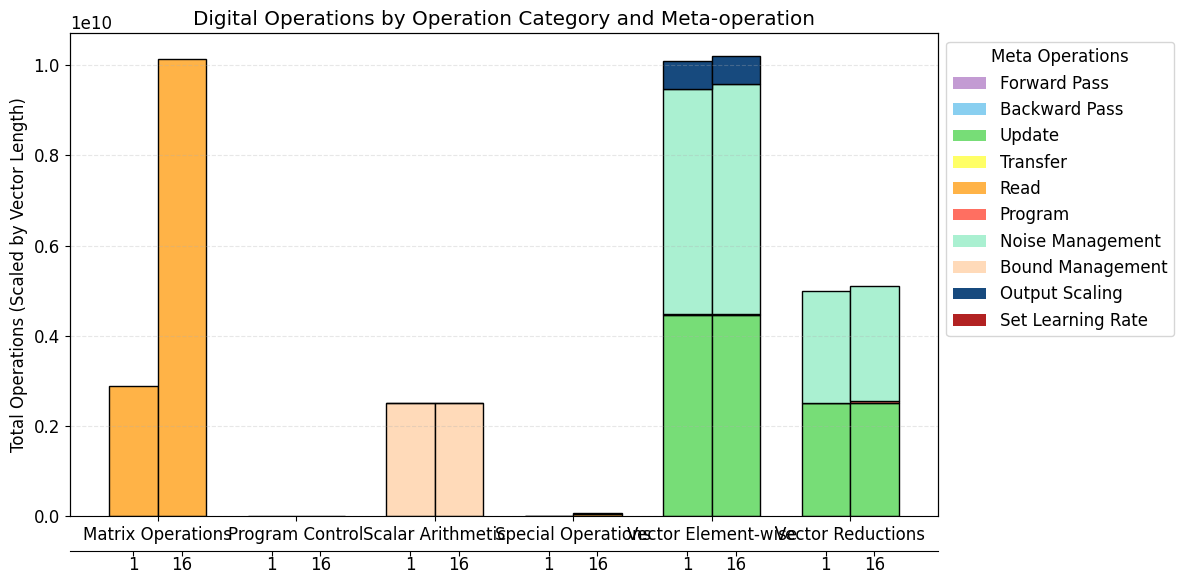

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the two datasets
single_tile_df = pd.read_csv('dlog_1_new.csv')
multi_tile_df = pd.read_csv('dlog_16_new.csv')

# Define operation groupings
operation_groups = {
    'Scalar Arithmetic': ['arithmetic', 'comparison', 'conditional', 'getter_setter'],
    'Vector Element-wise': ['abs', 'vector-element'],
    'Vector Reductions': ['sum', 'max', 'variance'],
    'Matrix Operations': ['eye', 'transpose', 'lstsq'],
    'Program Control': ['loop_overhead'],
    'Special Operations': ['randn']
}

# Custom color palette for meta operations
meta_op_colors = {
    'forward': '#C39BD3',  # Light purple
    'backward': '#89CFF0',  # Light blue
    'update': '#77DD77',   # Light green
    'transfer': '#FFFF66',  # Light yellow
    'read': '#FFB347',     # Light orange
    'program': '#FF6F61',   # Coral
    'noise_management': '#AAF0D1',    # Pastel Mint
    'bound_management': '#FFDAB9',    # Pastel Peach
    'out_scaling': '#174A7E',         # Dark Blue
    'set_learning_rate': '#B22222',   # Firebrick (Dark Red)
}

# Define meta-operation order and names
meta_op_order = ['forward', 'backward', 'update', 'transfer', 'read', 'program',
                    'noise_management', 'bound_management', 'out_scaling', 'set_learning_rate']
meta_op_display_names = {
    'forward': 'Forward Pass',
    'backward': 'Backward Pass',
    'update': 'Update',
    'transfer': 'Transfer',
    'read': 'Read',
    'program': 'Program',
    'noise_management': 'Noise Management',
    'bound_management': 'Bound Management',
    'out_scaling': 'Output Scaling',
    'set_learning_rate': 'Set Learning Rate'
}

# Create a new 'Group' column for each dataframe
def assign_group(op):
    for group, ops in operation_groups.items():
        if op in ops:
            return group
    return 'Other'  # For any operations not in our groups

single_tile_df['Group'] = single_tile_df['Op'].apply(assign_group)
multi_tile_df['Group'] = multi_tile_df['Op'].apply(assign_group)

# Function to calculate actual operation count based on vector length and complexity
def calculate_actual_ops(row):
    # First check if vector length is available
    if pd.notna(row['Vector_length']):
        n = row['Vector_length']
        # Scale according to the complexity class
        if row['Complexity'] == 'O(1)':
            return row['Times']
        elif row['Complexity'] == 'O(n)':
            return row['Times'] * n
        elif row['Complexity'] == 'O(n²)':
            return row['Times'] * (n * n)
        elif row['Complexity'] == 'O(n³)':
            return row['Times'] * (n * n * n)
        else:
            # For any other complexity, default to linear scaling
            return row['Times'] * n
    else:
        # If no vector length is specified, return the raw count
        return row['Times']

# Apply the scaling to both dataframes
single_tile_df['Actual_Ops'] = single_tile_df.apply(calculate_actual_ops, axis=1)
multi_tile_df['Actual_Ops'] = multi_tile_df.apply(calculate_actual_ops, axis=1)

# Create figure
plt.figure(figsize=(12, 6), dpi=100)

# Add a subtle grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Calculate total operations grouped by Group and Meta_op, now using Actual_Ops instead of Times
single_tile_grouped = single_tile_df.groupby(['Group', 'Meta_op'])['Actual_Ops'].sum().reset_index()
multi_tile_grouped = multi_tile_df.groupby(['Group', 'Meta_op'])['Actual_Ops'].sum().reset_index()

# Get unique groups that appear in the data
groups = sorted(set(single_tile_grouped['Group'].unique()).union(set(multi_tile_grouped['Group'].unique())))

# Create positions for the grouped bars
bar_width = 0.35
group_positions = np.arange(len(groups))

# Loop through each group and meta_operation to create the stacked bars
for i, group in enumerate(groups):
    # Position for this group
    pos = i
    
    # Get data for this group
    single_data = single_tile_grouped[single_tile_grouped['Group'] == group]
    multi_data = multi_tile_grouped[multi_tile_grouped['Group'] == group]
    
    # Reset bottoms for each bar
    bar_bottom_single = 0
    bar_bottom_multi = 0
    
    # Plot each meta_op segment in the specified order
    for meta_op in meta_op_order:
        # Find data for this meta_op in single tile dataset
        single_meta_data = single_data[single_data['Meta_op'] == meta_op]
        if not single_meta_data.empty:
            value = single_meta_data['Actual_Ops'].values[0]
            plt.bar(pos - bar_width/2, value, bar_width, 
                   bottom=bar_bottom_single,
                   color=meta_op_colors.get(meta_op, '#CCCCCC'),
                   edgecolor='black', linewidth=1)
            bar_bottom_single += value
        
        # Find data for this meta_op in multi tile dataset
        multi_meta_data = multi_data[multi_data['Meta_op'] == meta_op]
        if not multi_meta_data.empty:
            value = multi_meta_data['Actual_Ops'].values[0]
            plt.bar(pos + bar_width/2, value, bar_width, 
                   bottom=bar_bottom_multi,
                   color=meta_op_colors.get(meta_op, '#CCCCCC'),
                   edgecolor='black', linewidth=1)
            bar_bottom_multi += value

# Configure axes and labels
plt.ylabel('Total Operations (Scaled by Vector Length)')
plt.title('Digital Operations by Operation Category and Meta-operation')

# Set custom tick positions and labels
plt.xticks(group_positions, groups, rotation=0, ha='center')

# Create a second x-axis for the number of tiles labels
ax = plt.gca()
ax2 = ax.twiny()

# Calculate positions for the "1" and "16" labels
secondary_positions = []
secondary_labels = []
for i in range(len(groups)):
    # Position for "1" label
    secondary_positions.append(i - bar_width/2)
    secondary_labels.append("1")
    # Position for "16" label
    secondary_positions.append(i + bar_width/2)
    secondary_labels.append("16")

# Set the secondary x-axis tick positions and labels
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(secondary_positions)
ax2.set_xticklabels(secondary_labels)
ax2.tick_params(axis='x', which='major', pad=0)

# Align the secondary axis with the primary axis
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 25))  # Move the secondary axis down

# Add legend for meta operations
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=meta_op_display_names[meta_op])
                  for meta_op, color in meta_op_colors.items()]

# Legend with border
plt.legend(handles=legend_elements, title="Meta Operations", loc='upper left', bbox_to_anchor=(1, 1))

# Use log scale for y-axis due to potentially large differences in operation counts
#plt.yscale('log')

# Save the figure
plt.tight_layout()
plt.show()

/tmp/ipykernel_6708/13745952.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  single_tile_df = pd.read_csv('dlog_1_new.csv')
/tmp/ipykernel_6708/13745952.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  multi_tile_df = pd.read_csv('dlog_16_new.csv')


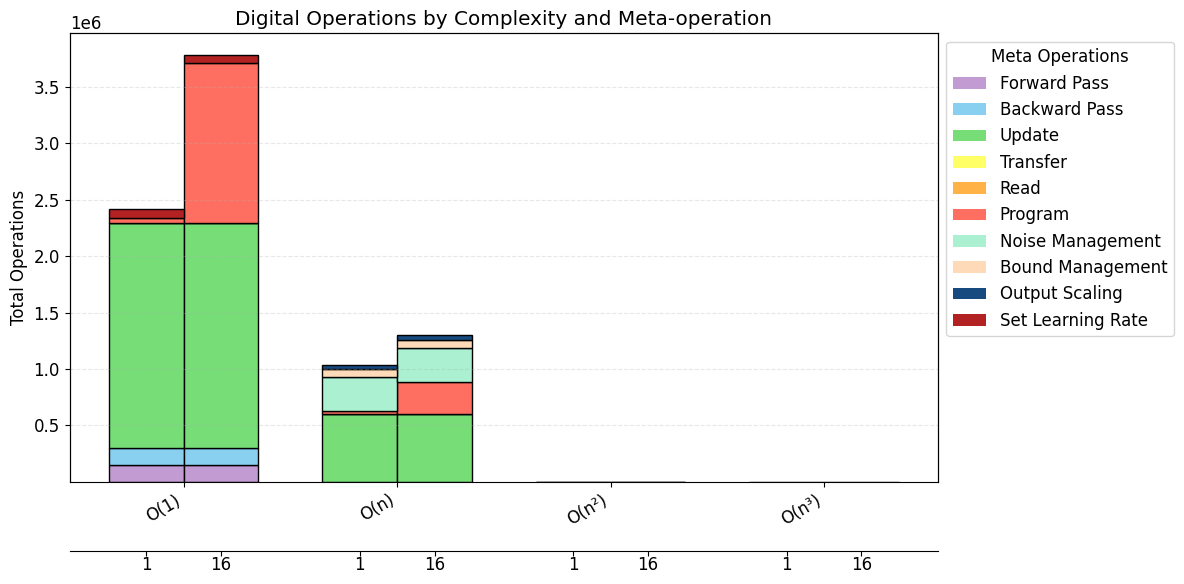

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the two datasets
single_tile_df = pd.read_csv('dlog_1_new.csv')
multi_tile_df = pd.read_csv('dlog_16_new.csv')

# Custom color palette for meta operations
meta_op_colors = {
    'forward': '#C39BD3',  # Light purple
    'backward': '#89CFF0',  # Light blue
    'update': '#77DD77',   # Light green
    'transfer': '#FFFF66',  # Light yellow
    'read': '#FFB347',     # Light orange
    'program': '#FF6F61',   # Coral
    'noise_management': '#AAF0D1',    # Pastel Mint
    'bound_management': '#FFDAB9',    # Pastel Peach
    'out_scaling': '#174A7E',         # Dark Blue
    'set_learning_rate': '#B22222',   # Firebrick (Dark Red)
}

# Define complexity types to include in the plot
# Extract unique complexity types from both datasets
complexity_types = sorted(set(single_tile_df['Complexity'].unique()).union(set(multi_tile_df['Complexity'].unique())))

# Define meta-operation order and names
meta_op_order = ['forward', 'backward', 'update', 'transfer', 'read', 'program',
                    'noise_management', 'bound_management', 'out_scaling', 'set_learning_rate']
meta_op_display_names = {
    'forward': 'Forward Pass',
    'backward': 'Backward Pass',
    'update': 'Update',
    'transfer': 'Transfer',
    'read': 'Read',
    'program': 'Program',
    'noise_management': 'Noise Management',
    'bound_management': 'Bound Management',
    'out_scaling': 'Output Scaling',
    'set_learning_rate': 'Set Learning Rate'
}

# Create figure
plt.figure(figsize=(12, 6), dpi=100)

# Add a subtle grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Calculate total operations grouped by Complexity and Meta_op
single_tile_grouped = single_tile_df.groupby(['Complexity', 'Meta_op'])['Times'].sum().reset_index()
multi_tile_grouped = multi_tile_df.groupby(['Complexity', 'Meta_op'])['Times'].sum().reset_index()

# Create positions for the grouped bars
bar_width = 0.35
group_positions = np.arange(len(complexity_types))

# Loop through each complexity type and meta_operation to create the stacked bars
for i, complexity in enumerate(complexity_types):
    # Position for this complexity
    pos = i
    
    # Get data for this complexity
    single_data = single_tile_grouped[single_tile_grouped['Complexity'] == complexity]
    multi_data = multi_tile_grouped[multi_tile_grouped['Complexity'] == complexity]
    
    # Reset bottoms for each bar
    bar_bottom_single = 0
    bar_bottom_multi = 0
    
    # Plot each meta_op segment in the specified order
    for meta_op in meta_op_order:
        # Find data for this meta_op in single tile dataset
        single_meta_data = single_data[single_data['Meta_op'] == meta_op]
        if not single_meta_data.empty:
            value = single_meta_data['Times'].values[0]
            plt.bar(pos - bar_width/2, value, bar_width, 
                   bottom=bar_bottom_single,
                   color=meta_op_colors.get(meta_op, '#CCCCCC'),
                   edgecolor='black', linewidth=1)
            bar_bottom_single += value
        
        # Find data for this meta_op in multi tile dataset
        multi_meta_data = multi_data[multi_data['Meta_op'] == meta_op]
        if not multi_meta_data.empty:
            value = multi_meta_data['Times'].values[0]
            plt.bar(pos + bar_width/2, value, bar_width, 
                   bottom=bar_bottom_multi,
                   color=meta_op_colors.get(meta_op, '#CCCCCC'),
                   edgecolor='black', linewidth=1)
            bar_bottom_multi += value

# Configure axes and labels
plt.ylabel('Total Operations')
plt.title('Digital Operations by Complexity and Meta-operation')

# Set custom tick positions and labels
plt.xticks(group_positions, complexity_types, rotation=30, ha='right')

# Create a second x-axis for the number of tiles labels
ax = plt.gca()
ax2 = ax.twiny()

# Calculate positions for the "1" and "16" labels
secondary_positions = []
secondary_labels = []
for i in range(len(complexity_types)):
    # Position for "1" label
    secondary_positions.append(i - bar_width/2)
    secondary_labels.append("1")
    # Position for "16" label
    secondary_positions.append(i + bar_width/2)
    secondary_labels.append("16")

# Set the secondary x-axis tick positions and labels
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(secondary_positions)
ax2.set_xticklabels(secondary_labels)
ax2.tick_params(axis='x', which='major', pad=0)

# Align the secondary axis with the primary axis
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 50))  # Move the secondary axis down

# Add legend for meta operations
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=meta_op_display_names[meta_op])
                  for meta_op, color in meta_op_colors.items()]

# Legend with border
plt.legend(handles=legend_elements, title="Meta Operations", loc='upper left', bbox_to_anchor=(1, 1))

# Save the figure
plt.tight_layout()

plt.show()

# Energy

In [51]:
# read dict from json file energy.json
import json

with open('logs/energy.json', 'r') as f:
    energy_estimates = json.load(f)

print(energy_estimates)

{'buffer_784_read_8': 40.78, 'buffer_784_write_8': 33.21, 'buffer_256_read_8': 18.98, 'buffer_256_write_8': 19.57, 'buffer_128_read_8': 11.81, 'buffer_128_write_8': 13.47, 'buffer_10_read_8': 3.02, 'buffer_10_write_8': 4.13, 'buffer_784_read_32': 86.93, 'buffer_784_write_32': 65.67, 'buffer_256_read_32': 45.88, 'buffer_256_write_32': 36.14, 'buffer_128_read_32': 25.32, 'buffer_128_write_32': 26.19, 'buffer_10_read_32': 5.01, 'buffer_10_write_32': 9.26, 'adder_8': 0.164, 'multiplier_8': 1.24, 'adder_32': 0.33, 'multiplier_32': 19.9, 'forward_l1': 2554.36, 'forward_l2': 1185.88, 'forward_l3': 94.93, 'backward_l1': 14026.4, 'backward_l2': 2318.04, 'backward_l3': 1137.41, 'update_l1': 1443643.4175, 'update_l2': 238923.7425, 'update_l3': 11333.6, 'transfer_l1': 593.5899999999999, 'transfer_l2': 219.51999999999998, 'transfer_l3': 19.21}


/tmp/ipykernel_13743/2696524192.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, idx].set_xticklabels(ops, rotation=45)
/tmp/ipykernel_13743/2696524192.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, idx].set_xticklabels(ops, rotation=45)
/tmp/ipykernel_13743/2696524192.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, idx].set_xticklabels(ops, rotation=45)
/tmp/ipykernel_13743/2696524192.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, idx].set_xticklabels(ops, rotation=45)
/tmp/ipykernel_13743/2696524192.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, idx].set_xticklabels(ops, rotation=45)
/tmp/ipykernel_13743/2696524192.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, idx].set_xticklabels(ops, rotation=45)


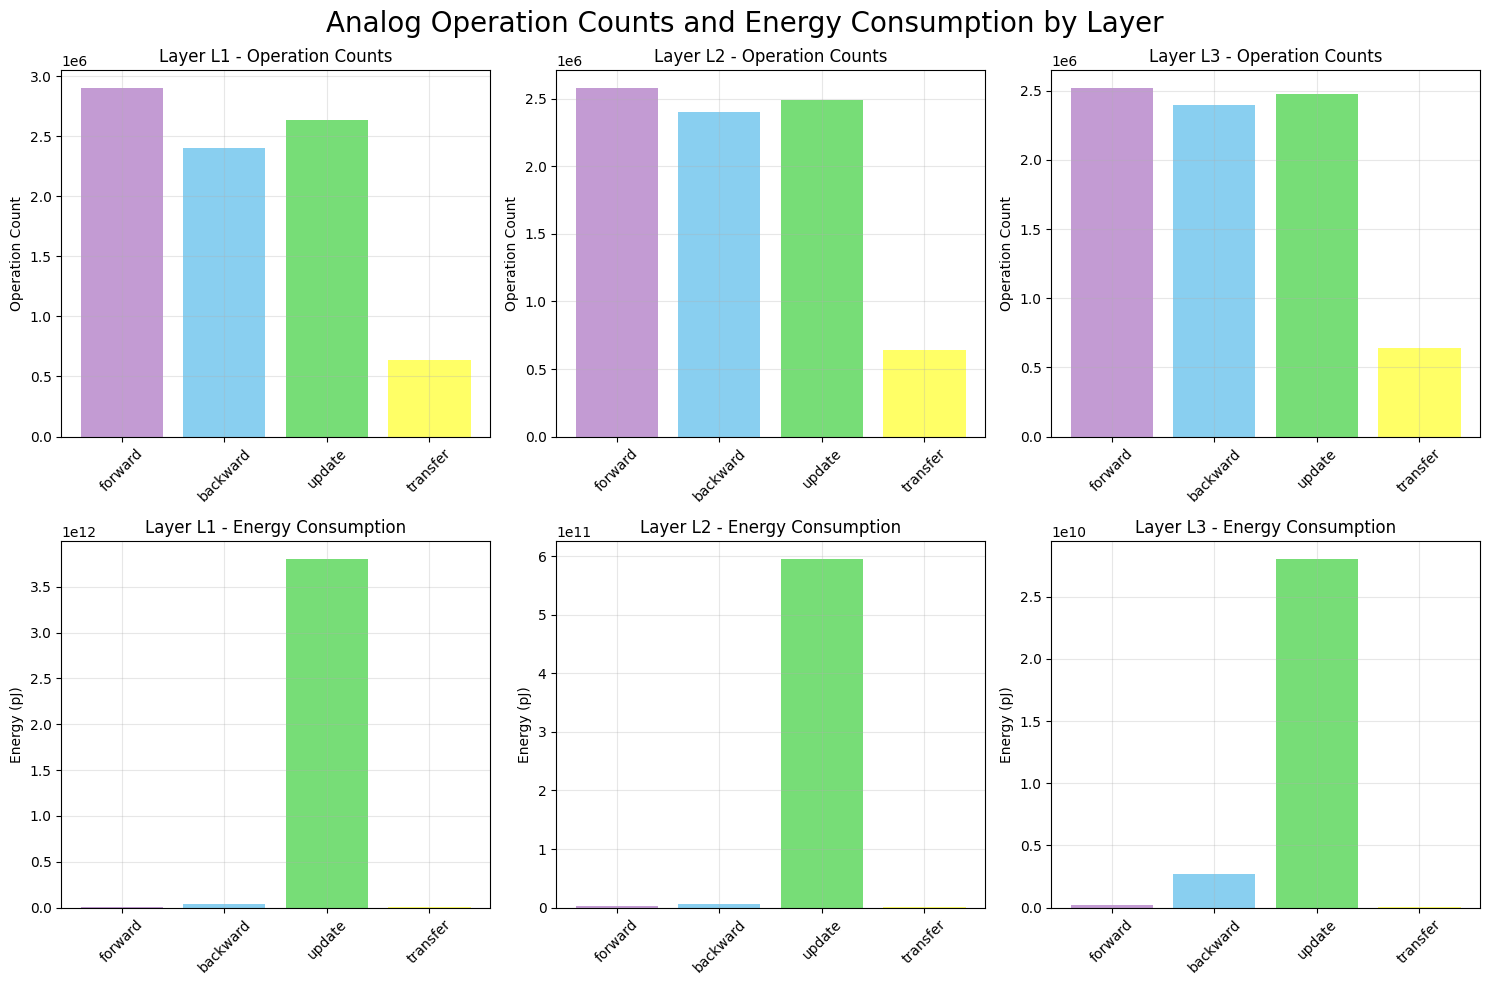


Detailed Statistics by Layer:

-------------------- Layer L1 --------------------

Operation Counts:
forward: 2,902,862
backward: 2,400,000
update: 2,636,460
transfer: 637,840

Energy per Operation (pJ):
forward: 2554.36
backward: 14026.40
update: 1443643.42
transfer: 2764.80

Total Energy Consumption (pJ):
forward: 7,414,954,578.32
backward: 33,663,360,000.00
update: 3,806,108,124,502.05
transfer: 1,763,497,480.64
Layer Total: 3,848,949,936,561.01

-------------------- Layer L2 --------------------

Operation Counts:
forward: 2,582,084
backward: 2,400,000
update: 2,493,942
transfer: 637,840

Energy per Operation (pJ):
forward: 1185.88
backward: 2318.04
update: 238923.74
transfer: 1227.52

Total Energy Consumption (pJ):
forward: 3,062,041,773.92
backward: 5,563,296,000.00
update: 595,861,956,217.93
transfer: 782,960,081.12
Layer Total: 605,270,254,072.97

-------------------- Layer L3 --------------------

Operation Counts:
forward: 2,522,096
backward: 2,400,000
update: 2,475,733
tran

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Read the CSV and JSON files
log_df = pd.read_csv('/home/ignacio/Downloads/Research_2/SHD_script/logs/log_16_v1.csv')
with open('/home/ignacio/Downloads/Research_2/SHD_script/logs/energy.json', 'r') as f:
    energy_data = json.load(f)

# Create energy cost mappings for each layer and operation type
energy_costs = {
    'l1': {
        'forward': energy_data['forward_l1'],
        'backward': energy_data['backward_l1'],
        'update': energy_data['update_l1'],
        'transfer': energy_data['transfer_l1']
    },
    'l2': {
        'forward': energy_data['forward_l2'],
        'backward': energy_data['backward_l2'],
        'update': energy_data['update_l2'],
        'transfer': energy_data['transfer_l2']
    },
    'l3': {
        'forward': energy_data['forward_l3'],
        'backward': energy_data['backward_l3'],
        'update': energy_data['update_l3'],
        'transfer': energy_data['transfer_l3']
    }
}

# Calculate energy consumption for each layer
total_energy = {}
op_counts = {}

for layer in ['l1', 'l2', 'l3']:
    # Group operations by Op and Meta_op for this layer
    layer_data = log_df[log_df['layer'] == layer]
    
    # Handle transfer operations separately (using Meta_op)
    transfer_counts = layer_data[layer_data['Meta_op'] == 'transfer']['Times'].sum()
    
    # Handle other operations (using Op)
    ops_data = layer_data[layer_data['Meta_op'] != 'transfer'].groupby('Op')['Times'].sum()
    
    # Store operation counts
    op_counts[layer] = {
        'forward': ops_data.get('forward', 0),
        'backward': ops_data.get('backward', 0),
        'update': ops_data.get('update', 0),
        'transfer': transfer_counts
    }
    
    # Calculate energy for each operation type
    total_energy[layer] = {
        op: count * energy_costs[layer][op]
        for op, count in op_counts[layer].items()
    }

# Create plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=100)
fig.suptitle('Analog Operation Counts and Energy Consumption by Layer', fontsize=20)

# Colors for operations
colors = ['#C39BD3', '#89CFF0', '#77DD77', '#FFFF66']
ops = ['forward', 'backward', 'update', 'transfer']

for idx, layer in enumerate(['l1', 'l2', 'l3']):
    # Plot operation counts
    counts = [op_counts[layer][op] for op in ops]
    axes[0, idx].bar(ops, counts, color=colors)
    axes[0, idx].set_title(f'Layer {layer.upper()} - Operation Counts')
    axes[0, idx].set_xticklabels(ops, rotation=45)
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].set_ylabel('Operation Count')
    
    # Plot energy consumption
    energies = [total_energy[layer][op] for op in ops]
    axes[1, idx].bar(ops, energies, color=colors)
    axes[1, idx].set_title(f'Layer {layer.upper()} - Energy Consumption')
    axes[1, idx].set_xticklabels(ops, rotation=45)
    axes[1, idx].set_ylabel('Energy (pJ)')
    axes[1, idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics by Layer:")
for layer in ['l1', 'l2', 'l3']:
    print(f"\n{'-'*20} Layer {layer.upper()} {'-'*20}")
    print("\nOperation Counts:")
    for op, count in op_counts[layer].items():
        print(f"{op}: {count:,.0f}")
    print("\nEnergy per Operation (pJ):")
    for op, energy in energy_costs[layer].items():
        print(f"{op}: {energy:.2f}")
    print("\nTotal Energy Consumption (pJ):")
    for op, energy in total_energy[layer].items():
        print(f"{op}: {energy:,.2f}")
    print(f"Layer Total: {sum(total_energy[layer].values()):,.2f}")

# Print grand total
grand_total = sum(sum(layer_energy.values()) for layer_energy in total_energy.values())
print(f"\nGrand Total Energy Consumption: {grand_total:,.2f} pJ")

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Read the CSV and JSON files
log_df = pd.read_csv('logs/dlog_1_v1.csv')
with open('logs/energy.json', 'r') as f:
    energy_data = json.load(f)

# Create mappings for buffer operations based on vector size
buffer_energy = {
    # Read operations
    (0, 10): energy_data['buffer_10_read_32'],
    (11, 128): energy_data['buffer_128_read_32'],
    (129, 256): energy_data['buffer_256_read_32'],
    (257, 784): energy_data['buffer_784_read_32'],
    # Write operations
    (-10, 0): energy_data['buffer_10_write_32'],
    (-128, -11): energy_data['buffer_128_write_32'],
    (-256, -129): energy_data['buffer_256_write_32'],
    (-784, -257): energy_data['buffer_784_write_32'],
}

def get_buffer_energy(size, is_read=True):
    """Get appropriate buffer energy cost based on vector size"""
    if is_read:
        for (min_size, max_size), energy in buffer_energy.items():
            if min_size >= 0 and min_size <= size <= max_size:
                return energy
    else:
        size = -size  # Convert to negative for write operations
        for (min_size, max_size), energy in buffer_energy.items():
            if min_size <= size <= max_size:
                return energy
    return 0  # Return 0 if no matching size found

def calculate_operation_energy(row):
    """Calculate energy for a digital operation based on its type and vector size"""
    op = row['Op']
    vector_size = row['Vector_length'] if pd.notna(row['Vector_length']) else 1
    
    # Basic arithmetic and scalar operations
    if op in ['arithmetic', 'comparison', 'conditional', 'getter_setter']:
        # Single scalar operation
        return energy_data['adder_32'] * row['Times']
    
    # Vector-vector operations
    elif op in ['vector-add', 'vector-mult']:
        # Each element requires one operation
        energy_cost = energy_data['adder_32'] if op == 'vector-add' else energy_data['multiplier_32']
        return energy_cost * vector_size * row['Times']
    
    # Vector element-wise operations
    elif op in ['vector-element', 'abs', 'activation', 'act-derivative']:
        # Similar to vector multiply in complexity
        return energy_data['multiplier_32'] * vector_size * row['Times']
    
    # Vector reductions
    elif op in ['sum', 'max', 'variance']:
        if op == 'variance':
            # Variance requires multiple passes through the data
            return 3 * energy_data['multiplier_32'] * vector_size * row['Times']
        else:
            # Sum and max require one pass through the data
            return energy_data['multiplier_32'] * vector_size * row['Times']
    
    # Matrix operations
    elif op in ['eye', 'transpose', 'lstsq']:
        if op == 'lstsq':
            # Most complex operation, requires multiple matrix multiplications
            return 3 * energy_data['multiplier_32'] * vector_size * vector_size * row['Times']
        elif op == 'transpose':
            # Requires memory operations but minimal computation
            return energy_data['adder_32'] * vector_size * vector_size * row['Times']
        else:  # eye
            # Simple diagonal matrix creation
            return energy_data['adder_32'] * vector_size * row['Times']
    
    # Buffer operations
    elif op == 'buffer-read':
        return get_buffer_energy(vector_size, True) * row['Times']
    elif op == 'buffer-write':
        return get_buffer_energy(vector_size, False) * row['Times']
    
    # Program control and special operations
    elif op == 'loop_overhead':
        # Minimal overhead, similar to a scalar operation
        return energy_data['adder_32'] * row['Times']
    elif op in ['randn', 'pulse-generation']:
        # Random number generation and pulse generation are complex operations
        return energy_data['multiplier_32'] * vector_size * row['Times']
        
    # Default case
    print(f"Warning: Operation '{op}' not recognized. Defaulting to 0 energy.")
    return 0  # For any operations we haven't explicitly handled

# Calculate energy consumption for each operation
log_df['energy'] = log_df.apply(calculate_operation_energy, axis=1)

# Group by Meta_op and Op to get total energy consumption
energy_by_meta_op = log_df.groupby(['Meta_op', 'Op'])['energy'].sum().reset_index()

# Print summary
print("Energy consumption by Meta-operation and Operation type:")
for meta_op in energy_by_meta_op['Meta_op'].unique():
    print(f"\n{'-'*20} {meta_op} {'-'*20}")
    ops = energy_by_meta_op[energy_by_meta_op['Meta_op'] == meta_op]
    for _, row in ops.iterrows():
        print(f"{row['Op']}: {row['energy']:,.2f} pJ")
    print(f"Total for {meta_op}: {ops['energy'].sum():,.2f} pJ")

print(f"\nTotal energy consumption: {energy_by_meta_op['energy'].sum():,.2f} pJ")

Energy consumption by Meta-operation and Operation type:

-------------------- backward --------------------
abs: 18,817,440,000.00 pJ
act-derivative: 55,783,680,000.00 pJ
arithmetic: 111,434.40 pJ
buffer-read: 182,904,000.00 pJ
buffer-write: 343,632,000.00 pJ
max: 18,817,440,000.00 pJ
vector-element: 37,634,880,000.00 pJ
Total for backward: 131,580,087,434.40 pJ

-------------------- forward --------------------
abs: 55,852,989,312.00 pJ
activation: 18,840,797,824.00 pJ
arithmetic: 111,449.25 pJ
buffer-read: 563,047,162.40 pJ
buffer-write: 615,040,894.40 pJ
max: 55,852,989,312.00 pJ
vector-add: 312,435,340.80 pJ
vector-element: 130,523,418,624.00 pJ
Total for forward: 262,560,829,918.85 pJ

-------------------- get_weights --------------------
vector-element: 54,884.20 pJ
Total for get_weights: 54,884.20 pJ

-------------------- program --------------------
arithmetic: 16,760.70 pJ
comparison: 4,187.70 pJ
getter_setter: 5.94 pJ
loop_overhead: 4,187.70 pJ
pulse-generation: 310,838,000.

In [7]:
import pandas as pd
import json
import os

# Read the energy data once
with open('/home/ignacio/Downloads/Research_2/SHD_script/logs/energy.json', 'r') as f:
    energy_data = json.load(f)

# Process all tile configurations
tile_configs = [1, 4, 8, 16, 32]
all_results = []

for tiles in tile_configs:
    print(f"Processing {tiles} tiles...")
    
    # Load the digital log file
    file_path = f'/home/ignacio/Downloads/Research_2/SHD_script/logs/dlog_{tiles}_v2.csv'
    
    # Check if file exists
    if not os.path.exists(file_path):
        print(f"Warning: File {file_path} not found. Skipping {tiles} tiles.")
        continue
    
    # Read the CSV file
    log_df = pd.read_csv(file_path)
    
    # Calculate energy consumption for each operation
    log_df['energy'] = log_df.apply(calculate_operation_energy, axis=1)
    
    # Group by Meta_op and Op to get total energy consumption
    energy_by_meta_op = log_df.groupby(['Meta_op', 'Op'])['energy'].sum().reset_index()
    
    # Add tile configuration column
    energy_by_meta_op['tiles'] = tiles
    
    # Append to results
    all_results.append(energy_by_meta_op)
    
    print(f"Completed {tiles} tiles. Total energy: {energy_by_meta_op['energy'].sum():,.2f} pJ")

# Combine all results
if all_results:
    combined_results = pd.concat(all_results, ignore_index=True)
    
    # Save to CSV
    output_file = 'logs/digital_energy_summary_v2.csv'
    combined_results.to_csv(output_file, index=False)
    
    print(f"\nSaved combined results to: {output_file}")
    print(f"Total rows: {len(combined_results)}")
    print("\nSummary by tile configuration:")
    summary = combined_results.groupby('tiles')['energy'].sum()
    for tiles, total_energy in summary.items():
        print(f"{tiles} tiles: {total_energy:,.2f} pJ")
else:
    print("No files were processed successfully.")

Processing 1 tiles...


/tmp/ipykernel_635693/1593792785.py:25: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  log_df = pd.read_csv(file_path)


Completed 1 tiles. Total energy: 677,906,256,410.26 pJ
Processing 4 tiles...


/tmp/ipykernel_635693/1593792785.py:25: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  log_df = pd.read_csv(file_path)


Completed 4 tiles. Total energy: 770,330,791,237.11 pJ
Processing 8 tiles...
Completed 8 tiles. Total energy: 899,742,609,316.89 pJ
Processing 16 tiles...


/tmp/ipykernel_635693/1593792785.py:25: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  log_df = pd.read_csv(file_path)


Completed 16 tiles. Total energy: 1,024,868,728,590.03 pJ
Processing 32 tiles...


/tmp/ipykernel_635693/1593792785.py:25: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  log_df = pd.read_csv(file_path)


Completed 32 tiles. Total energy: 1,320,020,214,483.01 pJ

Saved combined results to: logs/digital_energy_summary_v2.csv
Total rows: 250

Summary by tile configuration:
1 tiles: 677,906,256,410.26 pJ
4 tiles: 770,330,791,237.11 pJ
8 tiles: 899,742,609,316.89 pJ
16 tiles: 1,024,868,728,590.03 pJ
32 tiles: 1,320,020,214,483.01 pJ


In [130]:
df = pd.read_csv('mnist_bl_v2.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Define the tile configurations and BL configurations
tile_configurations = [1, 4, 8, 16, 32]
bl_configurations = [2, 5, 10, 31, 100]

epoch_list = []

# For each tile configuration, create a line
for i, nt in enumerate(tile_configurations):
    # Filter data for this tile configuration
    df_tiles = df[df['num_tiles'] == nt]
    # Calculate epochs for each BL configuration
    for config in bl_configurations:
        # Filter the data for this BL configuration
        df_filtered = df_tiles[df_tiles['bl'] == config]
        # Calculate the number of epochs to reach 97% accuracy
        epochs = np.mean([len(run) for inner in df_filtered['digital_accuracies'] for run in inner])
        epoch_list.append({
            'tiles': nt,
            'bl': config,
            'epochs': epochs.round(0)
        })

# Create a DataFrame from the epoch list
epoch_df = pd.DataFrame(epoch_list)
# Save the epoch DataFrame to a CSV file
epoch_df.to_csv('logs/epochs_to_reach_97_v2.csv', index=False)

In [ ]:
digital_summary = pd.read_csv('/home/ignacio/Downloads/Research_2/SHD_script/logs/digital_energy_summary_v1.csv')

total_by_tile = digital_summary.groupby(['tiles', 'Meta_op'])['energy'].sum().reset_index()
# add column for epochs 


# Create a category column for grouping
total_by_tile['category'] = total_by_tile['Meta_op'].map({
    'program': 'fixed_energy',
    'read': 'fixed_energy', 
    'get_weights': 'fixed_energy',
    'backward': 'epoch_energy',
    'forward': 'epoch_energy',
    'transfer': 'epoch_energy',
    'update': 'epoch_energy'
})

# Group by tiles and category, then sum the energy
grouped_result = total_by_tile.groupby(['tiles', 'category'])['energy'].sum().reset_index()

# Pivot to get fixed_energy and epoch_energy as columns
final_result = grouped_result.pivot(index='tiles', columns='category', values='energy').reset_index()

# Clean up column names
final_result.columns.name = None

final_result['epochs'] = 40
#final_result['epochs'] = [40, 45, 52, 58, 72]
final_result['energy_per_epoch'] = final_result['epoch_energy'] / final_result['epochs']

# Save the final result to a CSV file
final_result.to_csv('logs/digital_energy_hyper_summary_v1.csv', index=False)

tiles  epoch_energy  fixed_energy  epochs  energy_per_epoch
0      1  6.766722e+11  1.231999e+09      40      1.691681e+10
1      4  6.783161e+11  4.088596e+09      40      1.695790e+10
2      8  6.787880e+11  7.140585e+09      40      1.696970e+10
3     16  6.812061e+11  1.335258e+10      40      1.703015e+10
4     32  6.860421e+11  2.556444e+10      40      1.715105e+10

In [ ]:
import pandas as pd

# Load the dataframes
epochs_df = pd.read_csv('logs/epochs_to_reach_97_v1.csv')
digital_energy_df = pd.read_csv('logs/digital_energy_hyper_summary_v1.csv')

# Merge the dataframes on 'tiles'
combined_df = epochs_df.merge(digital_energy_df[['tiles', 'fixed_energy', 'energy_per_epoch']], on='tiles', how='left')

# Calculate epoch_energy by multiplying energy_per_epoch by epochs
combined_df['epoch_energy'] = combined_df['energy_per_epoch'] * combined_df['epochs']

# Select only the desired columns
result_df = combined_df[['tiles', 'bl', 'fixed_energy', 'epoch_energy']]

# Save to CSV if needed
result_df.to_csv('logs/digital_energy_mega_summary_v1.csv', index=False)

In [66]:
# Load energy cost data
with open('logs/energy.json', 'r') as f:
    energy_data = json.load(f)

bls = [2, 5, 10, 31, 100]
tile_configs = [1, 4, 8, 16, 32]

#data_epochs = [40,40,40,40,40]
data_epochs = [40, 45, 52, 58, 72]  # epochs for each tile configuration

# load epochs from the CSV file
epochs_df = pd.read_csv('logs/epochs_to_reach_97_v2.csv')

results = []

for bl in bls:
    energy_costs = {
        'l1': {
            'forward': energy_data['forward_l1'],
            'backward': energy_data['backward_l1'],
            'update': energy_data['update_l1']/31 * bl,
            'transfer': energy_data['transfer_l1']
        },
        'l2': {
            'forward': energy_data['forward_l2'],
            'backward': energy_data['backward_l2'],
            'update': energy_data['update_l2']/31 * bl,
            'transfer': energy_data['transfer_l2']
        },
        'l3': {
            'forward': energy_data['forward_l3'],
            'backward': energy_data['backward_l3'],
            'update': energy_data['update_l3']/31 * bl,
            'transfer': energy_data['transfer_l3']
        }
    }

    # Calculate energy for each tile configuration
    for tiles in tile_configs:
        epochs = epochs_df[(epochs_df['tiles'] == tiles) & (epochs_df['bl'] == bl)]['epochs'].values
        print(f"Calculating energy for {tiles} tiles with BL {bl} and epochs {epochs}")
        # Calculate analog energy
        log_df = pd.read_csv(f'logs/log_{tiles}_v2.csv')
        
        for layer in ['l1', 'l2', 'l3']:
            layer_data = log_df[log_df['layer'] == layer]
            transfer_count = layer_data[layer_data['Meta_op'] == 'transfer']['Times'].sum()
            program_forward_count = layer_data[(layer_data['Meta_op'] == 'program') & (layer_data['Op'] == 'forward')]['Times'].sum()
            program_update_count = layer_data[(layer_data['Meta_op'] == 'program') & (layer_data['Op'] == 'update')]['Times'].sum()
            read_count = layer_data[layer_data['Meta_op'] == 'read']['Times'].sum()
            # Group by Op for other operations
            pure_ops_data = layer_data[layer_data['Meta_op'].isin(['update', 'forward', 'backward'])].groupby('Op')['Times'].sum()
            
            epoch_energy = (pure_ops_data.get('forward', 0) * energy_costs[layer]['forward'] +
                    pure_ops_data.get('backward', 0) * energy_costs[layer]['backward'] +
                    pure_ops_data.get('update', 0) * energy_costs[layer]['update'] +
                    transfer_count * energy_costs[layer]['transfer'])
            
            fixed_energy = (program_forward_count * energy_costs[layer]['forward'] + 
                    program_update_count * energy_costs[layer]['update']/bl +
                          read_count * energy_costs[layer]['forward'])
            results.append({
                'tiles': tiles,
                'bl': bl,
                'fixed_energy': fixed_energy,
                'epoch_energy': epoch_energy / data_epochs[tile_configs.index(tiles)] * epochs[0],
            })
        
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.groupby(['tiles', 'bl']).sum().reset_index()
# Save the results to a CSV file
results_df.to_csv('logs/analog_energy_hyper_summary_v2.csv', index=False)

Calculating energy for 1 tiles with BL 2 and epochs [101.]
Calculating energy for 4 tiles with BL 2 and epochs [151.]
Calculating energy for 8 tiles with BL 2 and epochs [246.]
Calculating energy for 16 tiles with BL 2 and epochs [340.]
Calculating energy for 32 tiles with BL 2 and epochs [535.]
Calculating energy for 1 tiles with BL 5 and epochs [67.]
Calculating energy for 4 tiles with BL 5 and epochs [86.]
Calculating energy for 8 tiles with BL 5 and epochs [115.]
Calculating energy for 16 tiles with BL 5 and epochs [143.]
Calculating energy for 32 tiles with BL 5 and epochs [192.]
Calculating energy for 1 tiles with BL 10 and epochs [45.]
Calculating energy for 4 tiles with BL 10 and epochs [64.]
Calculating energy for 8 tiles with BL 10 and epochs [79.]
Calculating energy for 16 tiles with BL 10 and epochs [96.]
Calculating energy for 32 tiles with BL 10 and epochs [107.]
Calculating energy for 1 tiles with BL 31 and epochs [34.]
Calculating energy for 4 tiles with BL 31 and epoch

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the analog and digital energy data
analog_df = pd.read_csv('logs/analog_energy_hyper_summary_v2.csv')
digital_df = pd.read_csv('logs/digital_energy_mega_summary_v2.csv')

# Merge the dataframes on 'tiles' and 'bl'
combined_df = pd.merge(analog_df, digital_df, on=['tiles', 'bl'], suffixes=('_analog', '_digital'))

# Calculate total fixed and epoch energies
combined_df['total_fixed_energy'] = combined_df['fixed_energy_analog'] + combined_df['fixed_energy_digital']
combined_df['total_epoch_energy'] = combined_df['epoch_energy_analog'] + combined_df['epoch_energy_digital']

# Calculate total energy (fixed + epoch)
combined_df['total_energy'] = combined_df['total_fixed_energy'] + combined_df['total_epoch_energy']

# save the combined dataframe to a CSV file
combined_df.to_csv('logs/combined_energy_summary_v2.csv', index=False)

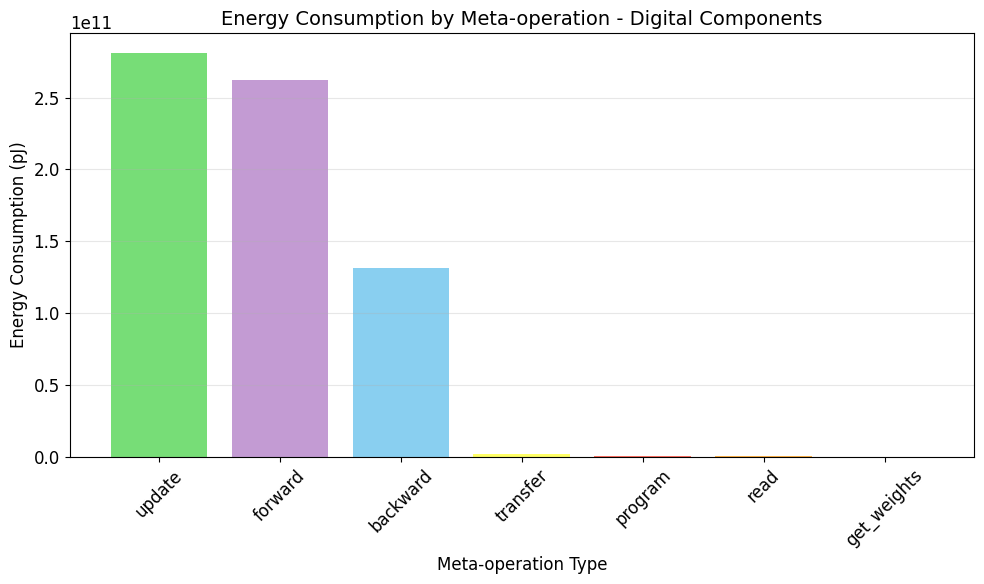

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group the data by Meta_op and calculate total energy
meta_op_energy = energy_by_meta_op.groupby('Meta_op')['energy'].sum().sort_values(ascending=False)

# Create color palette
colors = {
    'forward': '#C39BD3',    # Light purple
    'backward': '#89CFF0',   # Light blue
    'update': '#77DD77',     # Light green
    'transfer': '#FFFF66',   # Light yellow
    'read': '#FFB347',       # Light orange
    'program': '#FF6F61',    # Coral
}

# Create the figure
plt.figure(figsize=(10, 6), dpi=100)

# Create bars
plt.bar(range(len(meta_op_energy)), meta_op_energy.values, 
        color=[colors.get(op, '#CCCCCC') for op in meta_op_energy.index])

# Customize the plot
plt.title('Energy Consumption by Meta-operation - Digital Components', fontsize=14)
plt.xlabel('Meta-operation Type', fontsize=12)
plt.ylabel('Energy Consumption (pJ)', fontsize=12)
plt.xticks(range(len(meta_op_energy)), meta_op_energy.index, rotation=45)


# Add grid for better readability
plt.grid(True, axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

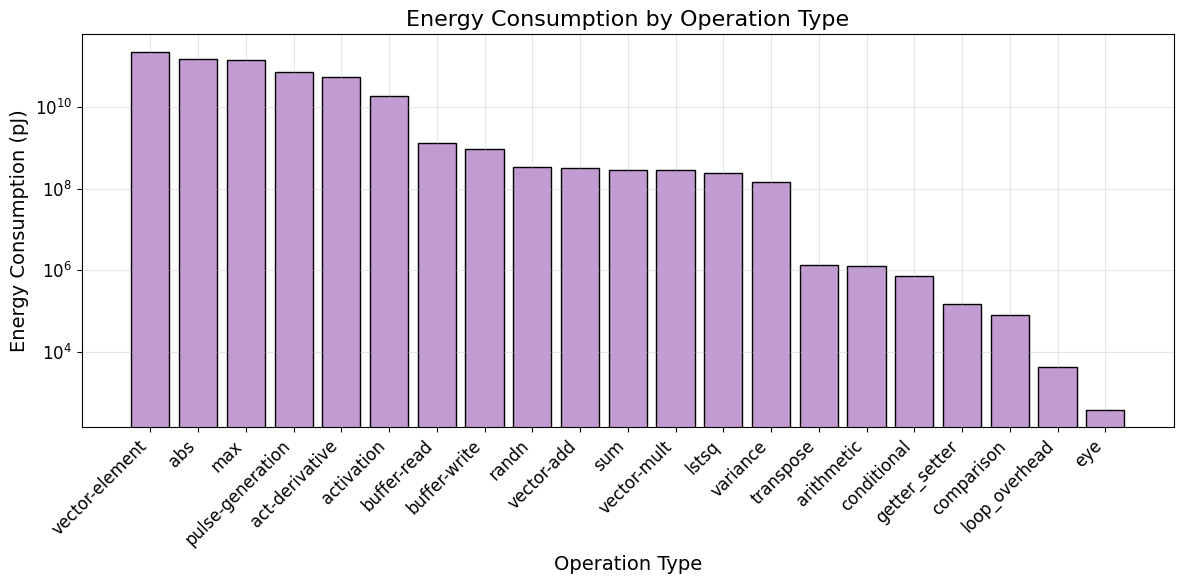


Detailed Energy Consumption by Operation:
--------------------------------------------------
vector-element : 225,581,961,305.00 pJ (33.28%)
abs            : 149,565,728,624.00 pJ (22.06%)
max            : 149,271,549,312.00 pJ (22.02%)
pulse-generation: 74,911,958,000.00 pJ (11.05%)
act-derivative : 55,783,680,000.00 pJ (8.23%)
activation     : 18,840,797,824.00 pJ (2.78%)
buffer-read    : 1,314,693,544.59 pJ (0.19%)
buffer-write   : 964,094,318.55 pJ (0.14%)
randn          : 353,601,348.80 pJ (0.05%)
vector-add     : 327,070,392.00 pJ (0.05%)
sum            : 294,179,312.00 pJ (0.04%)
vector-mult    : 294,179,312.00 pJ (0.04%)
lstsq          : 249,513,523.20 pJ (0.04%)
variance       : 147,555,833.40 pJ (0.02%)
transpose      : 1,379,220.48 pJ (0.00%)
arithmetic     : 1,317,591.00 pJ (0.00%)
conditional    : 742,896.00 pJ (0.00%)
getter_setter  : 148,610.88 pJ (0.00%)
comparison     : 78,477.30 pJ (0.00%)
loop_overhead  : 4,187.70 pJ (0.00%)
eye            : 385.44 pJ (0.00%)
------

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group the data by Op and calculate total energy
op_energy = energy_by_meta_op.groupby('Op')['energy'].sum().sort_values(ascending=False)

# Create the figure
plt.figure(figsize=(12, 6), dpi=100)

# Create bars
bars = plt.bar(range(len(op_energy)), op_energy.values, 
        color='#C39BD3', edgecolor='black', linewidth=1)

# Customize the plot
plt.title('Energy Consumption by Operation Type', fontsize=16)
plt.xlabel('Operation Type', fontsize=14)
plt.ylabel('Energy Consumption (pJ)', fontsize=14)
plt.xticks(range(len(op_energy)), op_energy.index, rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, axis='y', alpha=0.3)

# Use log scale for y-axis due to large variations in energy consumption
plt.yscale('log')

# Add a subtle grid
plt.grid(True, alpha=0.3, which='both')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print detailed statistics
print("\nDetailed Energy Consumption by Operation:")
print("-" * 50)
for op, energy in op_energy.items():
    print(f"{op:<15}: {energy:,.2f} pJ ({(energy/op_energy.sum()*100):,.2f}%)")
print("-" * 50)
print(f"Total Energy: {op_energy.sum():,.2f} pJ")


Detailed Energy Consumption by Meta-operation:
--------------------------------------------------
Update              : 280,739,448,995.20 pJ (41.41%)
Forward Pass        : 262,560,829,918.85 pJ (38.73%)
Backward Pass       : 131,580,087,434.40 pJ (19.41%)
Transfer            : 1,791,868,455.23 pJ (0.26%)
Program             : 749,765,801.04 pJ (0.11%)
Read                : 482,178,529.42 pJ (0.07%)
get_weights         : 54,884.20 pJ (0.00%)
--------------------------------------------------
Total Energy: 677,904,234,018.34 pJ


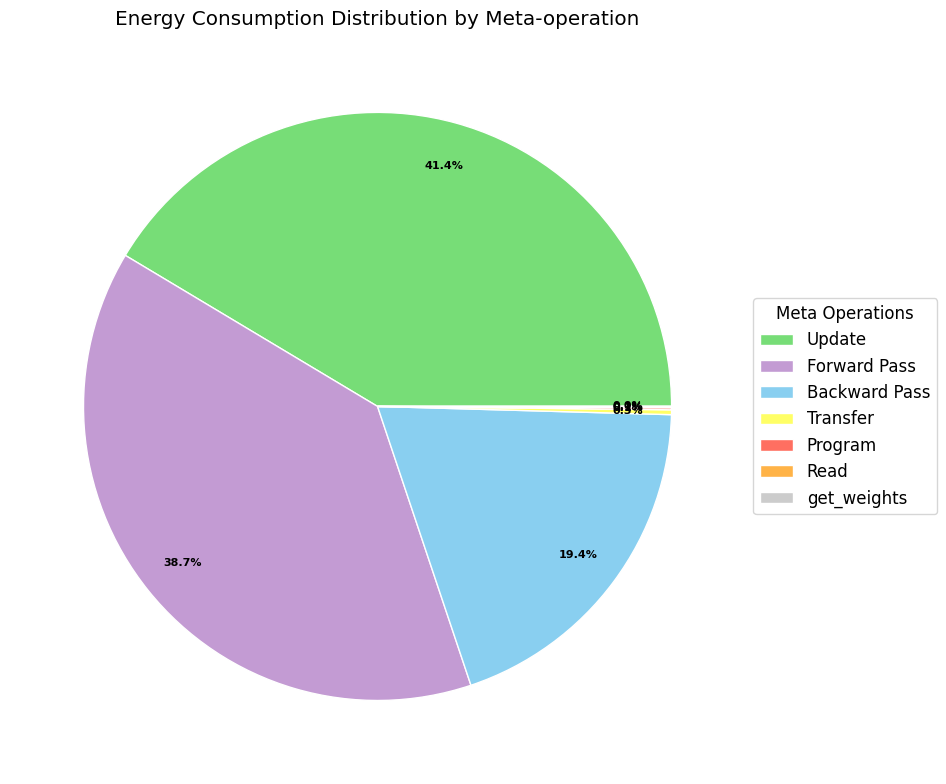

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group the data by Meta_op and calculate total energy
meta_op_energy = energy_by_meta_op.groupby('Meta_op')['energy'].sum().sort_values(ascending=False)

# Calculate percentages
percentages = meta_op_energy / meta_op_energy.sum() * 100

# Create color palette
meta_op_colors = {
    'forward': '#C39BD3',    # Light purple
    'backward': '#89CFF0',   # Light blue
    'update': '#77DD77',     # Light green
    'transfer': '#FFFF66',   # Light yellow
    'read': '#FFB347',       # Light orange
    'program': '#FF6F61',    # Coral
}

# Create display names for meta operations
meta_op_display_names = {
    'forward': 'Forward Pass',
    'backward': 'Backward Pass',
    'update': 'Update',
    'transfer': 'Transfer',
    'read': 'Read',
    'program': 'Program'
}

# Create figure
plt.figure(figsize=(10, 8), dpi=100)

# Create pie chart
patches, texts, autotexts = plt.pie(percentages, 
                                   labels=None, 
                                   colors=[meta_op_colors.get(op, '#CCCCCC') for op in meta_op_energy.index],
                                   autopct='%1.1f%%',
                                   pctdistance=0.85,
                                   wedgeprops={'edgecolor': 'white'})

# Create a title
plt.title('Energy Consumption Distribution by Meta-operation', pad=10)

# Make percentage labels easier to read
plt.setp(autotexts, size=8, weight="bold")
plt.setp(texts, size=8)

# Add a legend with proper display names
plt.legend(patches, [meta_op_display_names.get(op, op) for op in meta_op_energy.index],
          title="Meta Operations",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Print statistics
print("\nDetailed Energy Consumption by Meta-operation:")
print("-" * 50)
for op, energy in meta_op_energy.items():
    display_name = meta_op_display_names.get(op, op)
    print(f"{display_name:<20}: {energy:,.2f} pJ ({(energy/meta_op_energy.sum()*100):,.2f}%)")
print("-" * 50)
print(f"Total Energy: {meta_op_energy.sum():,.2f} pJ")

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


Detailed Energy Consumption by Operation:
--------------------------------------------------
Vector Element-wise : 225,581,961,305.00 pJ (33.28%)
Absolute Value      : 149,565,728,624.00 pJ (22.06%)
Maximum             : 149,271,549,312.00 pJ (22.02%)
Pulse Generation    : 74,911,958,000.00 pJ (11.05%)
Activation Derivative: 55,783,680,000.00 pJ (8.23%)
Activation          : 18,840,797,824.00 pJ (2.78%)
Buffer Read         : 1,314,693,544.59 pJ (0.19%)
Buffer Write        : 964,094,318.55 pJ (0.14%)
Random Number Generation: 353,601,348.80 pJ (0.05%)
Vector Addition     : 327,070,392.00 pJ (0.05%)
sum                 : 294,179,312.00 pJ (0.04%)
Vector Multiplication: 294,179,312.00 pJ (0.04%)
lstsq               : 249,513,523.20 pJ (0.04%)
variance            : 147,555,833.40 pJ (0.02%)
transpose           : 1,379,220.48 pJ (0.00%)
Arithmetic          : 1,317,591.00 pJ (0.00%)
conditional         : 742,896.00 pJ (0.00%)
getter_setter       : 148,610.88 pJ (0.00%)
comparison          :

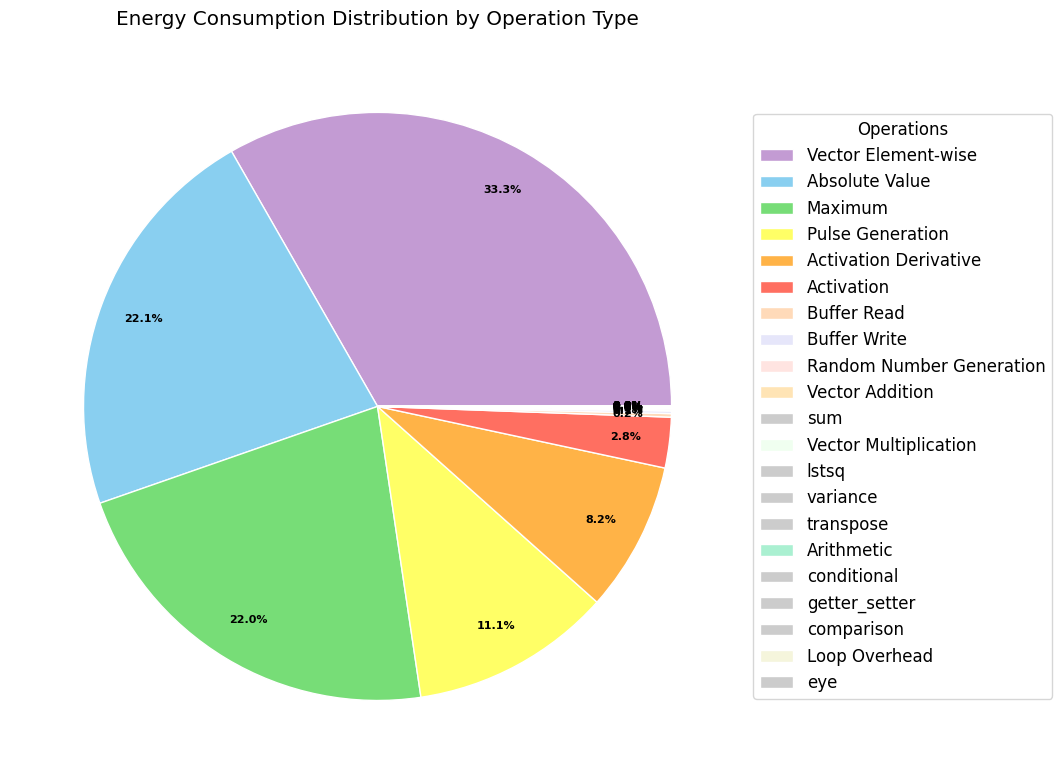

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group the data by Op and calculate total energy
op_energy = energy_by_meta_op.groupby('Op')['energy'].sum().sort_values(ascending=False)

# Calculate percentages
percentages = op_energy / op_energy.sum() * 100

# Create color palette - using consistent colors
op_colors = {
    'vector-element': '#C39BD3',      # Light purple for largest (33.28%)
    'abs': '#89CFF0',                 # Light blue (22.06%)
    'max': '#77DD77',                 # Light green (22.02%)
    'pulse-generation': '#FFFF66',     # Light yellow (11.05%)
    'act-derivative': '#FFB347',       # Light orange (8.23%)
    'activation': '#FF6F61',           # Coral (2.78%)
    # Keep remaining operations with less prominent colors
    'arithmetic': '#AAF0D1',          # Mint
    'buffer-read': '#FFDAB9',         # Peach
    'buffer-write': '#E6E6FA',        # Lavender
    'vector-add': '#FFE4B5',          # Moccasin
    'vector-mult': '#F0FFF0',         # Honeydew
    'loop_overhead': '#F5F5DC',       # Beige
    'randn': '#FFE4E1'               # Misty Rose
}

# Update display names to match operations
op_display_names = {
    'vector-element': 'Vector Element-wise',
    'abs': 'Absolute Value',
    'max': 'Maximum',
    'pulse-generation': 'Pulse Generation',
    'act-derivative': 'Activation Derivative',
    'activation': 'Activation',
    'arithmetic': 'Arithmetic',
    'buffer-read': 'Buffer Read',
    'buffer-write': 'Buffer Write',
    'vector-add': 'Vector Addition',
    'vector-mult': 'Vector Multiplication',
    'loop_overhead': 'Loop Overhead',
    'randn': 'Random Number Generation'
    
}

# Create figure
plt.figure(figsize=(10, 8), dpi=100)

# Create pie chart
patches, texts, autotexts = plt.pie(percentages, 
                                   labels=None, 
                                   colors=[op_colors.get(op, '#CCCCCC') for op in op_energy.index],
                                   autopct='%1.1f%%',
                                   pctdistance=0.85,
                                   wedgeprops={'edgecolor': 'white'})

# Create a title
plt.title('Energy Consumption Distribution by Operation Type', pad=10)

# Make percentage labels easier to read
plt.setp(autotexts, size=8, weight="bold")
plt.setp(texts, size=8)

# Add a legend with proper display names
plt.legend(patches, [op_display_names.get(op, op) for op in op_energy.index],
          title="Operations",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Print statistics
print("\nDetailed Energy Consumption by Operation:")
print("-" * 50)
for op, energy in op_energy.items():
    display_name = op_display_names.get(op, op)
    print(f"{display_name:<20}: {energy:,.2f} pJ ({(energy/op_energy.sum()*100):,.2f}%)")
print("-" * 50)
print(f"Total Energy: {op_energy.sum():,.2f} pJ")

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

/tmp/ipykernel_6708/3089774213.py:33: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dlog_df = pd.read_csv(f'logs/dlog_{tiles}_v2.csv')
/tmp/ipykernel_6708/3089774213.py:33: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dlog_df = pd.read_csv(f'logs/dlog_{tiles}_v2.csv')
/tmp/ipykernel_6708/3089774213.py:33: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dlog_df = pd.read_csv(f'logs/dlog_{tiles}_v2.csv')
/tmp/ipykernel_6708/3089774213.py:33: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dlog_df = pd.read_csv(f'logs/dlog_{tiles}_v2.csv')


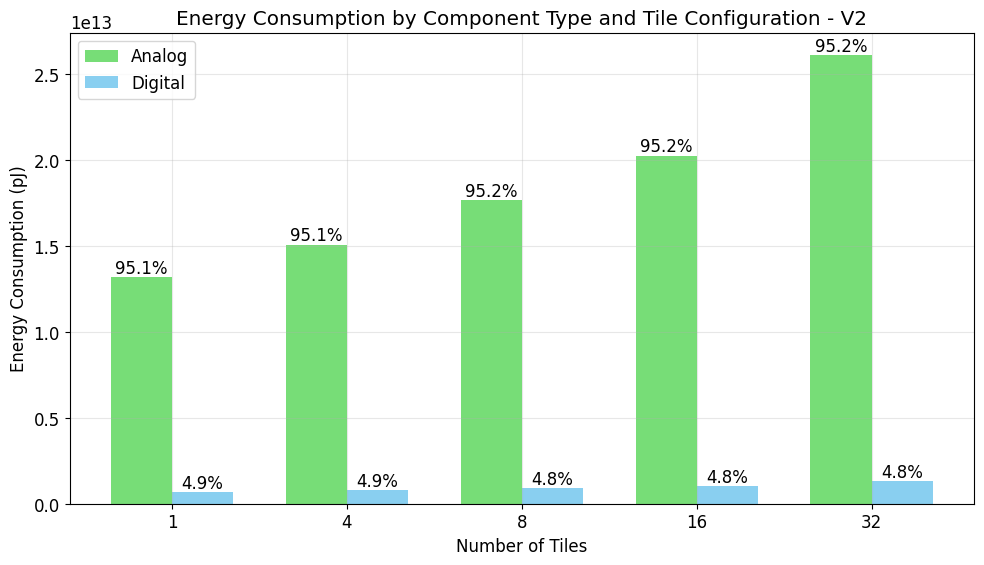


Tile Configuration: 1
Analog Energy: 13,205,499,584,828.32 pJ
Digital Energy: 677,906,256,410.26 pJ
Total Energy: 13,883,405,841,238.58 pJ
Digital/Analog Ratio: 5.13%

Tile Configuration: 4
Analog Energy: 15,079,164,229,613.67 pJ
Digital Energy: 770,330,791,237.11 pJ
Total Energy: 15,849,495,020,850.78 pJ
Digital/Analog Ratio: 5.11%

Tile Configuration: 8
Analog Energy: 17,685,903,062,551.61 pJ
Digital Energy: 899,742,609,316.89 pJ
Total Energy: 18,585,645,671,868.50 pJ
Digital/Analog Ratio: 5.09%

Tile Configuration: 16
Analog Energy: 20,263,085,791,981.54 pJ
Digital Energy: 1,024,868,728,590.03 pJ
Total Energy: 21,287,954,520,571.56 pJ
Digital/Analog Ratio: 5.06%

Tile Configuration: 32
Analog Energy: 26,120,066,918,233.57 pJ
Digital Energy: 1,320,020,214,483.01 pJ
Total Energy: 27,440,087,132,716.59 pJ
Digital/Analog Ratio: 5.05%


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

# Load energy cost data
with open('logs/energy.json', 'r') as f:
    energy_data = json.load(f)

# Define tile configurations to analyze
tile_configs = [1, 4, 8, 16, 32]
analog_energies = []
digital_energies = []

# Calculate energy for each tile configuration
for tiles in tile_configs:
    # Calculate analog energy
    log_df = pd.read_csv(f'logs/log_{tiles}_v2.csv')
    total_analog = 0
    
    for layer in ['l1', 'l2', 'l3']:
        layer_data = log_df[log_df['layer'] == layer]
        transfer_count = layer_data[layer_data['Meta_op'] == 'transfer']['Times'].sum()
        ops_data = layer_data[layer_data['Meta_op'] != 'transfer'].groupby('Op')['Times'].sum()
        
        energy = (ops_data.get('forward', 0) * energy_costs[layer]['forward'] +
                 ops_data.get('backward', 0) * energy_costs[layer]['backward'] +
                 ops_data.get('update', 0) * energy_costs[layer]['update'] +
                 transfer_count * energy_costs[layer]['transfer'])
        total_analog += energy
    
    # Calculate digital energy
    dlog_df = pd.read_csv(f'logs/dlog_{tiles}_v2.csv')
    dlog_df['energy'] = dlog_df.apply(
        lambda row: calculate_operation_energy(row), 
        axis=1
    )
    total_digital = dlog_df['energy'].sum()
    
    analog_energies.append(total_analog)
    digital_energies.append(total_digital)

# Create the visualization
plt.figure(figsize=(10, 6), dpi=100)
x = np.arange(len(tile_configs))
width = 0.35

plt.bar(x - width/2, analog_energies, width, label='Analog', color='#77DD77')
plt.bar(x + width/2, digital_energies, width, label='Digital', color='#89CFF0')

plt.xlabel('Number of Tiles')
plt.ylabel('Energy Consumption (pJ)')
plt.title('Energy Consumption by Component Type and Tile Configuration - V2')
plt.xticks(x, tile_configs)
plt.legend()
plt.grid(True, alpha=0.3)

# Add percentage labels
for i in range(len(tile_configs)):
    total = analog_energies[i] + digital_energies[i]
    analog_pct = analog_energies[i]/total * 100
    digital_pct = digital_energies[i]/total * 100
    
    plt.text(i - width/2, analog_energies[i], f'{analog_pct:.1f}%', 
             ha='center', va='bottom')
    plt.text(i + width/2, digital_energies[i], f'{digital_pct:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed statistics
for i, tiles in enumerate(tile_configs):
    print(f"\nTile Configuration: {tiles}")
    print(f"Analog Energy: {analog_energies[i]:,.2f} pJ")
    print(f"Digital Energy: {digital_energies[i]:,.2f} pJ")
    print(f"Total Energy: {analog_energies[i] + digital_energies[i]:,.2f} pJ")
    print(f"Digital/Analog Ratio: {digital_energies[i]/analog_energies[i]:.2%}")

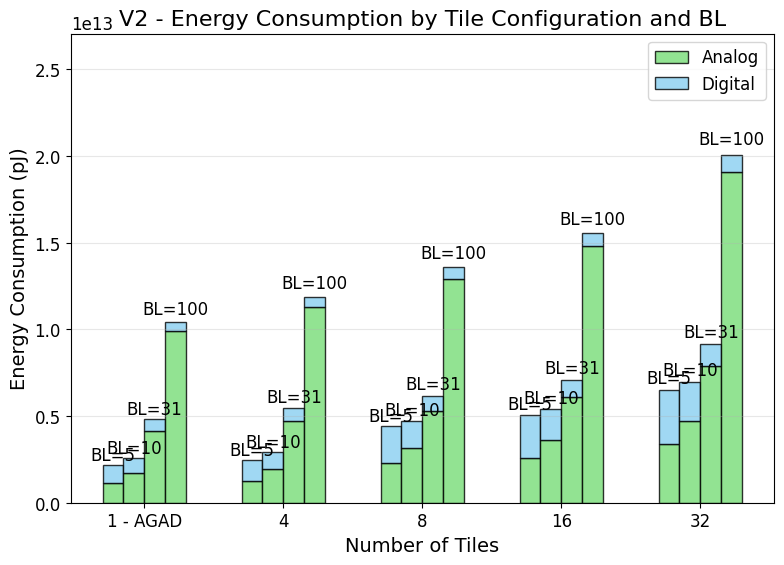

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

# Load energy cost data
with open('logs/energy.json', 'r') as f:
    energy_data = json.load(f)
    
# Load precomputed digital energy data
digital_summary = pd.read_csv('logs/digital_energy_summary_v2.csv')

bls = [5, 10, 31, 100]
#epoch_ratio = [68/40, 52/40, 1, 28/40]
epoch_ratio_1 = [63/40, 50/40, 40/40, 30/40]
epoch_ratio_8 = [124/52, 90/52, 50/52, 38/52]
tile_configs = [1, 4, 8, 16, 32]

# Store results for all BL configurations
all_analog_energies = []
all_digital_energies = []

for bl in bls:
    energy_costs = {
        'l1': {
            'forward': energy_data['forward_l1'],
            'backward': energy_data['backward_l1'],
            'update': energy_data['update_l1']/31 * bl,
            'transfer': energy_data['transfer_l1']
        },
        'l2': {
            'forward': energy_data['forward_l2'],
            'backward': energy_data['backward_l2'],
            'update': energy_data['update_l2']/31 * bl,
            'transfer': energy_data['transfer_l2']
        },
        'l3': {
            'forward': energy_data['forward_l3'],
            'backward': energy_data['backward_l3'],
            'update': energy_data['update_l3']/31 * bl,
            'transfer': energy_data['transfer_l3']
        }
    }

    # Define tile configurations to analyze

    analog_energies = []
    digital_energies = []

    # Calculate energy for each tile configuration


    for tiles in tile_configs:
        # Calculate analog energy
        log_df = pd.read_csv(f'logs/log_{tiles}_v2.csv')
        total_analog = 0
        
        for layer in ['l1', 'l2', 'l3']:
            layer_data = log_df[log_df['layer'] == layer]
            transfer_count = layer_data[layer_data['Meta_op'] == 'transfer']['Times'].sum()
            ops_data = layer_data[layer_data['Meta_op'] != 'transfer'].groupby('Op')['Times'].sum()
            
            energy = (ops_data.get('forward', 0) * energy_costs[layer]['forward'] +
                    ops_data.get('backward', 0) * energy_costs[layer]['backward'] +
                    ops_data.get('update', 0) * energy_costs[layer]['update'] +
                    transfer_count * energy_costs[layer]['transfer'])
            total_analog += energy
        
        # Get precomputed digital energy
        total_digital = digital_summary[digital_summary['tiles'] == tiles]['energy'].sum()

        if tiles == 1:
            epoch_ratio = epoch_ratio_1
        elif tiles == 8:
            epoch_ratio = epoch_ratio_8
        analog_energies.append(total_analog * epoch_ratio[bls.index(bl)])
        digital_energies.append(total_digital * epoch_ratio[bls.index(bl)])

    all_analog_energies.append(analog_energies)
    all_digital_energies.append(digital_energies)


# Create the visualization with grouped bars
plt.figure(figsize=(8, 6), dpi=100)

# Set width of bars and positions of groups
bar_width = 0.15
num_bls = len(bls)
x = np.arange(len(tile_configs))

# Create bars for each BL configuration
for i, bl in enumerate(bls):
    # Calculate offset for this BL configuration
    offset = (i - num_bls/2 + 0.5) * bar_width
    
    # Create stacked bars for this BL
    plt.bar(x + offset, all_analog_energies[i], bar_width, 
            color='#77DD77', alpha=0.8, label='Analog' if i == 0 else "", edgecolor='black', linewidth=1)
    plt.bar(x + offset, all_digital_energies[i], bar_width, 
            bottom=all_analog_energies[i], color='#89CFF0', alpha=0.8, 
            label='Digital' if i == 0 else "", edgecolor='black', linewidth=1)
    
    # Add BL labels on top of each group
    for j in range(len(tile_configs)):
        total = all_analog_energies[i][j] + all_digital_energies[i][j]
        plt.text(j + offset, total + total*0.02, f'BL={bl}', 
                ha='center', va='bottom', fontsize=12, rotation=0)

plt.xlabel('Number of Tiles', fontsize=14)
plt.ylabel('Energy Consumption (pJ)', fontsize=14)
plt.title('V2 - Energy Consumption by Tile Configuration and BL', fontsize=16)

# Update tile labels
tile_labels = ['1 - AGAD' if x == 1 else str(x) for x in tile_configs]
plt.xticks(x, tile_labels, fontsize=12)

plt.ylim(0, max([max([a+d for a, d in zip(analog, digital)]) 
                for analog, digital in zip(all_analog_energies, all_digital_energies)]) * 1.35)
plt.legend(fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Speedup and Energy

/tmp/ipykernel_6708/498293056.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_1_forward = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
/tmp/ipykernel_6708/498293056.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_1_update = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()
/tmp/ipykernel_6708/498293056.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_n_forward = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
/tmp/ipykernel_6708/498293056.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transfers_n_update = multi_tile_sequential[multi_tile_sequenti

Tile Config | Speedup | Energy Cost | Relative Energy | Efficiency
------------------------------------------------------------
    1      |  1.00   | 13883403818847 |      1.00      |    1.00   
    4      |  3.49   | 15761568945879 |      1.14      |    3.07   
    8      |  5.90   | 18371831664010 |      1.32      |    4.46   
    16     |  10.11  | 20957644425166 |      1.51      |    6.70   
    32     |  15.00  | 26831673481740 |      1.93      |    7.76   


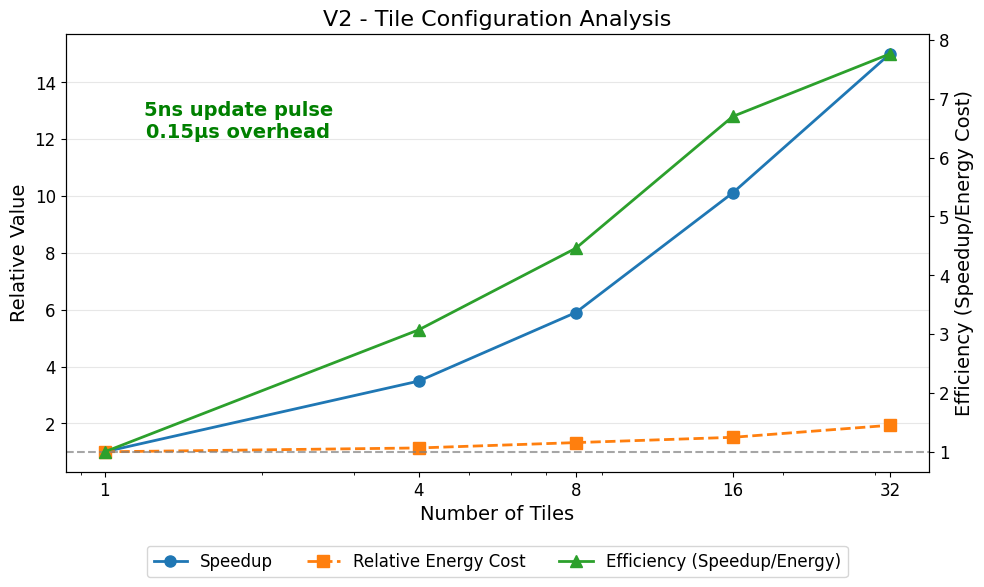

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

# Load the data for speedup calculation
single_tile_df = pd.read_csv('logs/log_1_v2.csv')
tile_configs = [1, 4, 8, 16, 32]
pulse_length = 0.005  # 5ns
digital_overhead = 0.35  # us


# Calculate speedup and energy for each tile configuration
speedup_values = {}
energy_values = {}

# Calculate baseline (single tile) operations
single_tile_sequential = single_tile_df.copy()
single_tile_sequential['Sequential_Ops'] = single_tile_sequential['Times']
batches_1 = single_tile_sequential[single_tile_sequential['Meta_op'] == 'forward']['Sequential_Ops'].sum()
transfers_1_forward = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
transfers_1_update = single_tile_sequential[single_tile_sequential['Meta_op'] == 'transfer'][single_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()

# Calculate time for single tile (reference)
time_1 = (digital_overhead + pulse_length*31) * batches_1 + pulse_length * transfers_1_update + digital_overhead/2 * transfers_1_forward

# For each tile configuration
for config in tile_configs:
    # Load data for this configuration
    if config == 1:
        multi_tile_df = single_tile_df
    else:
        multi_tile_df = pd.read_csv(f'logs/log_{config}_v2.csv')
    
    # Calculate speedup
    multi_tile_sequential = multi_tile_df.copy()
    multi_tile_sequential['Sequential_Ops'] = multi_tile_sequential['Times'] / multi_tile_sequential['Pfactor']
    
    batches_n = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'forward']['Sequential_Ops'].sum()
    transfers_n_forward = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'forward']['Sequential_Ops'].sum()
    transfers_n_update = multi_tile_sequential[multi_tile_sequential['Meta_op'] == 'transfer'][multi_tile_sequential['Op'] == 'update']['Sequential_Ops'].sum()
    
    time_n = (digital_overhead + pulse_length*31) * batches_n + pulse_length * transfers_n_update + digital_overhead/2 * transfers_n_forward#*config
    speedup_values[config] = time_1 / time_n
    
    # Calculate energy (analog + digital)
    # Analog energy
    total_analog = 0
    for layer in ['l1', 'l2', 'l3']:
        layer_data = multi_tile_df[multi_tile_df['layer'] == layer]
        transfer_count = layer_data[layer_data['Meta_op'] == 'transfer']['Times'].sum()
        ops_data = layer_data[layer_data['Meta_op'] != 'transfer'].groupby('Op')['Times'].sum()
        
        energy = (ops_data.get('forward', 0) * energy_costs[layer]['forward'] +
                 ops_data.get('backward', 0) * energy_costs[layer]['backward'] +
                 ops_data.get('update', 0) * energy_costs[layer]['update'] +
                 transfer_count * energy_costs[layer]['transfer'])
        total_analog += energy
    
    # Digital energy
    dlog_df = pd.read_csv(f'logs/dlog_{config}_v1.csv')
    dlog_df['energy'] = dlog_df.apply(calculate_operation_energy, axis=1)
    total_digital = dlog_df['energy'].sum()
    
    # Total energy
    energy_values[config] = total_analog + total_digital

# Calculate relative energy (normalized to 1-tile config)
energy_relative = [energy_values[t]/energy_values[1] for t in tile_configs]

# Calculate speedup/energy ratio (efficiency metric)
efficiency = [speedup_values[t]/energy_relative[i] for i, t in enumerate(tile_configs)]

# Create figure with two y-axes
# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=100)
ax2 = ax1.twinx()

# Plot speedup on primary axis
speedup_line = ax1.plot(tile_configs, [speedup_values[t] for t in tile_configs], 
                        'o-', color='#1f77b4', linewidth=2, markersize=8,
                        label='Speedup')

# Plot relative energy on primary axis
energy_line = ax1.plot(tile_configs, energy_relative, 
                      's--', color='#ff7f0e', linewidth=2, markersize=8,
                      label='Relative Energy Cost')

# Plot efficiency (speedup/energy) on secondary axis  
efficiency_line = ax2.plot(tile_configs, efficiency, 
                          '^-', color='#2ca02c', linewidth=2, markersize=8,
                          label='Efficiency (Speedup/Energy)')

# Reference line at y=1
ax1.axhline(y=1, color='gray', linestyle='--', alpha=0.7)

# Add labels and title
ax1.set_xlabel('Number of Tiles', fontsize=14)
ax1.set_ylabel('Relative Value', fontsize=14)
ax2.set_ylabel('Efficiency (Speedup/Energy Cost)', fontsize=14)
plt.title('V2 - Tile Configuration Analysis', fontsize=16)

# Set x-axis to log scale and customize ticks
ax1.set_xscale('log')
ax1.set_xticks(tile_configs)
ax1.set_xticklabels(tile_configs)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='y', which='major', labelsize=12)

# Add grid
ax1.grid(True, axis='y', alpha=0.3)

# Combine legends from both axes
lines = speedup_line + energy_line + efficiency_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=3, fontsize=12)

plt.text(0.2, 0.8, '5ns update pulse\n0.15µs overhead', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')

# Print actual values for reference
print("Tile Config | Speedup | Energy Cost | Relative Energy | Efficiency")
print("-" * 60)
for i, config in enumerate(tile_configs):
    print(f"{config:^10} | {speedup_values[config]:^7.2f} | {energy_values[config]:^11.0f} | {energy_relative[i]:^14.2f} | {efficiency[i]:^10.2f}")

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Make room for the legend
plt.show()

Tile Config | Speedup | Energy Cost | Relative Energy | Efficiency
------------------------------------------------------------
    1      |  1.00   | 13883403818847 |      1.00      |    1.00   
    4      |  3.49   | 15761568945879 |      1.14      |    3.07   
    8      |  5.90   | 18371831664010 |      1.32      |    4.46   
    16     |  10.11  | 20957644425166 |      1.51      |    6.70   
    32     |  15.00  | 26831673481740 |      1.93      |    7.76   


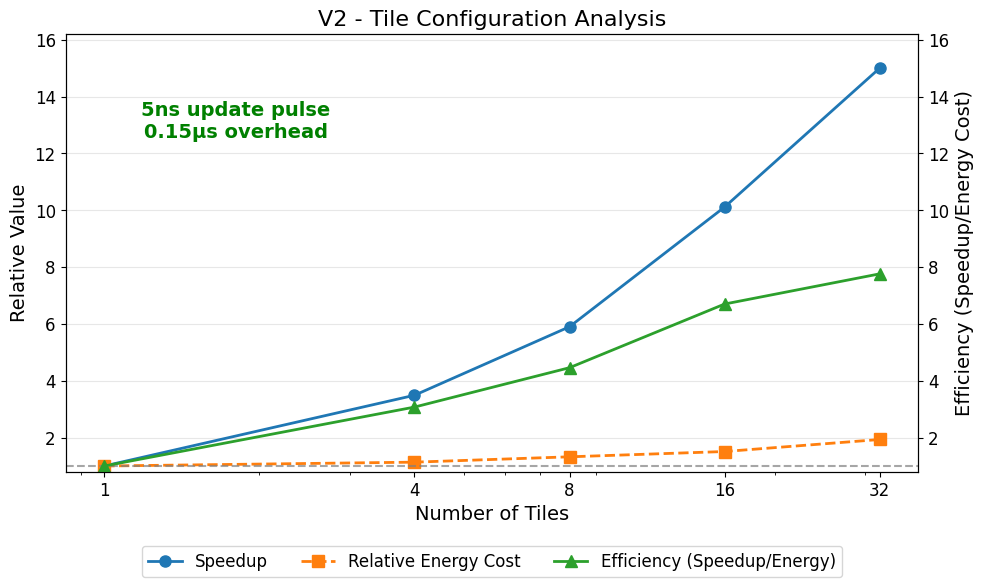

In [76]:
# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=100)
ax2 = ax1.twinx()

# Plot speedup on primary axis
speedup_line = ax1.plot(tile_configs, [speedup_values[t] for t in tile_configs], 
                        'o-', color='#1f77b4', linewidth=2, markersize=8,
                        label='Speedup')

# Plot relative energy on primary axis
energy_line = ax1.plot(tile_configs, energy_relative, 
                      's--', color='#ff7f0e', linewidth=2, markersize=8,
                      label='Relative Energy Cost')

# Plot efficiency (speedup/energy) on secondary axis  
efficiency_line = ax2.plot(tile_configs, efficiency, 
                          '^-', color='#2ca02c', linewidth=2, markersize=8,
                          label='Efficiency (Speedup/Energy)')

# Reference line at y=1
ax1.axhline(y=1, color='gray', linestyle='--', alpha=0.7)
ax1.set_ylim(0.8, 16.2)
ax2.set_ylim(0.8, 16.2)


# Add labels and title
ax1.set_xlabel('Number of Tiles', fontsize=14)
ax1.set_ylabel('Relative Value', fontsize=14)
ax2.set_ylabel('Efficiency (Speedup/Energy Cost)', fontsize=14)
plt.title('V2 - Tile Configuration Analysis', fontsize=16)

# Set x-axis to log scale and customize ticks
ax1.set_xscale('log')
ax1.set_xticks(tile_configs)
ax1.set_xticklabels(tile_configs)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='y', which='major', labelsize=12)

# Add grid
ax1.grid(True, axis='y', alpha=0.3)

# Combine legends from both axes
lines = speedup_line + energy_line + efficiency_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=3, fontsize=12)

plt.text(0.2, 0.8, '5ns update pulse\n0.15µs overhead', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')

# Print actual values for reference
print("Tile Config | Speedup | Energy Cost | Relative Energy | Efficiency")
print("-" * 60)
for i, config in enumerate(tile_configs):
    print(f"{config:^10} | {speedup_values[config]:^7.2f} | {energy_values[config]:^11.0f} | {energy_relative[i]:^14.2f} | {efficiency[i]:^10.2f}")

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Make room for the legend
plt.show()

# BL + Speedup + Energy

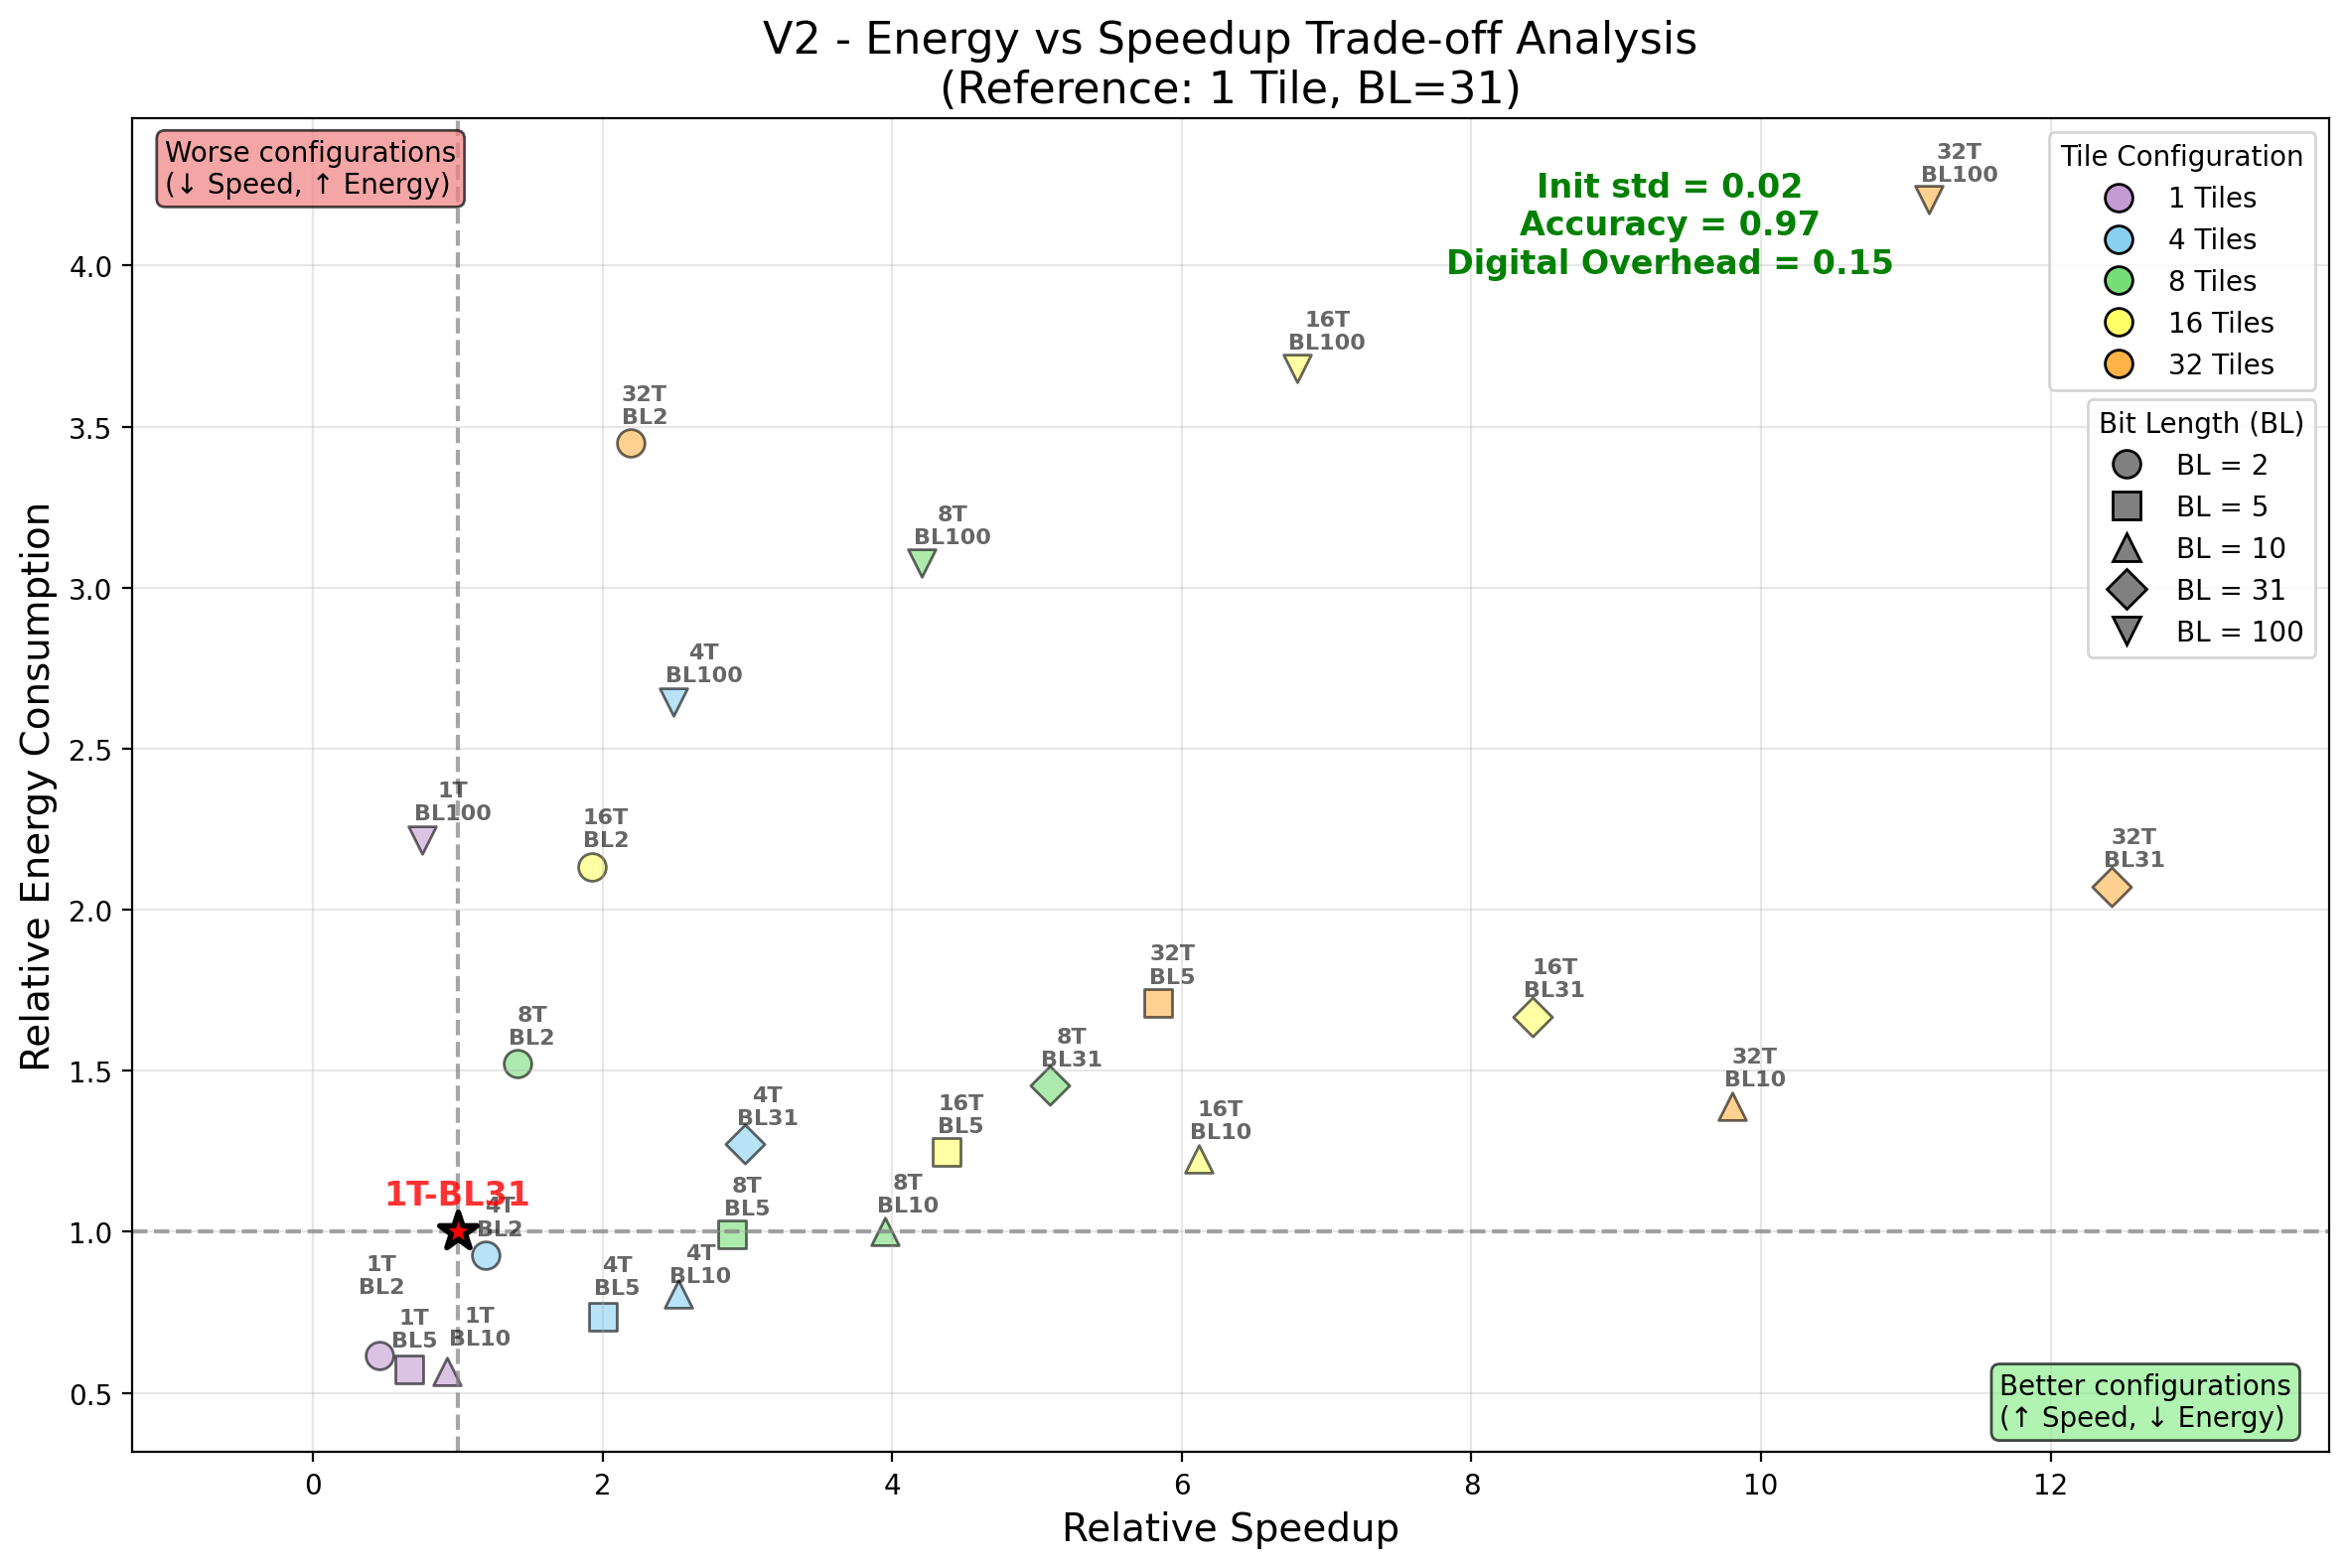

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

# Load the data
times_df = pd.read_csv('logs/times_v2.csv')
energy_df = pd.read_csv('logs/combined_energy_summary_v2.csv')

# Merge the dataframes
merged_df = pd.merge(times_df, energy_df, on=['tiles', 'bl'])

# Define reference configuration (1 tile, BL=31)
ref_time = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31)]['time'].iloc[0]
ref_energy = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31)]['total_energy'].iloc[0]

# Calculate relative values (reference = 1.0)
merged_df['relative_speedup'] = ref_time / merged_df['time']
merged_df['relative_energy'] = merged_df['total_energy'] / ref_energy

# Define colors for each tile configuration
tile_colors = {
    1: '#C39BD3',   # Light purple
    4: '#89CFF0',   # Light blue  
    8: '#77DD77',   # Light green
    16: '#FFFF66',  # Light yellow
    32: '#FFB347'   # Light orange
}

# Define markers for each BL configuration
bl_markers = {
    2: 'o',     # Circle
    5: 's',     # Square
    10: '^',    # Triangle up
    31: 'D',    # Diamond
    100: 'v'    # Triangle down
}

# Create the plot
plt.figure(figsize=(12, 8), dpi=200)

texts = []
# Plot each configuration
for _, row in merged_df.iterrows():
    # if different from reference configuration (1T-BL31)
    if row['tiles'] == 1 and row['bl'] == 31:
        continue  # Skip the reference point for plotting
    
    plt.scatter(row['relative_speedup'], row['relative_energy'], 
                c=tile_colors[row['tiles']], 
                marker=bl_markers[row['bl']], 
                s=100, 
                edgecolors='black', 
                linewidth=1,
                alpha=0.6)

    # Add labels for each point
    text = plt.annotate(f"{int(row['tiles'])}T\nBL{int(row['bl'])}", 
                (row['relative_speedup']-0.08, row['relative_energy']+0.04),
                fontsize=8, alpha=0.6, weight='bold')
    
    texts.append(text)  # Add text to the list for adjustment

adjust_text(texts)           

# Add reference point
plt.scatter(1.0, 1.0, c='red', marker='*', s=200, 
           edgecolors='black', linewidth=2, 
           label='Reference (1T-BL31)', zorder=5)
plt.annotate('1T-BL31', (1.0, 1.0),
             xytext=(-27, 10), textcoords='offset points',
             fontsize=12, color='red', weight='bold', alpha=0.8)

# Set axis labels and title
plt.xlabel('Relative Speedup', fontsize=14)
plt.ylabel('Relative Energy Consumption', fontsize=14)
plt.title('V2 - Energy vs Speedup Trade-off Analysis\n(Reference: 1 Tile, BL=31)', fontsize=16)

# Add reference lines
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.7)

# Create custom legends
from matplotlib.lines import Line2D

# Legend for tile configurations (colors)
tile_legend_elements = [Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=color, markersize=10, 
                              markeredgecolor='black',
                              label=f'{tiles} Tiles') 
                       for tiles, color in tile_colors.items()]

# Legend for BL configurations (shapes)
bl_legend_elements = [Line2D([0], [0], marker=marker, color='w', 
                             markerfacecolor='gray', markersize=10, 
                             markeredgecolor='black',
                             label=f'BL = {bl}') 
                     for bl, marker in bl_markers.items()]

# Add both legends
legend1 = plt.legend(handles=tile_legend_elements, 
                    title="Tile Configuration", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 1))
legend2 = plt.legend(handles=bl_legend_elements, 
                    title="Bit Length (BL)", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 0.8))

# Add the first legend back
plt.gca().add_artist(legend1)

# Set grid and formatting
plt.grid(True, alpha=0.3)


# Set axis limits at min to max of data
plt.xlim(min(merged_df['relative_speedup'].min() - 0.5, -1.25),
         merged_df['relative_speedup'].max() + 1.5)
plt.ylim(merged_df['relative_energy'].min() - 0.25,
         merged_df['relative_energy'].max() + 0.25)


# Add text annotation explaining the quadrants
plt.text(0.85, 0.06, 'Better configurations\n(↑ Speed, ↓ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
         fontsize=10)

plt.text(0.015, 0.94, 'Worse configurations\n(↓ Speed, ↑ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7),
         fontsize=10)

plt.text(0.7, 0.92, f'Init std = 0.02\nAccuracy = 0.97\nDigital Overhead = {0.15:.2f}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')


plt.tight_layout()
plt.show()

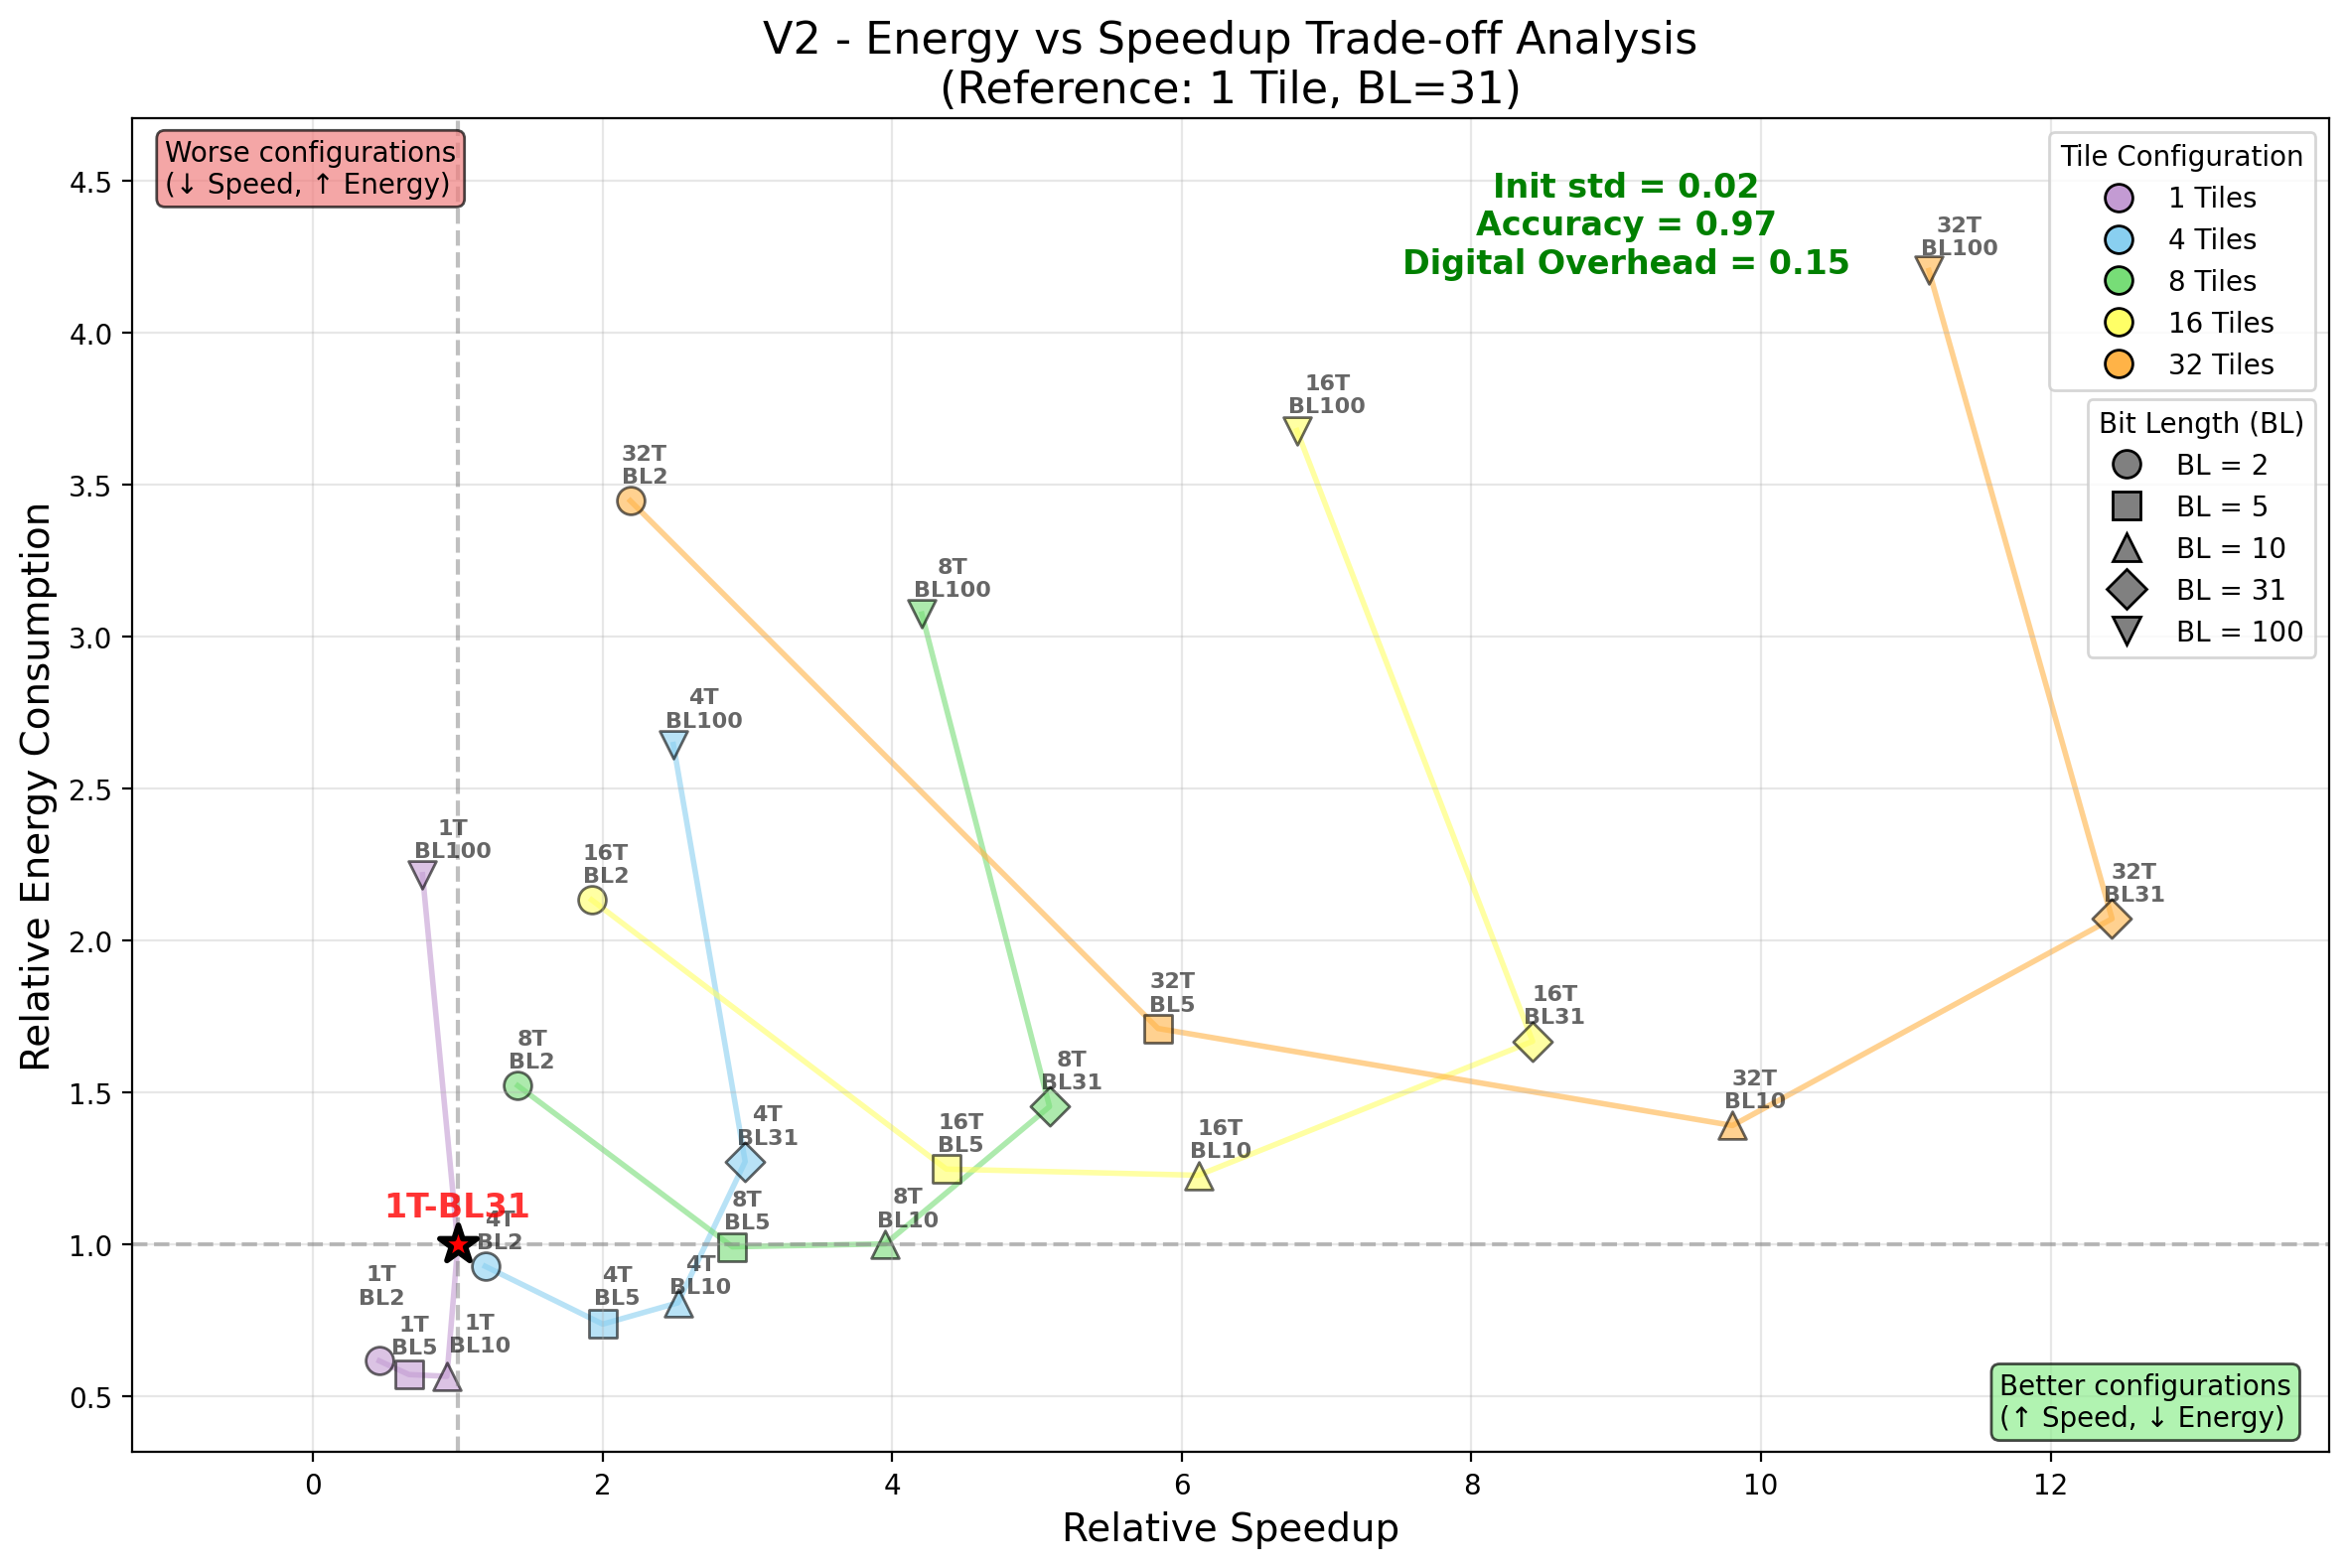

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
times_df = pd.read_csv('logs/times_v2.csv')
energy_df = pd.read_csv('logs/combined_energy_summary_v2.csv')

# Merge the dataframes
merged_df = pd.merge(times_df, energy_df, on=['tiles', 'bl'])

# Define reference configuration (1 tile, BL=31)
ref_time = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31)]['time'].iloc[0]
ref_energy = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31)]['total_energy'].iloc[0]

# Calculate relative values (reference = 1.0)
merged_df['relative_speedup'] = ref_time / merged_df['time']
merged_df['relative_energy'] = merged_df['total_energy'] / ref_energy

# Define colors for each tile configuration
tile_colors = {
    1: '#C39BD3',   # Light purple
    4: '#89CFF0',   # Light blue  
    8: '#77DD77',   # Light green
    16: '#FFFF66',  # Light yellow
    32: '#FFB347'   # Light orange
}

# Define markers for each BL configuration
bl_markers = {
    2: 'o',     # Circle
    5: 's',     # Square
    10: '^',    # Triangle up
    31: 'D',    # Diamond
    100: 'v'    # Triangle down
}

# Create the plot
plt.figure(figsize=(12, 8), dpi=200)

# Plot lines connecting points for each tile configuration
bl_order = [2, 5, 10, 31, 100]  # Define the order for connecting points

for tiles in tile_colors.keys():
    # Get data for this tile configuration
    tile_data = merged_df[merged_df['tiles'] == tiles].copy()
    
    # Sort by BL to ensure proper line connection
    tile_data = tile_data.sort_values('bl')
    
    # Plot the connecting line
    plt.plot(tile_data['relative_speedup'], tile_data['relative_energy'], 
             color=tile_colors[tiles], linewidth=2, alpha=0.6, zorder=1)

# Plot each configuration point
texts = []
# Plot each configuration
for _, row in merged_df.iterrows():
    # if different from reference configuration (1T-BL31)
    if row['tiles'] == 1 and row['bl'] == 31:
        continue  # Skip the reference point for plotting
    
    plt.scatter(row['relative_speedup'], row['relative_energy'], 
                c=tile_colors[row['tiles']], 
                marker=bl_markers[row['bl']], 
                s=100, 
                edgecolors='black', 
                linewidth=1,
                alpha=0.6)

    # Add labels for each point
    text = plt.annotate(f"{int(row['tiles'])}T\nBL{int(row['bl'])}", 
                (row['relative_speedup']-0.08, row['relative_energy']+0.04),
                fontsize=8, alpha=0.6, weight='bold')
    
    texts.append(text)  # Add text to the list for adjustment

adjust_text(texts)   

# Add reference point
plt.scatter(1.0, 1.0, c='red', marker='*', s=200, 
           edgecolors='black', linewidth=2, 
           label='Reference (1T-BL31)', zorder=5)
plt.annotate('1T-BL31', (1.0, 1.0),
             xytext=(-27, 10), textcoords='offset points',
             fontsize=12, color='red', weight='bold', alpha=0.8)

# Set axis labels and title
plt.xlabel('Relative Speedup', fontsize=14)
plt.ylabel('Relative Energy Consumption', fontsize=14)
plt.title('V2 - Energy vs Speedup Trade-off Analysis\n(Reference: 1 Tile, BL=31)', fontsize=16)

# Add reference lines
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)

# Create custom legends
from matplotlib.lines import Line2D

# Legend for tile configurations (colors)
tile_legend_elements = [Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=color, markersize=10, 
                              markeredgecolor='black',
                              label=f'{tiles} Tiles') 
                       for tiles, color in tile_colors.items()]

# Legend for BL configurations (shapes)
bl_legend_elements = [Line2D([0], [0], marker=marker, color='w', 
                             markerfacecolor='gray', markersize=10, 
                             markeredgecolor='black',
                             label=f'BL = {bl}') 
                     for bl, marker in bl_markers.items()]

# Add both legends
# Add both legends
legend1 = plt.legend(handles=tile_legend_elements, 
                    title="Tile Configuration", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 1))
legend2 = plt.legend(handles=bl_legend_elements, 
                    title="Bit Length (BL)", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 0.8))

# Add the first legend back
plt.gca().add_artist(legend1)

# Set grid and formatting
plt.grid(True, alpha=0.3)

# Set axis limits at min to max of data
plt.xlim(min(merged_df['relative_speedup'].min() - 0.5, -1.25),
         merged_df['relative_speedup'].max() + 1.5)
plt.ylim(merged_df['relative_energy'].min() - 0.25,
         merged_df['relative_energy'].max() + 0.5)

# Add text annotation explaining the quadrants
plt.text(0.85, 0.06, 'Better configurations\n(↑ Speed, ↓ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
         fontsize=10)

plt.text(0.015, 0.94, 'Worse configurations\n(↓ Speed, ↑ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7),
         fontsize=10)

plt.text(0.68, 0.92, f'Init std = 0.02\nAccuracy = 0.97\nDigital Overhead = {0.15:.2f}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')

plt.tight_layout()
plt.show()

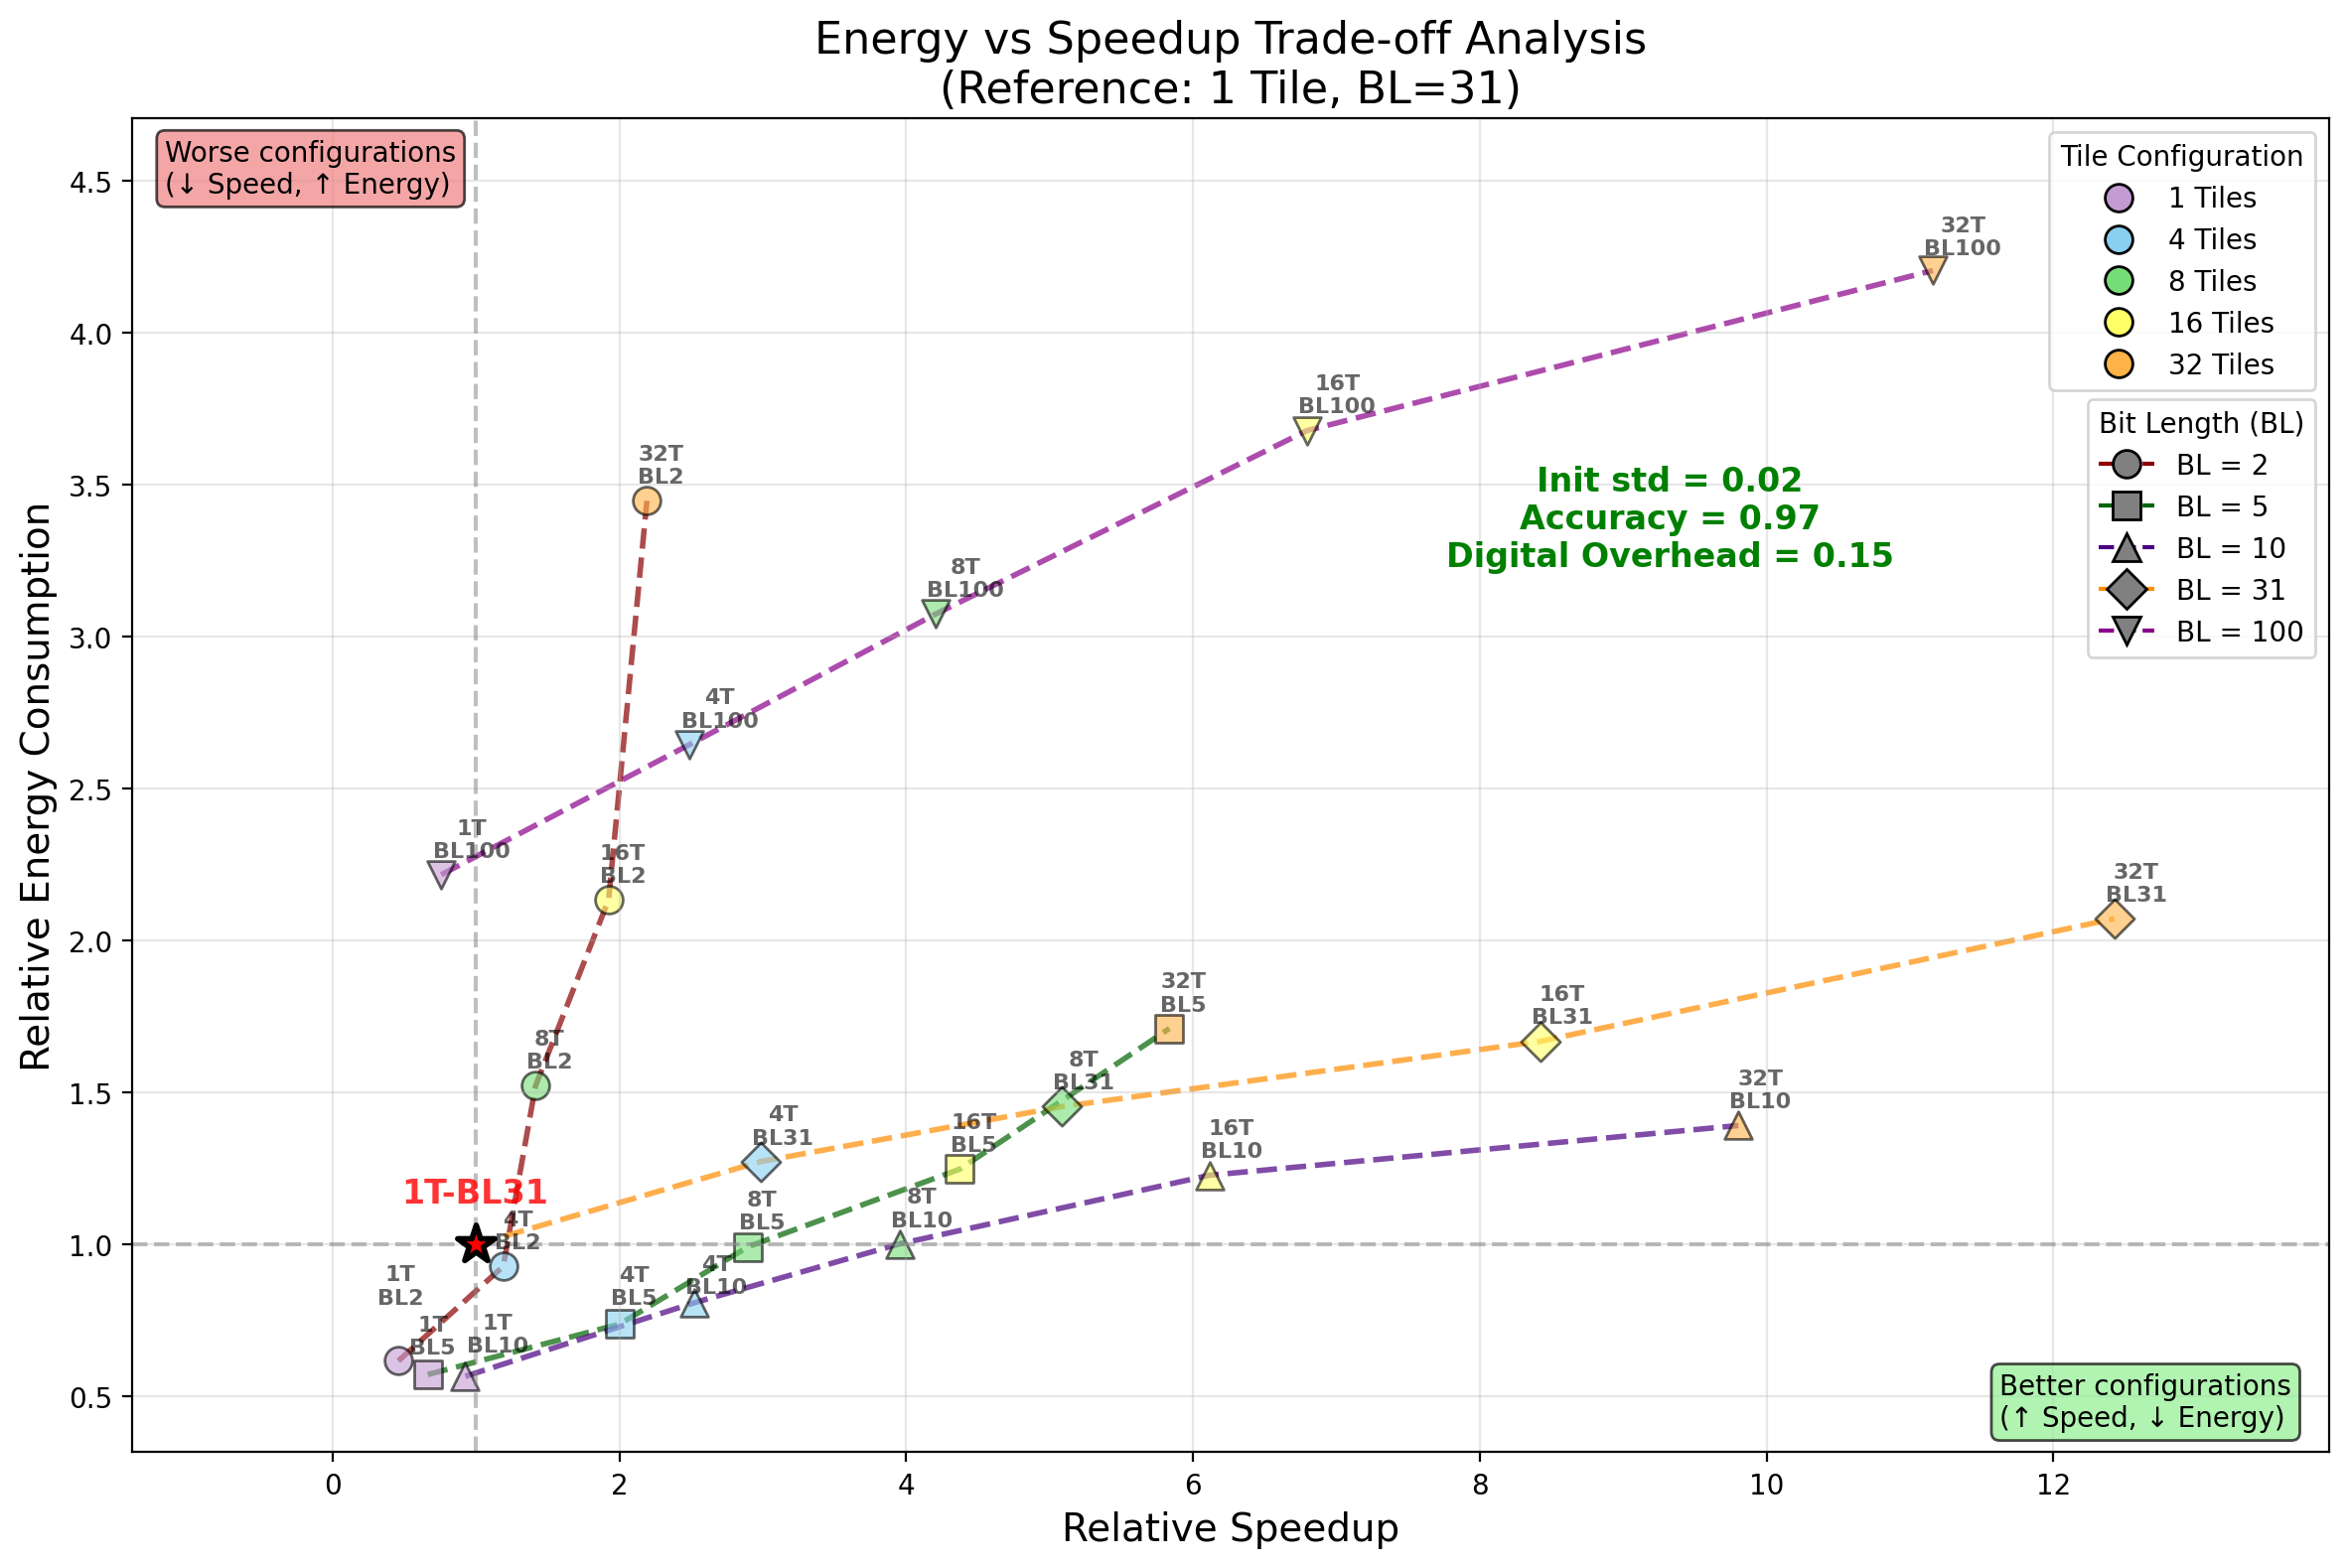

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
times_df = pd.read_csv('logs/times_v2.csv')
energy_df = pd.read_csv('logs/combined_energy_summary_v2.csv')

# Merge the dataframes
merged_df = pd.merge(times_df, energy_df, on=['tiles', 'bl'])

# Define reference configuration (1 tile, BL=31)
ref_time = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31)]['time'].iloc[0]
ref_energy = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31)]['total_energy'].iloc[0]

# Calculate relative values (reference = 1.0)
merged_df['relative_speedup'] = ref_time / merged_df['time']
merged_df['relative_energy'] = merged_df['total_energy'] / ref_energy

# Define colors for each tile configuration
tile_colors = {
    1: '#C39BD3',   # Light purple
    4: '#89CFF0',   # Light blue  
    8: '#77DD77',   # Light green
    16: '#FFFF66',  # Light yellow
    32: '#FFB347'   # Light orange
}

# Define markers for each BL configuration
bl_markers = {
    2: 'o',     # Circle
    5: 's',     # Square
    10: '^',    # Triangle up
    31: 'D',    # Diamond
    100: 'v'    # Triangle down
}

# Define colors for BL lines (different from tile colors)
bl_line_colors = {
    2: '#8B0000',    # Dark red
    5: '#006400',    # Dark green
    10: '#4B0082',   # Indigo
    31: '#FF8C00',   # Dark orange
    100: '#8B008B'   # Dark magenta
}

# Create the plot
plt.figure(figsize=(12, 8), dpi=200)

# Plot lines connecting points for each BL configuration across tiles
tile_order = [1, 4, 8, 16, 32]  # Define the order for connecting points

for bl in bl_markers.keys():
    # Get data for this BL configuration
    bl_data = merged_df[merged_df['bl'] == bl].copy()
    
    # Sort by tiles to ensure proper line connection
    bl_data = bl_data.sort_values('tiles')
    
    # Plot the connecting line
    plt.plot(bl_data['relative_speedup'], bl_data['relative_energy'], 
             color=bl_line_colors[bl], linewidth=2, alpha=0.7, zorder=1,
             linestyle='--')

texts = []
# Plot each configuration
for _, row in merged_df.iterrows():
    # if different from reference configuration (1T-BL31)
    if row['tiles'] == 1 and row['bl'] == 31:
        continue  # Skip the reference point for plotting
    
    plt.scatter(row['relative_speedup'], row['relative_energy'], 
                c=tile_colors[row['tiles']], 
                marker=bl_markers[row['bl']], 
                s=100, 
                edgecolors='black', 
                linewidth=1,
                alpha=0.6)

    # Add labels for each point
    text = plt.annotate(f"{int(row['tiles'])}T\nBL{int(row['bl'])}", 
                (row['relative_speedup']-0.08, row['relative_energy']+0.04),
                fontsize=8, alpha=0.6, weight='bold')
    
    texts.append(text)  # Add text to the list for adjustment

adjust_text(texts)   

# Add reference point
plt.scatter(1.0, 1.0, c='red', marker='*', s=200, 
           edgecolors='black', linewidth=2, 
           label='Reference (1T-BL31)', zorder=5)
plt.annotate('1T-BL31', (1.0, 1.0),
             xytext=(-27, 15), textcoords='offset points',
             fontsize=12, color='red', weight='bold', alpha=0.8)

# Set axis labels and title
plt.xlabel('Relative Speedup', fontsize=14)
plt.ylabel('Relative Energy Consumption', fontsize=14)
plt.title('V2 - Energy vs Speedup Trade-off Analysis\n(Reference: 1 Tile, BL=31)', fontsize=16)

# Add reference lines
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)

# Create custom legends
from matplotlib.lines import Line2D

# Legend for tile configurations (colors)
tile_legend_elements = [Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=color, markersize=10, 
                              markeredgecolor='black',
                              label=f'{tiles} Tiles') 
                       for tiles, color in tile_colors.items()]

# Legend for BL configurations (shapes and line colors)
bl_legend_elements = [Line2D([0], [0], marker=marker, color=bl_line_colors[bl], 
                             markerfacecolor='gray', markersize=10, 
                             markeredgecolor='black', linestyle='--',
                             label=f'BL = {bl}') 
                     for bl, marker in bl_markers.items()]

# Add both legends
legend1 = plt.legend(handles=tile_legend_elements, 
                    title="Tile Configuration", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 1))
legend2 = plt.legend(handles=bl_legend_elements, 
                    title="Bit Length (BL)", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 0.8))

# Add the first legend back
plt.gca().add_artist(legend1)

# Set grid and formatting
plt.grid(True, alpha=0.3)

# Set axis limits at min to max of data
plt.xlim(min(merged_df['relative_speedup'].min() - 0.5, -1.4),
         merged_df['relative_speedup'].max() + 1.5)
plt.ylim(merged_df['relative_energy'].min() - 0.25,
         merged_df['relative_energy'].max() + 0.5)

# Add text annotation explaining the quadrants
plt.text(0.85, 0.06, 'Better configurations\n(↑ Speed, ↓ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
         fontsize=10)

plt.text(0.015, 0.94, 'Worse configurations\n(↓ Speed, ↑ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7),
         fontsize=10)

plt.text(0.7, 0.7, f'Init std = 0.02\nAccuracy = 0.97\nDigital Overhead = {0.15:.2f}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')

plt.tight_layout()
plt.show()

# Learning rate + BL

In [ ]:
import pandas as pd
import json

V = 'v2'
nt = 1

df = pd.read_csv(f'mnist_lr_{V}.csv')

# Set the types of the columns: losses and accuracies are lists of floats, could be nan
df['digital_accuracies'] = df['digital_accuracies'].str.replace('nan', 'None', regex=False).apply(eval)

# Define the tile configurations and BL configurations
lrs = [0.5, 0.1, 0.05]#
bls = [2,5,10,31,100]

data_epochs = 40
#data_epochs = 52  # epochs for each tile configuration

epoch_list = []

# For each tile configuration, create a line
for i, lr in enumerate(lrs):
    # Filter data for this tile configuration
    df_tiles = df[df['num_tiles'] == nt]
    # Filter data for this learning rate
    df_tiles = df_tiles[df_tiles['lr'] == lr]

    # Calculate epochs for each BL configuration
    for config in bls:
        # Filter the data for this BL configuration
        df_filtered = df_tiles[df_tiles['bl'] == config]
        # Calculate the number of epochs to reach 97% accuracy
        epochs = np.mean([len(run) for inner in df_filtered['digital_accuracies'] for run in inner])
        epoch_list.append({
            'tiles': nt,
            'bl': config,
            'lr': lr,
            'epochs': epochs.round(0)
        })

# Create a DataFrame from the epoch list
epoch_df = pd.DataFrame(epoch_list)
# Save the epoch DataFrame to a CSV file
#epoch_df.to_csv(f'logs/epochs_to_reach_97_lr_{V}_{nt}.csv', index=False)
epochs_to_reach_97 = epoch_df

# Load the data
tile_config = nt
# Only care about 16 tiles
pl = 0.005
constant_time = 0.35
#epochs_df = pd.read_csv(f'logs/epochs_to_reach_97_lr_{V}_{nt}.csv')
epochs_df = epochs_to_reach_97

results = []

for idx, lr in enumerate(lrs):
    tile_df = pd.read_csv(f'logs/log_{tile_config}_{V}.csv')

    # Calculate sequential operations
    tile_sequential = tile_df.copy()
    tile_sequential['Sequential_Ops'] = tile_sequential['Times'] / tile_sequential['Pfactor']

    fandB = tile_sequential[tile_sequential['Meta_op'] == 'forward']['Sequential_Ops'].sum()
    updates = tile_sequential[tile_sequential['Meta_op'] == 'update']['Sequential_Ops'].sum()

    transfers_forward = tile_sequential[(tile_sequential['Meta_op'] == 'transfer') & (tile_sequential['Op'] == 'forward')]['Sequential_Ops'].sum()
    transfers_update = tile_sequential[(tile_sequential['Meta_op'] == 'transfer') & (tile_sequential['Op'] == 'update')]['Sequential_Ops'].sum()

    read = tile_sequential[tile_sequential['Meta_op'] == 'read']['Sequential_Ops'].sum()
    program_forward = tile_sequential[(tile_sequential['Meta_op'] == 'program') & (tile_sequential['Op'] == 'forward')]['Sequential_Ops'].sum()
    program_update = tile_sequential[(tile_sequential['Meta_op'] == 'program') & (tile_sequential['Op'] == 'update')]['Sequential_Ops'].sum()

    # Calculate the time to reach 97% accuracy for each pulse length and constant time
    for bl in bls:
        epochs = epochs_df[(epochs_df['tiles'] == tile_config) & (epochs_df['bl'] == bl) & (epochs_df['lr'] == lr)]['epochs'].values[0] / data_epochs
        fandB_a = fandB * epochs
        updates_a = updates * epochs
        transfers_forward_a = transfers_forward * epochs
        transfers_update_a = transfers_update * epochs
        time1 = constant_time* fandB_a + pl*bl*updates_a  + pl * transfers_update_a + constant_time/2 * transfers_forward_a #+ transfers_forward_a * 0.2
        time2 = (read + program_forward) * constant_time/2 + program_update * pl
        results.append({
            'tiles': tile_config,
            'bl': bl,
            'lr': lrs[idx],
            'time': time1 + time2,
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# save the results to a CSV file
results_df.to_csv(f'logs/times_lr_{V}_{nt}.csv', index=False) 

# Load the dataframes
# epochs_df = pd.read_csv(f'logs/epochs_to_reach_97_lr_{V}_{nt}.csv')
epochs_df = epochs_to_reach_97
digital_energy_df = pd.read_csv(f'logs/digital_energy_hyper_summary_{V}.csv')



# Merge the dataframes on 'tiles'
combined_df = epochs_df.merge(digital_energy_df[['tiles', 'fixed_energy', 'energy_per_epoch']], on='tiles', how='left')

# Calculate epoch_energy by multiplying energy_per_epoch by epochs
combined_df['epoch_energy'] = combined_df['energy_per_epoch'] * combined_df['epochs']

# Select only the desired columns
result_df = combined_df[['tiles', 'bl', 'lr', 'fixed_energy', 'epoch_energy']]

# Save to CSV if needed
#result_df.to_csv(f'logs/digital_energy_mega_summary_lr_{V}_{nt}.csv', index=False)
digital_energy_mega_summary_lr = result_df


# Load energy cost data
with open('/home/ignacio/Downloads/Research_2/SHD_script/logs/energy.json', 'r') as f:
    energy_data = json.load(f)


tiles = nt



# load epochs from the CSV file
#epochs_df = pd.read_csv(f'logs/epochs_to_reach_97_lr_{V}_{nt}.csv')
epochs_df = epochs_to_reach_97

results = []

for bl in bls:
    energy_costs = {
        'l1': {
            'forward': energy_data['forward_l1'],
            'backward': energy_data['backward_l1'],
            'update': energy_data['update_l1']/31 * bl,
            'transfer': energy_data['transfer_l1']
        },
        'l2': {
            'forward': energy_data['forward_l2'],
            'backward': energy_data['backward_l2'],
            'update': energy_data['update_l2']/31 * bl,
            'transfer': energy_data['transfer_l2']
        },
        'l3': {
            'forward': energy_data['forward_l3'],
            'backward': energy_data['backward_l3'],
            'update': energy_data['update_l3']/31 * bl,
            'transfer': energy_data['transfer_l3']
        }
    }

    # Calculate energy for each tile configuration
    for lr in lrs:
        epochs = epochs_df[(epochs_df['tiles'] == tiles) & (epochs_df['bl'] == bl) & (epochs_df['lr'] == lr)]['epochs'].values
        print(f"Calculating energy for {tiles} tiles with BL {bl} and epochs {epochs}")
        # Calculate analog energy
        log_df = pd.read_csv(f'/home/ignacio/Downloads/Research_2/SHD_script/logs/log_{tiles}_{V}.csv')
        
        for layer in ['l1', 'l2', 'l3']:
            layer_data = log_df[log_df['layer'] == layer]
            transfer_count = layer_data[layer_data['Meta_op'] == 'transfer']['Times'].sum()
            program_forward_count = layer_data[(layer_data['Meta_op'] == 'program') & (layer_data['Op'] == 'forward')]['Times'].sum()
            program_update_count = layer_data[(layer_data['Meta_op'] == 'program') & (layer_data['Op'] == 'update')]['Times'].sum()
            read_count = layer_data[layer_data['Meta_op'] == 'read']['Times'].sum()
            # Group by Op for other operations
            pure_ops_data = layer_data[layer_data['Meta_op'].isin(['update', 'forward', 'backward'])].groupby('Op')['Times'].sum()
            
            epoch_energy = (pure_ops_data.get('forward', 0) * energy_costs[layer]['forward'] +
                    pure_ops_data.get('backward', 0) * energy_costs[layer]['backward'] +
                    pure_ops_data.get('update', 0) * energy_costs[layer]['update'] +
                    transfer_count * energy_costs[layer]['transfer'])
            
            fixed_energy = (program_forward_count * energy_costs[layer]['forward'] + 
                    program_update_count * energy_costs[layer]['update']/bl +
                          read_count * energy_costs[layer]['forward'])
            
            results.append({
                'tiles': tiles,
                'bl': bl,
                'lr': lr,
                'fixed_energy': fixed_energy,
                'epoch_energy': epoch_energy / data_epochs * epochs[0],
            })
        
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.groupby(['tiles', 'bl', 'lr']).sum().reset_index()
# Save the results to a CSV file
#results_df.to_csv(f'logs/analog_energy_hyper_summary_lr_{V}_{nt}.csv', index=False)
analog_energy_hyper_summary = results_df

# Load the analog and digital energy data
# analog_df = pd.read_csv(f'logs/analog_energy_hyper_summary_lr_{V}_{nt}.csv')
# digital_df = pd.read_csv(f'logs/digital_energy_mega_summary_lr_{V}_{nt}.csv')
analog_df = analog_energy_hyper_summary
digital_df = digital_energy_mega_summary_lr

# Merge the dataframes on 'tiles' and 'bl'
combined_df = pd.merge(analog_df, digital_df, on=['tiles', 'bl', 'lr'], suffixes=('_analog', '_digital'))

# Calculate total fixed and epoch energies
combined_df['total_fixed_energy'] = combined_df['fixed_energy_analog'] + combined_df['fixed_energy_digital']
combined_df['total_epoch_energy'] = combined_df['epoch_energy_analog'] + combined_df['epoch_energy_digital']

# Calculate total energy (fixed + epoch)
combined_df['total_energy'] = combined_df['total_fixed_energy'] + combined_df['total_epoch_energy']

# save the combined dataframe to a CSV file
combined_df.to_csv(f'logs/combined_energy_summary_lr_{V}_{nt}.csv', index=False)

Calculating energy for 1 tiles with BL 31 and epochs [20.]
Calculating energy for 1 tiles with BL 31 and epochs [34.]
Calculating energy for 1 tiles with BL 31 and epochs [39.]


In [141]:
# take the times_V and combined_energy_summary_V for both 1 and 8 tiles and combine them into a single dataframe

times_1 = pd.read_csv(f'logs/times_lr_{V}_1.csv')
times_8 = pd.read_csv(f'logs/times_lr_{V}_8.csv')
energy_1 = pd.read_csv(f'logs/combined_energy_summary_lr_{V}_1.csv')
energy_8 = pd.read_csv(f'logs/combined_energy_summary_lr_{V}_8.csv')

times_df = pd.concat([times_1, times_8], ignore_index=True)
energy_df = pd.concat([energy_1, energy_8], ignore_index=True)

# save the combined dataframes to CSV files
times_df.to_csv(f'logs/times_lr_{V}.csv', index=False)
energy_df.to_csv(f'logs/combined_energy_summary_lr_{V}.csv', index=False)

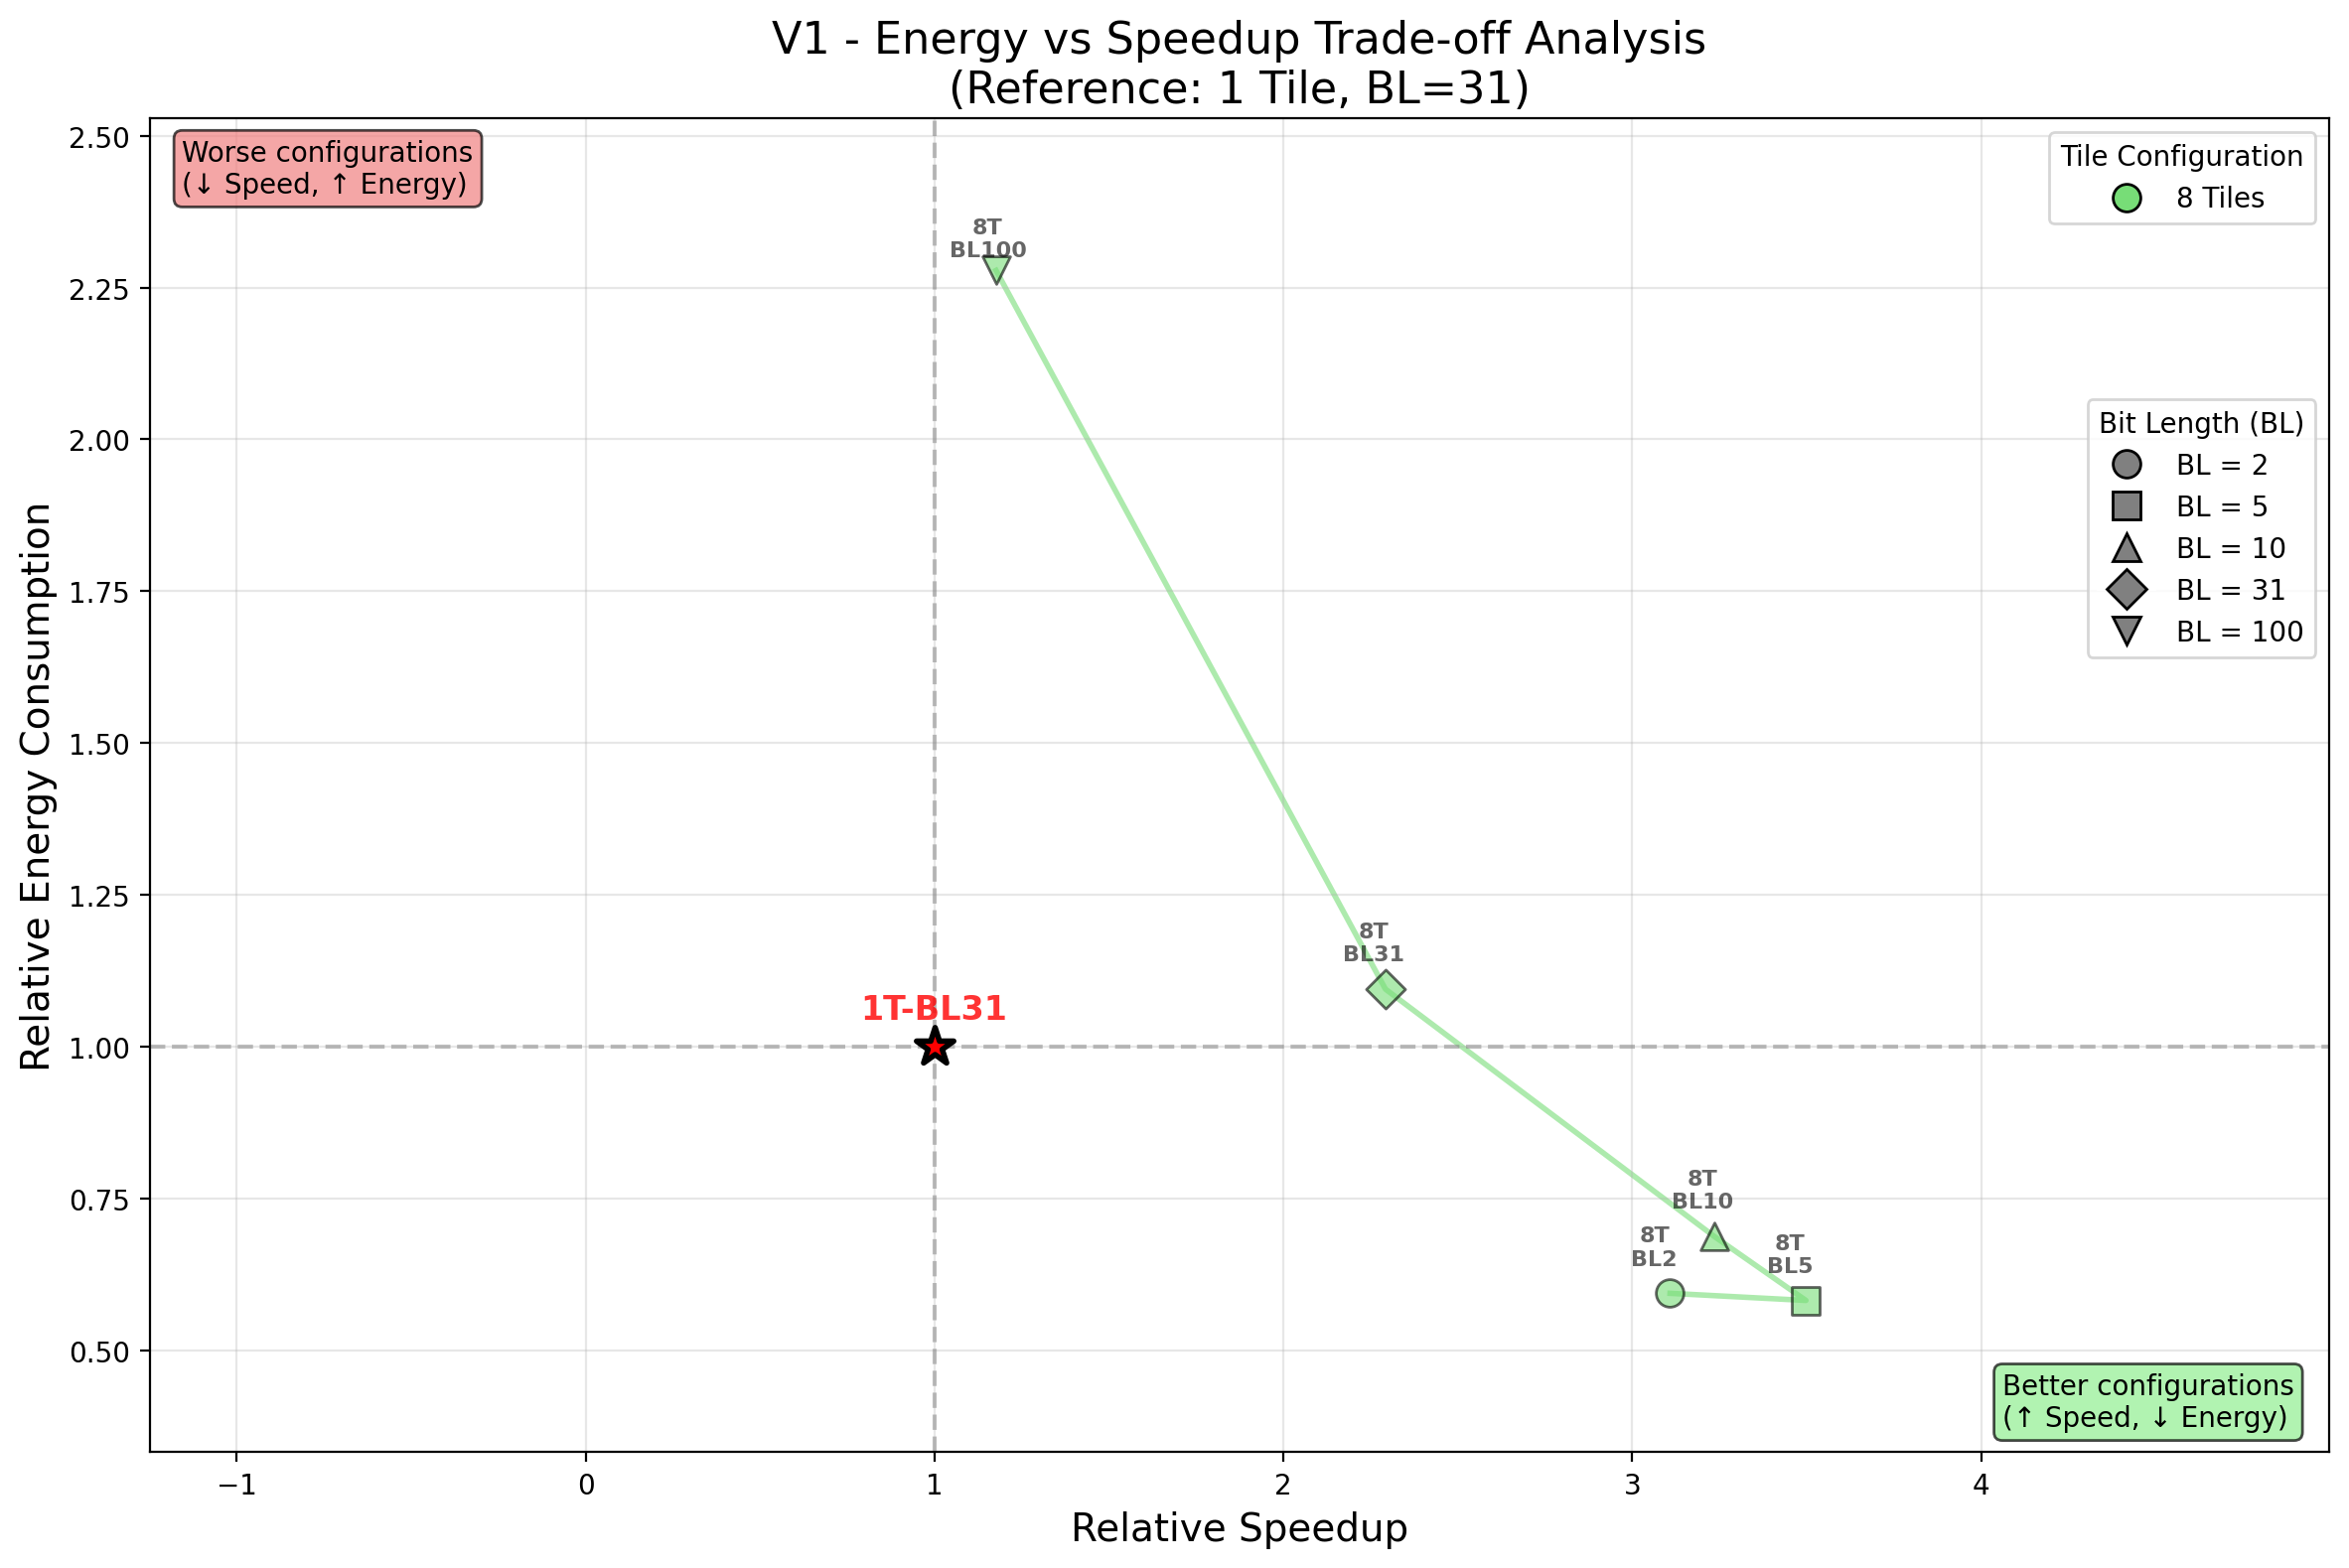

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

# Load the data
times_df = pd.read_csv('logs/times_v1.csv')
energy_df = pd.read_csv('logs/combined_energy_summary_v1.csv')

# Merge the dataframes
merged_df = pd.merge(times_df, energy_df, on=['tiles', 'bl'])

# Define reference configuration (1 tile, BL=31)
ref_time = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31)]['time'].iloc[0]
ref_energy = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31)]['total_energy'].iloc[0]

# Calculate relative values (reference = 1.0)
merged_df['relative_speedup'] = ref_time / merged_df['time']
merged_df['relative_energy'] = merged_df['total_energy'] / ref_energy

# filter df by tiles to plot
tiles_to_plot = [8]
merged_df = merged_df[merged_df['tiles'].isin(tiles_to_plot)]

# Define colors for each tile configuration
tile_colors = {
  #  1: '#C39BD3',   # Light purple
  #  4: '#89CFF0',   # Light blue  
    8: '#77DD77',   # Light green
  #  16: '#FFFF66',  # Light yellow
 #   32: '#FFB347'   # Light orange
}

# Define markers for each BL configuration
bl_markers = {
    2: 'o',     # Circle
    5: 's',     # Square
    10: '^',    # Triangle up
    31: 'D',    # Diamond
    100: 'v'    # Triangle down
}

# Create the plot
plt.figure(figsize=(12, 8), dpi=200)

# Plot lines connecting points for each tile configuration
bl_order = [2, 5, 10, 31, 100]  # Define the order for connecting points

for tiles in tile_colors.keys():
    # Get data for this tile configuration
    tile_data = merged_df[merged_df['tiles'] == tiles].copy()
    
    # Sort by BL to ensure proper line connection
    tile_data = tile_data.sort_values('bl')
    
    # Plot the connecting line
    plt.plot(tile_data['relative_speedup'], tile_data['relative_energy'], 
             color=tile_colors[tiles], linewidth=2, alpha=0.6, zorder=1)

# Plot each configuration point
texts = []
# Plot each configuration
for _, row in merged_df.iterrows():
    # if different from reference configuration (1T-BL31)
    if row['tiles'] == 1 and row['bl'] == 31:
        continue  # Skip the reference point for plotting
    
    plt.scatter(row['relative_speedup'], row['relative_energy'], 
                c=tile_colors[row['tiles']], 
                marker=bl_markers[row['bl']], 
                s=100, 
                edgecolors='black', 
                linewidth=1,
                alpha=0.6)

    # Add labels for each point
    text = plt.annotate(f"{int(row['tiles'])}T\nBL{int(row['bl'])}", 
                (row['relative_speedup']-0.08, row['relative_energy']+0.04),
                fontsize=8, alpha=0.6, weight='bold')
    
    texts.append(text)  # Add text to the list for adjustment

adjust_text(texts)   

# Add reference point
plt.scatter(1.0, 1.0, c='red', marker='*', s=200, 
           edgecolors='black', linewidth=2, 
           label='Reference (1T-BL31)', zorder=5)
plt.annotate('1T-BL31', (1.0, 1.0),
             xytext=(-27, 10), textcoords='offset points',
             fontsize=12, color='red', weight='bold', alpha=0.8)

# Set axis labels and title
plt.xlabel('Relative Speedup', fontsize=14)
plt.ylabel('Relative Energy Consumption', fontsize=14)
plt.title('V1 - Energy vs Speedup Trade-off Analysis\n(Reference: 1 Tile, BL=31)', fontsize=16)

# Add reference lines
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)

# Create custom legends
from matplotlib.lines import Line2D

# Legend for tile configurations (colors)
tile_legend_elements = [Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=color, markersize=10, 
                              markeredgecolor='black',
                              label=f'{tiles} Tiles') 
                       for tiles, color in tile_colors.items()]

# Legend for BL configurations (shapes)
bl_legend_elements = [Line2D([0], [0], marker=marker, color='w', 
                             markerfacecolor='gray', markersize=10, 
                             markeredgecolor='black',
                             label=f'BL = {bl}') 
                     for bl, marker in bl_markers.items()]

# Add both legends
# Add both legends
legend1 = plt.legend(handles=tile_legend_elements, 
                    title="Tile Configuration", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 1))
legend2 = plt.legend(handles=bl_legend_elements, 
                    title="Bit Length (BL)", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 0.8))

# Add the first legend back
plt.gca().add_artist(legend1)

# Set grid and formatting
plt.grid(True, alpha=0.3)

# Set axis limits at min to max of data
plt.xlim(min(merged_df['relative_speedup'].min() - 0.5, -1.25),
         merged_df['relative_speedup'].max() + 1.5)
plt.ylim(merged_df['relative_energy'].min() - 0.25,
         merged_df['relative_energy'].max() + 0.25)

# Add text annotation explaining the quadrants
plt.text(0.85, 0.06, 'Better configurations\n(↑ Speed, ↓ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
         fontsize=10)

plt.text(0.015, 0.94, 'Worse configurations\n(↓ Speed, ↑ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7),
         fontsize=10)

#plt.text(0.7, 0.92, f'Init std = 0.02\nAccuracy = 0.97\nDigital Overhead = {0.15:.2f}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')

plt.tight_layout()
plt.show()

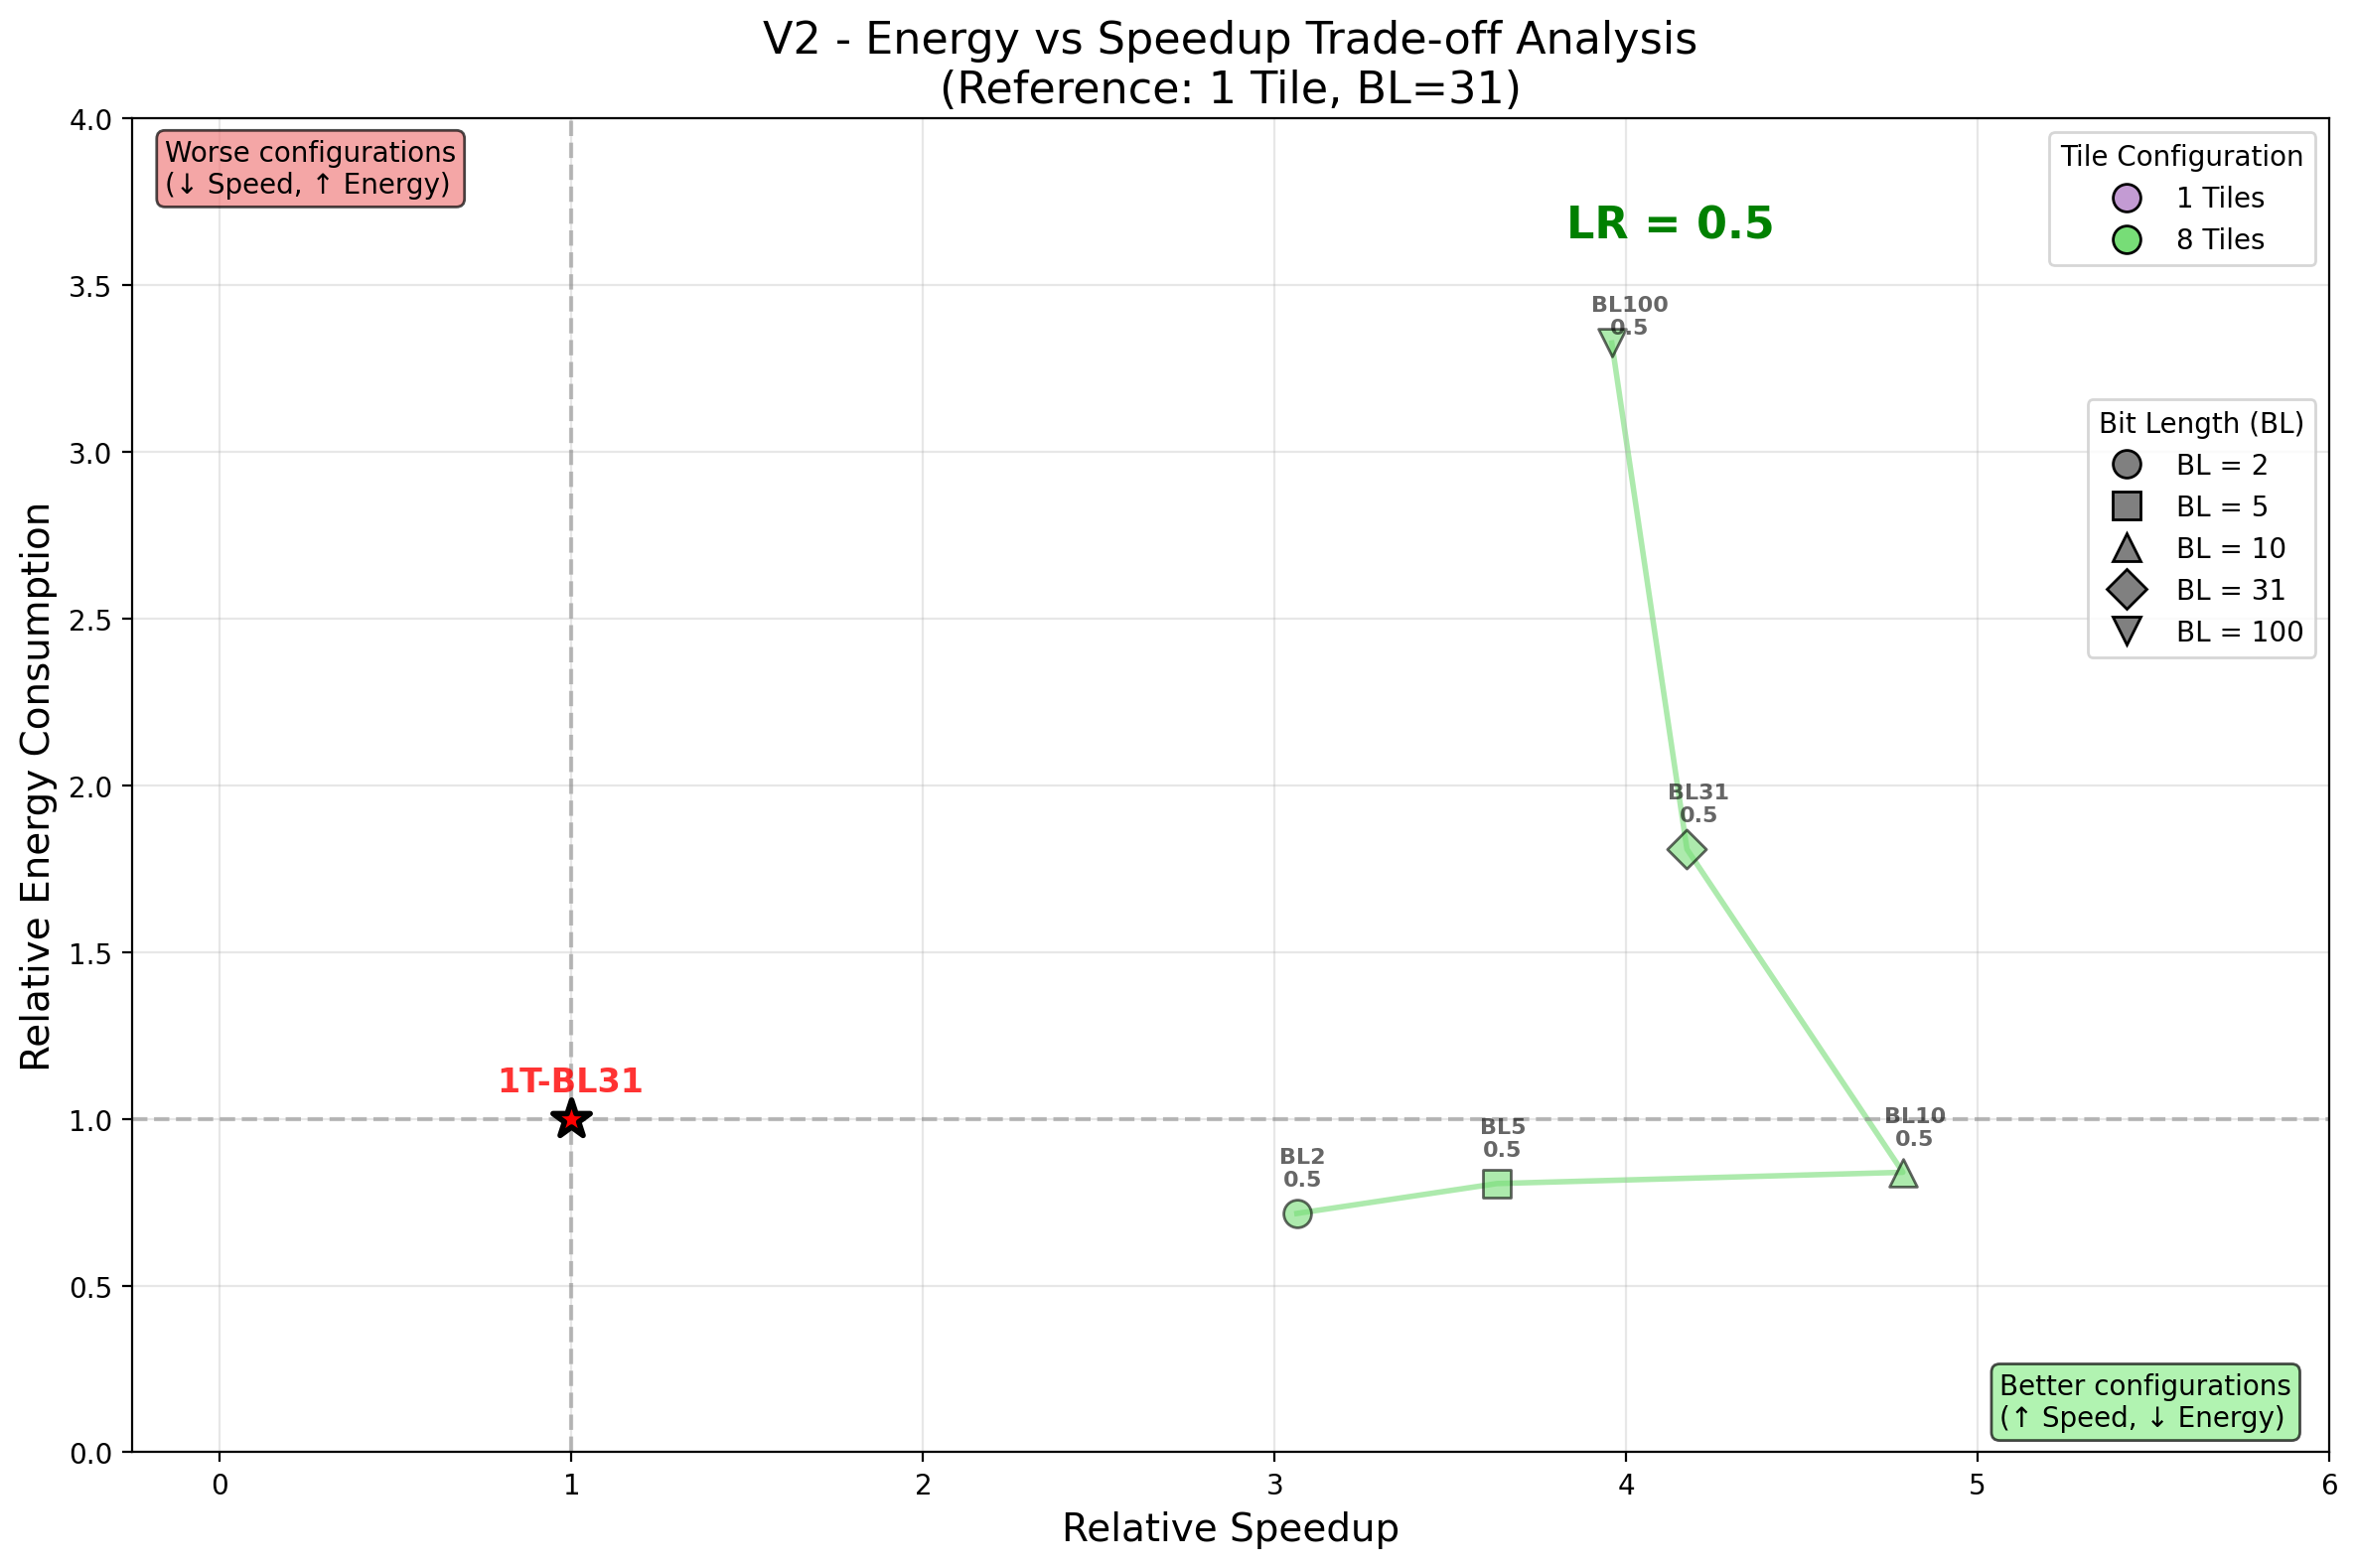

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

V = 'v2'
ref_lr = 0.5

# Load the data
times_df = pd.read_csv(f'logs/times_lr_{V}.csv')
energy_df = pd.read_csv(f'logs/combined_energy_summary_lr_{V}.csv')

# Merge the dataframes
merged_df = pd.merge(times_df, energy_df, on=['tiles', 'bl', 'lr'])

# Define reference configuration (1 tile, BL=31)
ref_time = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31) & (merged_df['lr'] == ref_lr)]['time'].iloc[0]
ref_energy = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31) & (merged_df['lr'] == ref_lr)]['total_energy'].iloc[0]

# Calculate relative values (reference = 1.0)
merged_df['relative_speedup'] = ref_time / merged_df['time']
merged_df['relative_energy'] = merged_df['total_energy'] / ref_energy

# filter df by tiles to plot
tiles_to_plot = [1, 8]
merged_df = merged_df[merged_df['tiles'].isin(tiles_to_plot)]

# filter by lr
merged_df = merged_df[merged_df['lr'] == ref_lr]

# Define colors for each tile configuration
tile_colors = {
    1: '#C39BD3',   # Light purple
    8: '#77DD77',   # Light green
}

# Define markers for each BL configuration
bl_markers = {
    2: 'o',     # Circle
    5: 's',     # Square
    10: '^',    # Triangle up
    31: 'D',    # Diamond
    100: 'v'    # Triangle down
}

# Create the plot
plt.figure(figsize=(12, 8), dpi=200)

# Plot lines connecting points for each tile configuration
bl_order = [2, 5, 10, 31, 100]  # Define the order for connecting points

for tiles in tile_colors.keys():
    for lr in merged_df['lr'].unique():
        # Filter data for this learning rate
        lr_data = merged_df[merged_df['lr'] == lr]
        # Get data for this tile configuration
        tile_data = lr_data[lr_data['tiles'] == tiles].copy()
        
        # Sort by BL to ensure proper line connection
        tile_data = tile_data.sort_values('bl')
        
        # Plot the connecting line
        plt.plot(tile_data['relative_speedup'], tile_data['relative_energy'], 
                color=tile_colors[tiles], linewidth=2, alpha=0.6, zorder=1)

# Plot each configuration point
texts = []
# Plot each configuration
for _, row in merged_df.iterrows():
    # if different from reference configuration (1T-BL31)
    if row['tiles'] == 1 and row['bl'] == 31 and row['lr'] == ref_lr:
        continue  # Skip the reference point for plotting
    
    plt.scatter(row['relative_speedup'], row['relative_energy'], 
                c=tile_colors[row['tiles']], 
                marker=bl_markers[row['bl']], 
                s=100, 
                edgecolors='black', 
                linewidth=1,
                alpha=0.6)

    # Add labels for each point
    text = plt.annotate(f"BL{int(row['bl'])}\n{row['lr']}", 
                (row['relative_speedup']-0.04, row['relative_energy']+0.08),
                fontsize=8, alpha=0.6, weight='bold')
    
    texts.append(text)  # Add text to the list for adjustment

adjust_text(texts)  

# Add reference point
plt.scatter(1.0, 1.0, c='red', marker='*', s=200, 
           edgecolors='black', linewidth=2, 
           label='Reference (1T-BL31)', zorder=5)
plt.annotate('1T-BL31', (1.0, 1.0),
             xytext=(-27, 10), textcoords='offset points',
             fontsize=12, color='red', weight='bold', alpha=0.8)

# Set axis labels and title
plt.xlabel('Relative Speedup', fontsize=14)
plt.ylabel('Relative Energy Consumption', fontsize=14)
plt.title(f'V{V[-1]} - Energy vs Speedup Trade-off Analysis\n(Reference: 1 Tile, BL=31)', fontsize=16)

# Add reference lines
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)

# Create custom legends
from matplotlib.lines import Line2D

# Legend for tile configurations (colors)
tile_legend_elements = [Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=color, markersize=10, 
                              markeredgecolor='black',
                              label=f'{tiles} Tiles') 
                       for tiles, color in tile_colors.items()]

# Legend for BL configurations (shapes)
bl_legend_elements = [Line2D([0], [0], marker=marker, color='w', 
                             markerfacecolor='gray', markersize=10, 
                             markeredgecolor='black',
                             label=f'BL = {bl}') 
                     for bl, marker in bl_markers.items()]

# Add both legends
# Add both legends
legend1 = plt.legend(handles=tile_legend_elements, 
                    title="Tile Configuration", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 1))
legend2 = plt.legend(handles=bl_legend_elements, 
                    title="Bit Length (BL)", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 0.8))

# Add the first legend back
plt.gca().add_artist(legend1)

# Set grid and formatting
plt.grid(True, alpha=0.3)

# Set axis limits at min to max of data
# plt.xlim(min(merged_df['relative_speedup'].min() - 0.5, -1.25),
#          merged_df['relative_speedup'].max() + 1.5)
# plt.ylim(merged_df['relative_energy'].min() - 0.25,
#          merged_df['relative_energy'].max() + 0.25)

plt.xlim(-0.25, 6)
plt.ylim(0, 4)

# Add text annotation explaining the quadrants
plt.text(0.85, 0.06, 'Better configurations\n(↑ Speed, ↓ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
         fontsize=10)

plt.text(0.015, 0.94, 'Worse configurations\n(↓ Speed, ↑ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7),
         fontsize=10)

plt.text(0.7, 0.92, f'LR = {ref_lr}', fontsize=16, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')

plt.tight_layout()
plt.show()

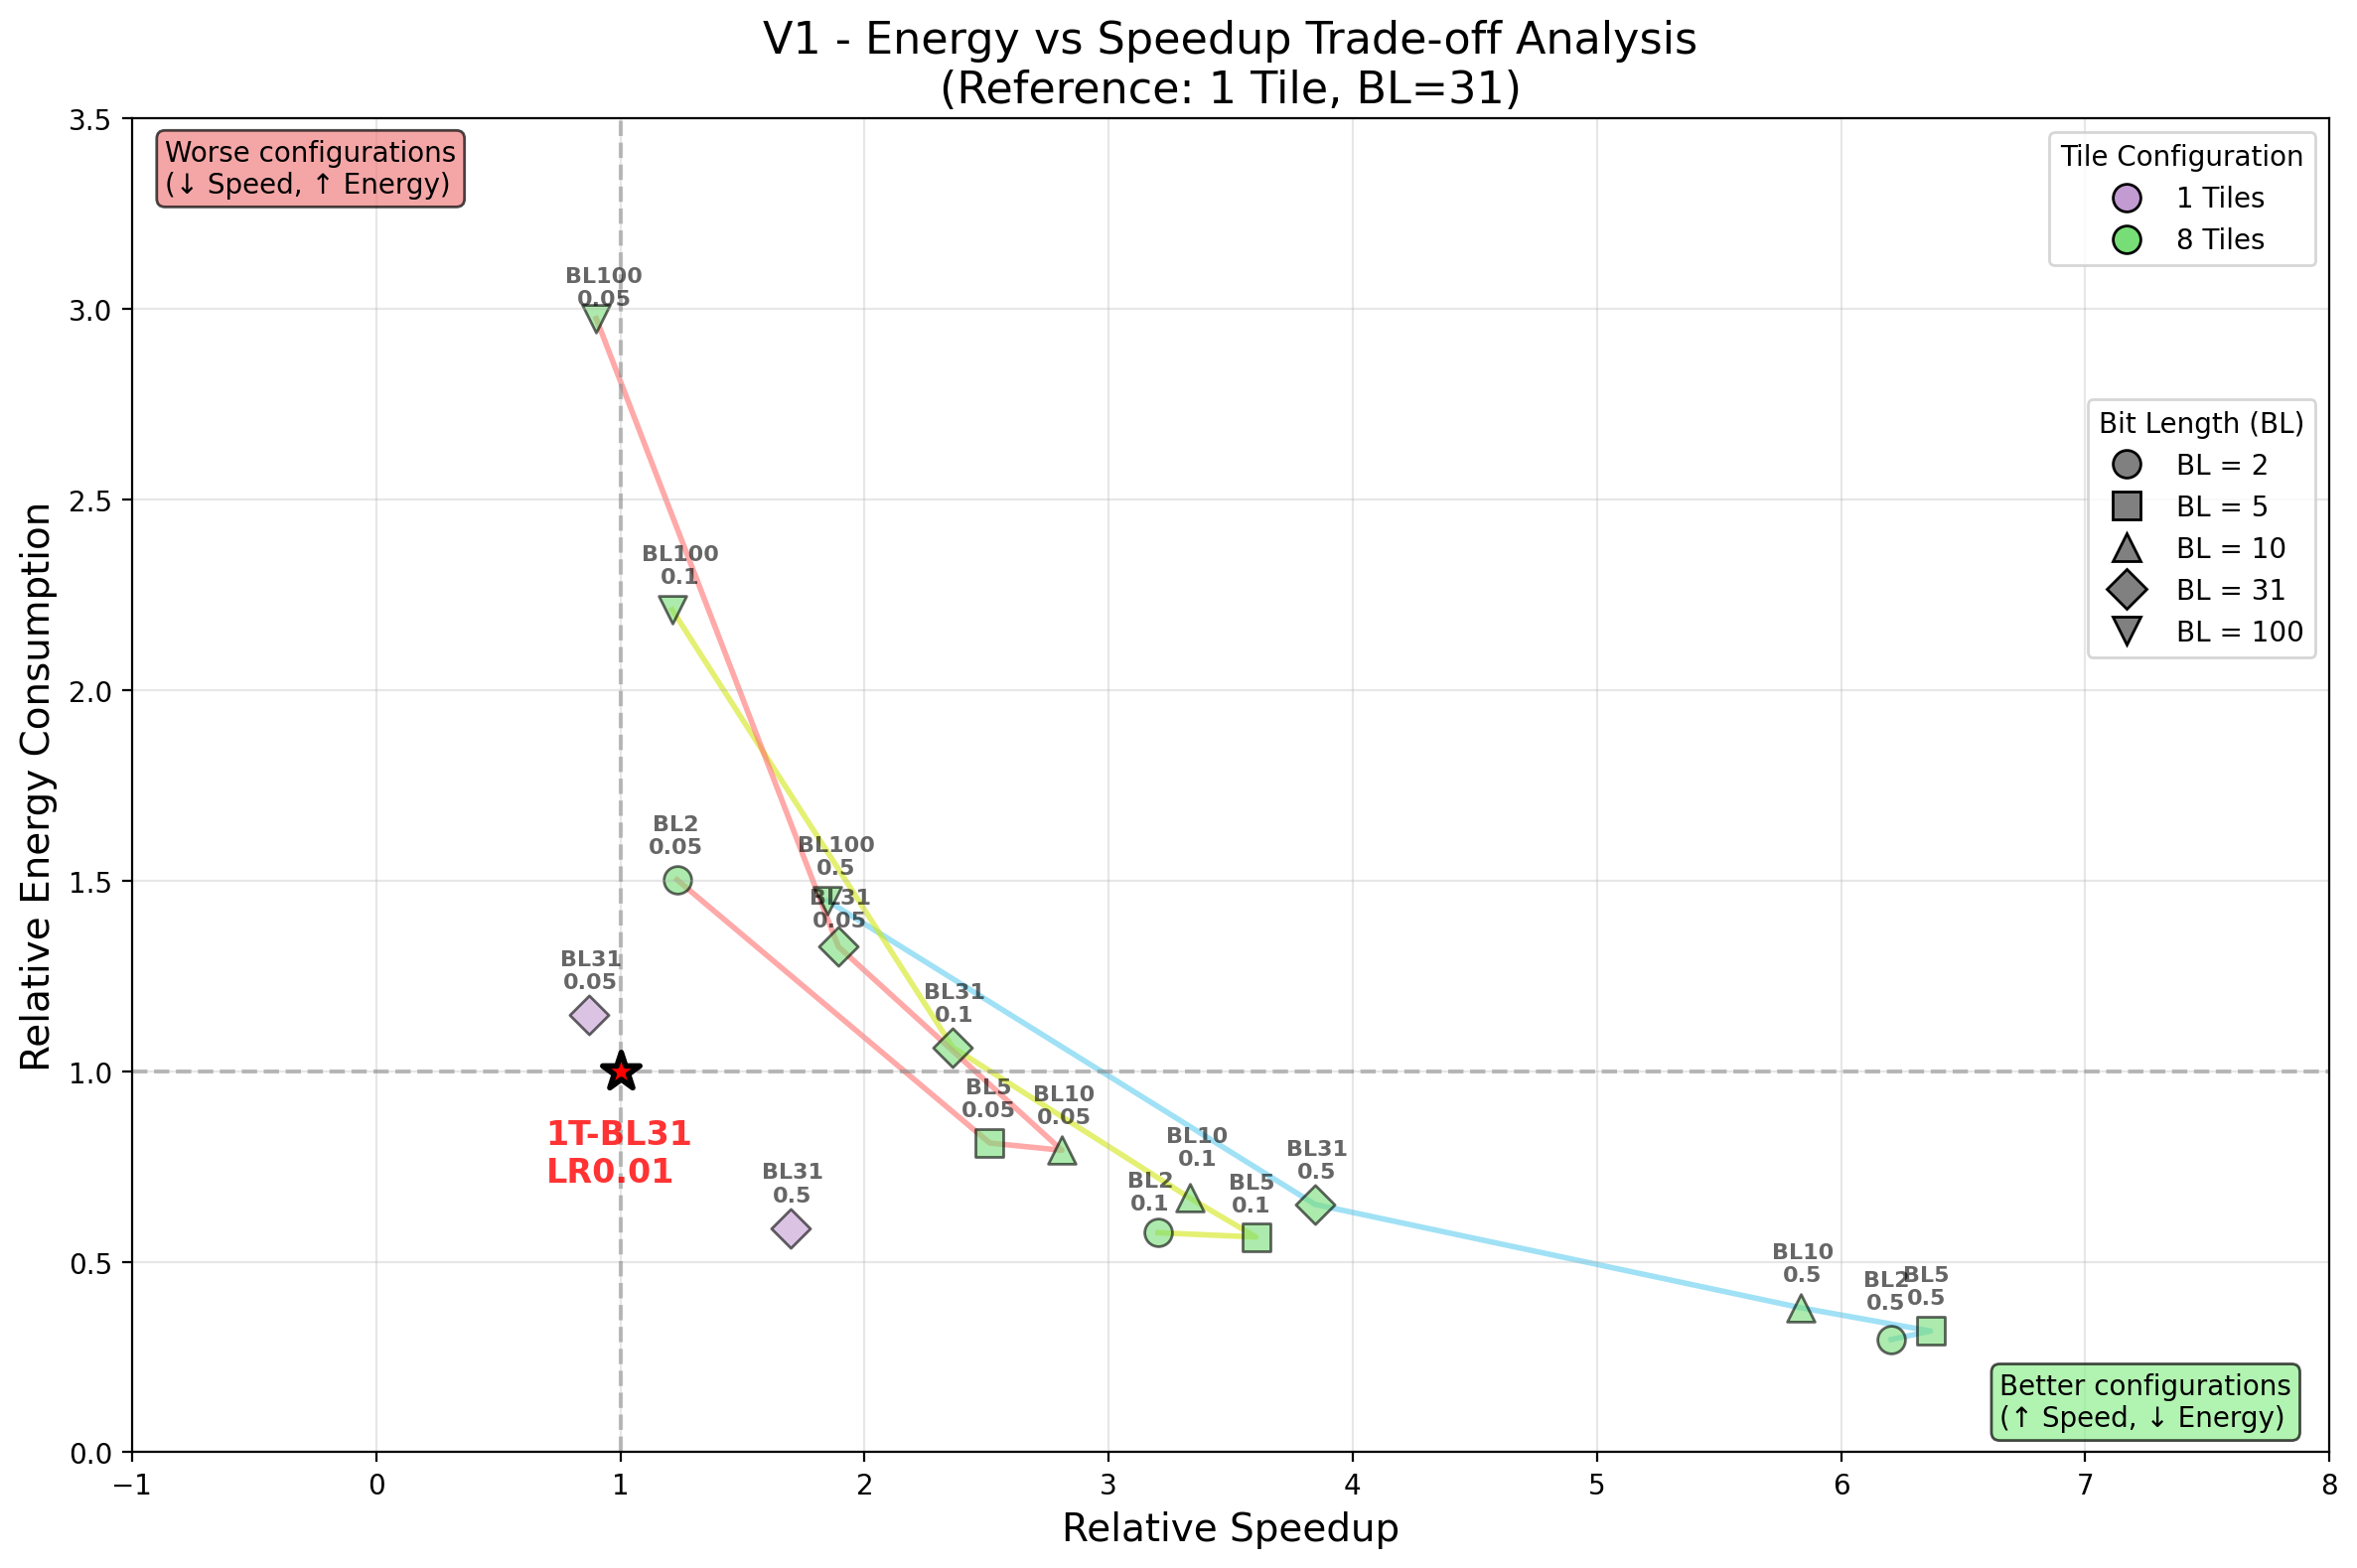

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

V = 'v1'
ref_lr = 0.1

# Load the data
times_df = pd.read_csv(f'logs/times_lr_{V}.csv')
energy_df = pd.read_csv(f'logs/combined_energy_summary_lr_{V}.csv')

# Merge the dataframes
merged_df = pd.merge(times_df, energy_df, on=['tiles', 'bl', 'lr'])

# Define reference configuration (1 tile, BL=31)
ref_time = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31) & (merged_df['lr'] == ref_lr)]['time'].iloc[0]
ref_energy = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31) & (merged_df['lr'] == ref_lr)]['total_energy'].iloc[0]

# Calculate relative values (reference = 1.0)
merged_df['relative_speedup'] = ref_time / merged_df['time']
merged_df['relative_energy'] = merged_df['total_energy'] / ref_energy

# filter df by tiles to plot
tiles_to_plot = [1, 8]
merged_df = merged_df[merged_df['tiles'].isin(tiles_to_plot)]

# filter by lr
#merged_df = merged_df[merged_df['lr'] == ref_lr]

# Define colors for each tile configuration
tile_colors = {
    1: '#C39BD3',   # Light purple
    8: '#77DD77',   # Light green
}

lr_colors = {
    0.5: "#61CEF0",  # Light red for LR=0.5
    0.1: "#D2E714"  ,  # Light blue for LR=0.1
    0.05: "#FF7070"# Light yellow for LR=0.05
}

# Define markers for each BL configuration
bl_markers = {
    2: 'o',     # Circle
    5: 's',     # Square
    10: '^',    # Triangle up
    31: 'D',    # Diamond
    100: 'v'    # Triangle down
}

# Create the plot
plt.figure(figsize=(12, 8), dpi=200)

# Plot lines connecting points for each tile configuration
bl_order = [2, 5, 10, 31, 100]  # Define the order for connecting points


for lr in merged_df['lr'].unique():
    for tiles in tiles_to_plot:
        # Filter data for this learning rate
        lr_data = merged_df[merged_df['lr'] == lr]
        # Get data for this tile configuration
        tile_data = lr_data[lr_data['tiles'] == tiles].copy()
        
        # Sort by BL to ensure proper line connection
        tile_data = tile_data.sort_values('bl')
        
        # Plot the connecting line
        plt.plot(tile_data['relative_speedup'], tile_data['relative_energy'], 
                color=lr_colors[lr], linewidth=2, alpha=0.6, zorder=1)

# Plot each configuration point
texts = []
# Plot each configuration
for _, row in merged_df.iterrows():
    # if different from reference configuration (1T-BL31)
    if row['tiles'] == 1 and row['bl'] == 31 and row['lr'] == ref_lr:
        continue  # Skip the reference point for plotting
    
    plt.scatter(row['relative_speedup'], row['relative_energy'], 
                c=tile_colors[row['tiles']], 
                marker=bl_markers[row['bl']], 
                s=100, 
                edgecolors='black', 
                linewidth=1,
                alpha=0.6)

    # Add labels for each point
    text = plt.annotate(f"BL{int(row['bl'])}\n{row['lr']}", 
                (row['relative_speedup']-0.1, row['relative_energy']+0.06),
                fontsize=8, alpha=0.6, weight='bold')
    
    texts.append(text)  # Add text to the list for adjustment

adjust_text(texts)  

# Add reference point
plt.scatter(1.0, 1.0, c='red', marker='*', s=200, 
           edgecolors='black', linewidth=2, 
           label='Reference (1T-BL31)', zorder=5)
plt.annotate('1T-BL31\nLR0.01', (1.0, 1.0),
             xytext=(-27, -40), textcoords='offset points',
             fontsize=12, color='red', weight='bold', alpha=0.8)

# Set axis labels and title
plt.xlabel('Relative Speedup', fontsize=14)
plt.ylabel('Relative Energy Consumption', fontsize=14)
plt.title(f'V{V[-1]} - Energy vs Speedup Trade-off Analysis\n(Reference: 1 Tile, BL=31)', fontsize=16)

# Add reference lines
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)

# Create custom legends
from matplotlib.lines import Line2D

# Legend for tile configurations (colors)
tile_legend_elements = [Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=color, markersize=10, 
                              markeredgecolor='black',
                              label=f'{tiles} Tiles') 
                       for tiles, color in tile_colors.items()]

# Legend for BL configurations (shapes)
bl_legend_elements = [Line2D([0], [0], marker=marker, color='w', 
                             markerfacecolor='gray', markersize=10, 
                             markeredgecolor='black',
                             label=f'BL = {bl}') 
                     for bl, marker in bl_markers.items()]

# Add both legends
# Add both legends
legend1 = plt.legend(handles=tile_legend_elements, 
                    title="Tile Configuration", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 1))
legend2 = plt.legend(handles=bl_legend_elements, 
                    title="Bit Length (BL)", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 0.8))

# Add the first legend back
plt.gca().add_artist(legend1)

# Set grid and formatting
plt.grid(True, alpha=0.3)

# Set axis limits at min to max of data
# plt.xlim(min(merged_df['relative_speedup'].min() - 0.5, -1.25),
#          merged_df['relative_speedup'].max() + 1.5)
# plt.ylim(merged_df['relative_energy'].min() - 0.25,
#          merged_df['relative_energy'].max() + 0.25)

plt.xlim(-1, 8)
plt.ylim(0, 3.5)

# Add text annotation explaining the quadrants
plt.text(0.85, 0.06, 'Better configurations\n(↑ Speed, ↓ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
         fontsize=10)

plt.text(0.015, 0.94, 'Worse configurations\n(↓ Speed, ↑ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7),
         fontsize=10)

#plt.text(0.7, 0.92, f'LR = {ref_lr}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')

plt.tight_layout()
plt.show()

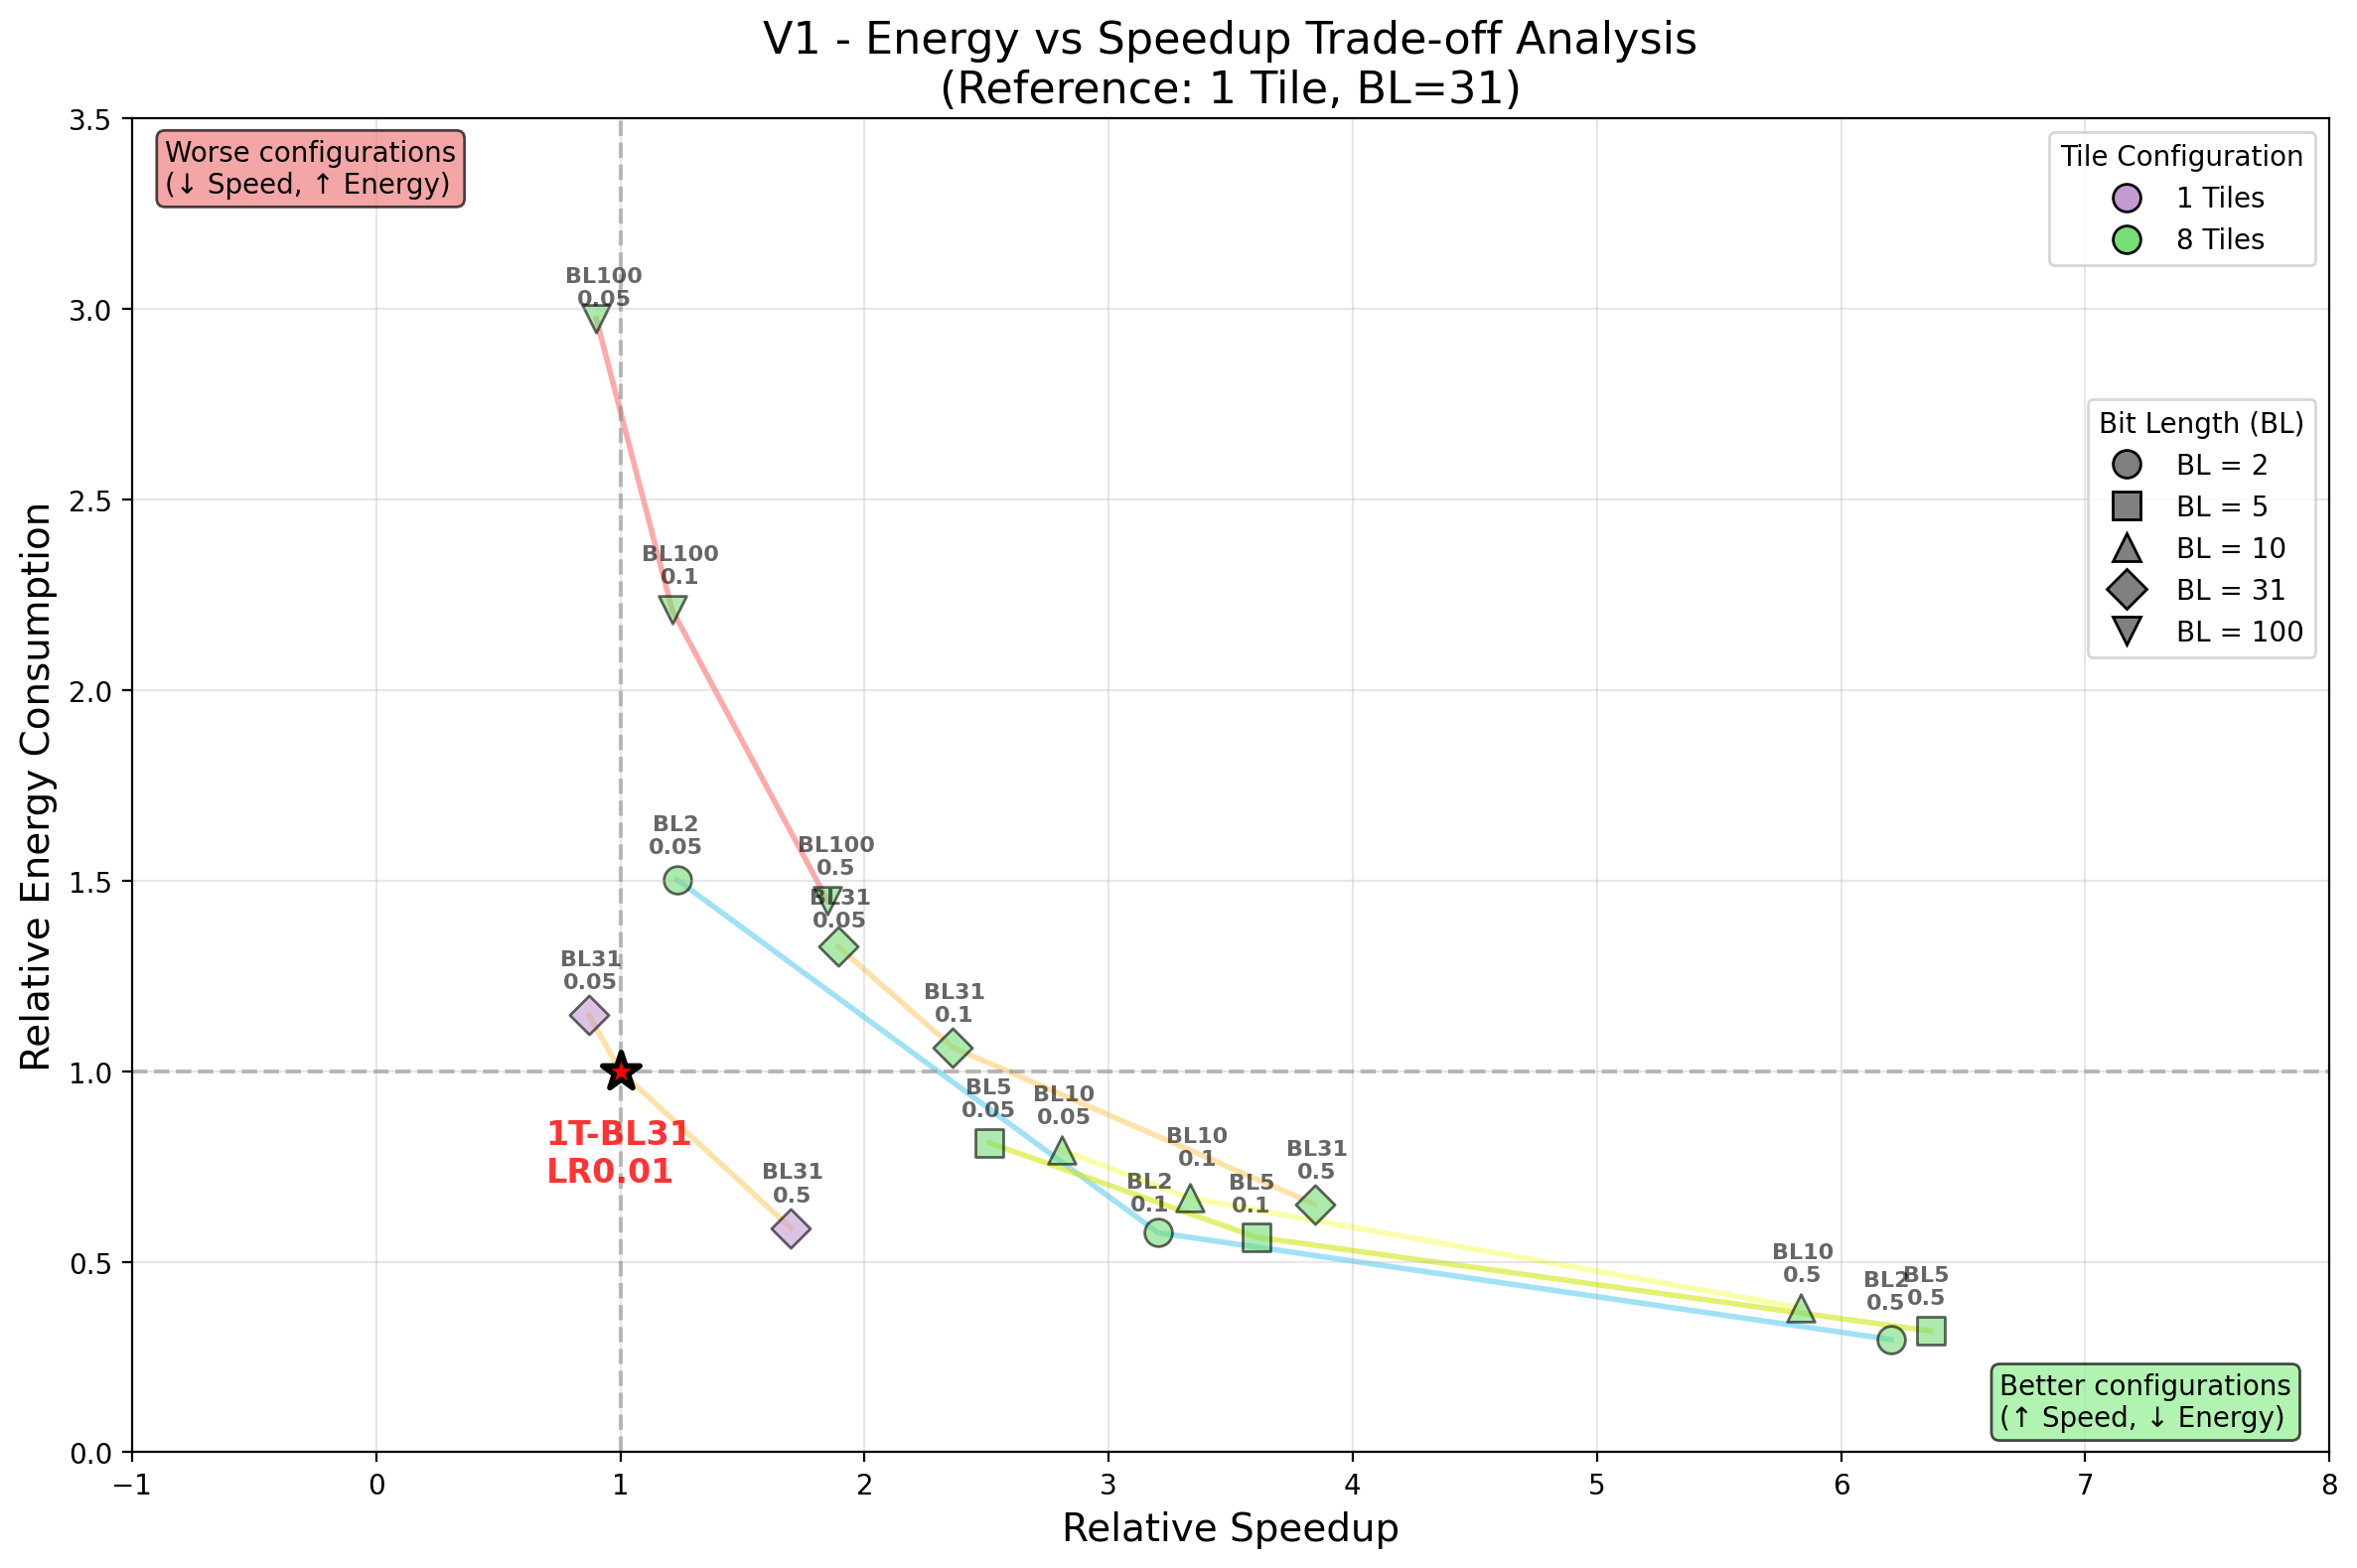

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

V = 'v1'
ref_lr = 0.1

# Load the data
times_df = pd.read_csv(f'logs/times_lr_{V}.csv')
energy_df = pd.read_csv(f'logs/combined_energy_summary_lr_{V}.csv')

# Merge the dataframes
merged_df = pd.merge(times_df, energy_df, on=['tiles', 'bl', 'lr'])

# Define reference configuration (1 tile, BL=31)
ref_time = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31) & (merged_df['lr'] == ref_lr)]['time'].iloc[0]
ref_energy = merged_df[(merged_df['tiles'] == 1) & (merged_df['bl'] == 31) & (merged_df['lr'] == ref_lr)]['total_energy'].iloc[0]

# Calculate relative values (reference = 1.0)
merged_df['relative_speedup'] = ref_time / merged_df['time']
merged_df['relative_energy'] = merged_df['total_energy'] / ref_energy

# filter df by tiles to plot
tiles_to_plot = [1, 8]
merged_df = merged_df[merged_df['tiles'].isin(tiles_to_plot)]

# filter by lr
#merged_df = merged_df[merged_df['lr'] == ref_lr]

# Define colors for each tile configuration
tile_colors = {
    1: '#C39BD3',   # Light purple
    8: '#77DD77',   # Light green
}

bl_colors = {
    2: "#61CEF0",  # Light red for LR=0.5
    5: "#D2E714"  ,  # Light blue for LR=0.1
    10: "#F5FF70", 
    31: "#FFCD70", 
    100: "#FF7070"# Light yellow for LR=0.05
}

# Define markers for each BL configuration
bl_markers = {
    2: 'o',     # Circle
    5: 's',     # Square
    10: '^',    # Triangle up
    31: 'D',    # Diamond
    100: 'v'    # Triangle down
}

# Create the plot
plt.figure(figsize=(12, 8), dpi=200)

# Plot lines connecting points for each tile configuration
bl_order = [2, 5, 10, 31, 100]  # Define the order for connecting points


for bl in merged_df['bl'].unique():
    for tiles in tiles_to_plot:
        # Filter data for this learning rate
        bl_data = merged_df[merged_df['bl'] == bl]
        # Get data for this tile configuration
        tile_data = bl_data[bl_data['tiles'] == tiles].copy()
        
        # Sort by BL to ensure proper line connection
        tile_data = tile_data.sort_values('bl')
        
        # Plot the connecting line
        plt.plot(tile_data['relative_speedup'], tile_data['relative_energy'], 
                color=bl_colors[bl], linewidth=2, alpha=0.6, zorder=1)

# Plot each configuration point
texts = []
# Plot each configuration
for _, row in merged_df.iterrows():
    # if different from reference configuration (1T-BL31)
    if row['tiles'] == 1 and row['bl'] == 31 and row['lr'] == ref_lr:
        continue  # Skip the reference point for plotting
    
    plt.scatter(row['relative_speedup'], row['relative_energy'], 
                c=tile_colors[row['tiles']], 
                marker=bl_markers[row['bl']], 
                s=100, 
                edgecolors='black', 
                linewidth=1,
                alpha=0.6)

    # Add labels for each point
    text = plt.annotate(f"BL{int(row['bl'])}\n{row['lr']}", 
                (row['relative_speedup']-0.1, row['relative_energy']+0.06),
                fontsize=8, alpha=0.6, weight='bold')
    
    texts.append(text)  # Add text to the list for adjustment

adjust_text(texts)  

# Add reference point
plt.scatter(1.0, 1.0, c='red', marker='*', s=200, 
           edgecolors='black', linewidth=2, 
           label='Reference (1T-BL31)', zorder=5)
plt.annotate('1T-BL31\nLR0.01', (1.0, 1.0),
             xytext=(-27, -40), textcoords='offset points',
             fontsize=12, color='red', weight='bold', alpha=0.8)

# Set axis labels and title
plt.xlabel('Relative Speedup', fontsize=14)
plt.ylabel('Relative Energy Consumption', fontsize=14)
plt.title(f'V{V[-1]} - Energy vs Speedup Trade-off Analysis\n(Reference: 1 Tile, BL=31)', fontsize=16)

# Add reference lines
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)

# Create custom legends
from matplotlib.lines import Line2D

# Legend for tile configurations (colors)
tile_legend_elements = [Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=color, markersize=10, 
                              markeredgecolor='black',
                              label=f'{tiles} Tiles') 
                       for tiles, color in tile_colors.items()]

# Legend for BL configurations (shapes)
bl_legend_elements = [Line2D([0], [0], marker=marker, color='w', 
                             markerfacecolor='gray', markersize=10, 
                             markeredgecolor='black',
                             label=f'BL = {bl}') 
                     for bl, marker in bl_markers.items()]

# Add both legends
# Add both legends
legend1 = plt.legend(handles=tile_legend_elements, 
                    title="Tile Configuration", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 1))
legend2 = plt.legend(handles=bl_legend_elements, 
                    title="Bit Length (BL)", 
                    loc='upper right', 
                    bbox_to_anchor=(1, 0.8))

# Add the first legend back
plt.gca().add_artist(legend1)

# Set grid and formatting
plt.grid(True, alpha=0.3)

# Set axis limits at min to max of data
# plt.xlim(min(merged_df['relative_speedup'].min() - 0.5, -1.25),
#          merged_df['relative_speedup'].max() + 1.5)
# plt.ylim(merged_df['relative_energy'].min() - 0.25,
#          merged_df['relative_energy'].max() + 0.25)

plt.xlim(-1, 8)
plt.ylim(0, 3.5)

# Add text annotation explaining the quadrants
plt.text(0.85, 0.06, 'Better configurations\n(↑ Speed, ↓ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
         fontsize=10)

plt.text(0.015, 0.94, 'Worse configurations\n(↓ Speed, ↑ Energy)', 
         transform=plt.gca().transAxes, 
         verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7),
         fontsize=10)

#plt.text(0.7, 0.92, f'LR = {ref_lr}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes, color='green', weight='bold')

plt.tight_layout()
plt.show()

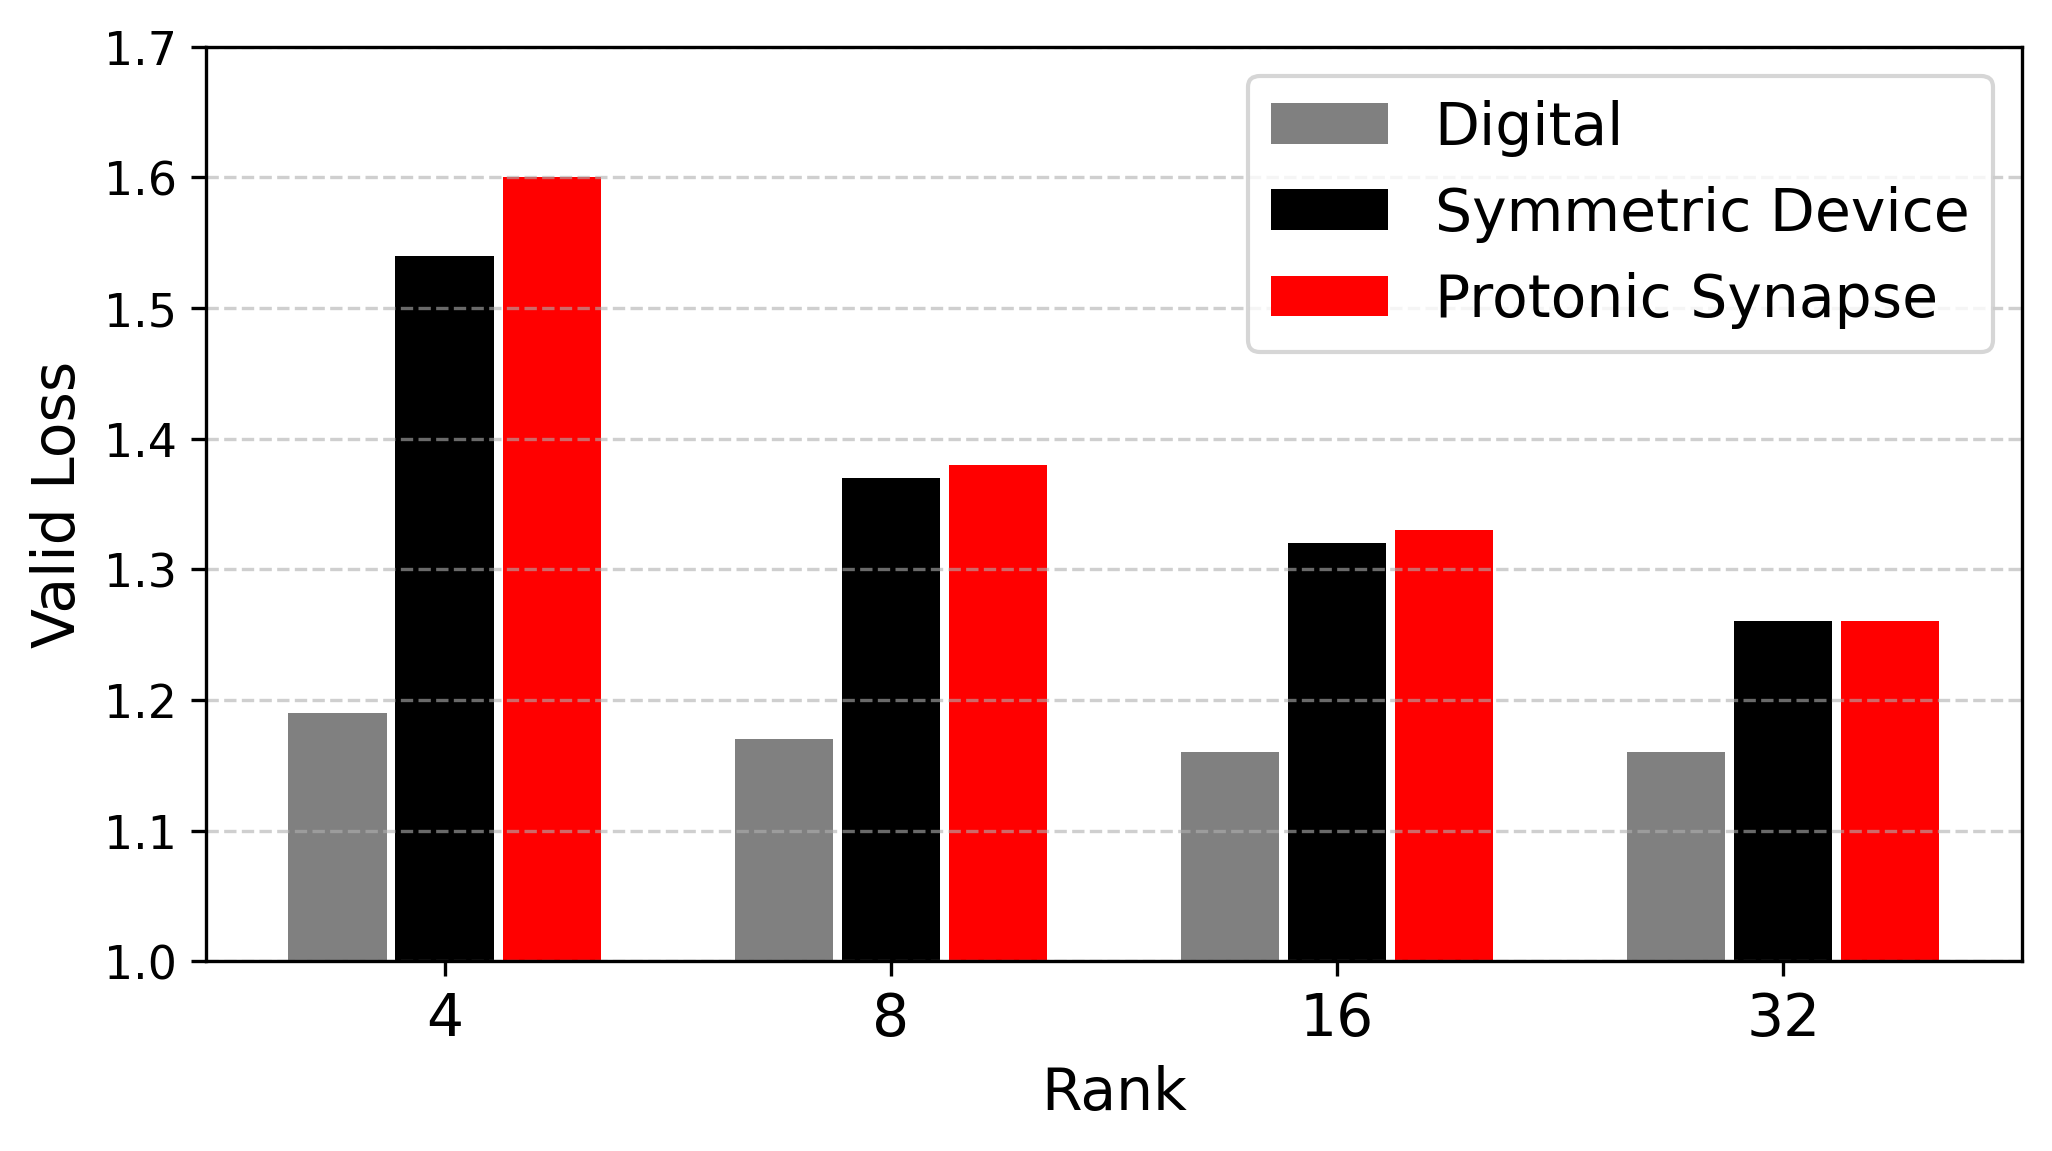

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data (approximate values extracted from the image)
ranks = [4, 8, 16, 32]
digital = [1.19, 1.17, 1.16, 1.16]
symmetric = [1.54, 1.37, 1.32, 1.26]
protonic = [1.60, 1.38, 1.33, 1.26]

bar_width = 0.22  # slightly narrower bars
x = np.arange(len(ranks))
gap = 0.02        # extra spacing between groups

plt.figure(figsize=(7, 4), dpi=300)

# Plot bars with a small separation
plt.bar(x - bar_width - gap, digital, width=bar_width, color='gray', label='Digital')
plt.bar(x, symmetric, width=bar_width, color='black', label='Symmetric Device')
plt.bar(x + bar_width + gap, protonic, width=bar_width, color='red', label='Protonic Synapse')

# Labels, ticks, legend
plt.xlabel("Rank", fontsize=14)
plt.ylabel("Valid Loss", fontsize=14)
plt.xticks(x, ranks, fontsize=14)
plt.yticks(fontsize=11)
plt.ylim(1.0, 1.7)

plt.legend(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
